In [2]:
import numpy  as np
import pandas as pd
import json
import pandas

In [3]:
import nltk
import nltk.corpus
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.metrics                  import silhouette_samples, silhouette_score
from sklearn.preprocessing            import normalize
from nltk.tokenize                    import word_tokenize
import re
from unidecode                        import unidecode
from nltk.corpus import stopwords

In [4]:
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics                  import silhouette_samples, silhouette_score
from wordcloud                        import WordCloud

In [5]:
from sklearn import cluster

In [1]:
Ezequiel_1 = "Now it came to pass in the thirtieth year, in the fourth month, in the fifth day of the month, as I was among the captives by the river of Chebar, that the heavens were opened, and I saw visions of God.In the fifth day of the month, which was the fifth year of king Jehoiachin' captivity,The word of the LORD came expressly to Ezekiel the priest, the son of Buzi, in the land of the Chaldeans by the river Chebar; and the hand of the LORD was there on him.And I looked, and, behold, a whirlwind came out of the north, a great cloud, and a fire enfolding itself, and a brightness was about it, and out of the middle thereof as the color of amber, out of the middle of the fire.Also out of the middle thereof came the likeness of four living creatures. And this was their appearance; they had the likeness of a man.And every one had four faces, and every one had four wings.And their feet were straight feet; and the sole of their feet was like the sole of a calf' foot: and they sparkled like the color of burnished brass.And they had the hands of a man under their wings on their four sides; and they four had their faces and their wings.Their wings were joined one to another; they turned not when they went; they went every one straight forward.As for the likeness of their faces, they four had the face of a man, and the face of a lion, on the right side: and they four had the face of an ox on the left side; they four also had the face of an eagle.Thus were their faces: and their wings were stretched upward; two wings of every one were joined one to another, and two covered their bodies.And they went every one straight forward: where the spirit was to go, they went; and they turned not when they went.As for the likeness of the living creatures, their appearance was like burning coals of fire, and like the appearance of lamps: it went up and down among the living creatures; and the fire was bright, and out of the fire went forth lightning.And the living creatures ran and returned as the appearance of a flash of lightning.Now as I beheld the living creatures, behold one wheel on the earth by the living creatures, with his four faces.The appearance of the wheels and their work was like to the color of a beryl: and they four had one likeness: and their appearance and their work was as it were a wheel in the middle of a wheel.When they went, they went on their four sides: and they turned not when they went.As for their rings, they were so high that they were dreadful; and their rings were full of eyes round about them four.And when the living creatures went, the wheels went by them: and when the living creatures were lifted up from the earth, the wheels were lifted up.Wherever the spirit was to go, they went, thither was their spirit to go; and the wheels were lifted up over against them: for the spirit of the living creature was in the wheels.When those went, these went; and when those stood, these stood; and when those were lifted up from the earth, the wheels were lifted up over against them: for the spirit of the living creature was in the wheels.And the likeness of the firmament on the heads of the living creature was as the color of the terrible crystal, stretched forth over their heads above.And under the firmament were their wings straight, the one toward the other: every one had two, which covered on this side, and every one had two, which covered on that side, their bodies.And when they went, I heard the noise of their wings, like the noise of great waters, as the voice of the Almighty, the voice of speech, as the noise of an host: when they stood, they let down their wings.And there was a voice from the firmament that was over their heads, when they stood, and had let down their wings.And above the firmament that was over their heads was the likeness of a throne, as the appearance of a sapphire stone: and on the likeness of the throne was the likeness as the appearance of a man above on it.And I saw as the color of amber, as the appearance of fire round about within it, from the appearance of his loins even upward, and from the appearance of his loins even downward, I saw as it were the appearance of fire, and it had brightness round about.As the appearance of the bow that is in the cloud in the day of rain, so was the appearance of the brightness round about. This was the appearance of the likeness of the glory of the LORD. And when I saw it, I fell on my face, and I heard a voice of one that spoke.".lower()

In [2]:
Ezequiel_2 = "And he said to me, Son of man, stand on your feet, and I will speak to you.And the spirit entered into me when he spoke to me, and set me on my feet, that I heard him that spoke to me.And he said to me, Son of man, I send you to the children of Israel, to a rebellious nation that has rebelled against me: they and their fathers have transgressed against me, even to this very day.For they are impudent children and stiff hearted. I do send you to them; and you shall say to them, Thus said the Lord GOD.And they, whether they will hear, or whether they will forbear, (for they are a rebellious house,) yet shall know that there has been a prophet among them.And you, son of man, be not afraid of them, neither be afraid of their words, though briers and thorns be with you, and you do dwell among scorpions: be not afraid of their words, nor be dismayed at their looks, though they be a rebellious house.And you shall speak my words to them, whether they will hear, or whether they will forbear: for they are most rebellious.But you, son of man, hear what I say to you; Be not you rebellious like that rebellious house: open your mouth, and eat that I give you.And when I looked, behold, an hand was sent to me; and, see, a roll of a book was therein;And he spread it before me; and it was written within and without: and there was written therein lamentations, and mourning, and woe.".lower()

In [3]:
Ezequiel_3 = "Moreover he said to me, Son of man, eat that you find; eat this roll, and go speak to the house of Israel.So I opened my mouth, and he caused me to eat that roll.And he said to me, Son of man, cause your belly to eat, and fill your bowels with this roll that I give you. Then did I eat it; and it was in my mouth as honey for sweetness.And he said to me, Son of man, go, get you to the house of Israel, and speak with my words to them.For you are not sent to a people of a strange speech and of an hard language, but to the house of Israel;Not to many people of a strange speech and of an hard language, whose words you can not understand. Surely, had I sent you to them, they would have listened to you.But the house of Israel will not listen to you; for they will not listen to me: for all the house of Israel are impudent and hardhearted.Behold, I have made your face strong against their faces, and your forehead strong against their foreheads.As an adamant harder than flint have I made your forehead: fear them not, neither be dismayed at their looks, though they be a rebellious house.Moreover he said to me, Son of man, all my words that I shall speak to you receive in your heart, and hear with your ears.And go, get you to them of the captivity, to the children of your people, and speak to them, and tell them, Thus said the Lord GOD; whether they will hear, or whether they will forbear.Then the spirit took me up, and I heard behind me a voice of a great rushing, saying, Blessed be the glory of the LORD from his place.I heard also the noise of the wings of the living creatures that touched one another, and the noise of the wheels over against them, and a noise of a great rushing.So the spirit lifted me up, and took me away, and I went in bitterness, in the heat of my spirit; but the hand of the LORD was strong on me.Then I came to them of the captivity at Telabib, that dwelled by the river of Chebar, and I sat where they sat, and remained there astonished among them seven days.And it came to pass at the end of seven days, that the word of the LORD came to me, saying,Son of man, I have made you a watchman to the house of Israel: therefore hear the word at my mouth, and give them warning from me.When I say to the wicked, You shall surely die; and you give him not warning, nor speak to warn the wicked from his wicked way, to save his life; the same wicked man shall die in his iniquity; but his blood will I require at your hand.Yet if you warn the wicked, and he turn not from his wickedness, nor from his wicked way, he shall die in his iniquity; but you have delivered your soul.Again, When a righteous man does turn from his righteousness, and commit iniquity, and I lay a stumbling-block before him, he shall die: because you have not given him warning, he shall die in his sin, and his righteousness which he has done shall not be remembered; but his blood will I require at your hand.Nevertheless if you warn the righteous man, that the righteous sin not, and he does not sin, he shall surely live, because he is warned; also you have delivered your soul.And the hand of the LORD was there on me; and he said to me, Arise, go forth into the plain, and I will there talk with you.Then I arose, and went forth into the plain: and, behold, the glory of the LORD stood there, as the glory which I saw by the river of Chebar: and I fell on my face.Then the spirit entered into me, and set me on my feet, and spoke with me, and said to me, Go, shut yourself within your house.But you, O son of man, behold, they shall put bands on you, and shall bind you with them, and you shall not go out among them:And I will make your tongue sticks to the roof of your mouth, that you shall be dumb, and shall not be to them a reprover: for they are a rebellious house.But when I speak with you, I will open your mouth, and you shall say to them, Thus said the Lord GOD; He that hears, let him hear; and he that declines, let him forbear: for they are a rebellious house.".lower()

In [4]:
Ezequiel_4 = "You also, son of man, take you a tile, and lay it before you, and portray on it the city, even Jerusalem:And lay siege against it, and build a fort against it, and cast a mount against it; set the camp also against it, and set battering rams against it round about.Moreover take you to you an iron pan, and set it for a wall of iron between you and the city: and set your face against it, and it shall be besieged, and you shall lay siege against it. This shall be a sign to the house of Israel.Lie you also on your left side, and lay the iniquity of the house of Israel on it: according to the number of the days that you shall lie on it you shall bear their iniquity.For I have laid on you the years of their iniquity, according to the number of the days, three hundred and ninety days: so shall you bear the iniquity of the house of Israel.And when you have accomplished them, lie again on your right side, and you shall bear the iniquity of the house of Judah forty days: I have appointed you each day for a year.Therefore you shall set your face toward the siege of Jerusalem, and your arm shall be uncovered, and you shall prophesy against it.And, behold, I will lay bands on you, and you shall not turn you from one side to another, till you have ended the days of your siege.Take you also to you wheat, and barley, and beans, and lentils, and millet, and fitches, and put them in one vessel, and make you bread thereof, according to the number of the days that you shall lie on your side, three hundred and ninety days shall you eat thereof.And your meat which you shall eat shall be by weight, twenty shekels a day: from time to time shall you eat it.You shall drink also water by measure, the sixth part of an hin: from time to time shall you drink.And you shall eat it as barley cakes, and you shall bake it with dung that comes out of man, in their sight.And the LORD said, Even thus shall the children of Israel eat their defiled bread among the Gentiles, where I will drive them.Then said I, Ah Lord GOD! behold, my soul has not been polluted: for from my youth up even till now have I not eaten of that which dies of itself, or is torn in pieces; neither came there abominable flesh into my mouth.Then he said to me, See, I have given you cow' dung for man' dung, and you shall prepare your bread therewith.Moreover he said to me, Son of man, behold, I will break the staff of bread in Jerusalem: and they shall eat bread by weight, and with care; and they shall drink water by measure, and with astonishment:That they may want bread and water, and be astonished one with another, and consume away for their iniquity.".lower()

In [5]:
Ezequiel_5 = "And you, son of man, take you a sharp knife, take you a barber' razor, and cause it to pass on your head and on your beard: then take you balances to weigh, and divide the hair.You shall burn with fire a third part in the middle of the city, when the days of the siege are fulfilled: and you shall take a third part, and smite about it with a knife: and a third part you shall scatter in the wind; and I will draw out a sword after them.You shall also take thereof a few in number, and bind them in your skirts.Then take of them again, and cast them into the middle of the fire, and burn them in the fire; for thereof shall a fire come forth into all the house of Israel.Thus said the Lord GOD; This is Jerusalem: I have set it in the middle of the nations and countries that are round about her.And she has changed my judgments into wickedness more than the nations, and my statutes more than the countries that are round about her: for they have refused my judgments and my statutes, they have not walked in them.Therefore thus said the Lord GOD; Because you multiplied more than the nations that are round about you, and have not walked in my statutes, neither have kept my judgments, neither have done according to the judgments of the nations that are round about you;Therefore thus said the Lord GOD; Behold, I, even I, am against you, and will execute judgments in the middle of you in the sight of the nations.And I will do in you that which I have not done, and whereunto I will not do any more the like, because of all your abominations.Therefore the fathers shall eat the sons in the middle of you, and the sons shall eat their fathers; and I will execute judgments in you, and the whole remnant of you will I scatter into all the winds.Why, as I live, said the Lord GOD; Surely, because you have defiled my sanctuary with all your detestable things, and with all your abominations, therefore will I also diminish you; neither shall my eye spare, neither will I have any pity.A third part of you shall die with the pestilence, and with famine shall they be consumed in the middle of you: and a third part shall fall by the sword round about you; and I will scatter a third part into all the winds, and I will draw out a sword after them.Thus shall my anger be accomplished, and I will cause my fury to rest on them, and I will be comforted: and they shall know that I the LORD have spoken it in my zeal, when I have accomplished my fury in them.Moreover I will make you waste, and a reproach among the nations that are round about you, in the sight of all that pass by.So it shall be a reproach and a taunt, an instruction and an astonishment to the nations that are round about you, when I shall execute judgments in you in anger and in fury and in furious rebukes. I the LORD have spoken it.When I shall send on them the evil arrows of famine, which shall be for their destruction, and which I will send to destroy you: and I will increase the famine on you, and will break your staff of bread:So will I send on you famine and evil beasts, and they shall bereave you: and pestilence and blood shall pass through you; and I will bring the sword on you. I the LORD have spoken it.".lower()

In [6]:
Ezequiel_6 = "And the word of the LORD came to me, saying,Son of man, set your face toward the mountains of Israel, and prophesy against them,And say, You mountains of Israel, hear the word of the Lord GOD; Thus said the Lord GOD to the mountains, and to the hills, to the rivers, and to the valleys; Behold, I, even I, will bring a sword on you, and I will destroy your high places.And your altars shall be desolate, and your images shall be broken: and I will cast down your slain men before your idols.And I will lay the dead carcasses of the children of Israel before their idols; and I will scatter your bones round about your altars.In all your dwelling places the cities shall be laid waste, and the high places shall be desolate; that your altars may be laid waste and made desolate, and your idols may be broken and cease, and your images may be cut down, and your works may be abolished.And the slain shall fall in the middle of you, and you shall know that I am the LORD.Yet will I leave a remnant, that you may have some that shall escape the sword among the nations, when you shall be scattered through the countries.And they that escape of you shall remember me among the nations where they shall be carried captives, because I am broken with their whorish heart, which has departed from me, and with their eyes, which go a whoring after their idols: and they shall loathe themselves for the evils which they have committed in all their abominations.And they shall know that I am the LORD, and that I have not said in vain that I would do this evil to them.Thus said the Lord GOD; Smite with your hand, and stamp with your foot, and say, Alas for all the evil abominations of the house of Israel! for they shall fall by the sword, by the famine, and by the pestilence.He that is far off shall die of the pestilence; and he that is near shall fall by the sword; and he that remains and is besieged shall die by the famine: thus will I accomplish my fury on them.Then shall you know that I am the LORD, when their slain men shall be among their idols round about their altars, on every high hill, in all the tops of the mountains, and under every green tree, and under every thick oak, the place where they did offer sweet smell to all their idols.So will I stretch out my hand on them, and make the land desolate, yes, more desolate than the wilderness toward Diblath, in all their habitations: and they shall know that I am the LORD.".lower()

In [7]:
Ezequiel_7 = "Moreover the word of the LORD came to me, saying,Also, you son of man, thus said the Lord GOD to the land of Israel; An end, the end is come on the four corners of the land.Now is the end come on you, and I will send my anger on you, and will judge you according to your ways, and will recompense on you all your abominations.And my eye shall not spare you, neither will I have pity: but I will recompense your ways on you, and your abominations shall be in the middle of you: and you shall know that I am the LORD.Thus said the Lord GOD; An evil, an only evil, behold, is come.An end is come, the end is come: it watches for you; behold, it is come.The morning is come to you, O you that dwell in the land: the time is come, the day of trouble is near, and not the sounding again of the mountains.Now will I shortly pour out my fury on you, and accomplish my anger on you: and I will judge you according to your ways, and will recompense you for all your abominations.And my eye shall not spare, neither will I have pity: I will recompense you according to your ways and your abominations that are in the middle of you; and you shall know that I am the LORD that smites.Behold the day, behold, it is come: the morning is gone forth; the rod has blossomed, pride has budded.Violence is risen up into a rod of wickedness: none of them shall remain, nor of their multitude, nor of any of their': neither shall there be wailing for them.The time is come, the day draws near: let not the buyer rejoice, nor the seller mourn: for wrath is on all the multitude thereof.For the seller shall not return to that which is sold, although they were yet alive: for the vision is touching the whole multitude thereof, which shall not return; neither shall any strengthen himself in the iniquity of his life.They have blown the trumpet, even to make all ready; but none goes to the battle: for my wrath is on all the multitude thereof.The sword is without, and the pestilence and the famine within: he that is in the field shall die with the sword; and he that is in the city, famine and pestilence shall devour him.But they that escape of them shall escape, and shall be on the mountains like doves of the valleys, all of them mourning, every one for his iniquity.All hands shall be feeble, and all knees shall be weak as water.They shall also gird themselves with sackcloth, and horror shall cover them; and shame shall be on all faces, and baldness on all their heads.They shall cast their silver in the streets, and their gold shall be removed: their silver and their gold shall not be able to deliver them in the day of the wrath of the LORD: they shall not satisfy their souls, neither fill their bowels: because it is the stumbling block of their iniquity.As for the beauty of his ornament, he set it in majesty: but they made the images of their abominations and of their detestable things therein: therefore have I set it far from them.And I will give it into the hands of the strangers for a prey, and to the wicked of the earth for a spoil; and they shall pollute it.My face will I turn also from them, and they shall pollute my secret place: for the robbers shall enter into it, and defile it.Make a chain: for the land is full of bloody crimes, and the city is full of violence.Why I will bring the worst of the heathen, and they shall possess their houses: I will also make the pomp of the strong to cease; and their holy places shall be defiled.Destruction comes; and they shall seek peace, and there shall be none.Mischief shall come on mischief, and rumor shall be on rumor; then shall they seek a vision of the prophet; but the law shall perish from the priest, and counsel from the ancients.The king shall mourn, and the prince shall be clothed with desolation, and the hands of the people of the land shall be troubled: I will do to them after their way, and according to their deserts will I judge them; and they shall know that I am the LORD.".lower()

In [8]:
Ezequiel_8 = "And it came to pass in the sixth year, in the sixth month, in the fifth day of the month, as I sat in my house, and the elders of Judah sat before me, that the hand of the Lord GOD fell there on me.Then I beheld, and see a likeness as the appearance of fire: from the appearance of his loins even downward, fire; and from his loins even upward, as the appearance of brightness, as the color of amber.And he put forth the form of an hand, and took me by a lock of my head; and the spirit lifted me up between the earth and the heaven, and brought me in the visions of God to Jerusalem, to the door of the inner gate that looks toward the north; where was the seat of the image of jealousy, which provokes to jealousy.And, behold, the glory of the God of Israel was there, according to the vision that I saw in the plain.Then said he to me, Son of man, lift up your eyes now the way toward the north. So I lifted up my eyes the way toward the north, and behold northward at the gate of the altar this image of jealousy in the entry.He said furthermore to me, Son of man, see you what they do? even the great abominations that the house of Israel commits here, that I should go far off from my sanctuary? but turn you yet again, and you shall see greater abominations.And he brought me to the door of the court; and when I looked, behold a hole in the wall.Then said he to me, Son of man, dig now in the wall: and when I had dig in the wall, behold a door.And he said to me, Go in, and behold the wicked abominations that they do here.So I went in and saw; and behold every form of creeping things, and abominable beasts, and all the idols of the house of Israel, portrayed on the wall round about.And there stood before them seventy men of the ancients of the house of Israel, and in the middle of them stood Jaazaniah the son of Shaphan, with every man his censer in his hand; and a thick cloud of incense went up.Then said he to me, Son of man, have you seen what the ancients of the house of Israel do in the dark, every man in the chambers of his imagery? for they say, the LORD sees us not; the LORD has forsaken the earth.He said also to me, Turn you yet again, and you shall see greater abominations that they do.Then he brought me to the door of the gate of the LORD' house which was toward the north; and, behold, there sat women weeping for Tammuz.Then said he to me, Have you seen this, O son of man? turn you yet again, and you shall see greater abominations than these.And he brought me into the inner court of the LORD' house, and, behold, at the door of the temple of the LORD, between the porch and the altar, were about five and twenty men, with their backs toward the temple of the LORD, and their faces toward the east; and they worshipped the sun toward the east.Then he said to me, Have you seen this, O son of man? Is it a light thing to the house of Judah that they commit the abominations which they commit here? for they have filled the land with violence, and have returned to provoke me to anger: and, see, they put the branch to their nose.Therefore will I also deal in fury: my eye shall not spare, neither will I have pity: and though they cry in my ears with a loud voice, yet will I not hear them.".lower()

In [9]:
Ezequiel_9 = "And you, son of man, take you a sharp knife, take you a barber' razor, and cause it to pass on your head and on your beard: then take you balances to weigh, and divide the hair.You shall burn with fire a third part in the middle of the city, when the days of the siege are fulfilled: and you shall take a third part, and smite about it with a knife: and a third part you shall scatter in the wind; and I will draw out a sword after them.You shall also take thereof a few in number, and bind them in your skirts.Then take of them again, and cast them into the middle of the fire, and burn them in the fire; for thereof shall a fire come forth into all the house of Israel.Thus said the Lord GOD; This is Jerusalem: I have set it in the middle of the nations and countries that are round about her.And she has changed my judgments into wickedness more than the nations, and my statutes more than the countries that are round about her: for they have refused my judgments and my statutes, they have not walked in them.Therefore thus said the Lord GOD; Because you multiplied more than the nations that are round about you, and have not walked in my statutes, neither have kept my judgments, neither have done according to the judgments of the nations that are round about you;Therefore thus said the Lord GOD; Behold, I, even I, am against you, and will execute judgments in the middle of you in the sight of the nations.And I will do in you that which I have not done, and whereunto I will not do any more the like, because of all your abominations.Therefore the fathers shall eat the sons in the middle of you, and the sons shall eat their fathers; and I will execute judgments in you, and the whole remnant of you will I scatter into all the winds.Why, as I live, said the Lord GOD; Surely, because you have defiled my sanctuary with all your detestable things, and with all your abominations, therefore will I also diminish you; neither shall my eye spare, neither will I have any pity.A third part of you shall die with the pestilence, and with famine shall they be consumed in the middle of you: and a third part shall fall by the sword round about you; and I will scatter a third part into all the winds, and I will draw out a sword after them.Thus shall my anger be accomplished, and I will cause my fury to rest on them, and I will be comforted: and they shall know that I the LORD have spoken it in my zeal, when I have accomplished my fury in them.Moreover I will make you waste, and a reproach among the nations that are round about you, in the sight of all that pass by.So it shall be a reproach and a taunt, an instruction and an astonishment to the nations that are round about you, when I shall execute judgments in you in anger and in fury and in furious rebukes. I the LORD have spoken it.When I shall send on them the evil arrows of famine, which shall be for their destruction, and which I will send to destroy you: and I will increase the famine on you, and will break your staff of bread:So will I send on you famine and evil beasts, and they shall bereave you: and pestilence and blood shall pass through you; and I will bring the sword on you. I the LORD have spoken it.".lower()

In [10]:
Ezequiel_10 = "Then I looked, and, behold, in the firmament that was above the head of the cherubim there appeared over them as it were a sapphire stone, as the appearance of the likeness of a throne.And he spoke to the man clothed with linen, and said, Go in between the wheels, even under the cherub, and fill your hand with coals of fire from between the cherubim, and scatter them over the city. And he went in in my sight.Now the cherubim stood on the right side of the house, when the man went in; and the cloud filled the inner court.Then the glory of the LORD went up from the cherub, and stood over the threshold of the house; and the house was filled with the cloud, and the court was full of the brightness of the LORD' glory.And the sound of the cherubims'wings was heard even to the outer court, as the voice of the Almighty God when he speaks.And it came to pass, that when he had commanded the man clothed with linen, saying, Take fire from between the wheels, from between the cherubim; then he went in, and stood beside the wheels.And one cherub stretched forth his hand from between the cherubim to the fire that was between the cherubim, and took thereof, and put it into the hands of him that was clothed with linen: who took it, and went out.And there appeared in the cherubim the form of a man' hand under their wings.And when I looked, behold the four wheels by the cherubim, one wheel by one cherub, and another wheel by another cherub: and the appearance of the wheels was as the color of a beryl stone.And as for their appearances, they four had one likeness, as if a wheel had been in the middle of a wheel.When they went, they went on their four sides; they turned not as they went, but to the place where the head looked they followed it; they turned not as they went.And their whole body, and their backs, and their hands, and their wings, and the wheels, were full of eyes round about, even the wheels that they four had.As for the wheels, it was cried to them in my hearing, O wheel.And every one had four faces: the first face was the face of a cherub, and the second face was the face of a man, and the third the face of a lion, and the fourth the face of an eagle.And the cherubim were lifted up. This is the living creature that I saw by the river of Chebar.And when the cherubim went, the wheels went by them: and when the cherubim lifted up their wings to mount up from the earth, the same wheels also turned not from beside them.When they stood, these stood; and when they were lifted up, these lifted up themselves also: for the spirit of the living creature was in them.Then the glory of the LORD departed from off the threshold of the house, and stood over the cherubim.And the cherubim lifted up their wings, and mounted up from the earth in my sight: when they went out, the wheels also were beside them, and every one stood at the door of the east gate of the LORD' house; and the glory of the God of Israel was over them above.This is the living creature that I saw under the God of Israel by the river of Chebar; and I knew that they were the cherubim.Every one had four faces apiece, and every one four wings; and the likeness of the hands of a man was under their wings.And the likeness of their faces was the same faces which I saw by the river of Chebar, their appearances and themselves: they went every one straight forward.".lower()

In [11]:
Ezequiel_11 = "Moreover the spirit lifted me up, and brought me to the east gate of the LORD' house, which looks eastward: and behold at the door of the gate five and twenty men; among whom I saw Jaazaniah the son of Azur, and Pelatiah the son of Benaiah, princes of the people.Then said he to me, Son of man, these are the men that devise mischief, and give wicked counsel in this city:Which say, It is not near; let us build houses: this city is the caldron, and we be the flesh.Therefore prophesy against them, prophesy, O son of man.And the Spirit of the LORD fell on me, and said to me, Speak; Thus said the LORD; Thus have you said, O house of Israel: for I know the things that come into your mind, every one of them.You have multiplied your slain in this city, and you have filled the streets thereof with the slain.Therefore thus said the Lord GOD; Your slain whom you have laid in the middle of it, they are the flesh, and this city is the caldron: but I will bring you forth out of the middle of it.You have feared the sword; and I will bring a sword on you, said the Lord GOD.And I will bring you out of the middle thereof, and deliver you into the hands of strangers, and will execute judgments among you.You shall fall by the sword; I will judge you in the border of Israel; and you shall know that I am the LORD.This city shall not be your caldron, neither shall you be the flesh in the middle thereof; but I will judge you in the border of Israel:And you shall know that I am the LORD: for you have not walked in my statutes, neither executed my judgments, but have done after the manners of the heathen that are round about you.And it came to pass, when I prophesied, that Pelatiah the son of Benaiah died. Then fell I down on my face, and cried with a loud voice, and said, Ah Lord GOD! will you make a full end of the remnant of Israel?Again the word of the LORD came to me, saying,Son of man, your brothers, even your brothers, the men of your kindred, and all the house of Israel wholly, are they to whom the inhabitants of Jerusalem have said, Get you far from the LORD: to us is this land given in possession.Therefore say, Thus said the Lord GOD; Although I have cast them far off among the heathen, and although I have scattered them among the countries, yet will I be to them as a little sanctuary in the countries where they shall come.Therefore say, Thus said the Lord GOD; I will even gather you from the people, and assemble you out of the countries where you have been scattered, and I will give you the land of Israel.And they shall come thither, and they shall take away all the detestable things thereof and all the abominations thereof from there.And I will give them one heart, and I will put a new spirit within you; and I will take the stony heart out of their flesh, and will give them an heart of flesh:That they may walk in my statutes, and keep my ordinances, and do them: and they shall be my people, and I will be their God.But as for them whose heart walks after the heart of their detestable things and their abominations, I will recompense their way on their own heads, said the Lord GODThen did the cherubim lift up their wings, and the wheels beside them; and the glory of the God of Israel was over them above.And the glory of the LORD went up from the middle of the city, and stood on the mountain which is on the east side of the city.Afterwards the spirit took me up, and brought me in a vision by the Spirit of God into Chaldea, to them of the captivity. So the vision that I had seen went up from me.Then I spoke to them of the captivity all the things that the LORD had showed me.".lower()

In [12]:
Ezequiel_12 = "The word of the LORD also came to me, saying,Son of man, you dwell in the middle of a rebellious house, which have eyes to see, and see not; they have ears to hear, and hear not: for they are a rebellious house.Therefore, you son of man, prepare you stuff for removing, and remove by day in their sight; and you shall remove from your place to another place in their sight: it may be they will consider, though they be a rebellious house.Then shall you bring forth your stuff by day in their sight, as stuff for removing: and you shall go forth at even in their sight, as they that go forth into captivity.Dig you through the wall in their sight, and carry out thereby.In their sight shall you bear it on your shoulders, and carry it forth in the twilight: you shall cover your face, that you see not the ground: for I have set you for a sign to the house of Israel.And I did so as I was commanded: I brought forth my stuff by day, as stuff for captivity, and in the even I dig through the wall with my hand; I brought it forth in the twilight, and I bore it on my shoulder in their sight.And in the morning came the word of the LORD to me, saying,Son of man, has not the house of Israel, the rebellious house, said to you, What do you?Say you to them, Thus said the Lord GOD; This burden concerns the prince in Jerusalem, and all the house of Israel that are among them.Say, I am your sign: like as I have done, so shall it be done to them: they shall remove and go into captivity.And the prince that is among them shall bear on his shoulder in the twilight, and shall go forth: they shall dig through the wall to carry out thereby: he shall cover his face, that he see not the ground with his eyes.My net also will I spread on him, and he shall be taken in my snare: and I will bring him to Babylon to the land of the Chaldeans; yet shall he not see it, though he shall die there.And I will scatter toward every wind all that are about him to help him, and all his bands; and I will draw out the sword after them.And they shall know that I am the LORD, when I shall scatter them among the nations, and disperse them in the countries.But I will leave a few men of them from the sword, from the famine, and from the pestilence; that they may declare all their abominations among the heathen where they come; and they shall know that I am the LORD.Moreover the word of the LORD came to me, saying,Son of man, eat your bread with quaking, and drink your water with trembling and with carefulness;And say to the people of the land, Thus said the Lord GOD of the inhabitants of Jerusalem, and of the land of Israel; They shall eat their bread with carefulness, and drink their water with astonishment, that her land may be desolate from all that is therein, because of the violence of all them that dwell therein.And the cities that are inhabited shall be laid waste, and the land shall be desolate; and you shall know that I am the LORD.And the word of the LORD came to me, saying,Son of man, what is that proverb that you have in the land of Israel, saying, The days are prolonged, and every vision fails?Tell them therefore, Thus said the Lord GOD; I will make this proverb to cease, and they shall no more use it as a proverb in Israel; but say to them, The days are at hand, and the effect of every vision.For there shall be no more any vain vision nor flattering divination within the house of Israel.For I am the LORD: I will speak, and the word that I shall speak shall come to pass; it shall be no more prolonged: for in your days, O rebellious house, will I say the word, and will perform it, said the Lord GOD.Again the word of the LORD came to me, saying.Son of man, behold, they of the house of Israel say, The vision that he sees is for many days to come, and he prophesies of the times that are far off.Therefore say to them, Thus said the Lord GOD; There shall none of my words be prolonged any more, but the word which I have spoken shall be done, said the Lord GOD.".lower()

In [13]:
Ezequiel_13 = "And the word of the LORD came to me, saying,Son of man, prophesy against the prophets of Israel that prophesy, and say you to them that prophesy out of their own hearts, Hear you the word of the LORD;Thus said the Lord GOD; Woe to the foolish prophets, that follow their own spirit, and have seen nothing!O Israel, your prophets are like the foxes in the deserts.You have not gone up into the gaps, neither made up the hedge for the house of Israel to stand in the battle in the day of the LORD.They have seen vanity and lying divination, saying, The LORD said: and the LORD has not sent them: and they have made others to hope that they would confirm the word.Have you not seen a vain vision, and have you not spoken a lying divination, whereas you say, The LORD said it; albeit I have not spoken?Therefore thus said the Lord GOD; Because you have spoken vanity, and seen lies, therefore, behold, I am against you, said the Lord GOD.And my hand shall be on the prophets that see vanity, and that divine lies: they shall not be in the assembly of my people, neither shall they be written in the writing of the house of Israel, neither shall they enter into the land of Israel; and you shall know that I am the Lord GOD.Because, even because they have seduced my people, saying, Peace; and there was no peace; and one built up a wall, and, see, others daubed it with untempered mortar:Say to them which daub it with untempered mortar, that it shall fall: there shall be an overflowing shower; and you, O great hailstones, shall fall; and a stormy wind shall rend it.See, when the wall is fallen, shall it not be said to you, Where is the daubing with which you have daubed it?Therefore thus said the Lord GOD; I will even rend it with a stormy wind in my fury; and there shall be an overflowing shower in my anger, and great hailstones in my fury to consume it.So will I break down the wall that you have daubed with untempered mortar, and bring it down to the ground, so that the foundation thereof shall be discovered, and it shall fall, and you shall be consumed in the middle thereof: and you shall know that I am the LORD.Thus will I accomplish my wrath on the wall, and on them that have daubed it with untempered mortar, and will say to you, The wall is no more, neither they that daubed it;To wit, the prophets of Israel which prophesy concerning Jerusalem, and which see visions of peace for her, and there is no peace, said the Lord GOD.Likewise, you son of man, set your face against the daughters of your people, which prophesy out of their own heart; and prophesy you against them,And say, Thus said the Lord GOD; Woe to the women that sew pillows to all armholes, and make kerchiefs on the head of every stature to hunt souls! Will you hunt the souls of my people, and will you save the souls alive that come to you?And will you pollute me among my people for handfuls of barley and for pieces of bread, to slay the souls that should not die, and to save the souls alive that should not live, by your lying to my people that hear your lies?Why thus said the Lord GOD; Behold, I am against your pillows, with which you there hunt the souls to make them fly, and I will tear them from your arms, and will let the souls go, even the souls that you hunt to make them fly.Your kerchiefs also will I tear, and deliver my people out of your hand, and they shall be no more in your hand to be hunted; and you shall know that I am the LORD.Because with lies you have made the heart of the righteous sad, whom I have not made sad; and strengthened the hands of the wicked, that he should not return from his wicked way, by promising him life:Therefore you shall see no more vanity, nor divine divinations: for I will deliver my people out of your hand: and you shall know that I am the LORD.".lower()

In [14]:
Ezequiel_14 = "Then came certain of the elders of Israel to me, and sat before me.And the word of the LORD came to me, saying,Son of man, these men have set up their idols in their heart, and put the stumbling block of their iniquity before their face: should I be inquired of at all by them?Therefore speak to them, and say to them, Thus said the Lord GOD; Every man of the house of Israel that sets up his idols in his heart, and puts the stumbling block of his iniquity before his face, and comes to the prophet; I the LORD will answer him that comes according to the multitude of his idols;That I may take the house of Israel in their own heart, because they are all estranged from me through their idols.Therefore say to the house of Israel, Thus said the Lord GOD; Repent, and turn yourselves from your idols; and turn away your faces from all your abominations.For every one of the house of Israel, or of the stranger that sojournes in Israel, which separates himself from me, and sets up his idols in his heart, and puts the stumbling block of his iniquity before his face, and comes to a prophet to inquire of him concerning me; I the LORD will answer him by myself:And I will set my face against that man, and will make him a sign and a proverb, and I will cut him off from the middle of my people; and you shall know that I am the LORD.And if the prophet be deceived when he has spoken a thing, I the LORD have deceived that prophet, and I will stretch out my hand on him, and will destroy him from the middle of my people Israel.And they shall bear the punishment of their iniquity: the punishment of the prophet shall be even as the punishment of him that seeks to him;That the house of Israel may go no more astray from me, neither be polluted any more with all their transgressions; but that they may be my people, and I may be their God, said the Lord GOD.The word of the LORD came again to me, saying,Son of man, when the land sins against me by trespassing grievously, then will I stretch out my hand on it, and will break the staff of the bread thereof, and will send famine on it, and will cut off man and beast from it:Though these three men, Noah, Daniel, and Job, were in it, they should deliver but their own souls by their righteousness, said the Lord GOD.If I cause noisome beasts to pass through the land, and they spoil it, so that it be desolate, that no man may pass through because of the beasts:Though these three men were in it, as I live, said the Lord GOD, they shall deliver neither sons nor daughters; they only shall be delivered, but the land shall be desolate.Or if I bring a sword on that land, and say, Sword, go through the land; so that I cut off man and beast from it:Though these three men were in it, as I live, said the Lord GOD, they shall deliver neither sons nor daughters, but they only shall be delivered themselves.Or if I send a pestilence into that land, and pour out my fury on it in blood, to cut off from it man and beast:Though Noah, Daniel, and Job were in it, as I live, said the Lord GOD, they shall deliver neither son nor daughter; they shall but deliver their own souls by their righteousness.For thus said the Lord GOD; How much more when I send my four sore judgments on Jerusalem, the sword, and the famine, and the noisome beast, and the pestilence, to cut off from it man and beast?Yet, behold, therein shall be left a remnant that shall be brought forth, both sons and daughters: behold, they shall come forth to you, and you shall see their way and their doings: and you shall be comforted concerning the evil that I have brought on Jerusalem, even concerning all that I have brought on it.And they shall comfort you, when you see their ways and their doings: and you shall know that I have not done without cause all that I have done in it, said the Lord GOD.".lower()

In [15]:
Ezequiel_15 = "And the word of the LORD came to me, saying,Son of man, what is the vine tree more than any tree, or than a branch which is among the trees of the forest?Shall wood be taken thereof to do any work? or will men take a pin of it to hang any vessel thereon?Behold, it is cast into the fire for fuel; the fire devours both the ends of it, and the middle of it is burned. Is it meet for any work?Behold, when it was whole, it was meet for no work: how much less shall it be meet yet for any work, when the fire has devoured it, and it is burned?Therefore thus said the Lord GOD; As the vine tree among the trees of the forest, which I have given to the fire for fuel, so will I give the inhabitants of Jerusalem.And I will set my face against them; they shall go out from one fire, and another fire shall devour them; and you shall know that I am the LORD, when I set my face against them.And I will make the land desolate, because they have committed a trespass, said the Lord GOD.".lower()

In [16]:
Ezequiel_16 = "Again the word of the LORD came to me, saying,Son of man, cause Jerusalem to know her abominations,And say, Thus said the Lord GOD to Jerusalem; Your birth and your nativity is of the land of Canaan; your father was an Amorite, and your mother an Hittite.And as for your nativity, in the day you were born your navel was not cut, neither were you washed in water to supple you; you were not salted at all, nor swaddled at all.None eye pitied you, to do any of these to you, to have compassion on you; but you were cast out in the open field, to the loathing of your person, in the day that you were born.And when I passed by you, and saw you polluted in your own blood, I said to you when you were in your blood, Live; yes, I said to you when you were in your blood, Live.I have caused you to multiply as the bud of the field, and you have increased and waxen great, and you are come to excellent ornaments: your breasts are fashioned, and your hair is grown, whereas you were naked and bore.Now when I passed by you, and looked on you, behold, your time was the time of love; and I spread my skirt over you, and covered your nakedness: yes, I swore to you, and entered into a covenant with you, said the Lord GOD, and you became mine.Then washed I you with water; yes, I thoroughly washed away your blood from you, and I anointed you with oil.I clothed you also with broidered work, and shod you with badgers'skin, and I girded you about with fine linen, and I covered you with silk.I decked you also with ornaments, and I put bracelets on your hands, and a chain on your neck.And I put a jewel on your forehead, and earrings in your ears, and a beautiful crown on your head.Thus were you decked with gold and silver; and your raiment was of fine linen, and silk, and broidered work; you did eat fine flour, and honey, and oil: and you were exceeding beautiful, and you did prosper into a kingdom.And your renown went forth among the heathen for your beauty: for it was perfect through my comeliness, which I had put on you, said the Lord GOD.But you did trust in your own beauty, and played the harlot because of your renown, and poured out your fornications on every one that passed by; his it was.And of your garments you did take, and decked your high places with divers colors, and played the harlot thereupon: the like things shall not come, neither shall it be so.You have also taken your fair jewels of my gold and of my silver, which I had given you, and made to yourself images of men, and did commit prostitution with them,And took your broidered garments, and covered them: and you have set my oil and my incense before them.My meat also which I gave you, fine flour, and oil, and honey, with which I fed you, you have even set it before them for a sweet smell: and thus it was, said the Lord GOD.Moreover you have taken your sons and your daughters, whom you have borne to me, and these have you sacrificed to them to be devoured. Is this of your prostitutions a small matter,That you have slain my children, and delivered them to cause them to pass through the fire for them?And in all your abominations and your prostitutions you have not remembered the days of your youth, when you were naked and bore, and were polluted in your blood.And it came to pass after all your wickedness, (woe, woe to you! said the LORD GOD;)That you have also built to you an eminent place, and have made you an high place in every street.You have built your high place at every head of the way, and have made your beauty to be abhorred, and have opened your feet to every one that passed by, and multiplied your prostitutions.You have also committed fornication with the Egyptians your neighbors, great of flesh; and have increased your prostitutions, to provoke me to anger.Behold, therefore I have stretched out my hand over you, and have diminished your ordinary food, and delivered you to the will of them that hate you, the daughters of the Philistines, which are ashamed of your lewd way.You have played the whore also with the Assyrians, because you were insatiable; yes, you have played the harlot with them, and yet could not be satisfied.You have moreover multiplied your fornication in the land of Canaan to Chaldea; and yet you were not satisfied therewith.How weak is your heart, said the LORD GOD, seeing you do all these things, the work of an imperious whorish woman;In that you build your eminent place in the head of every way, and make your high place in every street; and have not been as an harlot, in that you scorn hire;But as a wife that commits adultery, which takes strangers instead of her husband!They give gifts to all whores: but you give your gifts to all your lovers, and hire them, that they may come to you on every side for your prostitution.And the contrary is in you from other women in your prostitutions, whereas none follows you to commit prostitutions: and in that you give a reward, and no reward is given to you, therefore you are contrary.Why, O harlot, hear the word of the LORD:Thus said the Lord GOD; Because your filthiness was poured out, and your nakedness discovered through your prostitutions with your lovers, and with all the idols of your abominations, and by the blood of your children, which you did give to them;Behold, therefore I will gather all your lovers, with whom you have taken pleasure, and all them that you have loved, with all them that you have hated; I will even gather them round about against you, and will discover your nakedness to them, that they may see all your nakedness.And I will judge you, as women that break wedlock and shed blood are judged; and I will give you blood in fury and jealousy.And I will also give you into their hand, and they shall throw down your eminent place, and shall break down your high places: they shall strip you also of your clothes, and shall take your fair jewels, and leave you naked and bore.They shall also bring up a company against you, and they shall stone you with stones, and thrust you through with their swords.And they shall burn your houses with fire, and execute judgments on you in the sight of many women: and I will cause you to cease from playing the harlot, and you also shall give no hire any more.So will I make my fury toward you to rest, and my jealousy shall depart from you, and I will be quiet, and will be no more angry.Because you have not remembered the days of your youth, but have fretted me in all these things; behold, therefore I also will recompense your way on your head, said the Lord GOD: and you shall not commit this lewdness above all your abominations.Behold, every one that uses proverbs shall use this proverb against you, saying, As is the mother, so is her daughter.You are your mother' daughter, that lothes her husband and her children; and you are the sister of your sisters, which loathed their husbands and their children: your mother was an Hittite, and your father an Amorite.And your elder sister is Samaria, she and her daughters that dwell at your left hand: and your younger sister, that dwells at your right hand, is Sodom and her daughters.Yet have you not walked after their ways, nor done after their abominations: but, as if that were a very little thing, you were corrupted more than they in all your ways.As I live, said the Lord GOD, Sodom your sister has not done, she nor her daughters, as you have done, you and your daughters.Behold, this was the iniquity of your sister Sodom, pride, fullness of bread, and abundance of idleness was in her and in her daughters, neither did she strengthen the hand of the poor and needy.And they were haughty, and committed abomination before me: therefore I took them away as I saw good.Neither has Samaria committed half of your sins; but you have multiplied your abominations more than they, and have justified your sisters in all your abominations which you have done.You also, which have judged your sisters, bear your own shame for your sins that you have committed more abominable than they: they are more righteous than you: yes, be you confounded also, and bear your shame, in that you have justified your sisters.When I shall bring again their captivity, the captivity of Sodom and her daughters, and the captivity of Samaria and her daughters, then will I bring again the captivity of your captives in the middle of them:That you may bear your own shame, and may be confounded in all that you have done, in that you are a comfort to them.When your sisters, Sodom and her daughters, shall return to their former estate, and Samaria and her daughters shall return to their former estate, then you and your daughters shall return to your former estate.For your sister Sodom was not mentioned by your mouth in the day of your pride,Before your wickedness was discovered, as at the time of your reproach of the daughters of Syria, and all that are round about her, the daughters of the Philistines, which despise you round about.You have borne your lewdness and your abominations, said the LORD.For thus said the Lord GOD; I will even deal with you as you have done, which have despised the oath in breaking the covenant.Nevertheless I will remember my covenant with you in the days of your youth, and I will establish to you an everlasting covenant.Then you shall remember your ways, and be ashamed, when you shall receive your sisters, your elder and your younger: and I will give them to you for daughters, but not by your covenant.And I will establish my covenant with you; and you shall know that I am the LORD:That you may remember, and be confounded, and never open your mouth any more because of your shame, when I am pacified toward you for all that you have done, said the Lord GOD.".lower()

In [17]:
Ezequiel_17 = "And the word of the LORD came to me, saying,Son of man, put forth a riddle, and speak a parable to the house of Israel;And say, Thus said the Lord GOD; A great eagle with great wings, long winged, full of feathers, which had divers colors, came to Lebanon, and took the highest branch of the cedar:He cropped off the top of his young twigs, and carried it into a land of traffic; he set it in a city of merchants.He took also of the seed of the land, and planted it in a fruitful field; he placed it by great waters, and set it as a willow tree.And it grew, and became a spreading vine of low stature, whose branches turned toward him, and the roots thereof were under him: so it became a vine, and brought forth branches, and shot forth sprigs.There was also another great eagle with great wings and many feathers: and, behold, this vine did bend her roots toward him, and shot forth her branches toward him, that he might water it by the furrows of her plantation.It was planted in a good soil by great waters, that it might bring forth branches, and that it might bear fruit, that it might be a goodly vine.Say you, Thus said the Lord GOD; Shall it prosper? shall he not pull up the roots thereof, and cut off the fruit thereof, that it wither? it shall wither in all the leaves of her spring, even without great power or many people to pluck it up by the roots thereof.Yes, behold, being planted, shall it prosper? shall it not utterly wither, when the east wind touches it? it shall wither in the furrows where it grew.Moreover the word of the LORD came to me, saying,Say now to the rebellious house, Know you not what these things mean? tell them, Behold, the king of Babylon is come to Jerusalem, and has taken the king thereof, and the princes thereof, and led them with him to Babylon;And has taken of the king' seed, and made a covenant with him, and has taken an oath of him: he has also taken the mighty of the land:That the kingdom might be base, that it might not lift itself up, but that by keeping of his covenant it might stand.But he rebelled against him in sending his ambassadors into Egypt, that they might give him horses and much people. Shall he prosper? shall he escape that does such things? or shall he break the covenant, and be delivered?As I live, said the Lord GOD, surely in the place where the king dwells that made him king, whose oath he despised, and whose covenant he broke, even with him in the middle of Babylon he shall die.Neither shall Pharaoh with his mighty army and great company make for him in the war, by casting up mounts, and building forts, to cut off many persons:Seeing he despised the oath by breaking the covenant, when, see, he had given his hand, and has done all these things, he shall not escape.Therefore thus said the Lord GOD; As I live, surely my oath that he has despised, and my covenant that he has broken, even it will I recompense on his own head.And I will spread my net on him, and he shall be taken in my snare, and I will bring him to Babylon, and will plead with him there for his trespass that he has trespassed against me.And all his fugitives with all his bands shall fall by the sword, and they that remain shall be scattered toward all winds: and you shall know that I the LORD have spoken it.Thus said the Lord GOD; I will also take of the highest branch of the high cedar, and will set it; I will crop off from the top of his young twigs a tender one, and will plant it on an high mountain and eminent:In the mountain of the height of Israel will I plant it: and it shall bring forth boughs, and bear fruit, and be a goodly cedar: and under it shall dwell all fowl of every wing; in the shadow of the branches thereof shall they dwell.And all the trees of the field shall know that I the LORD have brought down the high tree, have exalted the low tree, have dried up the green tree, and have made the dry tree to flourish: I the LORD have spoken and have done it.".lower()

In [18]:
Ezequiel_18 = "The word of the LORD came to me again, saying,What mean you, that you use this proverb concerning the land of Israel, saying, The fathers have eaten sour grapes, and the children' teeth are set on edge?As I live, said the Lord GOD, you shall not have occasion any more to use this proverb in Israel.Behold, all souls are mine; as the soul of the father, so also the soul of the son is mine: the soul that sins, it shall die.But if a man be just, and do that which is lawful and right,And has not eaten on the mountains, neither has lifted up his eyes to the idols of the house of Israel, neither has defiled his neighbor' wife, neither has come near to a menstruous woman,And has not oppressed any, but has restored to the debtor his pledge, has spoiled none by violence, has given his bread to the hungry, and has covered the naked with a garment;He that has not given forth on usury, neither has taken any increase, that has withdrawn his hand from iniquity, has executed true judgment between man and man,Has walked in my statutes, and has kept my judgments, to deal truly; he is just, he shall surely live, said the Lord GOD.If he beget a son that is a robber, a shedder of blood, and that does the like to any one of these things,And that does not any of those duties, but even has eaten on the mountains, and defiled his neighbor' wife,Has oppressed the poor and needy, has spoiled by violence, has not restored the pledge, and has lifted up his eyes to the idols, has committed abomination,Has given forth on usury, and has taken increase: shall he then live? he shall not live: he has done all these abominations; he shall surely die; his blood shall be on him.Now, see, if he beget a son, that sees all his father' sins which he has done, and considers, and does not such like,That has not eaten on the mountains, neither has lifted up his eyes to the idols of the house of Israel, has not defiled his neighbor' wife,Neither has oppressed any, has not withheld the pledge, neither has spoiled by violence, but has given his bread to the hungry, and has covered the naked with a garment,That has taken off his hand from the poor, that has not received usury nor increase, has executed my judgments, has walked in my statutes; he shall not die for the iniquity of his father, he shall surely live.As for his father, because he cruelly oppressed, spoiled his brother by violence, and did that which is not good among his people, see, even he shall die in his iniquity.Yet say you, Why? does not the son bear the iniquity of the father? When the son has done that which is lawful and right, and has kept all my statutes, and has done them, he shall surely live.The soul that sins, it shall die. The son shall not bear the iniquity of the father, neither shall the father bear the iniquity of the son: the righteousness of the righteous shall be on him, and the wickedness of the wicked shall be on him.But if the wicked will turn from all his sins that he has committed, and keep all my statutes, and do that which is lawful and right, he shall surely live, he shall not die.All his transgressions that he has committed, they shall not be mentioned to him: in his righteousness that he has done he shall live.Have I any pleasure at all that the wicked should die? said the Lord GOD: and not that he should return from his ways, and live?But when the righteous turns away from his righteousness, and commits iniquity, and does according to all the abominations that the wicked man does, shall he live? All his righteousness that he has done shall not be mentioned: in his trespass that he has trespassed, and in his sin that he has sinned, in them shall he die.Yet you say, The way of the LORD is not equal. Hear now, O house of Israel; Is not my way equal? are not your ways unequal?When a righteous man turns away from his righteousness, and commits iniquity, and dies in them; for his iniquity that he has done shall he die.Again, when the wicked man turns away from his wickedness that he has committed, and does that which is lawful and right, he shall save his soul alive.Because he considers, and turns away from all his transgressions that he has committed, he shall surely live, he shall not die.Yet said the house of Israel, The way of the LORD is not equal. O house of Israel, are not my ways equal? are not your ways unequal?Therefore I will judge you, O house of Israel, every one according to his ways, said the Lord GOD. Repent, and turn yourselves from all your transgressions; so iniquity shall not be your ruin.Cast away from you all your transgressions, whereby you have transgressed; and make you a new heart and a new spirit: for why will you die, O house of Israel?For I have no pleasure in the death of him that dies, said the Lord GOD: why turn yourselves, and live you.".lower()

In [19]:
Ezequiel_19 = "Moreover take you up a lamentation for the princes of Israel,And say, What is your mother? A lioness: she lay down among lions, she nourished her whelps among young lions.And she brought up one of her whelps: it became a young lion, and it learned to catch the prey; it devoured men.The nations also heard of him; he was taken in their pit, and they brought him with chains to the land of Egypt.Now when she saw that she had waited, and her hope was lost, then she took another of her whelps, and made him a young lion.And he went up and down among the lions, he became a young lion, and learned to catch the prey, and devoured men.And he knew their desolate palaces, and he laid waste their cities; and the land was desolate, and the fullness thereof, by the noise of his roaring.Then the nations set against him on every side from the provinces, and spread their net over him: he was taken in their pit.And they put him in ward in chains, and brought him to the king of Babylon: they brought him into holds, that his voice should no more be heard on the mountains of Israel.Your mother is like a vine in your blood, planted by the waters: she was fruitful and full of branches by reason of many waters.And she had strong rods for the scepters of them that bore rule, and her stature was exalted among the thick branches, and she appeared in her height with the multitude of her branches.But she was plucked up in fury, she was cast down to the ground, and the east wind dried up her fruit: her strong rods were broken and withered; the fire consumed them.And now she is planted in the wilderness, in a dry and thirsty ground.And fire is gone out of a rod of her branches, which has devoured her fruit, so that she has no strong rod to be a scepter to rule. This is a lamentation, and shall be for a lamentation.".lower()

In [20]:
Ezequiel_20 = "And it came to pass in the seventh year, in the fifth month, the tenth day of the month, that certain of the elders of Israel came to inquire of the LORD, and sat before me.Then came the word of the LORD to me, saying,Son of man, speak to the elders of Israel, and say to them, Thus said the Lord GOD; Are you come to inquire of me? As I live, said the Lord GOD, I will not be inquired of by you.Will you judge them, son of man, will you judge them? cause them to know the abominations of their fathers:And say to them, Thus said the Lord GOD; In the day when I chose Israel, and lifted up my hand to the seed of the house of Jacob, and made myself known to them in the land of Egypt, when I lifted up my hand to them, saying, I am the LORD your God;In the day that I lifted up my hand to them, to bring them forth of the land of Egypt into a land that I had espied for them, flowing with milk and honey, which is the glory of all lands:Then said I to them, Cast you away every man the abominations of his eyes, and defile not yourselves with the idols of Egypt: I am the LORD your God.But they rebelled against me, and would not listen to me: they did not every man cast away the abominations of their eyes, neither did they forsake the idols of Egypt: then I said, I will pour out my fury on them, to accomplish my anger against them in the middle of the land of Egypt.But I worked for my name' sake, that it should not be polluted before the heathen, among whom they were, in whose sight I made myself known to them, in bringing them forth out of the land of Egypt.Why I caused them to go forth out of the land of Egypt, and brought them into the wilderness.And I gave them my statutes, and showed them my judgments, which if a man do, he shall even live in them.Moreover also I gave them my sabbaths, to be a sign between me and them, that they might know that I am the LORD that sanctify them.But the house of Israel rebelled against me in the wilderness: they walked not in my statutes, and they despised my judgments, which if a man do, he shall even live in them; and my sabbaths they greatly polluted: then I said, I would pour out my fury on them in the wilderness, to consume them.But I worked for my name' sake, that it should not be polluted before the heathen, in whose sight I brought them out.Yet also I lifted up my hand to them in the wilderness, that I would not bring them into the land which I had given them, flowing with milk and honey, which is the glory of all lands;Because they despised my judgments, and walked not in my statutes, but polluted my sabbaths: for their heart went after their idols.Nevertheless my eye spared them from destroying them, neither did I make an end of them in the wilderness.But I said to their children in the wilderness, Walk you not in the statutes of your fathers, neither observe their judgments, nor defile yourselves with their idols:I am the LORD your God; walk in my statutes, and keep my judgments, and do them;And hallow my sabbaths; and they shall be a sign between me and you, that you may know that I am the LORD your God.Notwithstanding the children rebelled against me: they walked not in my statutes, neither kept my judgments to do them, which if a man do, he shall even live in them; they polluted my sabbaths: then I said, I would pour out my fury on them, to accomplish my anger against them in the wilderness.Nevertheless I withdrew my hand, and worked for my name' sake, that it should not be polluted in the sight of the heathen, in whose sight I brought them forth.I lifted up my hand to them also in the wilderness, that I would scatter them among the heathen, and disperse them through the countries;Because they had not executed my judgments, but had despised my statutes, and had polluted my sabbaths, and their eyes were after their fathers'idols.Why I gave them also statutes that were not good, and judgments whereby they should not live;And I polluted them in their own gifts, in that they caused to pass through the fire all that opens the womb, that I might make them desolate, to the end that they might know that I am the LORD.Therefore, son of man, speak to the house of Israel, and say to them, Thus said the Lord GOD; Yet in this your fathers have blasphemed me, in that they have committed a trespass against me.For when I had brought them into the land, for the which I lifted up my hand to give it to them, then they saw every high hill, and all the thick trees, and they offered there their sacrifices, and there they presented the provocation of their offering: there also they made their sweet smell, and poured out there their drink offerings.Then I said to them, What is the high place whereunto you go? And the name whereof is called Bamah to this day.Why say to the house of Israel, Thus said the Lord GOD; Are you polluted after the manner of your fathers? and commit you prostitution after their abominations?For when you offer your gifts, when you make your sons to pass through the fire, you pollute yourselves with all your idols, even to this day: and shall I be inquired of by you, O house of Israel? As I live, said the Lord GOD, I will not be inquired of by you.And that which comes into your mind shall not be at all, that you say, We will be as the heathen, as the families of the countries, to serve wood and stone.As I live, said the Lord GOD, surely with a mighty hand, and with a stretched out arm, and with fury poured out, will I rule over you:And I will bring you out from the people, and will gather you out of the countries wherein you are scattered, with a mighty hand, and with a stretched out arm, and with fury poured out.And I will bring you into the wilderness of the people, and there will I plead with you face to face.Like as I pleaded with your fathers in the wilderness of the land of Egypt, so will I plead with you, said the Lord GOD.And I will cause you to pass under the rod, and I will bring you into the bond of the covenant:And I will purge out from among you the rebels, and them that transgress against me: I will bring them forth out of the country where they sojourn, and they shall not enter into the land of Israel: and you shall know that I am the LORD.As for you, O house of Israel, thus said the Lord GOD; Go you, serve you every one his idols, and hereafter also, if you will not listen to me: but pollute you my holy name no more with your gifts, and with your idols.For in my holy mountain, in the mountain of the height of Israel, said the Lord GOD, there shall all the house of Israel, all of them in the land, serve me: there will I accept them, and there will I require your offerings, and the first fruits of your oblations, with all your holy things.I will accept you with your sweet smell, when I bring you out from the people, and gather you out of the countries wherein you have been scattered; and I will be sanctified in you before the heathen.And you shall know that I am the LORD, when I shall bring you into the land of Israel, into the country for the which I lifted up my hand to give it to your fathers.And there shall you remember your ways, and all your doings, wherein you have been defiled; and you shall loathe yourselves in your own sight for all your evils that you have committed.And you shall know that I am the LORD when I have worked with you for my name' sake, not according to your wicked ways, nor according to your corrupt doings, O you house of Israel, said the Lord GOD.Moreover the word of the LORD came to me, saying,Son of man, set your face toward the south, and drop your word toward the south, and prophesy against the forest of the south field;And say to the forest of the south, Hear the word of the LORD; Thus said the Lord GOD; Behold, I will kindle a fire in you, and it shall devour every green tree in you, and every dry tree: the flaming flame shall not be quenched, and all faces from the south to the north shall be burned therein.And all flesh shall see that I the LORD have kindled it: it shall not be quenched.Then said I, Ah Lord GOD! they say of me, Does he not speak parables?".lower()

In [21]:
Ezequiel_21 = "And the word of the LORD came to me, saying,Son of man, set your face toward Jerusalem, and drop your word toward the holy places, and prophesy against the land of Israel,And say to the land of Israel, Thus said the LORD; Behold, I am against you, and will draw forth my sword out of his sheath, and will cut off from you the righteous and the wicked.Seeing then that I will cut off from you the righteous and the wicked, therefore shall my sword go forth out of his sheath against all flesh from the south to the north:That all flesh may know that I the LORD have drawn forth my sword out of his sheath: it shall not return any more.Sigh therefore, you son of man, with the breaking of your loins; and with bitterness sigh before their eyes.And it shall be, when they say to you, Why sigh you? that you shall answer, For the tidings; because it comes: and every heart shall melt, and all hands shall be feeble, and every spirit shall faint, and all knees shall be weak as water: behold, it comes, and shall be brought to pass, said the Lord GOD.Again the word of the LORD came to me, saying,Son of man, prophesy, and say, Thus said the LORD; Say, A sword, a sword is sharpened, and also furbished:It is sharpened to make a sore slaughter; it is furbished that it may glitter: should we then make mirth? it scorns the rod of my son, as every tree.And he has given it to be furbished, that it may be handled: this sword is sharpened, and it is furbished, to give it into the hand of the slayer.Cry and howl, son of man: for it shall be on my people, it shall be on all the princes of Israel: terrors by reason of the sword shall be on my people: smite therefore on your thigh.Because it is a trial, and what if the sword scorn even the rod? it shall be no more, said the Lord GOD.You therefore, son of man, prophesy, and smite your hands together. and let the sword be doubled the third time, the sword of the slain: it is the sword of the great men that are slain, which enters into their privy chambers.I have set the point of the sword against all their gates, that their heart may faint, and their ruins be multiplied: ah! it is made bright, it is wrapped up for the slaughter.Go you one way or other, either on the right hand, or on the left, wherever your face is set.I will also smite my hands together, and I will cause my fury to rest: I the LORD have said it.The word of the LORD came to me again, saying,Also, you son of man, appoint you two ways, that the sword of the king of Babylon may come: both two shall come forth out of one land: and choose you a place, choose it at the head of the way to the city.Appoint a way, that the sword may come to Rabbath of the Ammonites, and to Judah in Jerusalem the defended.For the king of Babylon stood at the parting of the way, at the head of the two ways, to use divination: he made his arrows bright, he consulted with images, he looked in the liver.At his right hand was the divination for Jerusalem, to appoint captains, to open the mouth in the slaughter, to lift up the voice with shouting, to appoint battering rams against the gates, to cast a mount, and to build a fort.And it shall be to them as a false divination in their sight, to them that have sworn oaths: but he will call to remembrance the iniquity, that they may be taken.Therefore thus said the Lord GOD; Because you have made your iniquity to be remembered, in that your transgressions are discovered, so that in all your doings your sins do appear; because, I say, that you are come to remembrance, you shall be taken with the hand.And you, profane wicked prince of Israel, whose day is come, when iniquity shall have an end,Thus said the Lord GOD; Remove the diadem, and take off the crown: this shall not be the same: exalt him that is low, and abase him that is high.I will overturn, overturn, overturn, it: and it shall be no more, until he come whose right it is; and I will give it him.And you, son of man, prophesy and say, Thus said the Lord GOD concerning the Ammonites, and concerning their reproach; even say you, The sword, the sword is drawn: for the slaughter it is furbished, to consume because of the glittering:Whiles they see vanity to you, whiles they divine a lie to you, to bring you on the necks of them that are slain, of the wicked, whose day is come, when their iniquity shall have an end.Shall I cause it to return into his sheath? I will judge you in the place where you were created, in the land of your nativity.And I will pour out my indignation on you, I will blow against you in the fire of my wrath, and deliver you into the hand of brutish men, and skillful to destroy.You shall be for fuel to the fire; your blood shall be in the middle of the land; you shall be no more remembered: for I the LORD have spoken it.".lower()

In [22]:
Ezequiel_22 = "Moreover the word of the LORD came to me, saying,Now, you son of man, will you judge, will you judge the bloody city? yes, you shall show her all her abominations.Then say you, Thus said the Lord GOD, The city sheds blood in the middle of it, that her time may come, and makes idols against herself to defile herself.You are become guilty in your blood that you have shed; and have defiled yourself in your idols which you have made; and you have caused your days to draw near, and are come even to your years: therefore have I made you a reproach to the heathen, and a mocking to all countries.Those that be near, and those that be far from you, shall mock you, which are infamous and much vexed.Behold, the princes of Israel, every one were in you to their power to shed blood.In you have they set light by father and mother: in the middle of you have they dealt by oppression with the stranger: in you have they vexed the fatherless and the widow.You have despised my holy things, and have profaned my sabbaths.In you are men that carry tales to shed blood: and in you they eat on the mountains: in the middle of you they commit lewdness.In you have they discovered their fathers'nakedness: in you have they humbled her that was set apart for pollution.And one has committed abomination with his neighbor' wife; and another has lewdly defiled his daughter in law; and another in you has humbled his sister, his father' daughter.In you have they taken gifts to shed blood; you have taken usury and increase, and you have greedily gained of your neighbors by extortion, and have forgotten me, said the Lord GOD.Behold, therefore I have smitten my hand at your dishonest gain which you have made, and at your blood which has been in the middle of you.Can your heart endure, or can your hands be strong, in the days that I shall deal with you? I the LORD have spoken it, and will do it.And I will scatter you among the heathen, and disperse you in the countries, and will consume your filthiness out of you.And you shall take your inheritance in yourself in the sight of the heathen, and you shall know that I am the LORD.And the word of the LORD came to me, saying,Son of man, the house of Israel is to me become dross: all they are brass, and tin, and iron, and lead, in the middle of the furnace; they are even the dross of silver.Therefore thus said the Lord GOD; Because you are all become dross, behold, therefore I will gather you into the middle of Jerusalem.As they gather silver, and brass, and iron, and lead, and tin, into the middle of the furnace, to blow the fire on it, to melt it; so will I gather you in my anger and in my fury, and I will leave you there, and melt you.Yes, I will gather you, and blow on you in the fire of my wrath, and you shall be melted in the middle therof.As silver is melted in the middle of the furnace, so shall you be melted in the middle thereof; and you shall know that I the LORD have poured out my fury on you.And the word of the LORD came to me, saying,Son of man, say to her, You are the land that is not cleansed, nor rained on in the day of indignation.There is a conspiracy of her prophets in the middle thereof, like a roaring lion ravening the prey; they have devoured souls; they have taken the treasure and precious things; they have made her many widows in the middle thereof.Her priests have violated my law, and have profaned my holy things: they have put no difference between the holy and profane, neither have they showed difference between the unclean and the clean, and have hid their eyes from my sabbaths, and I am profaned among them.Her princes in the middle thereof are like wolves ravening the prey, to shed blood, and to destroy souls, to get dishonest gain.And her prophets have daubed them with untempered mortar, seeing vanity, and divining lies to them, saying, Thus said the Lord GOD, when the LORD has not spoken.The people of the land have used oppression, and exercised robbery, and have vexed the poor and needy: yes, they have oppressed the stranger wrongfully.And I sought for a man among them, that should make up the hedge, and stand in the gap before me for the land, that I should not destroy it: but I found none.Therefore have I poured out my indignation on them; I have consumed them with the fire of my wrath: their own way have I recompensed on their heads, said the Lord GOD.".lower()

In [23]:
Ezequiel_23 = "The word of the LORD came again to me, saying,Son of man, there were two women, the daughters of one mother:And they committed prostitutions in Egypt; they committed prostitutions in their youth: there were their breasts pressed, and there they bruised the teats of their virginity.And the names of them were Aholah the elder, and Aholibah her sister: and they were mine, and they bore sons and daughters. Thus were their names; Samaria is Aholah, and Jerusalem Aholibah.And Aholah played the harlot when she was mine; and she doted on her lovers, on the Assyrians her neighbors,Which were clothed with blue, captains and rulers, all of them desirable young men, horsemen riding on horses.Thus she committed her prostitutions with them, with all them that were the chosen men of Assyria, and with all on whom she doted: with all their idols she defiled herself.Neither left she her prostitutions brought from Egypt: for in her youth they lay with her, and they bruised the breasts of her virginity, and poured their prostitution on her.Why I have delivered her into the hand of her lovers, into the hand of the Assyrians, on whom she doted.These discovered her nakedness: they took her sons and her daughters, and slew her with the sword: and she became famous among women; for they had executed judgment on her. when her sister Aholibah saw this, she was more corrupt in her inordinate love than she, and in her prostitutions more than her sister in her prostitutions.She doted on the Assyrians her neighbors, captains and rulers clothed most gorgeously, horsemen riding on horses, all of them desirable young men.Then I saw that she was defiled, that they took both one way,And that she increased her prostitutions: for when she saw men portrayed on the wall, the images of the Chaldeans portrayed with vermilion,Girded with girdles on their loins, exceeding in dyed attire on their heads, all of them princes to look to, after the manner of the Babylonians of Chaldea, the land of their nativity:And as soon as she saw them with her eyes, she doted on them, and sent messengers to them into Chaldea.And the Babylonians came to her into the bed of love, and they defiled her with their prostitution, and she was polluted with them, and her mind was alienated from them.So she discovered her prostitutions, and discovered her nakedness: then my mind was alienated from her, like as my mind was alienated from her sister.Yet she multiplied her prostitutions, in calling to remembrance the days of her youth, wherein she had played the harlot in the land of Egypt.For she doted on their paramours, whose flesh is as the flesh of asses, and whose issue is like the issue of horses.Thus you called to remembrance the lewdness of your youth, in bruising your teats by the Egyptians for the breasts of your youth.Therefore, O Aholibah, thus said the Lord GOD; Behold, I will raise up your lovers against you, from whom your mind is alienated, and I will bring them against you on every side;The Babylonians, and all the Chaldeans, Pekod, and Shoa, and Koa, and all the Assyrians with them: all of them desirable young men, captains and rulers, great lords and renowned, all of them riding on horses.And they shall come against you with chariots, wagons, and wheels, and with an assembly of people, which shall set against you buckler and shield and helmet round about: and I will set judgment before them, and they shall judge you according to their judgments.And I will set my jealousy against you, and they shall deal furiously with you: they shall take away your nose and your ears; and your remnant shall fall by the sword: they shall take your sons and your daughters; and your residue shall be devoured by the fire.They shall also strip you out of your clothes, and take away your fair jewels.Thus will I make your lewdness to cease from you, and your prostitution brought from the land of Egypt: so that you shall not lift up your eyes to them, nor remember Egypt any more.For thus said the Lord GOD; Behold, I will deliver you into the hand of them whom you hate, into the hand of them from whom your mind is alienated:And they shall deal with you hatefully, and shall take away all your labor, and shall leave you naked and bore: and the nakedness of your prostitutions shall be discovered, both your lewdness and your prostitutions.I will do these things to you, because you have gone a whoring after the heathen, and because you are polluted with their idols.You have walked in the way of your sister; therefore will I give her cup into your hand.Thus said the Lord GOD; You shall drink of your sister' cup deep and large: you shall be laughed to scorn and had in derision; it contains much.You shall be filled with drunkenness and sorrow, with the cup of astonishment and desolation, with the cup of your sister Samaria.You shall even drink it and suck it out, and you shall break the shards thereof, and pluck off your own breasts: for I have spoken it, said the Lord GOD.Therefore thus said the Lord GOD; Because you have forgotten me, and cast me behind your back, therefore bear you also your lewdness and your prostitutions.The LORD said moreover to me; Son of man, will you judge Aholah and Aholibah? yes, declare to them their abominations;That they have committed adultery, and blood is in their hands, and with their idols have they committed adultery, and have also caused their sons, whom they bore to me, to pass for them through the fire, to devour them.Moreover this they have done to me: they have defiled my sanctuary in the same day, and have profaned my sabbaths.For when they had slain their children to their idols, then they came the same day into my sanctuary to profane it; and, see, thus have they done in the middle of my house.And furthermore, that you have sent for men to come from far, to whom a messenger was sent; and, see, they came: for whom you did wash yourself, painted your eyes, and decked yourself with ornaments,And sat on a stately bed, and a table prepared before it, whereupon you have set my incense and my oil.And a voice of a multitude being at ease was with her: and with the men of the common sort were brought Sabeans from the wilderness, which put bracelets on their hands, and beautiful crowns on their heads.Then said I to her that was old in adulteries, Will they now commit prostitutions with her, and she with them?Yet they went in to her, as they go in to a woman that plays the harlot: so went they in to Aholah and to Aholibah, the lewd women.And the righteous men, they shall judge them after the manner of adulteresses, and after the manner of women that shed blood; because they are adulteresses, and blood is in their hands.For thus said the Lord GOD; I will bring up a company on them, and will give them to be removed and spoiled.And the company shall stone them with stones, and dispatch them with their swords; they shall slay their sons and their daughters, and burn up their houses with fire.Thus will I cause lewdness to cease out of the land, that all women may be taught not to do after your lewdness.And they shall recompense your lewdness on you, and you shall bear the sins of your idols: and you shall know that I am the Lord GOD.".lower()

In [24]:
Ezequiel_24 = "Again in the ninth year, in the tenth month, in the tenth day of the month, the word of the LORD came to me, saying,Son of man, write you the name of the day, even of this same day: the king of Babylon set himself against Jerusalem this same day.And utter a parable to the rebellious house, and say to them, Thus said the Lord GOD; Set on a pot, set it on, and also pour water into it:Gather the pieces thereof into it, even every good piece, the thigh, and the shoulder; fill it with the choice bones.Take the choice of the flock, and burn also the bones under it, and make it boil well, and let them seethe the bones of it therein.Why thus said the Lord GOD; Woe to the bloody city, to the pot whose scum is therein, and whose scum is not gone out of it! bring it out piece by piece; let no lot fall on it.For her blood is in the middle of her; she set it on the top of a rock; she poured it not on the ground, to cover it with dust;That it might cause fury to come up to take vengeance; I have set her blood on the top of a rock, that it should not be covered.Therefore thus said the Lord GOD; Woe to the bloody city! I will even make the pile for fire great.Heap on wood, kindle the fire, consume the flesh, and spice it well, and let the bones be burned.Then set it empty on the coals thereof, that the brass of it may be hot, and may burn, and that the filthiness of it may be molten in it, that the scum of it may be consumed.She has wearied herself with lies, and her great scum went not forth out of her: her scum shall be in the fire.In your filthiness is lewdness: because I have purged you, and you were not purged, you shall not be purged from your filthiness any more, till I have caused my fury to rest on you.I the LORD have spoken it: it shall come to pass, and I will do it; I will not go back, neither will I spare, neither will I repent; according to your ways, and according to your doings, shall they judge you, said the Lord GOD.Also the word of the LORD came to me, saying,Son of man, behold, I take away from you the desire of your eyes with a stroke: yet neither shall you mourn nor weep, neither shall your tears run down.Forbear to cry, make no mourning for the dead, bind the tire of your head on you, and put on your shoes on your feet, and cover not your lips, and eat not the bread of men.So I spoke to the people in the morning: and at even my wife died; and I did in the morning as I was commanded.And the people said to me, Will you not tell us what these things are to us, that you do so?Then I answered them, The word of the LORD came to me, saying,Speak to the house of Israel, Thus said the Lord GOD; Behold, I will profane my sanctuary, the excellency of your strength, the desire of your eyes, and that which your soul pities; and your sons and your daughters whom you have left shall fall by the sword.And you shall do as I have done: you shall not cover your lips, nor eat the bread of men.And your tires shall be on your heads, and your shoes on your feet: you shall not mourn nor weep; but you shall pine away for your iniquities, and mourn one toward another.Thus Ezekiel is to you a sign: according to all that he has done shall you do: and when this comes, you shall know that I am the Lord GOD.Also, you son of man, shall it not be in the day when I take from them their strength, the joy of their glory, the desire of their eyes, and that whereupon they set their minds, their sons and their daughters,That he that escapes in that day shall come to you, to cause you to hear it with your ears?In that day shall your mouth be opened to him which is escaped, and you shall speak, and be no more dumb: and you shall be a sign to them; and they shall know that I am the LORD.".lower()

In [25]:
Ezequiel_25 = "The word of the LORD came again to me, saying,Son of man, set your face against the Ammonites, and prophesy against them;And say to the Ammonites, Hear the word of the Lord GOD; Thus said the Lord GOD; Because you said, Aha, against my sanctuary, when it was profaned; and against the land of Israel, when it was desolate; and against the house of Judah, when they went into captivity;Behold, therefore I will deliver you to the men of the east for a possession, and they shall set their palaces in you, and make their dwellings in you: they shall eat your fruit, and they shall drink your milk.And I will make Rabbah a stable for camels, and the Ammonites a couching place for flocks: and you shall know that I am the LORD.For thus said the Lord GOD; Because you have clapped your hands, and stamped with the feet, and rejoiced in heart with all your despite against the land of Israel;Behold, therefore I will stretch out my hand on you, and will deliver you for a spoil to the heathen; and I will cut you off from the people, and I will cause you to perish out of the countries: I will destroy you; and you shall know that I am the LORD.Thus said the Lord GOD; Because that Moab and Seir do say, Behold, the house of Judah is like to all the heathen;Therefore, behold, I will open the side of Moab from the cities, from his cities which are on his frontiers, the glory of the country, Bethjeshimoth, Baalmeon, and Kiriathaim,To the men of the east with the Ammonites, and will give them in possession, that the Ammonites may not be remembered among the nations.And I will execute judgments on Moab; and they shall know that I am the LORD.Thus said the Lord GOD; Because that Edom has dealt against the house of Judah by taking vengeance, and has greatly offended, and revenged himself on them;Therefore thus said the Lord GOD; I will also stretch out my hand on Edom, and will cut off man and beast from it; and I will make it desolate from Teman; and they of Dedan shall fall by the sword.And I will lay my vengeance on Edom by the hand of my people Israel: and they shall do in Edom according to my anger and according to my fury; and they shall know my vengeance, said the Lord GOD.Thus said the Lord GOD; Because the Philistines have dealt by revenge, and have taken vengeance with a despiteful heart, to destroy it for the old hatred;Therefore thus said the Lord GOD; Behold, I will stretch out my hand on the Philistines, and I will cut off the Cherethims, and destroy the remnant of the sea coast.And I will execute great vengeance on them with furious rebukes; and they shall know that I am the LORD, when I shall lay my vengeance on them.".lower()

In [26]:
Ezequiel_26 = "And it came to pass in the eleventh year, in the first day of the month, that the word of the LORD came to me, saying,Son of man, because that Tyrus has said against Jerusalem, Aha, she is broken that was the gates of the people: she is turned to me: I shall be replenished, now she is laid waste:Therefore thus said the Lord GOD; Behold, I am against you, O Tyrus, and will cause many nations to come up against you, as the sea causes his waves to come up.And they shall destroy the walls of Tyrus, and break down her towers: I will also scrape her dust from her, and make her like the top of a rock.It shall be a place for the spreading of nets in the middle of the sea: for I have spoken it, said the Lord GOD: and it shall become a spoil to the nations.And her daughters which are in the field shall be slain by the sword; and they shall know that I am the LORD.For thus said the Lord GOD; Behold, I will bring on Tyrus Nebuchadrezzar king of Babylon, a king of kings, from the north, with horses, and with chariots, and with horsemen, and companies, and much people.He shall slay with the sword your daughters in the field: and he shall make a fort against you, and cast a mount against you, and lift up the buckler against you.And he shall set engines of war against your walls, and with his axes he shall break down your towers.By reason of the abundance of his horses their dust shall cover you: your walls shall shake at the noise of the horsemen, and of the wheels, and of the chariots, when he shall enter into your gates, as men enter into a city wherein is made a breach.With the hoofs of his horses shall he tread down all your streets: he shall slay your people by the sword, and your strong garrisons shall go down to the ground.And they shall make a spoil of your riches, and make a prey of your merchandise: and they shall break down your walls, and destroy your pleasant houses: and they shall lay your stones and your timber and your dust in the middle of the water.And I will cause the noise of your songs to cease; and the sound of your harps shall be no more heard.And I will make you like the top of a rock: you shall be a place to spread nets on; you shall be built no more: for I the LORD have spoken it, said the Lord GOD.Thus said the Lord GOD to Tyrus; Shall not the isles shake at the sound of your fall, when the wounded cry, when the slaughter is made in the middle of you?Then all the princes of the sea shall come down from their thrones, and lay away their robes, and put off their broidered garments: they shall clothe themselves with trembling; they shall sit on the ground, and shall tremble at every moment, and be astonished at you.And they shall take up a lamentation for you, and say to you, How are you destroyed, that were inhabited of seafaring men, the renowned city, which were strong in the sea, she and her inhabitants, which cause their terror to be on all that haunt it!Now shall the isles tremble in the day of your fall; yes, the isles that are in the sea shall be troubled at your departure.For thus said the Lord GOD; When I shall make you a desolate city, like the cities that are not inhabited; when I shall bring up the deep on you, and great waters shall cover you;When I shall bring you down with them that descend into the pit, with the people of old time, and shall set you in the low parts of the earth, in places desolate of old, with them that go down to the pit, that you be not inhabited; and I shall set glory in the land of the living;I will make you a terror, and you shall be no more: though you be sought for, yet shall you never be found again, said the Lord GOD.".lower()

In [27]:
Ezequiel_27 = "The word of the LORD came again to me, saying,Now, you son of man, take up a lamentation for Tyrus;And say to Tyrus, O you that are situate at the entry of the sea, which are a merchant of the people for many isles, Thus said the Lord GOD; O Tyrus, you have said, I am of perfect beauty.Your borders are in the middle of the seas, your builders have perfected your beauty.They have made all your ship boards of fir trees of Senir: they have taken cedars from Lebanon to make masts for you.Of the oaks of Bashan have they made your oars; the company of the Ashurites have made your benches of ivory, brought out of the isles of Chittim.Fine linen with broidered work from Egypt was that which you spread forth to be your sail; blue and purple from the isles of Elishah was that which covered you.The inhabitants of Zidon and Arvad were your mariners: your wise men, O Tyrus, that were in you, were your pilots.The ancients of Gebal and the wise men thereof were in you your caulkers: all the ships of the sea with their mariners were in you to occupy your merchandise.They of Persia and of Lud and of Phut were in your army, your men of war: they hanged the shield and helmet in you; they set forth your comeliness.The men of Arvad with your army were on your walls round about, and the Gammadims were in your towers: they hanged their shields on your walls round about; they have made your beauty perfect. was your merchant by reason of the multitude of all kind of riches; with silver, iron, tin, and lead, they traded in your fairs.Javan, Tubal, and Meshech, they were your merchants: they traded the persons of men and vessels of brass in your market.They of the house of Togarmah traded in your fairs with horses and horsemen and mules.The men of Dedan were your merchants; many isles were the merchandise of your hand: they brought you for a present horns of ivory and ebony.Syria was your merchant by reason of the multitude of the wares of your making: they occupied in your fairs with emeralds, purple, and broidered work, and fine linen, and coral, and agate.Judah, and the land of Israel, they were your merchants: they traded in your market wheat of Minnith, and Pannag, and honey, and oil, and balm.Damascus was your merchant in the multitude of the wares of your making, for the multitude of all riches; in the wine of Helbon, and white wool.Dan also and Javan going to and fro occupied in your fairs: bright iron, cassia, and calamus, were in your market.Dedan was your merchant in precious clothes for chariots.Arabia, and all the princes of Kedar, they occupied with you in lambs, and rams, and goats: in these were they your merchants.The merchants of Sheba and Raamah, they were your merchants: they occupied in your fairs with chief of all spices, and with all precious stones, and gold.Haran, and Canneh, and Eden, the merchants of Sheba, Asshur, and Chilmad, were your merchants.These were your merchants in all sorts of things, in blue clothes, and broidered work, and in chests of rich apparel, bound with cords, and made of cedar, among your merchandise.The ships of Tarshish did sing of you in your market: and you were replenished, and made very glorious in the middle of the seas.Your rowers have brought you into great waters: the east wind has broken you in the middle of the seas.Your riches, and your fairs, your merchandise, your mariners, and your pilots, your caulkers, and the occupiers of your merchandise, and all your men of war, that are in you, and in all your company which is in the middle of you, shall fall into the middle of the seas in the day of your ruin.The suburbs shall shake at the sound of the cry of your pilots.And all that handle the oar, the mariners, and all the pilots of the sea, shall come down from their ships, they shall stand on the land;And shall cause their voice to be heard against you, and shall cry bitterly, and shall cast up dust on their heads, they shall wallow themselves in the ashes:And they shall make themselves utterly bald for you, and gird them with sackcloth, and they shall weep for you with bitterness of heart and bitter wailing.And in their wailing they shall take up a lamentation for you, and lament over you, saying, What city is like Tyrus, like the destroyed in the middle of the sea?When your wares went forth out of the seas, you filled many people; you did enrich the kings of the earth with the multitude of your riches and of your merchandise.In the time when you shall be broken by the seas in the depths of the waters your merchandise and all your company in the middle of you shall fall.All the inhabitants of the isles shall be astonished at you, and their kings shall be sore afraid, they shall be troubled in their countenance.The merchants among the people shall hiss at you; you shall be a terror, and never shall be any more.".lower()

In [28]:
Ezequiel_28 = "The word of the LORD came again to me, saying,Son of man, say to the prince of Tyrus, Thus said the Lord GOD; Because your heart is lifted up, and you have said, I am a God, I sit in the seat of God, in the middle of the seas; yet you are a man, and not God, though you set your heart as the heart of God:Behold, you are wiser than Daniel; there is no secret that they can hide from you:With your wisdom and with your understanding you have gotten you riches, and have gotten gold and silver into your treasures:By your great wisdom and by your traffic have you increased your riches, and your heart is lifted up because of your riches:Therefore thus said the Lord GOD; Because you have set your heart as the heart of God;Behold, therefore I will bring strangers on you, the terrible of the nations: and they shall draw their swords against the beauty of your wisdom, and they shall defile your brightness.They shall bring you down to the pit, and you shall die the deaths of them that are slain in the middle of the seas.Will you yet say before him that slays you, I am God? but you shall be a man, and no God, in the hand of him that slays you.You shall die the deaths of the uncircumcised by the hand of strangers: for I have spoken it, said the Lord GOD.Moreover the word of the LORD came to me, saying,Son of man, take up a lamentation on the king of Tyrus, and say to him, Thus said the Lord GOD; You seal up the sum, full of wisdom, and perfect in beauty.You have been in Eden the garden of God; every precious stone was your covering, the sardius, topaz, and the diamond, the beryl, the onyx, and the jasper, the sapphire, the emerald, and the carbuncle, and gold: the workmanship of your tabrets and of your pipes was prepared in you in the day that you were created.You are the anointed cherub that covers; and I have set you so: you were on the holy mountain of God; you have walked up and down in the middle of the stones of fire.You were perfect in your ways from the day that you were created, till iniquity was found in you.By the multitude of your merchandise they have filled the middle of you with violence, and you have sinned: therefore I will cast you as profane out of the mountain of God: and I will destroy you, O covering cherub, from the middle of the stones of fire.Your heart was lifted up because of your beauty, you have corrupted your wisdom by reason of your brightness: I will cast you to the ground, I will lay you before kings, that they may behold you.You have defiled your sanctuaries by the multitude of your iniquities, by the iniquity of your traffic; therefore will I bring forth a fire from the middle of you, it shall devour you, and I will bring you to ashes on the earth in the sight of all them that behold you.All they that know you among the people shall be astonished at you: you shall be a terror, and never shall you be any more.Again the word of the LORD came to me, saying,Son of man, set your face against Zidon, and prophesy against it,And say, Thus said the Lord GOD; Behold, I am against you, O Zidon; and I will be glorified in the middle of you: and they shall know that I am the LORD, when I shall have executed judgments in her, and shall be sanctified in her.For I will send into her pestilence, and blood into her streets; and the wounded shall be judged in the middle of her by the sword on her on every side; and they shall know that I am the LORD.And there shall be no more a pricking brier to the house of Israel, nor any grieving thorn of all that are round about them, that despised them; and they shall know that I am the Lord GOD.Thus said the Lord GOD; When I shall have gathered the house of Israel from the people among whom they are scattered, and shall be sanctified in them in the sight of the heathen, then shall they dwell in their land that I have given to my servant Jacob.And they shall dwell safely therein, and shall build houses, and plant vineyards; yes, they shall dwell with confidence, when I have executed judgments on all those that despise them round about them; and they shall know that I am the LORD their God.".lower()

In [29]:
Ezequiel_29 = "In the tenth year, in the tenth month, in the twelfth day of the month, the word of the LORD came to me, saying,Son of man, set your face against Pharaoh king of Egypt, and prophesy against him, and against all Egypt:Speak, and say, Thus said the Lord GOD; Behold, I am against you, Pharaoh king of Egypt, the great dragon that lies in the middle of his rivers, which has said, My river is my own, and I have made it for myself.But I will put hooks in your jaws, and I will cause the fish of your rivers to stick to your scales, and I will bring you up out of the middle of your rivers, and all the fish of your rivers shall stick to your scales.And I will leave you thrown into the wilderness, you and all the fish of your rivers: you shall fall on the open fields; you shall not be brought together, nor gathered: I have given you for meat to the beasts of the field and to the fowls of the heaven.And all the inhabitants of Egypt shall know that I am the LORD, because they have been a staff of reed to the house of Israel.When they took hold of you by your hand, you did break, and rend all their shoulder: and when they leaned on you, you brake, and made all their loins to be at a stand.Therefore thus said the Lord GOD; Behold, I will bring a sword on you, and cut off man and beast out of you.And the land of Egypt shall be desolate and waste; and they shall know that I am the LORD: because he has said, The river is mine, and I have made it.Behold, therefore I am against you, and against your rivers, and I will make the land of Egypt utterly waste and desolate, from the tower of Syene even to the border of Ethiopia.No foot of man shall pass through it, nor foot of beast shall pass through it, neither shall it be inhabited forty years.And I will make the land of Egypt desolate in the middle of the countries that are desolate, and her cities among the cities that are laid waste shall be desolate forty years: and I will scatter the Egyptians among the nations, and will disperse them through the countries.Yet thus said the Lord GOD; At the end of forty years will I gather the Egyptians from the people where they were scattered:And I will bring again the captivity of Egypt, and will cause them to return into the land of Pathros, into the land of their habitation; and they shall be there a base kingdom.It shall be the basest of the kingdoms; neither shall it exalt itself any more above the nations: for I will diminish them, that they shall no more rule over the nations.And it shall be no more the confidence of the house of Israel, which brings their iniquity to remembrance, when they shall look after them: but they shall know that I am the Lord GOD.And it came to pass in the seven and twentieth year, in the first month, in the first day of the month, the word of the LORD came to me, saying,Son of man, Nebuchadrezzar king of Babylon caused his army to serve a great service against Tyrus: every head was made bald, and every shoulder was peeled: yet had he no wages, nor his army, for Tyrus, for the service that he had served against it:Therefore thus said the Lord GOD; Behold, I will give the land of Egypt to Nebuchadrezzar king of Babylon; and he shall take her multitude, and take her spoil, and take her prey; and it shall be the wages for his army.I have given him the land of Egypt for his labor with which he served against it, because they worked for me, said the Lord GOD.In that day will I cause the horn of the house of Israel to bud forth, and I will give you the opening of the mouth in the middle of them; and they shall know that I am the LORD.".lower()

In [30]:
Ezequiel_30 = "The word of the LORD came again to me, saying,Son of man, prophesy and say, Thus said the Lord GOD; Howl you, Woe worth the day!For the day is near, even the day of the LORD is near, a cloudy day; it shall be the time of the heathen.And the sword shall come on Egypt, and great pain shall be in Ethiopia, when the slain shall fall in Egypt, and they shall take away her multitude, and her foundations shall be broken down.Ethiopia, and Libya, and Lydia, and all the mingled people, and Chub, and the men of the land that is in league, shall fall with them by the sword.Thus said the LORD; They also that uphold Egypt shall fall; and the pride of her power shall come down: from the tower of Syene shall they fall in it by the sword, said the Lord GOD.And they shall be desolate in the middle of the countries that are desolate, and her cities shall be in the middle of the cities that are wasted.And they shall know that I am the LORD, when I have set a fire in Egypt, and when all her helpers shall be destroyed that day shall messengers go forth from me in ships to make the careless Ethiopians afraid, and great pain shall come on them, as in the day of Egypt: for, see, it comes.Thus said the Lord GOD; I will also make the multitude of Egypt to cease by the hand of Nebuchadrezzar king of Babylon.He and his people with him, the terrible of the nations, shall be brought to destroy the land: and they shall draw their swords against Egypt, and fill the land with the slain.And I will make the rivers dry, and sell the land into the hand of the wicked: and I will make the land waste, and all that is therein, by the hand of strangers: I the LORD have spoken it.Thus said the Lord GOD; I will also destroy the idols, and I will cause their images to cease out of Noph; and there shall be no more a prince of the land of Egypt: and I will put a fear in the land of Egypt.And I will make Pathros desolate, and will set fire in Zoan, and will execute judgments in No.And I will pour my fury on Sin, the strength of Egypt; and I will cut off the multitude of No.And I will set fire in Egypt: Sin shall have great pain, and No shall be rent asunder, and Noph shall have distresses daily.The young men of Aven and of Pibeseth shall fall by the sword: and these cities shall go into captivity.At Tehaphnehes also the day shall be darkened, when I shall break there the yokes of Egypt: and the pomp of her strength shall cease in her: as for her, a cloud shall cover her, and her daughters shall go into captivity.Thus will I execute judgments in Egypt: and they shall know that I am the LORD.And it came to pass in the eleventh year, in the first month, in the seventh day of the month, that the word of the LORD came to me, saying,Son of man, I have broken the arm of Pharaoh king of Egypt; and, see, it shall not be bound up to be healed, to put a roller to bind it, to make it strong to hold the sword.Therefore thus said the Lord GOD; Behold, I am against Pharaoh king of Egypt, and will break his arms, the strong, and that which was broken; and I will cause the sword to fall out of his hand.And I will scatter the Egyptians among the nations, and will disperse them through the countries.And I will strengthen the arms of the king of Babylon, and put my sword in his hand: but I will break Pharaoh' arms, and he shall groan before him with the groanings of a deadly wounded man.But I will strengthen the arms of the king of Babylon, and the arms of Pharaoh shall fall down; and they shall know that I am the LORD, when I shall put my sword into the hand of the king of Babylon, and he shall stretch it out on the land of Egypt.And I will scatter the Egyptians among the nations, and disperse them among the countries; and they shall know that I am the LORD.".lower()

In [31]:
Ezequiel_31 = "And it came to pass in the eleventh year, in the third month, in the first day of the month, that the word of the LORD came to me, saying,Son of man, speak to Pharaoh king of Egypt, and to his multitude; Whom are you like in your greatness?Behold, the Assyrian was a cedar in Lebanon with fair branches, and with a shadowing shroud, and of an high stature; and his top was among the thick boughs.The waters made him great, the deep set him up on high with her rivers running round about his plants, and sent her little rivers to all the trees of the field.Therefore his height was exalted above all the trees of the field, and his boughs were multiplied, and his branches became long because of the multitude of waters, when he shot forth.All the fowls of heaven made their nests in his boughs, and under his branches did all the beasts of the field bring forth their young, and under his shadow dwelled all great nations.Thus was he fair in his greatness, in the length of his branches: for his root was by great waters.The cedars in the garden of God could not hide him: the fir trees were not like his boughs, and the chestnut trees were not like his branches; nor any tree in the garden of God was like to him in his beauty.I have made him fair by the multitude of his branches: so that all the trees of Eden, that were in the garden of God, envied him.Therefore thus said the Lord GOD; Because you have lifted up yourself in height, and he has shot up his top among the thick boughs, and his heart is lifted up in his height;I have therefore delivered him into the hand of the mighty one of the heathen; he shall surely deal with him: I have driven him out for his wickedness.And strangers, the terrible of the nations, have cut him off, and have left him: on the mountains and in all the valleys his branches are fallen, and his boughs are broken by all the rivers of the land; and all the people of the earth are gone down from his shadow, and have left him.On his ruin shall all the fowls of the heaven remain, and all the beasts of the field shall be on his branches:To the end that none of all the trees by the waters exalt themselves for their height, neither shoot up their top among the thick boughs, neither their trees stand up in their height, all that drink water: for they are all delivered to death, to the nether parts of the earth, in the middle of the children of men, with them that go down to the pit.Thus said the Lord GOD; In the day when he went down to the grave I caused a mourning: I covered the deep for him, and I restrained the floods thereof, and the great waters were stayed: and I caused Lebanon to mourn for him, and all the trees of the field fainted for him.I made the nations to shake at the sound of his fall, when I cast him down to hell with them that descend into the pit: and all the trees of Eden, the choice and best of Lebanon, all that drink water, shall be comforted in the nether parts of the earth.They also went down into hell with him to them that be slain with the sword; and they that were his arm, that dwelled under his shadow in the middle of the heathen.To whom are you thus like in glory and in greatness among the trees of Eden? yet shall you be brought down with the trees of Eden to the nether parts of the earth: you shall lie in the middle of the uncircumcised with them that be slain by the sword. This is Pharaoh and all his multitude, said the Lord GOD.".lower()

In [32]:
Ezequiel_32 = "And it came to pass in the twelfth year, in the twelfth month, in the first day of the month, that the word of the LORD came to me, saying,Son of man, take up a lamentation for Pharaoh king of Egypt, and say to him, You are like a young lion of the nations, and you are as a whale in the seas: and you came forth with your rivers, and troubled the waters with your feet, and fouled their rivers.Thus said the Lord GOD; I will therefore spread out my net over you with a company of many people; and they shall bring you up in my net.Then will I leave you on the land, I will cast you forth on the open field, and will cause all the fowls of the heaven to remain on you, and I will fill the beasts of the whole earth with you.And I will lay your flesh on the mountains, and fill the valleys with your height.I will also water with your blood the land wherein you swim, even to the mountains; and the rivers shall be full of you.And when I shall put you out, I will cover the heaven, and make the stars thereof dark; I will cover the sun with a cloud, and the moon shall not give her light.All the bright lights of heaven will I make dark over you, and set darkness on your land, said the Lord GOD.I will also vex the hearts of many people, when I shall bring your destruction among the nations, into the countries which you have not known.Yes, I will make many people amazed at you, and their kings shall be horribly afraid for you, when I shall brandish my sword before them; and they shall tremble at every moment, every man for his own life, in the day of your fall.For thus said the Lord GOD; The sword of the king of Babylon shall come on you.By the swords of the mighty will I cause your multitude to fall, the terrible of the nations, all of them: and they shall spoil the pomp of Egypt, and all the multitude thereof shall be destroyed.I will destroy also all the beasts thereof from beside the great waters; neither shall the foot of man trouble them any more, nor the hoofs of beasts trouble them.Then will I make their waters deep, and cause their rivers to run like oil, said the Lord GOD.When I shall make the land of Egypt desolate, and the country shall be destitute of that whereof it was full, when I shall smite all them that dwell therein, then shall they know that I am the LORD.This is the lamentation with which they shall lament her: the daughters of the nations shall lament her: they shall lament for her, even for Egypt, and for all her multitude, said the Lord GOD.It came to pass also in the twelfth year, in the fifteenth day of the month, that the word of the LORD came to me, saying,Son of man, wail for the multitude of Egypt, and cast them down, even her, and the daughters of the famous nations, to the nether parts of the earth, with them that go down into the pit.Whom do you pass in beauty? go down, and be you laid with the uncircumcised.They shall fall in the middle of them that are slain by the sword: she is delivered to the sword: draw her and all her multitudes.The strong among the mighty shall speak to him out of the middle of hell with them that help him: they are gone down, they lie uncircumcised, slain by the sword.Asshur is there and all her company: his graves are about him: all of them slain, fallen by the sword:Whose graves are set in the sides of the pit, and her company is round about her grave: all of them slain, fallen by the sword, which caused terror in the land of the living.There is Elam and all her multitude round about her grave, all of them slain, fallen by the sword, which are gone down uncircumcised into the nether parts of the earth, which caused their terror in the land of the living; yet have they borne their shame with them that go down to the pit.They have set her a bed in the middle of the slain with all her multitude: her graves are round about him: all of them uncircumcised, slain by the sword: though their terror was caused in the land of the living, yet have they borne their shame with them that go down to the pit: he is put in the middle of them that be slain.There is Meshech, Tubal, and all her multitude: her graves are round about him: all of them uncircumcised, slain by the sword, though they caused their terror in the land of the living.And they shall not lie with the mighty that are fallen of the uncircumcised, which are gone down to hell with their weapons of war: and they have laid their swords under their heads, but their iniquities shall be on their bones, though they were the terror of the mighty in the land of the living.Yes, you shall be broken in the middle of the uncircumcised, and shall lie with them that are slain with the sword.There is Edom, her kings, and all her princes, which with their might are laid by them that were slain by the sword: they shall lie with the uncircumcised, and with them that go down to the pit.There be the princes of the north, all of them, and all the Zidonians, which are gone down with the slain; with their terror they are ashamed of their might; and they lie uncircumcised with them that be slain by the sword, and bear their shame with them that go down to the pit.Pharaoh shall see them, and shall be comforted over all his multitude, even Pharaoh and all his army slain by the sword, said the Lord GOD.For I have caused my terror in the land of the living: and he shall be laid in the middle of the uncircumcised with them that are slain with the sword, even Pharaoh and all his multitude, said the Lord GOD.".lower()

In [33]:
Ezequiel_33 = "Again the word of the LORD came to me, saying,Son of man, speak to the children of your people, and say to them, When I bring the sword on a land, if the people of the land take a man of their coasts, and set him for their watchman:If when he sees the sword come on the land, he blow the trumpet, and warn the people;Then whoever hears the sound of the trumpet, and takes not warning; if the sword come, and take him away, his blood shall be on his own head.He heard the sound of the trumpet, and took not warning; his blood shall be on him. But he that takes warning shall deliver his soul.But if the watchman see the sword come, and blow not the trumpet, and the people be not warned; if the sword come, and take any person from among them, he is taken away in his iniquity; but his blood will I require at the watchman' hand.So you, O son of man, I have set you a watchman to the house of Israel; therefore you shall hear the word at my mouth, and warn them from me.When I say to the wicked, O wicked man, you shall surely die; if you do not speak to warn the wicked from his way, that wicked man shall die in his iniquity; but his blood will I require at your hand.Nevertheless, if you warn the wicked of his way to turn from it; if he do not turn from his way, he shall die in his iniquity; but you have delivered your soul.Therefore, O you son of man, speak to the house of Israel; Thus you speak, saying, If our transgressions and our sins be on us, and we pine away in them, how should we then live?Say to them, As I live, said the Lord GOD, I have no pleasure in the death of the wicked; but that the wicked turn from his way and live: turn you, turn you from your evil ways; for why will you die, O house of Israel?Therefore, you son of man, say to the children of your people, The righteousness of the righteous shall not deliver him in the day of his transgression: as for the wickedness of the wicked, he shall not fall thereby in the day that he turns from his wickedness; neither shall the righteous be able to live for his righteousness in the day that he sins.When I shall say to the righteous, that he shall surely live; if he trust to his own righteousness, and commit iniquity, all his righteousnesses shall not be remembered; but for his iniquity that he has committed, he shall die for it.Again, when I say to the wicked, You shall surely die; if he turn from his sin, and do that which is lawful and right;If the wicked restore the pledge, give again that he had robbed, walk in the statutes of life, without committing iniquity; he shall surely live, he shall not die.None of his sins that he has committed shall be mentioned to him: he has done that which is lawful and right; he shall surely live.Yet the children of your people say, The way of the Lord is not equal: but as for them, their way is not equal.When the righteous turns from his righteousness, and commits iniquity, he shall even die thereby.But if the wicked turn from his wickedness, and do that which is lawful and right, he shall live thereby.Yet you say, The way of the Lord is not equal. O you house of Israel, I will judge you every one after his ways.And it came to pass in the twelfth year of our captivity, in the tenth month, in the fifth day of the month, that one that had escaped out of Jerusalem came to me, saying, The city is smitten.Now the hand of the LORD was on me in the evening, before he that was escaped came; and had opened my mouth, until he came to me in the morning; and my mouth was opened, and I was no more dumb.Then the word of the LORD came to me, saying,Son of man, they that inhabit those wastes of the land of Israel speak, saying, Abraham was one, and he inherited the land: but we are many; the land is given us for inheritance.Why say to them, Thus said the Lord GOD; You eat with the blood, and lift up your eyes toward your idols, and shed blood: and shall you possess the land?You stand on your sword, you work abomination, and you defile every one his neighbor' wife: and shall you possess the land?Say you thus to them, Thus said the Lord GOD; As I live, surely they that are in the wastes shall fall by the sword, and him that is in the open field will I give to the beasts to be devoured, and they that be in the forts and in the caves shall die of the pestilence.For I will lay the land most desolate, and the pomp of her strength shall cease; and the mountains of Israel shall be desolate, that none shall pass through.Then shall they know that I am the LORD, when I have laid the land most desolate because of all their abominations which they have committed.Also, you son of man, the children of your people still are talking against you by the walls and in the doors of the houses, and speak one to another, every one to his brother, saying, Come, I pray you, and hear what is the word that comes forth from the LORD.And they come to you as the people comes, and they sit before you as my people, and they hear your words, but they will not do them: for with their mouth they show much love, but their heart goes after their covetousness.And, see, you are to them as a very lovely song of one that has a pleasant voice, and can play well on an instrument: for they hear your words, but they do them not.And when this comes to pass, (see, it will come,) then shall they know that a prophet has been among them.".lower()

In [257]:
Ezequiel_34 = "And the word of the LORD came to me, saying,Son of man, prophesy against the shepherds of Israel, prophesy, and say to them, Thus said the Lord GOD to the shepherds; Woe be to the shepherds of Israel that do feed themselves! should not the shepherds feed the flocks?You eat the fat, and you clothe you with the wool, you kill them that are fed: but you feed not the flock.The diseased have you not strengthened, neither have you healed that which was sick, neither have you bound up that which was broken, neither have you brought again that which was driven away, neither have you sought that which was lost; but with force and with cruelty have you ruled them.And they were scattered, because there is no shepherd: and they became meat to all the beasts of the field, when they were scattered.My sheep wandered through all the mountains, and on every high hill: yes, my flock was scattered on all the face of the earth, and none did search or seek after them.Therefore, you shepherds, hear the word of the LORD;As I live, said the Lord GOD, surely because my flock became a prey, and my flock became meat to every beast of the field, because there was no shepherd, neither did my shepherds search for my flock, but the shepherds fed themselves, and fed not my flock;Therefore, O you shepherds, hear the word of the LORD;Thus said the Lord GOD; Behold, I am against the shepherds; and I will require my flock at their hand, and cause them to cease from feeding the flock; neither shall the shepherds feed themselves any more; for I will deliver my flock from their mouth, that they may not be meat for them.For thus said the Lord GOD; Behold, I, even I, will both search my sheep, and seek them out.As a shepherd seeks out his flock in the day that he is among his sheep that are scattered; so will I seek out my sheep, and will deliver them out of all places where they have been scattered in the cloudy and dark day.And I will bring them out from the people, and gather them from the countries, and will bring them to their own land, and feed them on the mountains of Israel by the rivers, and in all the inhabited places of the country.I will feed them in a good pasture, and on the high mountains of Israel shall their fold be: there shall they lie in a good fold, and in a fat pasture shall they feed on the mountains of Israel.I will feed my flock, and I will cause them to lie down, said the Lord GOD.I will seek that which was lost, and bring again that which was driven away, and will bind up that which was broken, and will strengthen that which was sick: but I will destroy the fat and the strong; I will feed them with judgment.And as for you, O my flock, thus said the Lord GOD; Behold, I judge between cattle and cattle, between the rams and the he goats.Seems it a small thing to you to have eaten up the good pasture, but you must tread down with your feet the residue of your pastures? and to have drunk of the deep waters, but you must foul the residue with your feet?And as for my flock, they eat that which you have trodden with your feet; and they drink that which you have fouled with your feet.Therefore thus said the Lord GOD to them; Behold, I, even I, will judge between the fat cattle and between the lean cattle.Because you have thrust with side and with shoulder, and pushed all the diseased with your horns, till you have scattered them abroad;Therefore will I save my flock, and they shall no more be a prey; and I will judge between cattle and cattle.And I will set up one shepherd over them, and he shall feed them, even my servant David; he shall feed them, and he shall be their shepherd.And I the LORD will be their God, and my servant David a prince among them; I the LORD have spoken it.And I will make with them a covenant of peace, and will cause the evil beasts to cease out of the land: and they shall dwell safely in the wilderness, and sleep in the woods.And I will make them and the places round about my hill a blessing; and I will cause the shower to come down in his season; there shall be showers of blessing.And the tree of the field shall yield her fruit, and the earth shall yield her increase, and they shall be safe in their land, and shall know that I am the LORD, when I have broken the bands of their yoke, and delivered them out of the hand of those that served themselves of them.And they shall no more be a prey to the heathen, neither shall the beast of the land devour them; but they shall dwell safely, and none shall make them afraid.And I will raise up for them a plant of renown, and they shall be no more consumed with hunger in the land, neither bear the shame of the heathen any more.Thus shall they know that I the LORD their God am with them, and that they, even the house of Israel, are my people, said the Lord GOD.And you my flock, the flock of my pasture, are men, and I am your God, said the Lord GOD.".lower()

In [35]:
Ezequiel_35 = "Moreover the word of the LORD came to me, saying,Son of man, set your face against mount Seir, and prophesy against it,And say to it, Thus said the Lord GOD; Behold, O mount Seir, I am against you, and I will stretch out my hand against you, and I will make you most desolate.I will lay your cities waste, and you shall be desolate, and you shall know that I am the LORD.Because you have had a perpetual hatred, and have shed the blood of the children of Israel by the force of the sword in the time of their calamity, in the time that their iniquity had an end:Therefore, as I live, said the Lord GOD, I will prepare you to blood, and blood shall pursue you: since you have not hated blood, even blood shall pursue you.Thus will I make mount Seir most desolate, and cut off from it him that passes out and him that returns.And I will fill his mountains with his slain men: in your hills, and in your valleys, and in all your rivers, shall they fall that are slain with the sword.I will make you perpetual desolations, and your cities shall not return: and you shall know that I am the LORD.Because you have said, These two nations and these two countries shall be mine, and we will possess it; whereas the LORD was there:Therefore, as I live, said the Lord GOD, I will even do according to your anger, and according to your envy which you have used out of your hatred against them; and I will make myself known among them, when I have judged you.And you shall know that I am the LORD, and that I have heard all your blasphemies which you have spoken against the mountains of Israel, saying, They are laid desolate, they are given us to consume.Thus with your mouth you have boasted against me, and have multiplied your words against me: I have heard them.Thus said the Lord GOD; When the whole earth rejoices, I will make you desolate.As you did rejoice at the inheritance of the house of Israel, because it was desolate, so will I do to you: you shall be desolate, O mount Seir, and all Idumea, even all of it: and they shall know that I am the LORD.".lower()

In [36]:
Ezequiel_36 = "Also, you son of man, prophesy to the mountains of Israel, and say, You mountains of Israel, hear the word of the LORD:Thus said the Lord GOD; Because the enemy has said against you, Aha, even the ancient high places are ours in possession:Therefore prophesy and say, Thus said the Lord GOD; Because they have made you desolate, and swallowed you up on every side, that you might be a possession to the residue of the heathen, and you are taken up in the lips of talkers, and are an infamy of the people:Therefore, you mountains of Israel, hear the word of the Lord GOD; Thus said the Lord GOD to the mountains, and to the hills, to the rivers, and to the valleys, to the desolate wastes, and to the cities that are forsaken, which became a prey and derision to the residue of the heathen that are round about;Therefore thus said the Lord GOD; Surely in the fire of my jealousy have I spoken against the residue of the heathen, and against all Idumea, which have appointed my land into their possession with the joy of all their heart, with despiteful minds, to cast it out for a prey.Prophesy therefore concerning the land of Israel, and say to the mountains, and to the hills, to the rivers, and to the valleys, Thus said the Lord GOD; Behold, I have spoken in my jealousy and in my fury, because you have borne the shame of the heathen:Therefore thus said the Lord GOD; I have lifted up my hand, Surely the heathen that are about you, they shall bear their shame.But you, O mountains of Israel, you shall shoot forth your branches, and yield your fruit to my people of Israel; for they are at hand to come.For, behold, I am for you, and I will turn to you, and you shall be tilled and sown:And I will multiply men on you, all the house of Israel, even all of it: and the cities shall be inhabited, and the wastes shall be built:And I will multiply on you man and beast; and they shall increase and bring fruit: and I will settle you after your old estates, and will do better to you than at your beginnings: and you shall know that I am the LORD.Yes, I will cause men to walk on you, even my people Israel; and they shall possess you, and you shall be their inheritance, and you shall no more from now on bereave them of men.Thus said the Lord GOD; Because they say to you, You land devour up men, and have bereaved your nations:Therefore you shall devour men no more, neither bereave your nations any more, said the Lord GOD.Neither will I cause men to hear in you the shame of the heathen any more, neither shall you bear the reproach of the people any more, neither shall you cause your nations to fall any more, said the Lord GOD.Moreover the word of the LORD came to me, saying,son of man, when the house of Israel dwelled in their own land, they defiled it by their own way and by their doings: their way was before me as the uncleanness of a removed woman.Why I poured my fury on them for the blood that they had shed on the land, and for their idols with which they had polluted it:And I scattered them among the heathen, and they were dispersed through the countries: according to their way and according to their doings I judged them.And when they entered to the heathen, where they went, they profaned my holy name, when they said to them, These are the people of the LORD, and are gone forth out of his land.But I had pity for my holy name, which the house of Israel had profaned among the heathen, where they went.Therefore say to the house of Israel, thus said the Lord GOD; I do not this for your sakes, O house of Israel, but for my holy name' sake, which you have profaned among the heathen, where you went.And I will sanctify my great name, which was profaned among the heathen, which you have profaned in the middle of them; and the heathen shall know that I am the LORD, said the Lord GOD, when I shall be sanctified in you before their eyes.For I will take you from among the heathen, and gather you out of all countries, and will bring you into your own land.Then will I sprinkle clean water on you, and you shall be clean: from all your filthiness, and from all your idols, will I cleanse you.A new heart also will I give you, and a new spirit will I put within you: and I will take away the stony heart out of your flesh, and I will give you an heart of flesh.And I will put my spirit within you, and cause you to walk in my statutes, and you shall keep my judgments, and do them.And you shall dwell in the land that I gave to your fathers; and you shall be my people, and I will be your God.I will also save you from all your uncleannesses: and I will call for the corn, and will increase it, and lay no famine on you.And I will multiply the fruit of the tree, and the increase of the field, that you shall receive no more reproach of famine among the heathen.Then shall you remember your own evil ways, and your doings that were not good, and shall loathe yourselves in your own sight for your iniquities and for your abominations.Not for your sakes do I this, said the Lord GOD, be it known to you: be ashamed and confounded for your own ways, O house of Israel.Thus said the Lord GOD; In the day that I shall have cleansed you from all your iniquities I will also cause you to dwell in the cities, and the wastes shall be built.And the desolate land shall be tilled, whereas it lay desolate in the sight of all that passed by.And they shall say, This land that was desolate is become like the garden of Eden; and the waste and desolate and ruined cities are become fenced, and are inhabited.Then the heathen that are left round about you shall know that I the LORD build the ruined places, and plant that that was desolate: I the LORD have spoken it, and I will do it.Thus said the Lord GOD; I will yet for this be inquired of by the house of Israel, to do it for them; I will increase them with men like a flock.As the holy flock, as the flock of Jerusalem in her solemn feasts; so shall the waste cities be filled with flocks of men: and they shall know that I am the LORD.".lower()

In [37]:
Ezequiel_37 = "The hand of the LORD was on me, and carried me out in the spirit of the LORD, and set me down in the middle of the valley which was full of bones,And caused me to pass by them round about: and, behold, there were very many in the open valley; and, see, they were very dry.And he said to me, Son of man, can these bones live? And I answered, O Lord GOD, you know.Again he said to me, Prophesy on these bones, and say to them, O you dry bones, hear the word of the LORD.Thus said the Lord GOD to these bones; Behold, I will cause breath to enter into you, and you shall live:And I will lay sinews on you, and will bring up flesh on you, and cover you with skin, and put breath in you, and you shall live; and you shall know that I am the LORD.So I prophesied as I was commanded: and as I prophesied, there was a noise, and behold a shaking, and the bones came together, bone to his bone.And when I beheld, see, the sinews and the flesh came up on them, and the skin covered them above: but there was no breath in them.Then said he to me, Prophesy to the wind, prophesy, son of man, and say to the wind, Thus said the Lord GOD; Come from the four winds, O breath, and breathe on these slain, that they may live.So I prophesied as he commanded me, and the breath came into them, and they lived, and stood up on their feet, an exceeding great army.Then he said to me, Son of man, these bones are the whole house of Israel: behold, they say, Our bones are dried, and our hope is lost: we are cut off for our parts.Therefore prophesy and say to them, Thus said the Lord GOD; Behold, O my people, I will open your graves, and cause you to come up out of your graves, and bring you into the land of Israel.And you shall know that I am the LORD, when I have opened your graves, O my people, and brought you up out of your graves,And shall put my spirit in you, and you shall live, and I shall place you in your own land: then shall you know that I the LORD have spoken it, and performed it, said the LORD.The word of the LORD came again to me, saying,Moreover, you son of man, take you one stick, and write on it, For Judah, and for the children of Israel his companions: then take another stick, and write on it, For Joseph, the stick of Ephraim and for all the house of Israel his companions:And join them one to another into one stick; and they shall become one in your hand.And when the children of your people shall speak to you, saying, Will you not show us what you mean by these?Say to them, Thus said the Lord GOD; Behold, I will take the stick of Joseph, which is in the hand of Ephraim, and the tribes of Israel his fellows, and will put them with him, even with the stick of Judah, and make them one stick, and they shall be one in my hand.And the sticks where on you write shall be in your hand before their eyes.And say to them, Thus said the Lord GOD; Behold, I will take the children of Israel from among the heathen, where they be gone, and will gather them on every side, and bring them into their own land:And I will make them one nation in the land on the mountains of Israel; and one king shall be king to them all: and they shall be no more two nations, neither shall they be divided into two kingdoms any more at all.Neither shall they defile themselves any more with their idols, nor with their detestable things, nor with any of their transgressions: but I will save them out of all their dwelling places, wherein they have sinned, and will cleanse them: so shall they be my people, and I will be their God.And David my servant shall be king over them; and they all shall have one shepherd: they shall also walk in my judgments, and observe my statutes, and do them.And they shall dwell in the land that I have given to Jacob my servant, wherein your fathers have dwelled; and they shall dwell therein, even they, and their children, and their children' children for ever: and my servant David shall be their prince for ever.Moreover I will make a covenant of peace with them; it shall be an everlasting covenant with them: and I will place them, and multiply them, and will set my sanctuary in the middle of them for ever more.My tabernacle also shall be with them: yes, I will be their God, and they shall be my people.And the heathen shall know that I the LORD do sanctify Israel, when my sanctuary shall be in the middle of them for ever more.".lower()

In [38]:
Ezequiel_38 = "And the word of the LORD came to me, saying,Son of man, set your face against Gog, the land of Magog, the chief prince of Meshech and Tubal, and prophesy against him,And say, Thus said the Lord GOD; Behold, I am against you, O Gog, the chief prince of Meshech and Tubal:And I will turn you back, and put hooks into your jaws, and I will bring you forth, and all your army, horses and horsemen, all of them clothed with all sorts of armor, even a great company with bucklers and shields, all of them handling swords:Persia, Ethiopia, and Libya with them; all of them with shield and helmet:Gomer, and all his bands; the house of Togarmah of the north quarters, and all his bands: and many people with you.Be you prepared, and prepare for yourself, you, and all your company that are assembled to you, and be you a guard to them.After many days you shall be visited: in the latter years you shall come into the land that is brought back from the sword, and is gathered out of many people, against the mountains of Israel, which have been always waste: but it is brought forth out of the nations, and they shall dwell safely all of them.You shall ascend and come like a storm, you shall be like a cloud to cover the land, you, and all your bands, and many people with you.Thus said the Lord GOD; It shall also come to pass, that at the same time shall things come into your mind, and you shall think an evil thought:And you shall say, I will go up to the land of unwalled villages; I will go to them that are at rest, that dwell safely, all of them dwelling without walls, and having neither bars nor gates,To take a spoil, and to take a prey; to turn your hand on the desolate places that are now inhabited, and on the people that are gathered out of the nations, which have gotten cattle and goods, that dwell in the middle of the land.Sheba, and Dedan, and the merchants of Tarshish, with all the young lions thereof, shall say to you, Are you come to take a spoil? have you gathered your company to take a prey? to carry away silver and gold, to take away cattle and goods, to take a great spoil?Therefore, son of man, prophesy and say to Gog, Thus said the Lord GOD; In that day when my people of Israel dwells safely, shall you not know it?And you shall come from your place out of the north parts, you, and many people with you, all of them riding on horses, a great company, and a mighty army:And you shall come up against my people of Israel, as a cloud to cover the land; it shall be in the latter days, and I will bring you against my land, that the heathen may know me, when I shall be sanctified in you, O Gog, before their eyes.Thus said the Lord GOD; Are you he of whom I have spoken in old time by my servants the prophets of Israel, which prophesied in those days many years that I would bring you against them?And it shall come to pass at the same time when Gog shall come against the land of Israel, said the Lord GOD, that my fury shall come up in my face.For in my jealousy and in the fire of my wrath have I spoken, Surely in that day there shall be a great shaking in the land of Israel;So that the fishes of the sea, and the fowls of the heaven, and the beasts of the field, and all creeping things that creep on the earth, and all the men that are on the face of the earth, shall shake at my presence, and the mountains shall be thrown down, and the steep places shall fall, and every wall shall fall to the ground.And I will call for a sword against him throughout all my mountains, said the Lord GOD: every man' sword shall be against his brother.And I will plead against him with pestilence and with blood; and I will rain on him, and on his bands, and on the many people that are with him, an overflowing rain, and great hailstones, fire, and brimstone.Thus will I magnify myself, and sanctify myself; and I will be known in the eyes of many nations, and they shall know that I am the LORD.".lower()

In [39]:
Ezequiel_39 = "Therefore, you son of man, prophesy against Gog, and say, Thus said the Lord GOD; Behold, I am against you, O Gog, the chief prince of Meshech and Tubal:And I will turn you back, and leave but the sixth part of you, and will cause you to come up from the north parts, and will bring you on the mountains of Israel:And I will smite your bow out of your left hand, and will cause your arrows to fall out of your right hand.You shall fall on the mountains of Israel, you, and all your bands, and the people that is with you: I will give you to the ravenous birds of every sort, and to the beasts of the field to be devoured.You shall fall on the open field: for I have spoken it, said the Lord GOD.And I will send a fire on Magog, and among them that dwell carelessly in the isles: and they shall know that I am the LORD.So will I make my holy name known in the middle of my people Israel; and I will not let them pollute my holy name any more: and the heathen shall know that I am the LORD, the Holy One in IsraelBehold, it is come, and it is done, said the Lord GOD; this is the day whereof I have spoken.And they that dwell in the cities of Israel shall go forth, and shall set on fire and burn the weapons, both the shields and the bucklers, the bows and the arrows, and the hand staves, and the spears, and they shall burn them with fire seven years:So that they shall take no wood out of the field, neither cut down any out of the forests; for they shall burn the weapons with fire: and they shall spoil those that spoiled them, and rob those that robbed them, said the Lord GOD.And it shall come to pass in that day, that I will give to Gog a place there of graves in Israel, the valley of the passengers on the east of the sea: and it shall stop the noses of the passengers: and there shall they bury Gog and all his multitude: and they shall call it The valley of Hamongog.And seven months shall the house of Israel be burying of them, that they may cleanse the landYes, all the people of the land shall bury them; and it shall be to them a renown the day that I shall be glorified, said the Lord GOD.And they shall sever out men of continual employment, passing through the land to bury with the passengers those that remain on the face of the earth, to cleanse it: after the end of seven months shall they search.And the passengers that pass through the land, when any sees a man' bone, then shall he set up a sign by it, till the buriers have buried it in the valley of Hamongog.And also the name of the city shall be Hamonah. Thus shall they cleanse the land.And, you son of man, thus said the Lord GOD; Speak to every feathered fowl, and to every beast of the field, Assemble yourselves, and come; gather yourselves on every side to my sacrifice that I do sacrifice for you, even a great sacrifice on the mountains of Israel, that you may eat flesh, and drink blood.You shall eat the flesh of the mighty, and drink the blood of the princes of the earth, of rams, of lambs, and of goats, of bullocks, all of them fatted calves of Bashan.And you shall eat fat till you be full, and drink blood till you be drunken, of my sacrifice which I have sacrificed for you.Thus you shall be filled at my table with horses and chariots, with mighty men, and with all men of war, said the Lord GOD.And I will set my glory among the heathen, and all the heathen shall see my judgment that I have executed, and my hand that I have laid on them.So the house of Israel shall know that I am the LORD their God from that day and forward.And the heathen shall know that the house of Israel went into captivity for their iniquity: because they trespassed against me, therefore hid I my face from them, and gave them into the hand of their enemies: so fell they all by the sword.According to their uncleanness and according to their transgressions have I done to them, and hid my face from them.Therefore thus said the Lord GOD; Now will I bring again the captivity of Jacob, and have mercy on the whole house of Israel, and will be jealous for my holy name;After that they have borne their shame, and all their trespasses whereby they have trespassed against me, when they dwelled safely in their land, and none made them afraid.When I have brought them again from the people, and gathered them out of their enemies'lands, and am sanctified in them in the sight of many nations;Then shall they know that I am the LORD their God, which caused them to be led into captivity among the heathen: but I have gathered them to their own land, and have left none of them any more there.Neither will I hide my face any more from them: for I have poured out my spirit on the house of Israel, said the Lord GOD.".lower()

In [40]:
Ezequiel_40 = "In the five and twentieth year of our captivity, in the beginning of the year, in the tenth day of the month, in the fourteenth year after that the city was smitten, in the selfsame day the hand of the LORD was on me, and brought me thither.In the visions of God brought he me into the land of Israel, and set me on a very high mountain, by which was as the frame of a city on the south.And he brought me thither, and, behold, there was a man, whose appearance was like the appearance of brass, with a line of flax in his hand, and a measuring reed; and he stood in the gate.And the man said to me, Son of man, behold with your eyes, and hear with your ears, and set your heart on all that I shall show you; for to the intent that I might show them to you are you brought here: declare all that you see to the house of Israel.And behold a wall on the outside of the house round about, and in the man' hand a measuring reed of six cubits long by the cubit and an hand breadth: so he measured the breadth of the building, one reed; and the height, one reed.Then came he to the gate which looks toward the east, and went up the stairs thereof, and measured the threshold of the gate, which was one reed broad; and the other threshold of the gate, which was one reed broad.And every little chamber was one reed long, and one reed broad; and between the little chambers were five cubits; and the threshold of the gate by the porch of the gate within was one reed.measured also the porch of the gate within, one reed.Then measured he the porch of the gate, eight cubits; and the posts thereof, two cubits; and the porch of the gate was inward.And the little chambers of the gate eastward were three on this side, and three on that side; they three were of one measure: and the posts had one measure on this side and on that side.And he measured the breadth of the entry of the gate, ten cubits; and the length of the gate, thirteen cubits.The space also before the little chambers was one cubit on this side, and the space was one cubit on that side: and the little chambers were six cubits on this side, and six cubits on that side.He measured then the gate from the roof of one little chamber to the roof of another: the breadth was five and twenty cubits, door against door.He made also posts of three score cubits, even to the post of the court round about the gate.And from the face of the gate of the entrance to the face of the porch of the inner gate were fifty cubits.And there were narrow windows to the little chambers, and to their posts within the gate round about, and likewise to the arches: and windows were round about inward: and on each post were palm trees.Then brought he me into the outward court, and, see, there were chambers, and a pavement made for the court round about: thirty chambers were on the pavement.And the pavement by the side of the gates over against the length of the gates was the lower pavement.Then he measured the breadth from the forefront of the lower gate to the forefront of the inner court without, an hundred cubits eastward and northward.the gate of the outward court that looked toward the north, he measured the length thereof, and the breadth thereof.And the little chambers thereof were three on this side and three on that side; and the posts thereof and the arches thereof were after the measure of the first gate: the length thereof was fifty cubits, and the breadth five and twenty cubits.And their windows, and their arches, and their palm trees, were after the measure of the gate that looks toward the east; and they went up to it by seven steps; and the arches thereof were before them.And the gate of the inner court was over against the gate toward the north, and toward the east; and he measured from gate to gate an hundred cubits.After that he brought me toward the south, and behold a gate toward the south: and he measured the posts thereof and the arches thereof according to these measures.And there were windows in it and in the arches thereof round about, like those windows: the length was fifty cubits, and the breadth five and twenty cubits.And there were seven steps to go up to it, and the arches thereof were before them: and it had palm trees, one on this side, and another on that side, on the posts thereof.And there was a gate in the inner court toward the south: and he measured from gate to gate toward the south an hundred cubits.And he brought me to the inner court by the south gate: and he measured the south gate according to these measures;And the little chambers thereof, and the posts thereof, and the arches thereof, according to these measures: and there were windows in it and in the arches thereof round about: it was fifty cubits long, and five and twenty cubits broad.And the arches round about were five and twenty cubits long, and five cubits broad.And the arches thereof were toward the utter court; and palm trees were on the posts thereof: and the going up to it had eight steps.And he brought me into the inner court toward the east: and he measured the gate according to these measures.And the little chambers thereof, and the posts thereof, and the arches thereof, were according to these measures: and there were windows therein and in the arches thereof round about: it was fifty cubits long, and five and twenty cubits broad.the arches thereof were toward the outward court; and palm trees were on the posts thereof, on this side, and on that side: and the going up to it had eight steps.And he brought me to the north gate, and measured it according to these measures;The little chambers thereof, the posts thereof, and the arches thereof, and the windows to it round about: the length was fifty cubits, and the breadth five and twenty cubits.And the posts thereof were toward the utter court; and palm trees were on the posts thereof, on this side, and on that side: and the going up to it had eight stepsAnd the chambers and the entries thereof were by the posts of the gates, where they washed the burnt offering.And in the porch of the gate were two tables on this side, and two tables on that side, to slay thereon the burnt offering and the sin offering and the trespass offering.And at the side without, as one goes up to the entry of the north gate, were two tables; and on the other side, which was at the porch of the gate, were two tables.Four tables were on this side, and four tables on that side, by the side of the gate; eight tables, whereupon they slew their sacrifices.And the four tables were of hewn stone for the burnt offering, of a cubit and an half long, and a cubit and an half broad, and one cubit high: whereupon also they laid the instruments with which they slew the burnt offering and the sacrifice.And within were hooks, an hand broad, fastened round about: and on the tables was the flesh of the offering.And without the inner gate were the chambers of the singers in the inner court, which was at the side of the north gate; and their prospect was toward the south: one at the side of the east gate having the prospect toward the north.And he said to me, This chamber, whose prospect is toward the south, is for the priests, the keepers of the charge of the house.And the chamber whose prospect is toward the north is for the priests, the keepers of the charge of the altar: these are the sons of Zadok among the sons of Levi, which come near to the LORD to minister to him.So he measured the court, an hundred cubits long, and an hundred cubits broad, foursquare; and the altar that was before the house.And he brought me to the porch of the house, and measured each post of the porch, five cubits on this side, and five cubits on that side: and the breadth of the gate was three cubits on this side, and three cubits on that side.The length of the porch was twenty cubits, and the breadth eleven cubits, and he brought me by the steps whereby they went up to it: and there were pillars by the posts, one on this side, and another on that side.".lower()

In [41]:
Ezequiel_41 = "Afterward he brought me to the temple, and measured the posts, six cubits broad on the one side, and six cubits broad on the other side, which was the breadth of the tabernacle.And the breadth of the door was ten cubits; and the sides of the door were five cubits on the one side, and five cubits on the other side: and he measured the length thereof, forty cubits: and the breadth, twenty cubits.Then went he inward, and measured the post of the door, two cubits; and the door, six cubits; and the breadth of the door, seven cubits.So he measured the length thereof, twenty cubits; and the breadth, twenty cubits, before the temple: and he said to me, This is the most holy place.After he measured the wall of the house, six cubits; and the breadth of every side chamber, four cubits, round about the house on every side.And the side chambers were three, one over another, and thirty in order; and they entered into the wall which was of the house for the side chambers round about, that they might have hold, but they had not hold in the wall of the house.And there was an enlarging, and a winding about still upward to the side chambers: for the winding about of the house went still upward round about the house: therefore the breadth of the house was still upward, and so increased from the lowest chamber to the highest by the middle.I saw also the height of the house round about: the foundations of the side chambers were a full reed of six great cubits.The thickness of the wall, which was for the side chamber without, was five cubits: and that which was left was the place of the side chambers that were within.And between the chambers was the wideness of twenty cubits round about the house on every side.And the doors of the side chambers were toward the place that was left, one door toward the north, and another door toward the south: and the breadth of the place that was left was five cubits round about.Now the building that was before the separate place at the end toward the west was seventy cubits broad; and the wall of the building was five cubits thick round about, and the length thereof ninety cubits.So he measured the house, an hundred cubits long; and the separate place, and the building, with the walls thereof, an hundred cubits long;Also the breadth of the face of the house, and of the separate place toward the east, an hundred cubits.And he measured the length of the building over against the separate place which was behind it, and the galleries thereof on the one side and on the other side, an hundred cubits, with the inner temple, and the porches of the court;The door posts, and the narrow windows, and the galleries round about on their three stories, over against the door, paneled with wood round about, and from the ground up to the windows, and the windows were covered;To that above the door, even to the inner house, and without, and by all the wall round about within and without, by measure.And it was made with cherubim and palm trees, so that a palm tree was between a cherub and a cherub; and every cherub had two faces;So that the face of a man was toward the palm tree on the one side, and the face of a young lion toward the palm tree on the other side: it was made through all the house round about.From the ground to above the door were cherubim and palm trees made, and on the wall of the temple.The posts of the temple were squared, and the face of the sanctuary; the appearance of the one as the appearance of the other.The altar of wood was three cubits high, and the length thereof two cubits; and the corners thereof, and the length thereof, and the walls thereof, were of wood: and he said to me, This is the table that is before the LORD.And the temple and the sanctuary had two doors.And the doors had two leaves apiece, two turning leaves; two leaves for the one door, and two leaves for the other door.And there were made on them, on the doors of the temple, cherubim and palm trees, like as were made on the walls; and there were thick planks on the face of the porch without.And there were narrow windows and palm trees on the one side and on the other side, on the sides of the porch, and on the side chambers of the house, and thick planks.".lower()

In [42]:
Ezequiel_42 = "Then he brought me forth into the utter court, the way toward the north: and he brought me into the chamber that was over against the separate place, and which was before the building toward the north.Before the length of an hundred cubits was the north door, and the breadth was fifty cubits.Over against the twenty cubits which were for the inner court, and over against the pavement which was for the utter court, was gallery against gallery in three stories.And before the chambers was a walk to ten cubits breadth inward, a way of one cubit; and their doors toward the north.Now the upper chambers were shorter: for the galleries were higher than these, than the lower, and than the middlemost of the building.For they were in three stories, but had not pillars as the pillars of the courts: therefore the building was straitened more than the lowest and the middlemost from the ground.And the wall that was without over against the chambers, toward the utter court on the forepart of the chambers, the length thereof was fifty cubits.For the length of the chambers that were in the utter court was fifty cubits: and, see, before the temple were an hundred cubits.from under these chambers was the entry on the east side, as one goes into them from the utter court.The chambers were in the thickness of the wall of the court toward the east, over against the separate place, and over against the building.And the way before them was like the appearance of the chambers which were toward the north, as long as they, and as broad as they: and all their goings out were both according to their fashions, and according to their doors.And according to the doors of the chambers that were toward the south was a door in the head of the way, even the way directly before the wall toward the east, as one enters into them.Then said he to me, The north chambers and the south chambers, which are before the separate place, they be holy chambers, where the priests that approach to the LORD shall eat the most holy things: there shall they lay the most holy things, and the meat offering, and the sin offering, and the trespass offering; for the place is holy.When the priests enter therein, then shall they not go out of the holy place into the utter court, but there they shall lay their garments wherein they minister; for they are holy; and shall put on other garments, and shall approach to those things which are for the people.Now when he had made an end of measuring the inner house, he brought me forth toward the gate whose prospect is toward the east, and measured it round about.He measured the east side with the measuring reed, five hundred reeds, with the measuring reed round about.He measured the north side, five hundred reeds, with the measuring reed round about.He measured the south side, five hundred reeds, with the measuring reed.He turned about to the west side, and measured five hundred reeds with the measuring reed.He measured it by the four sides: it had a wall round about, five hundred reeds long, and five hundred broad, to make a separation between the sanctuary and the profane place.".lower()

In [43]:
Ezequiel_43 = "Afterward he brought me to the gate, even the gate that looks toward the east:And, behold, the glory of the God of Israel came from the way of the east: and his voice was like a noise of many waters: and the earth shined with his glory.And it was according to the appearance of the vision which I saw, even according to the vision that I saw when I came to destroy the city: and the visions were like the vision that I saw by the river Chebar; and I fell on my face.And the glory of the LORD came into the house by the way of the gate whose prospect is toward the east.So the spirit took me up, and brought me into the inner court; and, behold, the glory of the LORD filled the house.And I heard him speaking to me out of the house; and the man stood by me.And he said to me, Son of man, the place of my throne, and the place of the soles of my feet, where I will dwell in the middle of the children of Israel for ever, and my holy name, shall the house of Israel no more defile, neither they, nor their kings, by their prostitution, nor by the carcasses of their kings in their high places.In their setting of their threshold by my thresholds, and their post by my posts, and the wall between me and them, they have even defiled my holy name by their abominations that they have committed: why I have consumed them in my anger.Now let them put away their prostitution, and the carcasses of their kings, far from me, and I will dwell in the middle of them for ever.You son of man, show the house to the house of Israel, that they may be ashamed of their iniquities: and let them measure the pattern.And if they be ashamed of all that they have done, show them the form of the house, and the fashion thereof, and the goings out thereof, and the comings in thereof, and all the forms thereof, and all the ordinances thereof, and all the forms thereof, and all the laws thereof: and write it in their sight, that they may keep the whole form thereof, and all the ordinances thereof, and do them.This is the law of the house; On the top of the mountain the whole limit thereof round about shall be most holy. Behold, this is the law of the house.And these are the measures of the altar after the cubits: The cubit is a cubit and an hand breadth; even the bottom shall be a cubit, and the breadth a cubit, and the border thereof by the edge thereof round about shall be a span: and this shall be the higher place of the altar.And from the bottom on the ground even to the lower settle shall be two cubits, and the breadth one cubit; and from the lesser settle even to the greater settle shall be four cubits, and the breadth one cubit.So the altar shall be four cubits; and from the altar and upward shall be four horns.And the altar shall be twelve cubits long, twelve broad, square in the four squares thereof.And the settle shall be fourteen cubits long and fourteen broad in the four squares thereof; and the border about it shall be half a cubit; and the bottom thereof shall be a cubit about; and his stairs shall look toward the east.And he said to me, Son of man, thus said the Lord GOD; These are the ordinances of the altar in the day when they shall make it, to offer burnt offerings thereon, and to sprinkle blood thereon.And you shall give to the priests the Levites that be of the seed of Zadok, which approach to me, to minister to me, said the Lord GOD, a young bullock for a sin offering.And you shall take of the blood thereof, and put it on the four horns of it, and on the four corners of the settle, and on the border round about: thus shall you cleanse and purge it.You shall take the bullock also of the sin offering, and he shall burn it in the appointed place of the house, without the sanctuary.And on the second day you shall offer a kid of the goats without blemish for a sin offering; and they shall cleanse the altar, as they did cleanse it with the bullock.When you have made an end of cleansing it, you shall offer a young bullock without blemish, and a ram out of the flock without blemish.And you shall offer them before the LORD, and the priests shall cast salt on them, and they shall offer them up for a burnt offering to the LORD.Seven days shall you prepare every day a goat for a sin offering: they shall also prepare a young bullock, and a ram out of the flock, without blemish.Seven days shall they purge the altar and purify it; and they shall consecrate themselves.And when these days are expired, it shall be, that on the eighth day, and so forward, the priests shall make your burnt offerings on the altar, and your peace offerings; and I will accept you, said the Lord GOD.".lower()

In [44]:
Ezequiel_44 = "Then he brought me back the way of the gate of the outward sanctuary which looks toward the east; and it was shut.Then said the LORD to me; This gate shall be shut, it shall not be opened, and no man shall enter in by it; because the LORD, the God of Israel, has entered in by it, therefore it shall be shut.It is for the prince; the prince, he shall sit in it to eat bread before the LORD; he shall enter by the way of the porch of that gate, and shall go out by the way of the same.Then brought he me the way of the north gate before the house: and I looked, and, behold, the glory of the LORD filled the house of the LORD: and I fell on my face.And the LORD said to me, Son of man, mark well, and behold with your eyes, and hear with your ears all that I say to you concerning all the ordinances of the house of the LORD, and all the laws thereof; and mark well the entering in of the house, with every going forth of the sanctuary.And you shall say to the rebellious, even to the house of Israel, Thus said the Lord GOD; O you house of Israel, let it suffice you of all your abominations,In that you have brought into my sanctuary strangers, uncircumcised in heart, and uncircumcised in flesh, to be in my sanctuary, to pollute it, even my house, when you offer my bread, the fat and the blood, and they have broken my covenant because of all your abominations.And you have not kept the charge of my holy things: but you have set keepers of my charge in my sanctuary for yourselves.Thus said the Lord GOD; No stranger, uncircumcised in heart, nor uncircumcised in flesh, shall enter into my sanctuary, of any stranger that is among the children of Israel.And the Levites that are gone away far from me, when Israel went astray, which went astray away from me after their idols; they shall even bear their iniquity.Yet they shall be ministers in my sanctuary, having charge at the gates of the house, and ministering to the house: they shall slay the burnt offering and the sacrifice for the people, and they shall stand before them to minister to them.Because they ministered to them before their idols, and caused the house of Israel to fall into iniquity; therefore have I lifted up my hand against them, said the Lord GOD, and they shall bear their iniquity.And they shall not come near to me, to do the office of a priest to me, nor to come near to any of my holy things, in the most holy place: but they shall bear their shame, and their abominations which they have committed.But I will make them keepers of the charge of the house, for all the service thereof, and for all that shall be done therein.But the priests the Levites, the sons of Zadok, that kept the charge of my sanctuary when the children of Israel went astray from me, they shall come near to me to minister to me, and they shall stand before me to offer to me the fat and the blood, said the Lord GOD:They shall enter into my sanctuary, and they shall come near to my table, to minister to me, and they shall keep my charge.And it shall come to pass, that when they enter in at the gates of the inner court, they shall be clothed with linen garments; and no wool shall come on them, whiles they minister in the gates of the inner court, and within.They shall have linen bonnets on their heads, and shall have linen breeches on their loins; they shall not gird themselves with any thing that causes sweat.And when they go forth into the utter court, even into the utter court to the people, they shall put off their garments wherein they ministered, and lay them in the holy chambers, and they shall put on other garments; and they shall not sanctify the people with their garments.Neither shall they shave their heads, nor suffer their locks to grow long; they shall only poll their heads.Neither shall any priest drink wine, when they enter into the inner court.Neither shall they take for their wives a widow, nor her that is put away: but they shall take maidens of the seed of the house of Israel, or a widow that had a priest before.And they shall teach my people the difference between the holy and profane, and cause them to discern between the unclean and the clean.And in controversy they shall stand in judgment; and they shall judge it according to my judgments: and they shall keep my laws and my statutes in all my assemblies; and they shall hallow my sabbaths.And they shall come at no dead person to defile themselves: but for father, or for mother, or for son, or for daughter, for brother, or for sister that has had no husband, they may defile themselves.And after he is cleansed, they shall reckon to him seven days.And in the day that he goes into the sanctuary, to the inner court, to minister in the sanctuary, he shall offer his sin offering, said the Lord GOD.And it shall be to them for an inheritance: I am their inheritance: and you shall give them no possession in Israel: I am their possession.They shall eat the meat offering, and the sin offering, and the trespass offering: and every dedicated thing in Israel shall be theirs.And the first of all the first fruits of all things, and every oblation of all, of every sort of your oblations, shall be the priest': you shall also give to the priest the first of your dough, that he may cause the blessing to rest in your house.The priests shall not eat of any thing that is dead of itself, or torn, whether it be fowl or beast.".lower()

In [45]:
Ezequiel_45 = "Moreover, when you shall divide by lot the land for inheritance, you shall offer an oblation to the LORD, an holy portion of the land: the length shall be the length of five and twenty thousand reeds, and the breadth shall be ten thousand. This shall be holy in all the borders thereof round about.Of this there shall be for the sanctuary five hundred in length, with five hundred in breadth, square round about; and fifty cubits round about for the suburbs thereof.And of this measure shall you measure the length of five and twenty thousand, and the breadth of ten thousand: and in it shall be the sanctuary and the most holy place.The holy portion of the land shall be for the priests the ministers of the sanctuary, which shall come near to minister to the LORD: and it shall be a place for their houses, and an holy place for the sanctuary.And the five and twenty thousand of length, and the ten thousand of breadth shall also the Levites, the ministers of the house, have for themselves, for a possession for twenty chambers.And you shall appoint the possession of the city five thousand broad, and five and twenty thousand long, over against the oblation of the holy portion: it shall be for the whole house of Israel.And a portion shall be for the prince on the one side and on the other side of the oblation of the holy portion, and of the possession of the city, before the oblation of the holy portion, and before the possession of the city, from the west side westward, and from the east side eastward: and the length shall be over against one of the portions, from the west border to the east border.the land shall be his possession in Israel: and my princes shall no more oppress my people; and the rest of the land shall they give to the house of Israel according to their tribes.Thus said the Lord GOD; Let it suffice you, O princes of Israel: remove violence and spoil, and execute judgment and justice, take away your exactions from my people, said the Lord GOD.You shall have just balances, and a just ephah, and a just bath.The ephah and the bath shall be of one measure, that the bath may contain the tenth part of an homer, and the ephah the tenth part of an homer: the measure thereof shall be after the homer.And the shekel shall be twenty gerahs: twenty shekels, five and twenty shekels, fifteen shekels, shall be your maneh.This is the oblation that you shall offer; the sixth part of an ephah of an homer of wheat, and you shall give the sixth part of an ephah of an homer of barley:Concerning the ordinance of oil, the bath of oil, you shall offer the tenth part of a bath out of the cor, which is an homer of ten baths; for ten baths are an homer:And one lamb out of the flock, out of two hundred, out of the fat pastures of Israel; for a meat offering, and for a burnt offering, and for peace offerings, to make reconciliation for them, said the Lord GOD.All the people of the land shall give this oblation for the prince in Israel.And it shall be the prince' part to give burnt offerings, and meat offerings, and drink offerings, in the feasts, and in the new moons, and in the sabbaths, in all solemnities of the house of Israel: he shall prepare the sin offering, and the meat offering, and the burnt offering, and the peace offerings, to make reconciliation for the house of Israel.Thus said the Lord GOD; In the first month, in the first day of the month, you shall take a young bullock without blemish, and cleanse the sanctuary:And the priest shall take of the blood of the sin offering, and put it on the posts of the house, and on the four corners of the settle of the altar, and on the posts of the gate of the inner court.And so you shall do the seventh day of the month for every one that errs, and for him that is simple: so shall you reconcile the house.In the first month, in the fourteenth day of the month, you shall have the passover, a feast of seven days; unleavened bread shall be eaten.And on that day shall the prince prepare for himself and for all the people of the land a bullock for a sin offering.And seven days of the feast he shall prepare a burnt offering to the LORD, seven bullocks and seven rams without blemish daily the seven days; and a kid of the goats daily for a sin offering.And he shall prepare a meat offering of an ephah for a bullock, and an ephah for a ram, and an hin of oil for an ephah.In the seventh month, in the fifteenth day of the month, shall he do the like in the feast of the seven days, according to the sin offering, according to the burnt offering, and according to the meat offering, and according to the oil.".lower()

In [46]:
Ezequiel_46 = "Thus said the Lord GOD; The gate of the inner court that looks toward the east shall be shut the six working days; but on the sabbath it shall be opened, and in the day of the new moon it shall be opened.And the prince shall enter by the way of the porch of that gate without, and shall stand by the post of the gate, and the priests shall prepare his burnt offering and his peace offerings, and he shall worship at the threshold of the gate: then he shall go forth; but the gate shall not be shut until the evening.Likewise the people of the land shall worship at the door of this gate before the LORD in the sabbaths and in the new moons.the burnt offering that the prince shall offer to the LORD in the sabbath day shall be six lambs without blemish, and a ram without blemish.And the meat offering shall be an ephah for a ram, and the meat offering for the lambs as he shall be able to give, and an hin of oil to an ephah.And in the day of the new moon it shall be a young bullock without blemish, and six lambs, and a ram: they shall be without blemish.And he shall prepare a meat offering, an ephah for a bullock, and an ephah for a ram, and for the lambs according as his hand shall attain to, and an hin of oil to an ephah.And when the prince shall enter, he shall go in by the way of the porch of that gate, and he shall go forth by the way thereof.But when the people of the land shall come before the LORD in the solemn feasts, he that enters in by the way of the north gate to worship shall go out by the way of the south gate; and he that enters by the way of the south gate shall go forth by the way of the north gate: he shall not return by the way of the gate whereby he came in, but shall go forth over against it.And the prince in the middle of them, when they go in, shall go in; and when they go forth, shall go forth.And in the feasts and in the solemnities the meat offering shall be an ephah to a bullock, and an ephah to a ram, and to the lambs as he is able to give, and an hin of oil to an ephah.Now when the prince shall prepare a voluntary burnt offering or peace offerings voluntarily to the LORD, one shall then open him the gate that looks toward the east, and he shall prepare his burnt offering and his peace offerings, as he did on the sabbath day: then he shall go forth; and after his going forth one shall shut the gate.You shall daily prepare a burnt offering to the LORD of a lamb of the first year without blemish: you shall prepare it every morning.And you shall prepare a meat offering for it every morning, the sixth part of an ephah, and the third part of an hin of oil, to temper with the fine flour; a meat offering continually by a perpetual ordinance to the LORD.Thus shall they prepare the lamb, and the meat offering, and the oil, every morning for a continual burnt offering.Thus said the Lord GOD; If the prince give a gift to any of his sons, the inheritance thereof shall be his sons' it shall be their possession by inheritance.But if he give a gift of his inheritance to one of his servants, then it shall be his to the year of liberty; after it shall return to the prince: but his inheritance shall be his sons'for them.Moreover the prince shall not take of the people' inheritance by oppression, to thrust them out of their possession; but he shall give his sons inheritance out of his own possession: that my people be not scattered every man from his possession.After he brought me through the entry, which was at the side of the gate, into the holy chambers of the priests, which looked toward the north: and, behold, there was a place on the two sides westward.Then said he to me, This is the place where the priests shall boil the trespass offering and the sin offering, where they shall bake the meat offering; that they bear them not out into the utter court, to sanctify the people.Then he brought me forth into the utter court, and caused me to pass by the four corners of the court; and, behold, in every corner of the court there was a court.In the four corners of the court there were courts joined of forty cubits long and thirty broad: these four corners were of one measure.And there was a row of building round about in them, round about them four, and it was made with boiling places under the rows round about.Then said he to me, These are the places of them that boil, where the ministers of the house shall boil the sacrifice of the people.".lower()

In [47]:
Ezequiel_47 = "Afterward he brought me again to the door of the house; and, behold, waters issued out from under the threshold of the house eastward: for the forefront of the house stood toward the east, and the waters came down from under from the right side of the house, at the south side of the altar.Then brought he me out of the way of the gate northward, and led me about the way without to the utter gate by the way that looks eastward; and, behold, there ran out waters on the right side.And when the man that had the line in his hand went forth eastward, he measured a thousand cubits, and he brought me through the waters; the waters were to the ankles.Again he measured a thousand, and brought me through the waters; the waters were to the knees. Again he measured a thousand, and brought me through; the waters were to the loins.Afterward he measured a thousand; and it was a river that I could not pass over: for the waters were risen, waters to swim in, a river that could not be passed over.And he said to me, Son of man, have you seen this? Then he brought me, and caused me to return to the brink of the river.Now when I had returned, behold, at the bank of the river were very many trees on the one side and on the other.Then said he to me, These waters issue out toward the east country, and go down into the desert, and go into the sea: which being brought forth into the sea, the waters shall be healed.And it shall come to pass, that every thing that lives, which moves, wherever the rivers shall come, shall live: and there shall be a very great multitude of fish, because these waters shall come thither: for they shall be healed; and every thing shall live where the river comes.And it shall come to pass, that the fishers shall stand on it from Engedi even to Eneglaim; they shall be a place to spread forth nets; their fish shall be according to their kinds, as the fish of the great sea, exceeding many.But the miry places thereof and the marshes thereof shall not be healed; they shall be given to salt.And by the river on the bank thereof, on this side and on that side, shall grow all trees for meat, whose leaf shall not fade, neither shall the fruit thereof be consumed: it shall bring forth new fruit according to his months, because their waters they issued out of the sanctuary: and the fruit thereof shall be for meat, and the leaf thereof for medicine.Thus said the Lord GOD; This shall be the border, whereby you shall inherit the land according to the twelve tribes of Israel: Joseph shall have two portions.And you shall inherit it, one as well as another: concerning the which I lifted up my hand to give it to your fathers: and this land shall fall to you for inheritance.And this shall be the border of the land toward the north side, from the great sea, the way of Hethlon, as men go to Zedad;Hamath, Berothah, Sibraim, which is between the border of Damascus and the border of Hamath; Hazarhatticon, which is by the coast of Hauran.And the border from the sea shall be Hazarenan, the border of Damascus, and the north northward, and the border of Hamath. And this is the north side.And the east side you shall measure from Hauran, and from Damascus, and from Gilead, and from the land of Israel by Jordan, from the border to the east sea. And this is the east side.And the south side southward, from Tamar even to the waters of strife in Kadesh, the river to the great sea. And this is the south side southward.The west side also shall be the great sea from the border, till a man come over against Hamath. This is the west side.So shall you divide this land to you according to the tribes of Israel.And it shall come to pass, that you shall divide it by lot for an inheritance to you, and to the strangers that sojourn among you, which shall beget children among you: and they shall be to you as born in the country among the children of Israel; they shall have inheritance with you among the tribes of Israel.And it shall come to pass, that in what tribe the stranger sojournes, there shall you give him his inheritance, said the Lord GOD.".lower()

In [48]:
Ezequiel_48 = "Now these are the names of the tribes. From the north end to the coast of the way of Hethlon, as one goes to Hamath, Hazarenan, the border of Damascus northward, to the coast of Hamath; for these are his sides east and west; a portion for Dan.And by the border of Dan, from the east side to the west side, a portion for Asher.And by the border of Asher, from the east side even to the west side, a portion for Naphtali.And by the border of Naphtali, from the east side to the west side, a portion for Manasseh.And by the border of Manasseh, from the east side to the west side, a portion for Ephraim.And by the border of Ephraim, from the east side even to the west side, a portion for Reuben.And by the border of Reuben, from the east side to the west side, a portion for Judah.And by the border of Judah, from the east side to the west side, shall be the offering which you shall offer of five and twenty thousand reeds in breadth, and in length as one of the other parts, from the east side to the west side: and the sanctuary shall be in the middle of it.The oblation that you shall offer to the LORD shall be of five and twenty thousand in length, and of ten thousand in breadth.And for them, even for the priests, shall be this holy oblation; toward the north five and twenty thousand in length, and toward the west ten thousand in breadth, and toward the east ten thousand in breadth, and toward the south five and twenty thousand in length: and the sanctuary of the LORD shall be in the middle thereof.It shall be for the priests that are sanctified of the sons of Zadok; which have kept my charge, which went not astray when the children of Israel went astray, as the Levites went astray.And this oblation of the land that is offered shall be to them a thing most holy by the border of the Levites.And over against the border of the priests the Levites shall have five and twenty thousand in length, and ten thousand in breadth: all the length shall be five and twenty thousand, and the breadth ten thousand.And they shall not sell of it, neither exchange, nor alienate the first fruits of the land: for it is holy to the LORD.And the five thousand, that are left in the breadth over against the five and twenty thousand, shall be a profane place for the city, for dwelling, and for suburbs: and the city shall be in the middle thereof.And these shall be the measures thereof; the north side four thousand and five hundred, and the south side four thousand and five hundred, and on the east side four thousand and five hundred, and the west side four thousand and five hundred.And the suburbs of the city shall be toward the north two hundred and fifty, and toward the south two hundred and fifty, and toward the east two hundred and fifty, and toward the west two hundred and fifty.And the residue in length over against the oblation of the holy portion shall be ten thousand eastward, and ten thousand westward: and it shall be over against the oblation of the holy portion; and the increase thereof shall be for food to them that serve the city.And they that serve the city shall serve it out of all the tribes of Israel.All the oblation shall be five and twenty thousand by five and twenty thousand: you shall offer the holy oblation foursquare, with the possession of the city.And the residue shall be for the prince, on the one side and on the other of the holy oblation, and of the possession of the city, over against the five and twenty thousand of the oblation toward the east border, and westward over against the five and twenty thousand toward the west border, over against the portions for the prince: and it shall be the holy oblation; and the sanctuary of the house shall be in the middle thereof.Moreover from the possession of the Levites, and from the possession of the city, being in the middle of that which is the prince', between the border of Judah and the border of Benjamin, shall be for the prince.As for the rest of the tribes, from the east side to the west side, Benjamin shall have a portion.And by the border of Benjamin, from the east side to the west side, Simeon shall have a portion.And by the border of Simeon, from the east side to the west side, Issachar a portion.And by the border of Issachar, from the east side to the west side, Zebulun a portion.And by the border of Zebulun, from the east side to the west side, Gad a portion.And by the border of Gad, at the south side southward, the border shall be even from Tamar to the waters of strife in Kadesh, and to the river toward the great sea.This is the land which you shall divide by lot to the tribes of Israel for inheritance, and these are their portions, said the Lord GOD.And these are the goings out of the city on the north side, four thousand and five hundred measures.And the gates of the city shall be after the names of the tribes of Israel: three gates northward; one gate of Reuben, one gate of Judah, one gate of Levi.And at the east side four thousand and five hundred: and three gates; and one gate of Joseph, one gate of Benjamin, one gate of Dan.And at the south side four thousand and five hundred measures: and three gates; one gate of Simeon, one gate of Issachar, one gate of Zebulun.At the west side four thousand and five hundred, with their three gates; one gate of Gad, one gate of Asher, one gate of Naphtali.It was round about eighteen thousand measures: and the name of the city from that day shall be, The LORD is there.".lower()

In [331]:
tokens = nltk.word_tokenize(Ezequiel_48)

In [332]:
stop_words = set(stopwords.words('english'))

In [333]:
filtered_sentence1 = [w for w in tokens if not w in stop_words] 
  
filtered_sentence1 = []
  
for w in tokens: 
    if w not in stop_words: 
        filtered_sentence1.append(w)

In [334]:
print(filtered_sentence1)

['names', 'tribes', '.', 'north', 'end', 'coast', 'way', 'hethlon', ',', 'one', 'goes', 'hamath', ',', 'hazarenan', ',', 'border', 'damascus', 'northward', ',', 'coast', 'hamath', ';', 'sides', 'east', 'west', ';', 'portion', 'dan.and', 'border', 'dan', ',', 'east', 'side', 'west', 'side', ',', 'portion', 'asher.and', 'border', 'asher', ',', 'east', 'side', 'even', 'west', 'side', ',', 'portion', 'naphtali.and', 'border', 'naphtali', ',', 'east', 'side', 'west', 'side', ',', 'portion', 'manasseh.and', 'border', 'manasseh', ',', 'east', 'side', 'west', 'side', ',', 'portion', 'ephraim.and', 'border', 'ephraim', ',', 'east', 'side', 'even', 'west', 'side', ',', 'portion', 'reuben.and', 'border', 'reuben', ',', 'east', 'side', 'west', 'side', ',', 'portion', 'judah.and', 'border', 'judah', ',', 'east', 'side', 'west', 'side', ',', 'shall', 'offering', 'shall', 'offer', 'five', 'twenty', 'thousand', 'reeds', 'breadth', ',', 'length', 'one', 'parts', ',', 'east', 'side', 'west', 'side', ':'

In [6]:
data =np.array([["Ezequiel_1", "'came', 'pass', 'thirtieth', 'year', ',', 'fourth', 'month', ',', 'fifth', 'day', 'month', ',', 'among', 'captives', 'river', 'chebar', ',', 'heavens', 'opened', ',', 'saw', 'visions', 'god.in', 'fifth', 'day', 'month', ',', 'fifth', 'year', 'king', 'jehoiachin', ', 'captivity', ',', 'word', 'lord', 'came', 'expressly', 'ezekiel', 'priest', ',', 'son', 'buzi', ',', 'land', 'chaldeans', 'river', 'chebar', ';', 'hand', 'lord', 'him.and', 'looked', ',', ',', 'behold', ',', 'whirlwind', 'came', 'north', ',', 'great', 'cloud', ',', 'fire', 'enfolding', ',', 'brightness', ',', 'middle', 'thereof', 'color', 'amber', ',', 'middle', 'fire.also', 'middle', 'thereof', 'came', 'likeness', 'four', 'living', 'creatures', '.', 'appearance', ';', 'likeness', 'man.and', 'every', 'one', 'four', 'faces', ',', 'every', 'one', 'four', 'wings.and', 'feet', 'straight', 'feet', ';', 'sole', 'feet', 'like', 'sole', 'calf', ', 'foot', ':', 'sparkled', 'like', 'color', 'burnished', 'brass.and', 'hands', 'man', 'wings', 'four', 'sides', ';', 'four', 'faces', 'wings.their', 'wings', 'joined', 'one', 'another', ';', 'turned', 'went', ';', 'went', 'every', 'one', 'straight', 'forward.as', 'likeness', 'faces', ',', 'four', 'face', 'man', ',', 'face', 'lion', ',', 'right', 'side', ':', 'four', 'face', 'ox', 'left', 'side', ';', 'four', 'also', 'face', 'eagle.thus', 'faces', ':', 'wings', 'stretched', 'upward', ';', 'two', 'wings', 'every', 'one', 'joined', 'one', 'another', ',', 'two', 'covered', 'bodies.and', 'went', 'every', 'one', 'straight', 'forward', ':', 'spirit', 'go', ',', 'went', ';', 'turned', 'went.as', 'likeness', 'living', 'creatures', ',', 'appearance', 'like', 'burning', 'coals', 'fire', ',', 'like', 'appearance', 'lamps', ':', 'went', 'among', 'living', 'creatures', ';', 'fire', 'bright', ',', 'fire', 'went', 'forth', 'lightning.and', 'living', 'creatures', 'ran', 'returned', 'appearance', 'flash', 'lightning.now', 'beheld', 'living', 'creatures', ',', 'behold', 'one', 'wheel', 'earth', 'living', 'creatures', ',', 'four', 'faces.the', 'appearance', 'wheels', 'work', 'like', 'color', 'beryl', ':', 'four', 'one', 'likeness', ':', 'appearance', 'work', 'wheel', 'middle', 'wheel.when', 'went', ',', 'went', 'four', 'sides', ':', 'turned', 'went.as', 'rings', ',', 'high', 'dreadful', ';', 'rings', 'full', 'eyes', 'round', 'four.and', 'living', 'creatures', 'went', ',', 'wheels', 'went', ':', 'living', 'creatures', 'lifted', 'earth', ',', 'wheels', 'lifted', 'up.wherever', 'spirit', 'go', ',', 'went', ',', 'thither', 'spirit', 'go', ';', 'wheels', 'lifted', ':', 'spirit', 'living', 'creature', 'wheels.when', 'went', ',', 'went', ';', 'stood', ',', 'stood', ';', 'lifted', 'earth', ',', 'wheels', 'lifted', ':', 'spirit', 'living', 'creature', 'wheels.and', 'likeness', 'firmament', 'heads', 'living', 'creature', 'color', 'terrible', 'crystal', ',', 'stretched', 'forth', 'heads', 'above.and', 'firmament', 'wings', 'straight', ',', 'one', 'toward', ':', 'every', 'one', 'two', ',', 'covered', 'side', ',', 'every', 'one', 'two', ',', 'covered', 'side', ',', 'bodies.and', 'went', ',', 'heard', 'noise', 'wings', ',', 'like', 'noise', 'great', 'waters', ',', 'voice', 'almighty', ',', 'voice', 'speech', ',', 'noise', 'host', ':', 'stood', ',', 'let', 'wings.and', 'voice', 'firmament', 'heads', ',', 'stood', ',', 'let', 'wings.and', 'firmament', 'heads', 'likeness', 'throne', ',', 'appearance', 'sapphire', 'stone', ':', 'likeness', 'throne', 'likeness', 'appearance', 'man', 'it.and', 'saw', 'color', 'amber', ',', 'appearance', 'fire', 'round', 'within', ',', 'appearance', 'loins', 'even', 'upward', ',', 'appearance', 'loins', 'even', 'downward', ',', 'saw', 'appearance', 'fire', ',', 'brightness', 'round', 'about.as', 'appearance', 'bow', 'cloud', 'day', 'rain', ',', 'appearance', 'brightness', 'round', '.', 'appearance', 'likeness', 'glory', 'lord', '.', 'saw', ',', 'fell', 'face', ',', 'heard', 'voice', 'one', 'spoke', '.'"],
               ["Ezequiel_2", "'said', ',', 'son', 'man', ',', 'stand', 'feet', ',', 'speak', 'you.and', 'spirit', 'entered', 'spoke', ',', 'set', 'feet', ',', 'heard', 'spoke', 'me.and', 'said', ',', 'son', 'man', ',', 'send', 'children', 'israel', ',', 'rebellious', 'nation', 'rebelled', ':', 'fathers', 'transgressed', ',', 'even', 'day.for', 'impudent', 'children', 'stiff', 'hearted', '.', 'send', ';', 'shall', 'say', ',', 'thus', 'said', 'lord', 'god.and', ',', 'whether', 'hear', ',', 'whether', 'forbear', ',', '(', 'rebellious', 'house', ',', ')', 'yet', 'shall', 'know', 'prophet', 'among', 'them.and', ',', 'son', 'man', ',', 'afraid', ',', 'neither', 'afraid', 'words', ',', 'though', 'briers', 'thorns', ',', 'dwell', 'among', 'scorpions', ':', 'afraid', 'words', ',', 'dismayed', 'looks', ',', 'though', 'rebellious', 'house.and', 'shall', 'speak', 'words', ',', 'whether', 'hear', ',', 'whether', 'forbear', ':', 'rebellious.but', ',', 'son', 'man', ',', 'hear', 'say', ';', 'rebellious', 'like', 'rebellious', 'house', ':', 'open', 'mouth', ',', 'eat', 'give', 'you.and', 'looked', ',', 'behold', ',', 'hand', 'sent', ';', ',', 'see', ',', 'roll', 'book', 'therein', ';', 'spread', ';', 'written', 'within', 'without', ':', 'written', 'therein', 'lamentations', ',', 'mourning', ',', 'woe', '.'"],
               ["Ezequiel_3", "'moreover', 'said', ',', 'son', 'man', ',', 'eat', 'find', ';', 'eat', 'roll', ',', 'go', 'speak', 'house', 'israel.so', 'opened', 'mouth', ',', 'caused', 'eat', 'roll.and', 'said', ',', 'son', 'man', ',', 'cause', 'belly', 'eat', ',', 'fill', 'bowels', 'roll', 'give', '.', 'eat', ';', 'mouth', 'honey', 'sweetness.and', 'said', ',', 'son', 'man', ',', 'go', ',', 'get', 'house', 'israel', ',', 'speak', 'words', 'them.for', 'sent', 'people', 'strange', 'speech', 'hard', 'language', ',', 'house', 'israel', ';', 'many', 'people', 'strange', 'speech', 'hard', 'language', ',', 'whose', 'words', 'understand', '.', 'surely', ',', 'sent', ',', 'would', 'listened', 'you.but', 'house', 'israel', 'listen', ';', 'listen', ':', 'house', 'israel', 'impudent', 'hardhearted.behold', ',', 'made', 'face', 'strong', 'faces', ',', 'forehead', 'strong', 'foreheads.as', 'adamant', 'harder', 'flint', 'made', 'forehead', ':', 'fear', ',', 'neither', 'dismayed', 'looks', ',', 'though', 'rebellious', 'house.moreover', 'said', ',', 'son', 'man', ',', 'words', 'shall', 'speak', 'receive', 'heart', ',', 'hear', 'ears.and', 'go', ',', 'get', 'captivity', ',', 'children', 'people', ',', 'speak', ',', 'tell', ',', 'thus', 'said', 'lord', 'god', ';', 'whether', 'hear', ',', 'whether', 'forbear.then', 'spirit', 'took', ',', 'heard', 'behind', 'voice', 'great', 'rushing', ',', 'saying', ',', 'blessed', 'glory', 'lord', 'place.i', 'heard', 'also', 'noise', 'wings', 'living', 'creatures', 'touched', 'one', 'another', ',', 'noise', 'wheels', ',', 'noise', 'great', 'rushing.so', 'spirit', 'lifted', ',', 'took', 'away', ',', 'went', 'bitterness', ',', 'heat', 'spirit', ';', 'hand', 'lord', 'strong', 'me.then', 'came', 'captivity', 'telabib', ',', 'dwelled', 'river', 'chebar', ',', 'sat', 'sat', ',', 'remained', 'astonished', 'among', 'seven', 'days.and', 'came', 'pass', 'end', 'seven', 'days', ',', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'made', 'watchman', 'house', 'israel', ':', 'therefore', 'hear', 'word', 'mouth', ',', 'give', 'warning', 'me.when', 'say', 'wicked', ',', 'shall', 'surely', 'die', ';', 'give', 'warning', ',', 'speak', 'warn', 'wicked', 'wicked', 'way', ',', 'save', 'life', ';', 'wicked', 'man', 'shall', 'die', 'iniquity', ';', 'blood', 'require', 'hand.yet', 'warn', 'wicked', ',', 'turn', 'wickedness', ',', 'wicked', 'way', ',', 'shall', 'die', 'iniquity', ';', 'delivered', 'soul.again', ',', 'righteous', 'man', 'turn', 'righteousness', ',', 'commit', 'iniquity', ',', 'lay', 'stumbling-block', ',', 'shall', 'die', ':', 'given', 'warning', ',', 'shall', 'die', 'sin', ',', 'righteousness', 'done', 'shall', 'remembered', ';', 'blood', 'require', 'hand.nevertheless', 'warn', 'righteous', 'man', ',', 'righteous', 'sin', ',', 'sin', ',', 'shall', 'surely', 'live', ',', 'warned', ';', 'also', 'delivered', 'soul.and', 'hand', 'lord', ';', 'said', ',', 'arise', ',', 'go', 'forth', 'plain', ',', 'talk', 'you.then', 'arose', ',', 'went', 'forth', 'plain', ':', ',', 'behold', ',', 'glory', 'lord', 'stood', ',', 'glory', 'saw', 'river', 'chebar', ':', 'fell', 'face.then', 'spirit', 'entered', ',', 'set', 'feet', ',', 'spoke', ',', 'said', ',', 'go', ',', 'shut', 'within', 'house.but', ',', 'son', 'man', ',', 'behold', ',', 'shall', 'put', 'bands', ',', 'shall', 'bind', ',', 'shall', 'go', 'among', ':', 'make', 'tongue', 'sticks', 'roof', 'mouth', ',', 'shall', 'dumb', ',', 'shall', 'reprover', ':', 'rebellious', 'house.but', 'speak', ',', 'open', 'mouth', ',', 'shall', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'hears', ',', 'let', 'hear', ';', 'declines', ',', 'let', 'forbear', ':', 'rebellious', 'house', '.'"],
               ["Ezequiel_4", "'also', ',', 'son', 'man', ',', 'take', 'tile', ',', 'lay', ',', 'portray', 'city', ',', 'even', 'jerusalem', ':', 'lay', 'siege', ',', 'build', 'fort', ',', 'cast', 'mount', ';', 'set', 'camp', 'also', ',', 'set', 'battering', 'rams', 'round', 'about.moreover', 'take', 'iron', 'pan', ',', 'set', 'wall', 'iron', 'city', ':', 'set', 'face', ',', 'shall', 'besieged', ',', 'shall', 'lay', 'siege', '.', 'shall', 'sign', 'house', 'israel.lie', 'also', 'left', 'side', ',', 'lay', 'iniquity', 'house', 'israel', ':', 'according', 'number', 'days', 'shall', 'lie', 'shall', 'bear', 'iniquity.for', 'laid', 'years', 'iniquity', ',', 'according', 'number', 'days', ',', 'three', 'hundred', 'ninety', 'days', ':', 'shall', 'bear', 'iniquity', 'house', 'israel.and', 'accomplished', ',', 'lie', 'right', 'side', ',', 'shall', 'bear', 'iniquity', 'house', 'judah', 'forty', 'days', ':', 'appointed', 'day', 'year.therefore', 'shall', 'set', 'face', 'toward', 'siege', 'jerusalem', ',', 'arm', 'shall', 'uncovered', ',', 'shall', 'prophesy', 'it.and', ',', 'behold', ',', 'lay', 'bands', ',', 'shall', 'turn', 'one', 'side', 'another', ',', 'till', 'ended', 'days', 'siege.take', 'also', 'wheat', ',', 'barley', ',', 'beans', ',', 'lentils', ',', 'millet', ',', 'fitches', ',', 'put', 'one', 'vessel', ',', 'make', 'bread', 'thereof', ',', 'according', 'number', 'days', 'shall', 'lie', 'side', ',', 'three', 'hundred', 'ninety', 'days', 'shall', 'eat', 'thereof.and', 'meat', 'shall', 'eat', 'shall', 'weight', ',', 'twenty', 'shekels', 'day', ':', 'time', 'time', 'shall', 'eat', 'it.you', 'shall', 'drink', 'also', 'water', 'measure', ',', 'sixth', 'part', 'hin', ':', 'time', 'time', 'shall', 'drink.and', 'shall', 'eat', 'barley', 'cakes', ',', 'shall', 'bake', 'dung', 'comes', 'man', ',', 'sight.and', 'lord', 'said', ',', 'even', 'thus', 'shall', 'children', 'israel', 'eat', 'defiled', 'bread', 'among', 'gentiles', ',', 'drive', 'them.then', 'said', ',', 'ah', 'lord', 'god', '!', 'behold', ',', 'soul', 'polluted', ':', 'youth', 'even', 'till', 'eaten', 'dies', ',', 'torn', 'pieces', ';', 'neither', 'came', 'abominable', 'flesh', 'mouth.then', 'said', ',', 'see', ',', 'given', 'cow', ', 'dung', 'man', ', 'dung', ',', 'shall', 'prepare', 'bread', 'therewith.moreover', 'said', ',', 'son', 'man', ',', 'behold', ',', 'break', 'staff', 'bread', 'jerusalem', ':', 'shall', 'eat', 'bread', 'weight', ',', 'care', ';', 'shall', 'drink', 'water', 'measure', ',', 'astonishment', ':', 'may', 'want', 'bread', 'water', ',', 'astonished', 'one', 'another', ',', 'consume', 'away', 'iniquity', '.'"],
               ["Ezequiel_5", "',', 'son', 'man', ',', 'take', 'sharp', 'knife', ',', 'take', 'barber', ', 'razor', ',', 'cause', 'pass', 'head', 'beard', ':', 'take', 'balances', 'weigh', ',', 'divide', 'hair.you', 'shall', 'burn', 'fire', 'third', 'part', 'middle', 'city', ',', 'days', 'siege', 'fulfilled', ':', 'shall', 'take', 'third', 'part', ',', 'smite', 'knife', ':', 'third', 'part', 'shall', 'scatter', 'wind', ';', 'draw', 'sword', 'them.you', 'shall', 'also', 'take', 'thereof', 'number', ',', 'bind', 'skirts.then', 'take', ',', 'cast', 'middle', 'fire', ',', 'burn', 'fire', ';', 'thereof', 'shall', 'fire', 'come', 'forth', 'house', 'israel.thus', 'said', 'lord', 'god', ';', 'jerusalem', ':', 'set', 'middle', 'nations', 'countries', 'round', 'her.and', 'changed', 'judgments', 'wickedness', 'nations', ',', 'statutes', 'countries', 'round', ':', 'refused', 'judgments', 'statutes', ',', 'walked', 'them.therefore', 'thus', 'said', 'lord', 'god', ';', 'multiplied', 'nations', 'round', ',', 'walked', 'statutes', ',', 'neither', 'kept', 'judgments', ',', 'neither', 'done', 'according', 'judgments', 'nations', 'round', ';', 'therefore', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', ',', 'even', ',', ',', 'execute', 'judgments', 'middle', 'sight', 'nations.and', 'done', ',', 'whereunto', 'like', ',', 'abominations.therefore', 'fathers', 'shall', 'eat', 'sons', 'middle', ',', 'sons', 'shall', 'eat', 'fathers', ';', 'execute', 'judgments', ',', 'whole', 'remnant', 'scatter', 'winds.why', ',', 'live', ',', 'said', 'lord', 'god', ';', 'surely', ',', 'defiled', 'sanctuary', 'detestable', 'things', ',', 'abominations', ',', 'therefore', 'also', 'diminish', ';', 'neither', 'shall', 'eye', 'spare', ',', 'neither', 'pity.a', 'third', 'part', 'shall', 'die', 'pestilence', ',', 'famine', 'shall', 'consumed', 'middle', ':', 'third', 'part', 'shall', 'fall', 'sword', 'round', ';', 'scatter', 'third', 'part', 'winds', ',', 'draw', 'sword', 'them.thus', 'shall', 'anger', 'accomplished', ',', 'cause', 'fury', 'rest', ',', 'comforted', ':', 'shall', 'know', 'lord', 'spoken', 'zeal', ',', 'accomplished', 'fury', 'them.moreover', 'make', 'waste', ',', 'reproach', 'among', 'nations', 'round', ',', 'sight', 'pass', 'by.so', 'shall', 'reproach', 'taunt', ',', 'instruction', 'astonishment', 'nations', 'round', ',', 'shall', 'execute', 'judgments', 'anger', 'fury', 'furious', 'rebukes', '.', 'lord', 'spoken', 'it.when', 'shall', 'send', 'evil', 'arrows', 'famine', ',', 'shall', 'destruction', ',', 'send', 'destroy', ':', 'increase', 'famine', ',', 'break', 'staff', 'bread', ':', 'send', 'famine', 'evil', 'beasts', ',', 'shall', 'bereave', ':', 'pestilence', 'blood', 'shall', 'pass', ';', 'bring', 'sword', '.', 'lord', 'spoken', '.'"],
               ["Ezequiel_6", "'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'set', 'face', 'toward', 'mountains', 'israel', ',', 'prophesy', ',', 'say', ',', 'mountains', 'israel', ',', 'hear', 'word', 'lord', 'god', ';', 'thus', 'said', 'lord', 'god', 'mountains', ',', 'hills', ',', 'rivers', ',', 'valleys', ';', 'behold', ',', ',', 'even', ',', 'bring', 'sword', ',', 'destroy', 'high', 'places.and', 'altars', 'shall', 'desolate', ',', 'images', 'shall', 'broken', ':', 'cast', 'slain', 'men', 'idols.and', 'lay', 'dead', 'carcasses', 'children', 'israel', 'idols', ';', 'scatter', 'bones', 'round', 'altars.in', 'dwelling', 'places', 'cities', 'shall', 'laid', 'waste', ',', 'high', 'places', 'shall', 'desolate', ';', 'altars', 'may', 'laid', 'waste', 'made', 'desolate', ',', 'idols', 'may', 'broken', 'cease', ',', 'images', 'may', 'cut', ',', 'works', 'may', 'abolished.and', 'slain', 'shall', 'fall', 'middle', ',', 'shall', 'know', 'lord.yet', 'leave', 'remnant', ',', 'may', 'shall', 'escape', 'sword', 'among', 'nations', ',', 'shall', 'scattered', 'countries.and', 'escape', 'shall', 'remember', 'among', 'nations', 'shall', 'carried', 'captives', ',', 'broken', 'whorish', 'heart', ',', 'departed', ',', 'eyes', ',', 'go', 'whoring', 'idols', ':', 'shall', 'loathe', 'evils', 'committed', 'abominations.and', 'shall', 'know', 'lord', ',', 'said', 'vain', 'would', 'evil', 'them.thus', 'said', 'lord', 'god', ';', 'smite', 'hand', ',', 'stamp', 'foot', ',', 'say', ',', 'alas', 'evil', 'abominations', 'house', 'israel', '!', 'shall', 'fall', 'sword', ',', 'famine', ',', 'pestilence.he', 'far', 'shall', 'die', 'pestilence', ';', 'near', 'shall', 'fall', 'sword', ';', 'remains', 'besieged', 'shall', 'die', 'famine', ':', 'thus', 'accomplish', 'fury', 'them.then', 'shall', 'know', 'lord', ',', 'slain', 'men', 'shall', 'among', 'idols', 'round', 'altars', ',', 'every', 'high', 'hill', ',', 'tops', 'mountains', ',', 'every', 'green', 'tree', ',', 'every', 'thick', 'oak', ',', 'place', 'offer', 'sweet', 'smell', 'idols.so', 'stretch', 'hand', ',', 'make', 'land', 'desolate', ',', 'yes', ',', 'desolate', 'wilderness', 'toward', 'diblath', ',', 'habitations', ':', 'shall', 'know', 'lord', '.'"],
               ["Ezequiel_7", "'moreover', 'word', 'lord', 'came', ',', 'saying', ',', 'also', ',', 'son', 'man', ',', 'thus', 'said', 'lord', 'god', 'land', 'israel', ';', 'end', ',', 'end', 'come', 'four', 'corners', 'land.now', 'end', 'come', ',', 'send', 'anger', ',', 'judge', 'according', 'ways', ',', 'recompense', 'abominations.and', 'eye', 'shall', 'spare', ',', 'neither', 'pity', ':', 'recompense', 'ways', ',', 'abominations', 'shall', 'middle', ':', 'shall', 'know', 'lord.thus', 'said', 'lord', 'god', ';', 'evil', ',', 'evil', ',', 'behold', ',', 'come.an', 'end', 'come', ',', 'end', 'come', ':', 'watches', ';', 'behold', ',', 'come.the', 'morning', 'come', ',', 'dwell', 'land', ':', 'time', 'come', ',', 'day', 'trouble', 'near', ',', 'sounding', 'mountains.now', 'shortly', 'pour', 'fury', ',', 'accomplish', 'anger', ':', 'judge', 'according', 'ways', ',', 'recompense', 'abominations.and', 'eye', 'shall', 'spare', ',', 'neither', 'pity', ':', 'recompense', 'according', 'ways', 'abominations', 'middle', ';', 'shall', 'know', 'lord', 'smites.behold', 'day', ',', 'behold', ',', 'come', ':', 'morning', 'gone', 'forth', ';', 'rod', 'blossomed', ',', 'pride', 'budded.violence', 'risen', 'rod', 'wickedness', ':', 'none', 'shall', 'remain', ',', 'multitude', ',', ', ':', 'neither', 'shall', 'wailing', 'them.the', 'time', 'come', ',', 'day', 'draws', 'near', ':', 'let', 'buyer', 'rejoice', ',', 'seller', 'mourn', ':', 'wrath', 'multitude', 'thereof.for', 'seller', 'shall', 'return', 'sold', ',', 'although', 'yet', 'alive', ':', 'vision', 'touching', 'whole', 'multitude', 'thereof', ',', 'shall', 'return', ';', 'neither', 'shall', 'strengthen', 'iniquity', 'life.they', 'blown', 'trumpet', ',', 'even', 'make', 'ready', ';', 'none', 'goes', 'battle', ':', 'wrath', 'multitude', 'thereof.the', 'sword', 'without', ',', 'pestilence', 'famine', 'within', ':', 'field', 'shall', 'die', 'sword', ';', 'city', ',', 'famine', 'pestilence', 'shall', 'devour', 'him.but', 'escape', 'shall', 'escape', ',', 'shall', 'mountains', 'like', 'doves', 'valleys', ',', 'mourning', ',', 'every', 'one', 'iniquity.all', 'hands', 'shall', 'feeble', ',', 'knees', 'shall', 'weak', 'water.they', 'shall', 'also', 'gird', 'sackcloth', ',', 'horror', 'shall', 'cover', ';', 'shame', 'shall', 'faces', ',', 'baldness', 'heads.they', 'shall', 'cast', 'silver', 'streets', ',', 'gold', 'shall', 'removed', ':', 'silver', 'gold', 'shall', 'able', 'deliver', 'day', 'wrath', 'lord', ':', 'shall', 'satisfy', 'souls', ',', 'neither', 'fill', 'bowels', ':', 'stumbling', 'block', 'iniquity.as', 'beauty', 'ornament', ',', 'set', 'majesty', ':', 'made', 'images', 'abominations', 'detestable', 'things', 'therein', ':', 'therefore', 'set', 'far', 'them.and', 'give', 'hands', 'strangers', 'prey', ',', 'wicked', 'earth', 'spoil', ';', 'shall', 'pollute', 'it.my', 'face', 'turn', 'also', ',', 'shall', 'pollute', 'secret', 'place', ':', 'robbers', 'shall', 'enter', ',', 'defile', 'it.make', 'chain', ':', 'land', 'full', 'bloody', 'crimes', ',', 'city', 'full', 'violence.why', 'bring', 'worst', 'heathen', ',', 'shall', 'possess', 'houses', ':', 'also', 'make', 'pomp', 'strong', 'cease', ';', 'holy', 'places', 'shall', 'defiled.destruction', 'comes', ';', 'shall', 'seek', 'peace', ',', 'shall', 'none.mischief', 'shall', 'come', 'mischief', ',', 'rumor', 'shall', 'rumor', ';', 'shall', 'seek', 'vision', 'prophet', ';', 'law', 'shall', 'perish', 'priest', ',', 'counsel', 'ancients.the', 'king', 'shall', 'mourn', ',', 'prince', 'shall', 'clothed', 'desolation', ',', 'hands', 'people', 'land', 'shall', 'troubled', ':', 'way', ',', 'according', 'deserts', 'judge', ';', 'shall', 'know', 'lord', '.'"],
               ["Ezequiel_8", "'came', 'pass', 'sixth', 'year', ',', 'sixth', 'month', ',', 'fifth', 'day', 'month', ',', 'sat', 'house', ',', 'elders', 'judah', 'sat', ',', 'hand', 'lord', 'god', 'fell', 'me.then', 'beheld', ',', 'see', 'likeness', 'appearance', 'fire', ':', 'appearance', 'loins', 'even', 'downward', ',', 'fire', ';', 'loins', 'even', 'upward', ',', 'appearance', 'brightness', ',', 'color', 'amber.and', 'put', 'forth', 'form', 'hand', ',', 'took', 'lock', 'head', ';', 'spirit', 'lifted', 'earth', 'heaven', ',', 'brought', 'visions', 'god', 'jerusalem', ',', 'door', 'inner', 'gate', 'looks', 'toward', 'north', ';', 'seat', 'image', 'jealousy', ',', 'provokes', 'jealousy.and', ',', 'behold', ',', 'glory', 'god', 'israel', ',', 'according', 'vision', 'saw', 'plain.then', 'said', ',', 'son', 'man', ',', 'lift', 'eyes', 'way', 'toward', 'north', '.', 'lifted', 'eyes', 'way', 'toward', 'north', ',', 'behold', 'northward', 'gate', 'altar', 'image', 'jealousy', 'entry.he', 'said', 'furthermore', ',', 'son', 'man', ',', 'see', '?', 'even', 'great', 'abominations', 'house', 'israel', 'commits', ',', 'go', 'far', 'sanctuary', '?', 'turn', 'yet', ',', 'shall', 'see', 'greater', 'abominations.and', 'brought', 'door', 'court', ';', 'looked', ',', 'behold', 'hole', 'wall.then', 'said', ',', 'son', 'man', ',', 'dig', 'wall', ':', 'dig', 'wall', ',', 'behold', 'door.and', 'said', ',', 'go', ',', 'behold', 'wicked', 'abominations', 'here.so', 'went', 'saw', ';', 'behold', 'every', 'form', 'creeping', 'things', ',', 'abominable', 'beasts', ',', 'idols', 'house', 'israel', ',', 'portrayed', 'wall', 'round', 'about.and', 'stood', 'seventy', 'men', 'ancients', 'house', 'israel', ',', 'middle', 'stood', 'jaazaniah', 'son', 'shaphan', ',', 'every', 'man', 'censer', 'hand', ';', 'thick', 'cloud', 'incense', 'went', 'up.then', 'said', ',', 'son', 'man', ',', 'seen', 'ancients', 'house', 'israel', 'dark', ',', 'every', 'man', 'chambers', 'imagery', '?', 'say', ',', 'lord', 'sees', 'us', ';', 'lord', 'forsaken', 'earth.he', 'said', 'also', ',', 'turn', 'yet', ',', 'shall', 'see', 'greater', 'abominations', 'do.then', 'brought', 'door', 'gate', 'lord', ', 'house', 'toward', 'north', ';', ',', 'behold', ',', 'sat', 'women', 'weeping', 'tammuz.then', 'said', ',', 'seen', ',', 'son', 'man', '?', 'turn', 'yet', ',', 'shall', 'see', 'greater', 'abominations', 'these.and', 'brought', 'inner', 'court', 'lord', ', 'house', ',', ',', 'behold', ',', 'door', 'temple', 'lord', ',', 'porch', 'altar', ',', 'five', 'twenty', 'men', ',', 'backs', 'toward', 'temple', 'lord', ',', 'faces', 'toward', 'east', ';', 'worshipped', 'sun', 'toward', 'east.then', 'said', ',', 'seen', ',', 'son', 'man', '?', 'light', 'thing', 'house', 'judah', 'commit', 'abominations', 'commit', '?', 'filled', 'land', 'violence', ',', 'returned', 'provoke', 'anger', ':', ',', 'see', ',', 'put', 'branch', 'nose.therefore', 'also', 'deal', 'fury', ':', 'eye', 'shall', 'spare', ',', 'neither', 'pity', ':', 'though', 'cry', 'ears', 'loud', 'voice', ',', 'yet', 'hear', '.'"],
               ["Ezequiel_9", "',', 'son', 'man', ',', 'take', 'sharp', 'knife', ',', 'take', 'barber', ', 'razor', ',', 'cause', 'pass', 'head', 'beard', ':', 'take', 'balances', 'weigh', ',', 'divide', 'hair.you', 'shall', 'burn', 'fire', 'third', 'part', 'middle', 'city', ',', 'days', 'siege', 'fulfilled', ':', 'shall', 'take', 'third', 'part', ',', 'smite', 'knife', ':', 'third', 'part', 'shall', 'scatter', 'wind', ';', 'draw', 'sword', 'them.you', 'shall', 'also', 'take', 'thereof', 'number', ',', 'bind', 'skirts.then', 'take', ',', 'cast', 'middle', 'fire', ',', 'burn', 'fire', ';', 'thereof', 'shall', 'fire', 'come', 'forth', 'house', 'israel.thus', 'said', 'lord', 'god', ';', 'jerusalem', ':', 'set', 'middle', 'nations', 'countries', 'round', 'her.and', 'changed', 'judgments', 'wickedness', 'nations', ',', 'statutes', 'countries', 'round', ':', 'refused', 'judgments', 'statutes', ',', 'walked', 'them.therefore', 'thus', 'said', 'lord', 'god', ';', 'multiplied', 'nations', 'round', ',', 'walked', 'statutes', ',', 'neither', 'kept', 'judgments', ',', 'neither', 'done', 'according', 'judgments', 'nations', 'round', ';', 'therefore', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', ',', 'even', ',', ',', 'execute', 'judgments', 'middle', 'sight', 'nations.and', 'done', ',', 'whereunto', 'like', ',', 'abominations.therefore', 'fathers', 'shall', 'eat', 'sons', 'middle', ',', 'sons', 'shall', 'eat', 'fathers', ';', 'execute', 'judgments', ',', 'whole', 'remnant', 'scatter', 'winds.why', ',', 'live', ',', 'said', 'lord', 'god', ';', 'surely', ',', 'defiled', 'sanctuary', 'detestable', 'things', ',', 'abominations', ',', 'therefore', 'also', 'diminish', ';', 'neither', 'shall', 'eye', 'spare', ',', 'neither', 'pity.a', 'third', 'part', 'shall', 'die', 'pestilence', ',', 'famine', 'shall', 'consumed', 'middle', ':', 'third', 'part', 'shall', 'fall', 'sword', 'round', ';', 'scatter', 'third', 'part', 'winds', ',', 'draw', 'sword', 'them.thus', 'shall', 'anger', 'accomplished', ',', 'cause', 'fury', 'rest', ',', 'comforted', ':', 'shall', 'know', 'lord', 'spoken', 'zeal', ',', 'accomplished', 'fury', 'them.moreover', 'make', 'waste', ',', 'reproach', 'among', 'nations', 'round', ',', 'sight', 'pass', 'by.so', 'shall', 'reproach', 'taunt', ',', 'instruction', 'astonishment', 'nations', 'round', ',', 'shall', 'execute', 'judgments', 'anger', 'fury', 'furious', 'rebukes', '.', 'lord', 'spoken', 'it.when', 'shall', 'send', 'evil', 'arrows', 'famine', ',', 'shall', 'destruction', ',', 'send', 'destroy', ':', 'increase', 'famine', ',', 'break', 'staff', 'bread', ':', 'send', 'famine', 'evil', 'beasts', ',', 'shall', 'bereave', ':', 'pestilence', 'blood', 'shall', 'pass', ';', 'bring', 'sword', '.', 'lord', 'spoken', '.'"],
               ["Ezequiel_10", "'looked', ',', ',', 'behold', ',', 'firmament', 'head', 'cherubim', 'appeared', 'sapphire', 'stone', ',', 'appearance', 'likeness', 'throne.and', 'spoke', 'man', 'clothed', 'linen', ',', 'said', ',', 'go', 'wheels', ',', 'even', 'cherub', ',', 'fill', 'hand', 'coals', 'fire', 'cherubim', ',', 'scatter', 'city', '.', 'went', 'sight.now', 'cherubim', 'stood', 'right', 'side', 'house', ',', 'man', 'went', ';', 'cloud', 'filled', 'inner', 'court.then', 'glory', 'lord', 'went', 'cherub', ',', 'stood', 'threshold', 'house', ';', 'house', 'filled', 'cloud', ',', 'court', 'full', 'brightness', 'lord', ', 'glory.and', 'sound', cherubims'wings, 'heard', 'even', 'outer', 'court', ',', 'voice', 'almighty', 'god', 'speaks.and', 'came', 'pass', ',', 'commanded', 'man', 'clothed', 'linen', ',', 'saying', ',', 'take', 'fire', 'wheels', ',', 'cherubim', ';', 'went', ',', 'stood', 'beside', 'wheels.and', 'one', 'cherub', 'stretched', 'forth', 'hand', 'cherubim', 'fire', 'cherubim', ',', 'took', 'thereof', ',', 'put', 'hands', 'clothed', 'linen', ':', 'took', ',', 'went', 'out.and', 'appeared', 'cherubim', 'form', 'man', ', 'hand', 'wings.and', 'looked', ',', 'behold', 'four', 'wheels', 'cherubim', ',', 'one', 'wheel', 'one', 'cherub', ',', 'another', 'wheel', 'another', 'cherub', ':', 'appearance', 'wheels', 'color', 'beryl', 'stone.and', 'appearances', ',', 'four', 'one', 'likeness', ',', 'wheel', 'middle', 'wheel.when', 'went', ',', 'went', 'four', 'sides', ';', 'turned', 'went', ',', 'place', 'head', 'looked', 'followed', ';', 'turned', 'went.and', 'whole', 'body', ',', 'backs', ',', 'hands', ',', 'wings', ',', 'wheels', ',', 'full', 'eyes', 'round', ',', 'even', 'wheels', 'four', 'had.as', 'wheels', ',', 'cried', 'hearing', ',', 'wheel.and', 'every', 'one', 'four', 'faces', ':', 'first', 'face', 'face', 'cherub', ',', 'second', 'face', 'face', 'man', ',', 'third', 'face', 'lion', ',', 'fourth', 'face', 'eagle.and', 'cherubim', 'lifted', '.', 'living', 'creature', 'saw', 'river', 'chebar.and', 'cherubim', 'went', ',', 'wheels', 'went', ':', 'cherubim', 'lifted', 'wings', 'mount', 'earth', ',', 'wheels', 'also', 'turned', 'beside', 'them.when', 'stood', ',', 'stood', ';', 'lifted', ',', 'lifted', 'also', ':', 'spirit', 'living', 'creature', 'them.then', 'glory', 'lord', 'departed', 'threshold', 'house', ',', 'stood', 'cherubim.and', 'cherubim', 'lifted', 'wings', ',', 'mounted', 'earth', 'sight', ':', 'went', ',', 'wheels', 'also', 'beside', ',', 'every', 'one', 'stood', 'door', 'east', 'gate', 'lord', ', 'house', ';', 'glory', 'god', 'israel', 'above.this', 'living', 'creature', 'saw', 'god', 'israel', 'river', 'chebar', ';', 'knew', 'cherubim.every', 'one', 'four', 'faces', 'apiece', ',', 'every', 'one', 'four', 'wings', ';', 'likeness', 'hands', 'man', 'wings.and', 'likeness', 'faces', 'faces', 'saw', 'river', 'chebar', ',', 'appearances', ':', 'went', 'every', 'one', 'straight', 'forward', '.'"],
               ["Ezequiel_11", "'moreover', 'spirit', 'lifted', ',', 'brought', 'east', 'gate', 'lord', ', 'house', ',', 'looks', 'eastward', ':', 'behold', 'door', 'gate', 'five', 'twenty', 'men', ';', 'among', 'saw', 'jaazaniah', 'son', 'azur', ',', 'pelatiah', 'son', 'benaiah', ',', 'princes', 'people.then', 'said', ',', 'son', 'man', ',', 'men', 'devise', 'mischief', ',', 'give', 'wicked', 'counsel', 'city', ':', 'say', ',', 'near', ';', 'let', 'us', 'build', 'houses', ':', 'city', 'caldron', ',', 'flesh.therefore', 'prophesy', ',', 'prophesy', ',', 'son', 'man.and', 'spirit', 'lord', 'fell', ',', 'said', ',', 'speak', ';', 'thus', 'said', 'lord', ';', 'thus', 'said', ',', 'house', 'israel', ':', 'know', 'things', 'come', 'mind', ',', 'every', 'one', 'them.you', 'multiplied', 'slain', 'city', ',', 'filled', 'streets', 'thereof', 'slain.therefore', 'thus', 'said', 'lord', 'god', ';', 'slain', 'laid', 'middle', ',', 'flesh', ',', 'city', 'caldron', ':', 'bring', 'forth', 'middle', 'it.you', 'feared', 'sword', ';', 'bring', 'sword', ',', 'said', 'lord', 'god.and', 'bring', 'middle', 'thereof', ',', 'deliver', 'hands', 'strangers', ',', 'execute', 'judgments', 'among', 'you.you', 'shall', 'fall', 'sword', ';', 'judge', 'border', 'israel', ';', 'shall', 'know', 'lord.this', 'city', 'shall', 'caldron', ',', 'neither', 'shall', 'flesh', 'middle', 'thereof', ';', 'judge', 'border', 'israel', ':', 'shall', 'know', 'lord', ':', 'walked', 'statutes', ',', 'neither', 'executed', 'judgments', ',', 'done', 'manners', 'heathen', 'round', 'you.and', 'came', 'pass', ',', 'prophesied', ',', 'pelatiah', 'son', 'benaiah', 'died', '.', 'fell', 'face', ',', 'cried', 'loud', 'voice', ',', 'said', ',', 'ah', 'lord', 'god', '!', 'make', 'full', 'end', 'remnant', 'israel', '?', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'brothers', ',', 'even', 'brothers', ',', 'men', 'kindred', ',', 'house', 'israel', 'wholly', ',', 'inhabitants', 'jerusalem', 'said', ',', 'get', 'far', 'lord', ':', 'us', 'land', 'given', 'possession.therefore', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'although', 'cast', 'far', 'among', 'heathen', ',', 'although', 'scattered', 'among', 'countries', ',', 'yet', 'little', 'sanctuary', 'countries', 'shall', 'come.therefore', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'even', 'gather', 'people', ',', 'assemble', 'countries', 'scattered', ',', 'give', 'land', 'israel.and', 'shall', 'come', 'thither', ',', 'shall', 'take', 'away', 'detestable', 'things', 'thereof', 'abominations', 'thereof', 'there.and', 'give', 'one', 'heart', ',', 'put', 'new', 'spirit', 'within', ';', 'take', 'stony', 'heart', 'flesh', ',', 'give', 'heart', 'flesh', ':', 'may', 'walk', 'statutes', ',', 'keep', 'ordinances', ',', ':', 'shall', 'people', ',', 'god.but', 'whose', 'heart', 'walks', 'heart', 'detestable', 'things', 'abominations', ',', 'recompense', 'way', 'heads', ',', 'said', 'lord', 'godthen', 'cherubim', 'lift', 'wings', ',', 'wheels', 'beside', ';', 'glory', 'god', 'israel', 'above.and', 'glory', 'lord', 'went', 'middle', 'city', ',', 'stood', 'mountain', 'east', 'side', 'city.afterwards', 'spirit', 'took', ',', 'brought', 'vision', 'spirit', 'god', 'chaldea', ',', 'captivity', '.', 'vision', 'seen', 'went', 'me.then', 'spoke', 'captivity', 'things', 'lord', 'showed', '.'"],
               ["Ezequiel_12", "'word', 'lord', 'also', 'came', ',', 'saying', ',', 'son', 'man', ',', 'dwell', 'middle', 'rebellious', 'house', ',', 'eyes', 'see', ',', 'see', ';', 'ears', 'hear', ',', 'hear', ':', 'rebellious', 'house.therefore', ',', 'son', 'man', ',', 'prepare', 'stuff', 'removing', ',', 'remove', 'day', 'sight', ';', 'shall', 'remove', 'place', 'another', 'place', 'sight', ':', 'may', 'consider', ',', 'though', 'rebellious', 'house.then', 'shall', 'bring', 'forth', 'stuff', 'day', 'sight', ',', 'stuff', 'removing', ':', 'shall', 'go', 'forth', 'even', 'sight', ',', 'go', 'forth', 'captivity.dig', 'wall', 'sight', ',', 'carry', 'thereby.in', 'sight', 'shall', 'bear', 'shoulders', ',', 'carry', 'forth', 'twilight', ':', 'shall', 'cover', 'face', ',', 'see', 'ground', ':', 'set', 'sign', 'house', 'israel.and', 'commanded', ':', 'brought', 'forth', 'stuff', 'day', ',', 'stuff', 'captivity', ',', 'even', 'dig', 'wall', 'hand', ';', 'brought', 'forth', 'twilight', ',', 'bore', 'shoulder', 'sight.and', 'morning', 'came', 'word', 'lord', ',', 'saying', ',', 'son', 'man', ',', 'house', 'israel', ',', 'rebellious', 'house', ',', 'said', ',', '?', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'burden', 'concerns', 'prince', 'jerusalem', ',', 'house', 'israel', 'among', 'them.say', ',', 'sign', ':', 'like', 'done', ',', 'shall', 'done', ':', 'shall', 'remove', 'go', 'captivity.and', 'prince', 'among', 'shall', 'bear', 'shoulder', 'twilight', ',', 'shall', 'go', 'forth', ':', 'shall', 'dig', 'wall', 'carry', 'thereby', ':', 'shall', 'cover', 'face', ',', 'see', 'ground', 'eyes.my', 'net', 'also', 'spread', ',', 'shall', 'taken', 'snare', ':', 'bring', 'babylon', 'land', 'chaldeans', ';', 'yet', 'shall', 'see', ',', 'though', 'shall', 'die', 'there.and', 'scatter', 'toward', 'every', 'wind', 'help', ',', 'bands', ';', 'draw', 'sword', 'them.and', 'shall', 'know', 'lord', ',', 'shall', 'scatter', 'among', 'nations', ',', 'disperse', 'countries.but', 'leave', 'men', 'sword', ',', 'famine', ',', 'pestilence', ';', 'may', 'declare', 'abominations', 'among', 'heathen', 'come', ';', 'shall', 'know', 'lord.moreover', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'eat', 'bread', 'quaking', ',', 'drink', 'water', 'trembling', 'carefulness', ';', 'say', 'people', 'land', ',', 'thus', 'said', 'lord', 'god', 'inhabitants', 'jerusalem', ',', 'land', 'israel', ';', 'shall', 'eat', 'bread', 'carefulness', ',', 'drink', 'water', 'astonishment', ',', 'land', 'may', 'desolate', 'therein', ',', 'violence', 'dwell', 'therein.and', 'cities', 'inhabited', 'shall', 'laid', 'waste', ',', 'land', 'shall', 'desolate', ';', 'shall', 'know', 'lord.and', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'proverb', 'land', 'israel', ',', 'saying', ',', 'days', 'prolonged', ',', 'every', 'vision', 'fails', '?', 'tell', 'therefore', ',', 'thus', 'said', 'lord', 'god', ';', 'make', 'proverb', 'cease', ',', 'shall', 'use', 'proverb', 'israel', ';', 'say', ',', 'days', 'hand', ',', 'effect', 'every', 'vision.for', 'shall', 'vain', 'vision', 'flattering', 'divination', 'within', 'house', 'israel.for', 'lord', ':', 'speak', ',', 'word', 'shall', 'speak', 'shall', 'come', 'pass', ';', 'shall', 'prolonged', ':', 'days', ',', 'rebellious', 'house', ',', 'say', 'word', ',', 'perform', ',', 'said', 'lord', 'god.again', 'word', 'lord', 'came', ',', 'saying.son', 'man', ',', 'behold', ',', 'house', 'israel', 'say', ',', 'vision', 'sees', 'many', 'days', 'come', ',', 'prophesies', 'times', 'far', 'off.therefore', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'shall', 'none', 'words', 'prolonged', ',', 'word', 'spoken', 'shall', 'done', ',', 'said', 'lord', 'god', '.'"],
               ["Ezequiel_13", "'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'prophesy', 'prophets', 'israel', 'prophesy', ',', 'say', 'prophesy', 'hearts', ',', 'hear', 'word', 'lord', ';', 'thus', 'said', 'lord', 'god', ';', 'woe', 'foolish', 'prophets', ',', 'follow', 'spirit', ',', 'seen', 'nothing', '!', 'israel', ',', 'prophets', 'like', 'foxes', 'deserts.you', 'gone', 'gaps', ',', 'neither', 'made', 'hedge', 'house', 'israel', 'stand', 'battle', 'day', 'lord.they', 'seen', 'vanity', 'lying', 'divination', ',', 'saying', ',', 'lord', 'said', ':', 'lord', 'sent', ':', 'made', 'others', 'hope', 'would', 'confirm', 'word.have', 'seen', 'vain', 'vision', ',', 'spoken', 'lying', 'divination', ',', 'whereas', 'say', ',', 'lord', 'said', ';', 'albeit', 'spoken', '?', 'therefore', 'thus', 'said', 'lord', 'god', ';', 'spoken', 'vanity', ',', 'seen', 'lies', ',', 'therefore', ',', 'behold', ',', ',', 'said', 'lord', 'god.and', 'hand', 'shall', 'prophets', 'see', 'vanity', ',', 'divine', 'lies', ':', 'shall', 'assembly', 'people', ',', 'neither', 'shall', 'written', 'writing', 'house', 'israel', ',', 'neither', 'shall', 'enter', 'land', 'israel', ';', 'shall', 'know', 'lord', 'god.because', ',', 'even', 'seduced', 'people', ',', 'saying', ',', 'peace', ';', 'peace', ';', 'one', 'built', 'wall', ',', ',', 'see', ',', 'others', 'daubed', 'untempered', 'mortar', ':', 'say', 'daub', 'untempered', 'mortar', ',', 'shall', 'fall', ':', 'shall', 'overflowing', 'shower', ';', ',', 'great', 'hailstones', ',', 'shall', 'fall', ';', 'stormy', 'wind', 'shall', 'rend', 'it.see', ',', 'wall', 'fallen', ',', 'shall', 'said', ',', 'daubing', 'daubed', '?', 'therefore', 'thus', 'said', 'lord', 'god', ';', 'even', 'rend', 'stormy', 'wind', 'fury', ';', 'shall', 'overflowing', 'shower', 'anger', ',', 'great', 'hailstones', 'fury', 'consume', 'it.so', 'break', 'wall', 'daubed', 'untempered', 'mortar', ',', 'bring', 'ground', ',', 'foundation', 'thereof', 'shall', 'discovered', ',', 'shall', 'fall', ',', 'shall', 'consumed', 'middle', 'thereof', ':', 'shall', 'know', 'lord.thus', 'accomplish', 'wrath', 'wall', ',', 'daubed', 'untempered', 'mortar', ',', 'say', ',', 'wall', ',', 'neither', 'daubed', ';', 'wit', ',', 'prophets', 'israel', 'prophesy', 'concerning', 'jerusalem', ',', 'see', 'visions', 'peace', ',', 'peace', ',', 'said', 'lord', 'god.likewise', ',', 'son', 'man', ',', 'set', 'face', 'daughters', 'people', ',', 'prophesy', 'heart', ';', 'prophesy', ',', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'woe', 'women', 'sew', 'pillows', 'armholes', ',', 'make', 'kerchiefs', 'head', 'every', 'stature', 'hunt', 'souls', '!', 'hunt', 'souls', 'people', ',', 'save', 'souls', 'alive', 'come', '?', 'pollute', 'among', 'people', 'handfuls', 'barley', 'pieces', 'bread', ',', 'slay', 'souls', 'die', ',', 'save', 'souls', 'alive', 'live', ',', 'lying', 'people', 'hear', 'lies', '?', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', 'pillows', ',', 'hunt', 'souls', 'make', 'fly', ',', 'tear', 'arms', ',', 'let', 'souls', 'go', ',', 'even', 'souls', 'hunt', 'make', 'fly.your', 'kerchiefs', 'also', 'tear', ',', 'deliver', 'people', 'hand', ',', 'shall', 'hand', 'hunted', ';', 'shall', 'know', 'lord.because', 'lies', 'made', 'heart', 'righteous', 'sad', ',', 'made', 'sad', ';', 'strengthened', 'hands', 'wicked', ',', 'return', 'wicked', 'way', ',', 'promising', 'life', ':', 'therefore', 'shall', 'see', 'vanity', ',', 'divine', 'divinations', ':', 'deliver', 'people', 'hand', ':', 'shall', 'know', 'lord', '.'"],
               ["Ezequiel_14", "'came', 'certain', 'elders', 'israel', ',', 'sat', 'me.and', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'men', 'set', 'idols', 'heart', ',', 'put', 'stumbling', 'block', 'iniquity', 'face', ':', 'inquired', '?', 'therefore', 'speak', ',', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'every', 'man', 'house', 'israel', 'sets', 'idols', 'heart', ',', 'puts', 'stumbling', 'block', 'iniquity', 'face', ',', 'comes', 'prophet', ';', 'lord', 'answer', 'comes', 'according', 'multitude', 'idols', ';', 'may', 'take', 'house', 'israel', 'heart', ',', 'estranged', 'idols.therefore', 'say', 'house', 'israel', ',', 'thus', 'said', 'lord', 'god', ';', 'repent', ',', 'turn', 'idols', ';', 'turn', 'away', 'faces', 'abominations.for', 'every', 'one', 'house', 'israel', ',', 'stranger', 'sojournes', 'israel', ',', 'separates', ',', 'sets', 'idols', 'heart', ',', 'puts', 'stumbling', 'block', 'iniquity', 'face', ',', 'comes', 'prophet', 'inquire', 'concerning', ';', 'lord', 'answer', ':', 'set', 'face', 'man', ',', 'make', 'sign', 'proverb', ',', 'cut', 'middle', 'people', ';', 'shall', 'know', 'lord.and', 'prophet', 'deceived', 'spoken', 'thing', ',', 'lord', 'deceived', 'prophet', ',', 'stretch', 'hand', ',', 'destroy', 'middle', 'people', 'israel.and', 'shall', 'bear', 'punishment', 'iniquity', ':', 'punishment', 'prophet', 'shall', 'even', 'punishment', 'seeks', ';', 'house', 'israel', 'may', 'go', 'astray', ',', 'neither', 'polluted', 'transgressions', ';', 'may', 'people', ',', 'may', 'god', ',', 'said', 'lord', 'god.the', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'land', 'sins', 'trespassing', 'grievously', ',', 'stretch', 'hand', ',', 'break', 'staff', 'bread', 'thereof', ',', 'send', 'famine', ',', 'cut', 'man', 'beast', ':', 'though', 'three', 'men', ',', 'noah', ',', 'daniel', ',', 'job', ',', ',', 'deliver', 'souls', 'righteousness', ',', 'said', 'lord', 'god.if', 'cause', 'noisome', 'beasts', 'pass', 'land', ',', 'spoil', ',', 'desolate', ',', 'man', 'may', 'pass', 'beasts', ':', 'though', 'three', 'men', ',', 'live', ',', 'said', 'lord', 'god', ',', 'shall', 'deliver', 'neither', 'sons', 'daughters', ';', 'shall', 'delivered', ',', 'land', 'shall', 'desolate.or', 'bring', 'sword', 'land', ',', 'say', ',', 'sword', ',', 'go', 'land', ';', 'cut', 'man', 'beast', ':', 'though', 'three', 'men', ',', 'live', ',', 'said', 'lord', 'god', ',', 'shall', 'deliver', 'neither', 'sons', 'daughters', ',', 'shall', 'delivered', 'themselves.or', 'send', 'pestilence', 'land', ',', 'pour', 'fury', 'blood', ',', 'cut', 'man', 'beast', ':', 'though', 'noah', ',', 'daniel', ',', 'job', ',', 'live', ',', 'said', 'lord', 'god', ',', 'shall', 'deliver', 'neither', 'son', 'daughter', ';', 'shall', 'deliver', 'souls', 'righteousness.for', 'thus', 'said', 'lord', 'god', ';', 'much', 'send', 'four', 'sore', 'judgments', 'jerusalem', ',', 'sword', ',', 'famine', ',', 'noisome', 'beast', ',', 'pestilence', ',', 'cut', 'man', 'beast', '?', 'yet', ',', 'behold', ',', 'therein', 'shall', 'left', 'remnant', 'shall', 'brought', 'forth', ',', 'sons', 'daughters', ':', 'behold', ',', 'shall', 'come', 'forth', ',', 'shall', 'see', 'way', 'doings', ':', 'shall', 'comforted', 'concerning', 'evil', 'brought', 'jerusalem', ',', 'even', 'concerning', 'brought', 'it.and', 'shall', 'comfort', ',', 'see', 'ways', 'doings', ':', 'shall', 'know', 'done', 'without', 'cause', 'done', ',', 'said', 'lord', 'god', '.'"],
               ["Ezequiel_15", "'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'vine', 'tree', 'tree', ',', 'branch', 'among', 'trees', 'forest', '?', 'shall', 'wood', 'taken', 'thereof', 'work', '?', 'men', 'take', 'pin', 'hang', 'vessel', 'thereon', '?', 'behold', ',', 'cast', 'fire', 'fuel', ';', 'fire', 'devours', 'ends', ',', 'middle', 'burned', '.', 'meet', 'work', '?', 'behold', ',', 'whole', ',', 'meet', 'work', ':', 'much', 'less', 'shall', 'meet', 'yet', 'work', ',', 'fire', 'devoured', ',', 'burned', '?', 'therefore', 'thus', 'said', 'lord', 'god', ';', 'vine', 'tree', 'among', 'trees', 'forest', ',', 'given', 'fire', 'fuel', ',', 'give', 'inhabitants', 'jerusalem.and', 'set', 'face', ';', 'shall', 'go', 'one', 'fire', ',', 'another', 'fire', 'shall', 'devour', ';', 'shall', 'know', 'lord', ',', 'set', 'face', 'them.and', 'make', 'land', 'desolate', ',', 'committed', 'trespass', ',', 'said', 'lord', 'god', '.'"],
               ["Ezequiel_16", "'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'cause', 'jerusalem', 'know', 'abominations', ',', 'say', ',', 'thus', 'said', 'lord', 'god', 'jerusalem', ';', 'birth', 'nativity', 'land', 'canaan', ';', 'father', 'amorite', ',', 'mother', 'hittite.and', 'nativity', ',', 'day', 'born', 'navel', 'cut', ',', 'neither', 'washed', 'water', 'supple', ';', 'salted', ',', 'swaddled', 'all.none', 'eye', 'pitied', ',', ',', 'compassion', ';', 'cast', 'open', 'field', ',', 'loathing', 'person', ',', 'day', 'born.and', 'passed', ',', 'saw', 'polluted', 'blood', ',', 'said', 'blood', ',', 'live', ';', 'yes', ',', 'said', 'blood', ',', 'live.i', 'caused', 'multiply', 'bud', 'field', ',', 'increased', 'waxen', 'great', ',', 'come', 'excellent', 'ornaments', ':', 'breasts', 'fashioned', ',', 'hair', 'grown', ',', 'whereas', 'naked', 'bore.now', 'passed', ',', 'looked', ',', 'behold', ',', 'time', 'time', 'love', ';', 'spread', 'skirt', ',', 'covered', 'nakedness', ':', 'yes', ',', 'swore', ',', 'entered', 'covenant', ',', 'said', 'lord', 'god', ',', 'became', 'mine.then', 'washed', 'water', ';', 'yes', ',', 'thoroughly', 'washed', 'away', 'blood', ',', 'anointed', 'oil.i', 'clothed', 'also', 'broidered', 'work', ',', 'shod', 'badgers'skin', ',', 'girded', 'fine', 'linen', ',', 'covered', 'silk.i', 'decked', 'also', 'ornaments', ',', 'put', 'bracelets', 'hands', ',', 'chain', 'neck.and', 'put', 'jewel', 'forehead', ',', 'earrings', 'ears', ',', 'beautiful', 'crown', 'head.thus', 'decked', 'gold', 'silver', ';', 'raiment', 'fine', 'linen', ',', 'silk', ',', 'broidered', 'work', ';', 'eat', 'fine', 'flour', ',', 'honey', ',', 'oil', ':', 'exceeding', 'beautiful', ',', 'prosper', 'kingdom.and', 'renown', 'went', 'forth', 'among', 'heathen', 'beauty', ':', 'perfect', 'comeliness', ',', 'put', ',', 'said', 'lord', 'god.but', 'trust', 'beauty', ',', 'played', 'harlot', 'renown', ',', 'poured', 'fornications', 'every', 'one', 'passed', ';', 'was.and', 'garments', 'take', ',', 'decked', 'high', 'places', 'divers', 'colors', ',', 'played', 'harlot', 'thereupon', ':', 'like', 'things', 'shall', 'come', ',', 'neither', 'shall', 'so.you', 'also', 'taken', 'fair', 'jewels', 'gold', 'silver', ',', 'given', ',', 'made', 'images', 'men', ',', 'commit', 'prostitution', ',', 'took', 'broidered', 'garments', ',', 'covered', ':', 'set', 'oil', 'incense', 'them.my', 'meat', 'also', 'gave', ',', 'fine', 'flour', ',', 'oil', ',', 'honey', ',', 'fed', ',', 'even', 'set', 'sweet', 'smell', ':', 'thus', ',', 'said', 'lord', 'god.moreover', 'taken', 'sons', 'daughters', ',', 'borne', ',', 'sacrificed', 'devoured', '.', 'prostitutions', 'small', 'matter', ',', 'slain', 'children', ',', 'delivered', 'cause', 'pass', 'fire', '?', 'abominations', 'prostitutions', 'remembered', 'days', 'youth', ',', 'naked', 'bore', ',', 'polluted', 'blood.and', 'came', 'pass', 'wickedness', ',', '(', 'woe', ',', 'woe', '!', 'said', 'lord', 'god', ';', ')', 'also', 'built', 'eminent', 'place', ',', 'made', 'high', 'place', 'every', 'street.you', 'built', 'high', 'place', 'every', 'head', 'way', ',', 'made', 'beauty', 'abhorred', ',', 'opened', 'feet', 'every', 'one', 'passed', ',', 'multiplied', 'prostitutions.you', 'also', 'committed', 'fornication', 'egyptians', 'neighbors', ',', 'great', 'flesh', ';', 'increased', 'prostitutions', ',', 'provoke', 'anger.behold', ',', 'therefore', 'stretched', 'hand', ',', 'diminished', 'ordinary', 'food', ',', 'delivered', 'hate', ',', 'daughters', 'philistines', ',', 'ashamed', 'lewd', 'way.you', 'played', 'whore', 'also', 'assyrians', ',', 'insatiable', ';', 'yes', ',', 'played', 'harlot', ',', 'yet', 'could', 'satisfied.you', 'moreover', 'multiplied', 'fornication', 'land', 'canaan', 'chaldea', ';', 'yet', 'satisfied', 'therewith.how', 'weak', 'heart', ',', 'said', 'lord', 'god', ',', 'seeing', 'things', ',', 'work', 'imperious', 'whorish', 'woman', ';', 'build', 'eminent', 'place', 'head', 'every', 'way', ',', 'make', 'high', 'place', 'every', 'street', ';', 'harlot', ',', 'scorn', 'hire', ';', 'wife', 'commits', 'adultery', ',', 'takes', 'strangers', 'instead', 'husband', '!', 'give', 'gifts', 'whores', ':', 'give', 'gifts', 'lovers', ',', 'hire', ',', 'may', 'come', 'every', 'side', 'prostitution.and', 'contrary', 'women', 'prostitutions', ',', 'whereas', 'none', 'follows', 'commit', 'prostitutions', ':', 'give', 'reward', ',', 'reward', 'given', ',', 'therefore', 'contrary.why', ',', 'harlot', ',', 'hear', 'word', 'lord', ':', 'thus', 'said', 'lord', 'god', ';', 'filthiness', 'poured', ',', 'nakedness', 'discovered', 'prostitutions', 'lovers', ',', 'idols', 'abominations', ',', 'blood', 'children', ',', 'give', ';', 'behold', ',', 'therefore', 'gather', 'lovers', ',', 'taken', 'pleasure', ',', 'loved', ',', 'hated', ';', 'even', 'gather', 'round', ',', 'discover', 'nakedness', ',', 'may', 'see', 'nakedness.and', 'judge', ',', 'women', 'break', 'wedlock', 'shed', 'blood', 'judged', ';', 'give', 'blood', 'fury', 'jealousy.and', 'also', 'give', 'hand', ',', 'shall', 'throw', 'eminent', 'place', ',', 'shall', 'break', 'high', 'places', ':', 'shall', 'strip', 'also', 'clothes', ',', 'shall', 'take', 'fair', 'jewels', ',', 'leave', 'naked', 'bore.they', 'shall', 'also', 'bring', 'company', ',', 'shall', 'stone', 'stones', ',', 'thrust', 'swords.and', 'shall', 'burn', 'houses', 'fire', ',', 'execute', 'judgments', 'sight', 'many', 'women', ':', 'cause', 'cease', 'playing', 'harlot', ',', 'also', 'shall', 'give', 'hire', 'more.so', 'make', 'fury', 'toward', 'rest', ',', 'jealousy', 'shall', 'depart', ',', 'quiet', ',', 'angry.because', 'remembered', 'days', 'youth', ',', 'fretted', 'things', ';', 'behold', ',', 'therefore', 'also', 'recompense', 'way', 'head', ',', 'said', 'lord', 'god', ':', 'shall', 'commit', 'lewdness', 'abominations.behold', ',', 'every', 'one', 'uses', 'proverbs', 'shall', 'use', 'proverb', ',', 'saying', ',', 'mother', ',', 'daughter.you', 'mother', ', 'daughter', ',', 'lothes', 'husband', 'children', ';', 'sister', 'sisters', ',', 'loathed', 'husbands', 'children', ':', 'mother', 'hittite', ',', 'father', 'amorite.and', 'elder', 'sister', 'samaria', ',', 'daughters', 'dwell', 'left', 'hand', ':', 'younger', 'sister', ',', 'dwells', 'right', 'hand', ',', 'sodom', 'daughters.yet', 'walked', 'ways', ',', 'done', 'abominations', ':', ',', 'little', 'thing', ',', 'corrupted', 'ways.as', 'live', ',', 'said', 'lord', 'god', ',', 'sodom', 'sister', 'done', ',', 'daughters', ',', 'done', ',', 'daughters.behold', ',', 'iniquity', 'sister', 'sodom', ',', 'pride', ',', 'fullness', 'bread', ',', 'abundance', 'idleness', 'daughters', ',', 'neither', 'strengthen', 'hand', 'poor', 'needy.and', 'haughty', ',', 'committed', 'abomination', ':', 'therefore', 'took', 'away', 'saw', 'good.neither', 'samaria', 'committed', 'half', 'sins', ';', 'multiplied', 'abominations', ',', 'justified', 'sisters', 'abominations', 'done.you', 'also', ',', 'judged', 'sisters', ',', 'bear', 'shame', 'sins', 'committed', 'abominable', ':', 'righteous', ':', 'yes', ',', 'confounded', 'also', ',', 'bear', 'shame', ',', 'justified', 'sisters.when', 'shall', 'bring', 'captivity', ',', 'captivity', 'sodom', 'daughters', ',', 'captivity', 'samaria', 'daughters', ',', 'bring', 'captivity', 'captives', 'middle', ':', 'may', 'bear', 'shame', ',', 'may', 'confounded', 'done', ',', 'comfort', 'them.when', 'sisters', ',', 'sodom', 'daughters', ',', 'shall', 'return', 'former', 'estate', ',', 'samaria', 'daughters', 'shall', 'return', 'former', 'estate', ',', 'daughters', 'shall', 'return', 'former', 'estate.for', 'sister', 'sodom', 'mentioned', 'mouth', 'day', 'pride', ',', 'wickedness', 'discovered', ',', 'time', 'reproach', 'daughters', 'syria', ',', 'round', ',', 'daughters', 'philistines', ',', 'despise', 'round', 'about.you', 'borne', 'lewdness', 'abominations', ',', 'said', 'lord.for', 'thus', 'said', 'lord', 'god', ';', 'even', 'deal', 'done', ',', 'despised', 'oath', 'breaking', 'covenant.nevertheless', 'remember', 'covenant', 'days', 'youth', ',', 'establish', 'everlasting', 'covenant.then', 'shall', 'remember', 'ways', ',', 'ashamed', ',', 'shall', 'receive', 'sisters', ',', 'elder', 'younger', ':', 'give', 'daughters', ',', 'covenant.and', 'establish', 'covenant', ';', 'shall', 'know', 'lord', ':', 'may', 'remember', ',', 'confounded', ',', 'never', 'open', 'mouth', 'shame', ',', 'pacified', 'toward', 'done', ',', 'said', 'lord', 'god', '.'"],
               ["Ezequiel_17", "'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'put', 'forth', 'riddle', ',', 'speak', 'parable', 'house', 'israel', ';', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'great', 'eagle', 'great', 'wings', ',', 'long', 'winged', ',', 'full', 'feathers', ',', 'divers', 'colors', ',', 'came', 'lebanon', ',', 'took', 'highest', 'branch', 'cedar', ':', 'cropped', 'top', 'young', 'twigs', ',', 'carried', 'land', 'traffic', ';', 'set', 'city', 'merchants.he', 'took', 'also', 'seed', 'land', ',', 'planted', 'fruitful', 'field', ';', 'placed', 'great', 'waters', ',', 'set', 'willow', 'tree.and', 'grew', ',', 'became', 'spreading', 'vine', 'low', 'stature', ',', 'whose', 'branches', 'turned', 'toward', ',', 'roots', 'thereof', ':', 'became', 'vine', ',', 'brought', 'forth', 'branches', ',', 'shot', 'forth', 'sprigs.there', 'also', 'another', 'great', 'eagle', 'great', 'wings', 'many', 'feathers', ':', ',', 'behold', ',', 'vine', 'bend', 'roots', 'toward', ',', 'shot', 'forth', 'branches', 'toward', ',', 'might', 'water', 'furrows', 'plantation.it', 'planted', 'good', 'soil', 'great', 'waters', ',', 'might', 'bring', 'forth', 'branches', ',', 'might', 'bear', 'fruit', ',', 'might', 'goodly', 'vine.say', ',', 'thus', 'said', 'lord', 'god', ';', 'shall', 'prosper', '?', 'shall', 'pull', 'roots', 'thereof', ',', 'cut', 'fruit', 'thereof', ',', 'wither', '?', 'shall', 'wither', 'leaves', 'spring', ',', 'even', 'without', 'great', 'power', 'many', 'people', 'pluck', 'roots', 'thereof.yes', ',', 'behold', ',', 'planted', ',', 'shall', 'prosper', '?', 'shall', 'utterly', 'wither', ',', 'east', 'wind', 'touches', '?', 'shall', 'wither', 'furrows', 'grew.moreover', 'word', 'lord', 'came', ',', 'saying', ',', 'say', 'rebellious', 'house', ',', 'know', 'things', 'mean', '?', 'tell', ',', 'behold', ',', 'king', 'babylon', 'come', 'jerusalem', ',', 'taken', 'king', 'thereof', ',', 'princes', 'thereof', ',', 'led', 'babylon', ';', 'taken', 'king', ', 'seed', ',', 'made', 'covenant', ',', 'taken', 'oath', ':', 'also', 'taken', 'mighty', 'land', ':', 'kingdom', 'might', 'base', ',', 'might', 'lift', ',', 'keeping', 'covenant', 'might', 'stand.but', 'rebelled', 'sending', 'ambassadors', 'egypt', ',', 'might', 'give', 'horses', 'much', 'people', '.', 'shall', 'prosper', '?', 'shall', 'escape', 'things', '?', 'shall', 'break', 'covenant', ',', 'delivered', '?', 'live', ',', 'said', 'lord', 'god', ',', 'surely', 'place', 'king', 'dwells', 'made', 'king', ',', 'whose', 'oath', 'despised', ',', 'whose', 'covenant', 'broke', ',', 'even', 'middle', 'babylon', 'shall', 'die.neither', 'shall', 'pharaoh', 'mighty', 'army', 'great', 'company', 'make', 'war', ',', 'casting', 'mounts', ',', 'building', 'forts', ',', 'cut', 'many', 'persons', ':', 'seeing', 'despised', 'oath', 'breaking', 'covenant', ',', ',', 'see', ',', 'given', 'hand', ',', 'done', 'things', ',', 'shall', 'escape.therefore', 'thus', 'said', 'lord', 'god', ';', 'live', ',', 'surely', 'oath', 'despised', ',', 'covenant', 'broken', ',', 'even', 'recompense', 'head.and', 'spread', 'net', ',', 'shall', 'taken', 'snare', ',', 'bring', 'babylon', ',', 'plead', 'trespass', 'trespassed', 'me.and', 'fugitives', 'bands', 'shall', 'fall', 'sword', ',', 'remain', 'shall', 'scattered', 'toward', 'winds', ':', 'shall', 'know', 'lord', 'spoken', 'it.thus', 'said', 'lord', 'god', ';', 'also', 'take', 'highest', 'branch', 'high', 'cedar', ',', 'set', ';', 'crop', 'top', 'young', 'twigs', 'tender', 'one', ',', 'plant', 'high', 'mountain', 'eminent', ':', 'mountain', 'height', 'israel', 'plant', ':', 'shall', 'bring', 'forth', 'boughs', ',', 'bear', 'fruit', ',', 'goodly', 'cedar', ':', 'shall', 'dwell', 'fowl', 'every', 'wing', ';', 'shadow', 'branches', 'thereof', 'shall', 'dwell.and', 'trees', 'field', 'shall', 'know', 'lord', 'brought', 'high', 'tree', ',', 'exalted', 'low', 'tree', ',', 'dried', 'green', 'tree', ',', 'made', 'dry', 'tree', 'flourish', ':', 'lord', 'spoken', 'done', '.'"],
               ["Ezequiel_18", "'word', 'lord', 'came', ',', 'saying', ',', 'mean', ',', 'use', 'proverb', 'concerning', 'land', 'israel', ',', 'saying', ',', 'fathers', 'eaten', 'sour', 'grapes', ',', 'children', ', 'teeth', 'set', 'edge', '?', 'live', ',', 'said', 'lord', 'god', ',', 'shall', 'occasion', 'use', 'proverb', 'israel.behold', ',', 'souls', 'mine', ';', 'soul', 'father', ',', 'also', 'soul', 'son', 'mine', ':', 'soul', 'sins', ',', 'shall', 'die.but', 'man', ',', 'lawful', 'right', ',', 'eaten', 'mountains', ',', 'neither', 'lifted', 'eyes', 'idols', 'house', 'israel', ',', 'neither', 'defiled', 'neighbor', ', 'wife', ',', 'neither', 'come', 'near', 'menstruous', 'woman', ',', 'oppressed', ',', 'restored', 'debtor', 'pledge', ',', 'spoiled', 'none', 'violence', ',', 'given', 'bread', 'hungry', ',', 'covered', 'naked', 'garment', ';', 'given', 'forth', 'usury', ',', 'neither', 'taken', 'increase', ',', 'withdrawn', 'hand', 'iniquity', ',', 'executed', 'true', 'judgment', 'man', 'man', ',', 'walked', 'statutes', ',', 'kept', 'judgments', ',', 'deal', 'truly', ';', ',', 'shall', 'surely', 'live', ',', 'said', 'lord', 'god.if', 'beget', 'son', 'robber', ',', 'shedder', 'blood', ',', 'like', 'one', 'things', ',', 'duties', ',', 'even', 'eaten', 'mountains', ',', 'defiled', 'neighbor', ', 'wife', ',', 'oppressed', 'poor', 'needy', ',', 'spoiled', 'violence', ',', 'restored', 'pledge', ',', 'lifted', 'eyes', 'idols', ',', 'committed', 'abomination', ',', 'given', 'forth', 'usury', ',', 'taken', 'increase', ':', 'shall', 'live', '?', 'shall', 'live', ':', 'done', 'abominations', ';', 'shall', 'surely', 'die', ';', 'blood', 'shall', 'him.now', ',', 'see', ',', 'beget', 'son', ',', 'sees', 'father', ', 'sins', 'done', ',', 'considers', ',', 'like', ',', 'eaten', 'mountains', ',', 'neither', 'lifted', 'eyes', 'idols', 'house', 'israel', ',', 'defiled', 'neighbor', ', 'wife', ',', 'neither', 'oppressed', ',', 'withheld', 'pledge', ',', 'neither', 'spoiled', 'violence', ',', 'given', 'bread', 'hungry', ',', 'covered', 'naked', 'garment', ',', 'taken', 'hand', 'poor', ',', 'received', 'usury', 'increase', ',', 'executed', 'judgments', ',', 'walked', 'statutes', ';', 'shall', 'die', 'iniquity', 'father', ',', 'shall', 'surely', 'live.as', 'father', ',', 'cruelly', 'oppressed', ',', 'spoiled', 'brother', 'violence', ',', 'good', 'among', 'people', ',', 'see', ',', 'even', 'shall', 'die', 'iniquity.yet', 'say', ',', '?', 'son', 'bear', 'iniquity', 'father', '?', 'son', 'done', 'lawful', 'right', ',', 'kept', 'statutes', ',', 'done', ',', 'shall', 'surely', 'live.the', 'soul', 'sins', ',', 'shall', 'die', '.', 'son', 'shall', 'bear', 'iniquity', 'father', ',', 'neither', 'shall', 'father', 'bear', 'iniquity', 'son', ':', 'righteousness', 'righteous', 'shall', ',', 'wickedness', 'wicked', 'shall', 'him.but', 'wicked', 'turn', 'sins', 'committed', ',', 'keep', 'statutes', ',', 'lawful', 'right', ',', 'shall', 'surely', 'live', ',', 'shall', 'die.all', 'transgressions', 'committed', ',', 'shall', 'mentioned', ':', 'righteousness', 'done', 'shall', 'live.have', 'pleasure', 'wicked', 'die', '?', 'said', 'lord', 'god', ':', 'return', 'ways', ',', 'live', '?', 'righteous', 'turns', 'away', 'righteousness', ',', 'commits', 'iniquity', ',', 'according', 'abominations', 'wicked', 'man', ',', 'shall', 'live', '?', 'righteousness', 'done', 'shall', 'mentioned', ':', 'trespass', 'trespassed', ',', 'sin', 'sinned', ',', 'shall', 'die.yet', 'say', ',', 'way', 'lord', 'equal', '.', 'hear', ',', 'house', 'israel', ';', 'way', 'equal', '?', 'ways', 'unequal', '?', 'righteous', 'man', 'turns', 'away', 'righteousness', ',', 'commits', 'iniquity', ',', 'dies', ';', 'iniquity', 'done', 'shall', 'die.again', ',', 'wicked', 'man', 'turns', 'away', 'wickedness', 'committed', ',', 'lawful', 'right', ',', 'shall', 'save', 'soul', 'alive.because', 'considers', ',', 'turns', 'away', 'transgressions', 'committed', ',', 'shall', 'surely', 'live', ',', 'shall', 'die.yet', 'said', 'house', 'israel', ',', 'way', 'lord', 'equal', '.', 'house', 'israel', ',', 'ways', 'equal', '?', 'ways', 'unequal', '?', 'therefore', 'judge', ',', 'house', 'israel', ',', 'every', 'one', 'according', 'ways', ',', 'said', 'lord', 'god', '.', 'repent', ',', 'turn', 'transgressions', ';', 'iniquity', 'shall', 'ruin.cast', 'away', 'transgressions', ',', 'whereby', 'transgressed', ';', 'make', 'new', 'heart', 'new', 'spirit', ':', 'die', ',', 'house', 'israel', '?', 'pleasure', 'death', 'dies', ',', 'said', 'lord', 'god', ':', 'turn', ',', 'live', '.'"],
               ["Ezequiel_19", "'moreover', 'take', 'lamentation', 'princes', 'israel', ',', 'say', ',', 'mother', '?', 'lioness', ':', 'lay', 'among', 'lions', ',', 'nourished', 'whelps', 'among', 'young', 'lions.and', 'brought', 'one', 'whelps', ':', 'became', 'young', 'lion', ',', 'learned', 'catch', 'prey', ';', 'devoured', 'men.the', 'nations', 'also', 'heard', ';', 'taken', 'pit', ',', 'brought', 'chains', 'land', 'egypt.now', 'saw', 'waited', ',', 'hope', 'lost', ',', 'took', 'another', 'whelps', ',', 'made', 'young', 'lion.and', 'went', 'among', 'lions', ',', 'became', 'young', 'lion', ',', 'learned', 'catch', 'prey', ',', 'devoured', 'men.and', 'knew', 'desolate', 'palaces', ',', 'laid', 'waste', 'cities', ';', 'land', 'desolate', ',', 'fullness', 'thereof', ',', 'noise', 'roaring.then', 'nations', 'set', 'every', 'side', 'provinces', ',', 'spread', 'net', ':', 'taken', 'pit.and', 'put', 'ward', 'chains', ',', 'brought', 'king', 'babylon', ':', 'brought', 'holds', ',', 'voice', 'heard', 'mountains', 'israel.your', 'mother', 'like', 'vine', 'blood', ',', 'planted', 'waters', ':', 'fruitful', 'full', 'branches', 'reason', 'many', 'waters.and', 'strong', 'rods', 'scepters', 'bore', 'rule', ',', 'stature', 'exalted', 'among', 'thick', 'branches', ',', 'appeared', 'height', 'multitude', 'branches.but', 'plucked', 'fury', ',', 'cast', 'ground', ',', 'east', 'wind', 'dried', 'fruit', ':', 'strong', 'rods', 'broken', 'withered', ';', 'fire', 'consumed', 'them.and', 'planted', 'wilderness', ',', 'dry', 'thirsty', 'ground.and', 'fire', 'gone', 'rod', 'branches', ',', 'devoured', 'fruit', ',', 'strong', 'rod', 'scepter', 'rule', '.', 'lamentation', ',', 'shall', 'lamentation', '.'"],
               ["Ezequiel_20", "'came', 'pass', 'seventh', 'year', ',', 'fifth', 'month', ',', 'tenth', 'day', 'month', ',', 'certain', 'elders', 'israel', 'came', 'inquire', 'lord', ',', 'sat', 'me.then', 'came', 'word', 'lord', ',', 'saying', ',', 'son', 'man', ',', 'speak', 'elders', 'israel', ',', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'come', 'inquire', '?', 'live', ',', 'said', 'lord', 'god', ',', 'inquired', 'you.will', 'judge', ',', 'son', 'man', ',', 'judge', '?', 'cause', 'know', 'abominations', 'fathers', ':', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'day', 'chose', 'israel', ',', 'lifted', 'hand', 'seed', 'house', 'jacob', ',', 'made', 'known', 'land', 'egypt', ',', 'lifted', 'hand', ',', 'saying', ',', 'lord', 'god', ';', 'day', 'lifted', 'hand', ',', 'bring', 'forth', 'land', 'egypt', 'land', 'espied', ',', 'flowing', 'milk', 'honey', ',', 'glory', 'lands', ':', 'said', ',', 'cast', 'away', 'every', 'man', 'abominations', 'eyes', ',', 'defile', 'idols', 'egypt', ':', 'lord', 'god.but', 'rebelled', ',', 'would', 'listen', ':', 'every', 'man', 'cast', 'away', 'abominations', 'eyes', ',', 'neither', 'forsake', 'idols', 'egypt', ':', 'said', ',', 'pour', 'fury', ',', 'accomplish', 'anger', 'middle', 'land', 'egypt.but', 'worked', 'name', ', 'sake', ',', 'polluted', 'heathen', ',', 'among', ',', 'whose', 'sight', 'made', 'known', ',', 'bringing', 'forth', 'land', 'egypt.why', 'caused', 'go', 'forth', 'land', 'egypt', ',', 'brought', 'wilderness.and', 'gave', 'statutes', ',', 'showed', 'judgments', ',', 'man', ',', 'shall', 'even', 'live', 'them.moreover', 'also', 'gave', 'sabbaths', ',', 'sign', ',', 'might', 'know', 'lord', 'sanctify', 'them.but', 'house', 'israel', 'rebelled', 'wilderness', ':', 'walked', 'statutes', ',', 'despised', 'judgments', ',', 'man', ',', 'shall', 'even', 'live', ';', 'sabbaths', 'greatly', 'polluted', ':', 'said', ',', 'would', 'pour', 'fury', 'wilderness', ',', 'consume', 'them.but', 'worked', 'name', ', 'sake', ',', 'polluted', 'heathen', ',', 'whose', 'sight', 'brought', 'out.yet', 'also', 'lifted', 'hand', 'wilderness', ',', 'would', 'bring', 'land', 'given', ',', 'flowing', 'milk', 'honey', ',', 'glory', 'lands', ';', 'despised', 'judgments', ',', 'walked', 'statutes', ',', 'polluted', 'sabbaths', ':', 'heart', 'went', 'idols.nevertheless', 'eye', 'spared', 'destroying', ',', 'neither', 'make', 'end', 'wilderness.but', 'said', 'children', 'wilderness', ',', 'walk', 'statutes', 'fathers', ',', 'neither', 'observe', 'judgments', ',', 'defile', 'idols', ':', 'lord', 'god', ';', 'walk', 'statutes', ',', 'keep', 'judgments', ',', ';', 'hallow', 'sabbaths', ';', 'shall', 'sign', ',', 'may', 'know', 'lord', 'god.notwithstanding', 'children', 'rebelled', ':', 'walked', 'statutes', ',', 'neither', 'kept', 'judgments', ',', 'man', ',', 'shall', 'even', 'live', ';', 'polluted', 'sabbaths', ':', 'said', ',', 'would', 'pour', 'fury', ',', 'accomplish', 'anger', 'wilderness.nevertheless', 'withdrew', 'hand', ',', 'worked', 'name', ', 'sake', ',', 'polluted', 'sight', 'heathen', ',', 'whose', 'sight', 'brought', 'forth.i', 'lifted', 'hand', 'also', 'wilderness', ',', 'would', 'scatter', 'among', 'heathen', ',', 'disperse', 'countries', ';', 'executed', 'judgments', ',', 'despised', 'statutes', ',', 'polluted', 'sabbaths', ',', 'eyes', fathers'idols.why, 'gave', 'also', 'statutes', 'good', ',', 'judgments', 'whereby', 'live', ';', 'polluted', 'gifts', ',', 'caused', 'pass', 'fire', 'opens', 'womb', ',', 'might', 'make', 'desolate', ',', 'end', 'might', 'know', 'lord.therefore', ',', 'son', 'man', ',', 'speak', 'house', 'israel', ',', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'yet', 'fathers', 'blasphemed', ',', 'committed', 'trespass', 'me.for', 'brought', 'land', ',', 'lifted', 'hand', 'give', ',', 'saw', 'every', 'high', 'hill', ',', 'thick', 'trees', ',', 'offered', 'sacrifices', ',', 'presented', 'provocation', 'offering', ':', 'also', 'made', 'sweet', 'smell', ',', 'poured', 'drink', 'offerings.then', 'said', ',', 'high', 'place', 'whereunto', 'go', '?', 'name', 'whereof', 'called', 'bamah', 'day.why', 'say', 'house', 'israel', ',', 'thus', 'said', 'lord', 'god', ';', 'polluted', 'manner', 'fathers', '?', 'commit', 'prostitution', 'abominations', '?', 'offer', 'gifts', ',', 'make', 'sons', 'pass', 'fire', ',', 'pollute', 'idols', ',', 'even', 'day', ':', 'shall', 'inquired', ',', 'house', 'israel', '?', 'live', ',', 'said', 'lord', 'god', ',', 'inquired', 'you.and', 'comes', 'mind', 'shall', ',', 'say', ',', 'heathen', ',', 'families', 'countries', ',', 'serve', 'wood', 'stone.as', 'live', ',', 'said', 'lord', 'god', ',', 'surely', 'mighty', 'hand', ',', 'stretched', 'arm', ',', 'fury', 'poured', ',', 'rule', ':', 'bring', 'people', ',', 'gather', 'countries', 'wherein', 'scattered', ',', 'mighty', 'hand', ',', 'stretched', 'arm', ',', 'fury', 'poured', 'out.and', 'bring', 'wilderness', 'people', ',', 'plead', 'face', 'face.like', 'pleaded', 'fathers', 'wilderness', 'land', 'egypt', ',', 'plead', ',', 'said', 'lord', 'god.and', 'cause', 'pass', 'rod', ',', 'bring', 'bond', 'covenant', ':', 'purge', 'among', 'rebels', ',', 'transgress', ':', 'bring', 'forth', 'country', 'sojourn', ',', 'shall', 'enter', 'land', 'israel', ':', 'shall', 'know', 'lord.as', ',', 'house', 'israel', ',', 'thus', 'said', 'lord', 'god', ';', 'go', ',', 'serve', 'every', 'one', 'idols', ',', 'hereafter', 'also', ',', 'listen', ':', 'pollute', 'holy', 'name', 'gifts', ',', 'idols.for', 'holy', 'mountain', ',', 'mountain', 'height', 'israel', ',', 'said', 'lord', 'god', ',', 'shall', 'house', 'israel', ',', 'land', ',', 'serve', ':', 'accept', ',', 'require', 'offerings', ',', 'first', 'fruits', 'oblations', ',', 'holy', 'things.i', 'accept', 'sweet', 'smell', ',', 'bring', 'people', ',', 'gather', 'countries', 'wherein', 'scattered', ';', 'sanctified', 'heathen.and', 'shall', 'know', 'lord', ',', 'shall', 'bring', 'land', 'israel', ',', 'country', 'lifted', 'hand', 'give', 'fathers.and', 'shall', 'remember', 'ways', ',', 'doings', ',', 'wherein', 'defiled', ';', 'shall', 'loathe', 'sight', 'evils', 'committed.and', 'shall', 'know', 'lord', 'worked', 'name', ', 'sake', ',', 'according', 'wicked', 'ways', ',', 'according', 'corrupt', 'doings', ',', 'house', 'israel', ',', 'said', 'lord', 'god.moreover', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'set', 'face', 'toward', 'south', ',', 'drop', 'word', 'toward', 'south', ',', 'prophesy', 'forest', 'south', 'field', ';', 'say', 'forest', 'south', ',', 'hear', 'word', 'lord', ';', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', 'kindle', 'fire', ',', 'shall', 'devour', 'every', 'green', 'tree', ',', 'every', 'dry', 'tree', ':', 'flaming', 'flame', 'shall', 'quenched', ',', 'faces', 'south', 'north', 'shall', 'burned', 'therein.and', 'flesh', 'shall', 'see', 'lord', 'kindled', ':', 'shall', 'quenched.then', 'said', ',', 'ah', 'lord', 'god', '!', 'say', ',', 'speak', 'parables', '?'"],
               ["Ezequiel_21", "'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'set', 'face', 'toward', 'jerusalem', ',', 'drop', 'word', 'toward', 'holy', 'places', ',', 'prophesy', 'land', 'israel', ',', 'say', 'land', 'israel', ',', 'thus', 'said', 'lord', ';', 'behold', ',', ',', 'draw', 'forth', 'sword', 'sheath', ',', 'cut', 'righteous', 'wicked.seeing', 'cut', 'righteous', 'wicked', ',', 'therefore', 'shall', 'sword', 'go', 'forth', 'sheath', 'flesh', 'south', 'north', ':', 'flesh', 'may', 'know', 'lord', 'drawn', 'forth', 'sword', 'sheath', ':', 'shall', 'return', 'more.sigh', 'therefore', ',', 'son', 'man', ',', 'breaking', 'loins', ';', 'bitterness', 'sigh', 'eyes.and', 'shall', ',', 'say', ',', 'sigh', '?', 'shall', 'answer', ',', 'tidings', ';', 'comes', ':', 'every', 'heart', 'shall', 'melt', ',', 'hands', 'shall', 'feeble', ',', 'every', 'spirit', 'shall', 'faint', ',', 'knees', 'shall', 'weak', 'water', ':', 'behold', ',', 'comes', ',', 'shall', 'brought', 'pass', ',', 'said', 'lord', 'god.again', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'prophesy', ',', 'say', ',', 'thus', 'said', 'lord', ';', 'say', ',', 'sword', ',', 'sword', 'sharpened', ',', 'also', 'furbished', ':', 'sharpened', 'make', 'sore', 'slaughter', ';', 'furbished', 'may', 'glitter', ':', 'make', 'mirth', '?', 'scorns', 'rod', 'son', ',', 'every', 'tree.and', 'given', 'furbished', ',', 'may', 'handled', ':', 'sword', 'sharpened', ',', 'furbished', ',', 'give', 'hand', 'slayer.cry', 'howl', ',', 'son', 'man', ':', 'shall', 'people', ',', 'shall', 'princes', 'israel', ':', 'terrors', 'reason', 'sword', 'shall', 'people', ':', 'smite', 'therefore', 'thigh.because', 'trial', ',', 'sword', 'scorn', 'even', 'rod', '?', 'shall', ',', 'said', 'lord', 'god.you', 'therefore', ',', 'son', 'man', ',', 'prophesy', ',', 'smite', 'hands', 'together', '.', 'let', 'sword', 'doubled', 'third', 'time', ',', 'sword', 'slain', ':', 'sword', 'great', 'men', 'slain', ',', 'enters', 'privy', 'chambers.i', 'set', 'point', 'sword', 'gates', ',', 'heart', 'may', 'faint', ',', 'ruins', 'multiplied', ':', 'ah', '!', 'made', 'bright', ',', 'wrapped', 'slaughter.go', 'one', 'way', ',', 'either', 'right', 'hand', ',', 'left', ',', 'wherever', 'face', 'set.i', 'also', 'smite', 'hands', 'together', ',', 'cause', 'fury', 'rest', ':', 'lord', 'said', 'it.the', 'word', 'lord', 'came', ',', 'saying', ',', 'also', ',', 'son', 'man', ',', 'appoint', 'two', 'ways', ',', 'sword', 'king', 'babylon', 'may', 'come', ':', 'two', 'shall', 'come', 'forth', 'one', 'land', ':', 'choose', 'place', ',', 'choose', 'head', 'way', 'city.appoint', 'way', ',', 'sword', 'may', 'come', 'rabbath', 'ammonites', ',', 'judah', 'jerusalem', 'defended.for', 'king', 'babylon', 'stood', 'parting', 'way', ',', 'head', 'two', 'ways', ',', 'use', 'divination', ':', 'made', 'arrows', 'bright', ',', 'consulted', 'images', ',', 'looked', 'liver.at', 'right', 'hand', 'divination', 'jerusalem', ',', 'appoint', 'captains', ',', 'open', 'mouth', 'slaughter', ',', 'lift', 'voice', 'shouting', ',', 'appoint', 'battering', 'rams', 'gates', ',', 'cast', 'mount', ',', 'build', 'fort.and', 'shall', 'false', 'divination', 'sight', ',', 'sworn', 'oaths', ':', 'call', 'remembrance', 'iniquity', ',', 'may', 'taken.therefore', 'thus', 'said', 'lord', 'god', ';', 'made', 'iniquity', 'remembered', ',', 'transgressions', 'discovered', ',', 'doings', 'sins', 'appear', ';', ',', 'say', ',', 'come', 'remembrance', ',', 'shall', 'taken', 'hand.and', ',', 'profane', 'wicked', 'prince', 'israel', ',', 'whose', 'day', 'come', ',', 'iniquity', 'shall', 'end', ',', 'thus', 'said', 'lord', 'god', ';', 'remove', 'diadem', ',', 'take', 'crown', ':', 'shall', ':', 'exalt', 'low', ',', 'abase', 'high.i', 'overturn', ',', 'overturn', ',', 'overturn', ',', ':', 'shall', ',', 'come', 'whose', 'right', ';', 'give', 'him.and', ',', 'son', 'man', ',', 'prophesy', 'say', ',', 'thus', 'said', 'lord', 'god', 'concerning', 'ammonites', ',', 'concerning', 'reproach', ';', 'even', 'say', ',', 'sword', ',', 'sword', 'drawn', ':', 'slaughter', 'furbished', ',', 'consume', 'glittering', ':', 'whiles', 'see', 'vanity', ',', 'whiles', 'divine', 'lie', ',', 'bring', 'necks', 'slain', ',', 'wicked', ',', 'whose', 'day', 'come', ',', 'iniquity', 'shall', 'end.shall', 'cause', 'return', 'sheath', '?', 'judge', 'place', 'created', ',', 'land', 'nativity.and', 'pour', 'indignation', ',', 'blow', 'fire', 'wrath', ',', 'deliver', 'hand', 'brutish', 'men', ',', 'skillful', 'destroy.you', 'shall', 'fuel', 'fire', ';', 'blood', 'shall', 'middle', 'land', ';', 'shall', 'remembered', ':', 'lord', 'spoken', '.'"],
               ["Ezequiel_22", "'moreover', 'word', 'lord', 'came', ',', 'saying', ',', ',', 'son', 'man', ',', 'judge', ',', 'judge', 'bloody', 'city', '?', 'yes', ',', 'shall', 'show', 'abominations.then', 'say', ',', 'thus', 'said', 'lord', 'god', ',', 'city', 'sheds', 'blood', 'middle', ',', 'time', 'may', 'come', ',', 'makes', 'idols', 'defile', 'herself.you', 'become', 'guilty', 'blood', 'shed', ';', 'defiled', 'idols', 'made', ';', 'caused', 'days', 'draw', 'near', ',', 'come', 'even', 'years', ':', 'therefore', 'made', 'reproach', 'heathen', ',', 'mocking', 'countries.those', 'near', ',', 'far', ',', 'shall', 'mock', ',', 'infamous', 'much', 'vexed.behold', ',', 'princes', 'israel', ',', 'every', 'one', 'power', 'shed', 'blood.in', 'set', 'light', 'father', 'mother', ':', 'middle', 'dealt', 'oppression', 'stranger', ':', 'vexed', 'fatherless', 'widow.you', 'despised', 'holy', 'things', ',', 'profaned', 'sabbaths.in', 'men', 'carry', 'tales', 'shed', 'blood', ':', 'eat', 'mountains', ':', 'middle', 'commit', 'lewdness.in', 'discovered', fathers'nakedness, ':', 'humbled', 'set', 'apart', 'pollution.and', 'one', 'committed', 'abomination', 'neighbor', ', 'wife', ';', 'another', 'lewdly', 'defiled', 'daughter', 'law', ';', 'another', 'humbled', 'sister', ',', 'father', ', 'daughter.in', 'taken', 'gifts', 'shed', 'blood', ';', 'taken', 'usury', 'increase', ',', 'greedily', 'gained', 'neighbors', 'extortion', ',', 'forgotten', ',', 'said', 'lord', 'god.behold', ',', 'therefore', 'smitten', 'hand', 'dishonest', 'gain', 'made', ',', 'blood', 'middle', 'you.can', 'heart', 'endure', ',', 'hands', 'strong', ',', 'days', 'shall', 'deal', '?', 'lord', 'spoken', ',', 'it.and', 'scatter', 'among', 'heathen', ',', 'disperse', 'countries', ',', 'consume', 'filthiness', 'you.and', 'shall', 'take', 'inheritance', 'sight', 'heathen', ',', 'shall', 'know', 'lord.and', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'house', 'israel', 'become', 'dross', ':', 'brass', ',', 'tin', ',', 'iron', ',', 'lead', ',', 'middle', 'furnace', ';', 'even', 'dross', 'silver.therefore', 'thus', 'said', 'lord', 'god', ';', 'become', 'dross', ',', 'behold', ',', 'therefore', 'gather', 'middle', 'jerusalem.as', 'gather', 'silver', ',', 'brass', ',', 'iron', ',', 'lead', ',', 'tin', ',', 'middle', 'furnace', ',', 'blow', 'fire', ',', 'melt', ';', 'gather', 'anger', 'fury', ',', 'leave', ',', 'melt', 'you.yes', ',', 'gather', ',', 'blow', 'fire', 'wrath', ',', 'shall', 'melted', 'middle', 'therof.as', 'silver', 'melted', 'middle', 'furnace', ',', 'shall', 'melted', 'middle', 'thereof', ';', 'shall', 'know', 'lord', 'poured', 'fury', 'you.and', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'say', ',', 'land', 'cleansed', ',', 'rained', 'day', 'indignation.there', 'conspiracy', 'prophets', 'middle', 'thereof', ',', 'like', 'roaring', 'lion', 'ravening', 'prey', ';', 'devoured', 'souls', ';', 'taken', 'treasure', 'precious', 'things', ';', 'made', 'many', 'widows', 'middle', 'thereof.her', 'priests', 'violated', 'law', ',', 'profaned', 'holy', 'things', ':', 'put', 'difference', 'holy', 'profane', ',', 'neither', 'showed', 'difference', 'unclean', 'clean', ',', 'hid', 'eyes', 'sabbaths', ',', 'profaned', 'among', 'them.her', 'princes', 'middle', 'thereof', 'like', 'wolves', 'ravening', 'prey', ',', 'shed', 'blood', ',', 'destroy', 'souls', ',', 'get', 'dishonest', 'gain.and', 'prophets', 'daubed', 'untempered', 'mortar', ',', 'seeing', 'vanity', ',', 'divining', 'lies', ',', 'saying', ',', 'thus', 'said', 'lord', 'god', ',', 'lord', 'spoken.the', 'people', 'land', 'used', 'oppression', ',', 'exercised', 'robbery', ',', 'vexed', 'poor', 'needy', ':', 'yes', ',', 'oppressed', 'stranger', 'wrongfully.and', 'sought', 'man', 'among', ',', 'make', 'hedge', ',', 'stand', 'gap', 'land', ',', 'destroy', ':', 'found', 'none.therefore', 'poured', 'indignation', ';', 'consumed', 'fire', 'wrath', ':', 'way', 'recompensed', 'heads', ',', 'said', 'lord', 'god', '.'"],
               ["Ezequiel_23", "'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'two', 'women', ',', 'daughters', 'one', 'mother', ':', 'committed', 'prostitutions', 'egypt', ';', 'committed', 'prostitutions', 'youth', ':', 'breasts', 'pressed', ',', 'bruised', 'teats', 'virginity.and', 'names', 'aholah', 'elder', ',', 'aholibah', 'sister', ':', 'mine', ',', 'bore', 'sons', 'daughters', '.', 'thus', 'names', ';', 'samaria', 'aholah', ',', 'jerusalem', 'aholibah.and', 'aholah', 'played', 'harlot', 'mine', ';', 'doted', 'lovers', ',', 'assyrians', 'neighbors', ',', 'clothed', 'blue', ',', 'captains', 'rulers', ',', 'desirable', 'young', 'men', ',', 'horsemen', 'riding', 'horses.thus', 'committed', 'prostitutions', ',', 'chosen', 'men', 'assyria', ',', 'doted', ':', 'idols', 'defiled', 'herself.neither', 'left', 'prostitutions', 'brought', 'egypt', ':', 'youth', 'lay', ',', 'bruised', 'breasts', 'virginity', ',', 'poured', 'prostitution', 'her.why', 'delivered', 'hand', 'lovers', ',', 'hand', 'assyrians', ',', 'doted.these', 'discovered', 'nakedness', ':', 'took', 'sons', 'daughters', ',', 'slew', 'sword', ':', 'became', 'famous', 'among', 'women', ';', 'executed', 'judgment', '.', 'sister', 'aholibah', 'saw', ',', 'corrupt', 'inordinate', 'love', ',', 'prostitutions', 'sister', 'prostitutions.she', 'doted', 'assyrians', 'neighbors', ',', 'captains', 'rulers', 'clothed', 'gorgeously', ',', 'horsemen', 'riding', 'horses', ',', 'desirable', 'young', 'men.then', 'saw', 'defiled', ',', 'took', 'one', 'way', ',', 'increased', 'prostitutions', ':', 'saw', 'men', 'portrayed', 'wall', ',', 'images', 'chaldeans', 'portrayed', 'vermilion', ',', 'girded', 'girdles', 'loins', ',', 'exceeding', 'dyed', 'attire', 'heads', ',', 'princes', 'look', ',', 'manner', 'babylonians', 'chaldea', ',', 'land', 'nativity', ':', 'soon', 'saw', 'eyes', ',', 'doted', ',', 'sent', 'messengers', 'chaldea.and', 'babylonians', 'came', 'bed', 'love', ',', 'defiled', 'prostitution', ',', 'polluted', ',', 'mind', 'alienated', 'them.so', 'discovered', 'prostitutions', ',', 'discovered', 'nakedness', ':', 'mind', 'alienated', ',', 'like', 'mind', 'alienated', 'sister.yet', 'multiplied', 'prostitutions', ',', 'calling', 'remembrance', 'days', 'youth', ',', 'wherein', 'played', 'harlot', 'land', 'egypt.for', 'doted', 'paramours', ',', 'whose', 'flesh', 'flesh', 'asses', ',', 'whose', 'issue', 'like', 'issue', 'horses.thus', 'called', 'remembrance', 'lewdness', 'youth', ',', 'bruising', 'teats', 'egyptians', 'breasts', 'youth.therefore', ',', 'aholibah', ',', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', 'raise', 'lovers', ',', 'mind', 'alienated', ',', 'bring', 'every', 'side', ';', 'babylonians', ',', 'chaldeans', ',', 'pekod', ',', 'shoa', ',', 'koa', ',', 'assyrians', ':', 'desirable', 'young', 'men', ',', 'captains', 'rulers', ',', 'great', 'lords', 'renowned', ',', 'riding', 'horses.and', 'shall', 'come', 'chariots', ',', 'wagons', ',', 'wheels', ',', 'assembly', 'people', ',', 'shall', 'set', 'buckler', 'shield', 'helmet', 'round', ':', 'set', 'judgment', ',', 'shall', 'judge', 'according', 'judgments.and', 'set', 'jealousy', ',', 'shall', 'deal', 'furiously', ':', 'shall', 'take', 'away', 'nose', 'ears', ';', 'remnant', 'shall', 'fall', 'sword', ':', 'shall', 'take', 'sons', 'daughters', ';', 'residue', 'shall', 'devoured', 'fire.they', 'shall', 'also', 'strip', 'clothes', ',', 'take', 'away', 'fair', 'jewels.thus', 'make', 'lewdness', 'cease', ',', 'prostitution', 'brought', 'land', 'egypt', ':', 'shall', 'lift', 'eyes', ',', 'remember', 'egypt', 'more.for', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', 'deliver', 'hand', 'hate', ',', 'hand', 'mind', 'alienated', ':', 'shall', 'deal', 'hatefully', ',', 'shall', 'take', 'away', 'labor', ',', 'shall', 'leave', 'naked', 'bore', ':', 'nakedness', 'prostitutions', 'shall', 'discovered', ',', 'lewdness', 'prostitutions.i', 'things', ',', 'gone', 'whoring', 'heathen', ',', 'polluted', 'idols.you', 'walked', 'way', 'sister', ';', 'therefore', 'give', 'cup', 'hand.thus', 'said', 'lord', 'god', ';', 'shall', 'drink', 'sister', ', 'cup', 'deep', 'large', ':', 'shall', 'laughed', 'scorn', 'derision', ';', 'contains', 'much.you', 'shall', 'filled', 'drunkenness', 'sorrow', ',', 'cup', 'astonishment', 'desolation', ',', 'cup', 'sister', 'samaria.you', 'shall', 'even', 'drink', 'suck', ',', 'shall', 'break', 'shards', 'thereof', ',', 'pluck', 'breasts', ':', 'spoken', ',', 'said', 'lord', 'god.therefore', 'thus', 'said', 'lord', 'god', ';', 'forgotten', ',', 'cast', 'behind', 'back', ',', 'therefore', 'bear', 'also', 'lewdness', 'prostitutions.the', 'lord', 'said', 'moreover', ';', 'son', 'man', ',', 'judge', 'aholah', 'aholibah', '?', 'yes', ',', 'declare', 'abominations', ';', 'committed', 'adultery', ',', 'blood', 'hands', ',', 'idols', 'committed', 'adultery', ',', 'also', 'caused', 'sons', ',', 'bore', ',', 'pass', 'fire', ',', 'devour', 'them.moreover', 'done', ':', 'defiled', 'sanctuary', 'day', ',', 'profaned', 'sabbaths.for', 'slain', 'children', 'idols', ',', 'came', 'day', 'sanctuary', 'profane', ';', ',', 'see', ',', 'thus', 'done', 'middle', 'house.and', 'furthermore', ',', 'sent', 'men', 'come', 'far', ',', 'messenger', 'sent', ';', ',', 'see', ',', 'came', ':', 'wash', ',', 'painted', 'eyes', ',', 'decked', 'ornaments', ',', 'sat', 'stately', 'bed', ',', 'table', 'prepared', ',', 'whereupon', 'set', 'incense', 'oil.and', 'voice', 'multitude', 'ease', ':', 'men', 'common', 'sort', 'brought', 'sabeans', 'wilderness', ',', 'put', 'bracelets', 'hands', ',', 'beautiful', 'crowns', 'heads.then', 'said', 'old', 'adulteries', ',', 'commit', 'prostitutions', ',', '?', 'yet', 'went', ',', 'go', 'woman', 'plays', 'harlot', ':', 'went', 'aholah', 'aholibah', ',', 'lewd', 'women.and', 'righteous', 'men', ',', 'shall', 'judge', 'manner', 'adulteresses', ',', 'manner', 'women', 'shed', 'blood', ';', 'adulteresses', ',', 'blood', 'hands.for', 'thus', 'said', 'lord', 'god', ';', 'bring', 'company', ',', 'give', 'removed', 'spoiled.and', 'company', 'shall', 'stone', 'stones', ',', 'dispatch', 'swords', ';', 'shall', 'slay', 'sons', 'daughters', ',', 'burn', 'houses', 'fire.thus', 'cause', 'lewdness', 'cease', 'land', ',', 'women', 'may', 'taught', 'lewdness.and', 'shall', 'recompense', 'lewdness', ',', 'shall', 'bear', 'sins', 'idols', ':', 'shall', 'know', 'lord', 'god', '.'"],
               ["Ezequiel_24", "'ninth', 'year', ',', 'tenth', 'month', ',', 'tenth', 'day', 'month', ',', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'write', 'name', 'day', ',', 'even', 'day', ':', 'king', 'babylon', 'set', 'jerusalem', 'day.and', 'utter', 'parable', 'rebellious', 'house', ',', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'set', 'pot', ',', 'set', ',', 'also', 'pour', 'water', ':', 'gather', 'pieces', 'thereof', ',', 'even', 'every', 'good', 'piece', ',', 'thigh', ',', 'shoulder', ';', 'fill', 'choice', 'bones.take', 'choice', 'flock', ',', 'burn', 'also', 'bones', ',', 'make', 'boil', 'well', ',', 'let', 'seethe', 'bones', 'therein.why', 'thus', 'said', 'lord', 'god', ';', 'woe', 'bloody', 'city', ',', 'pot', 'whose', 'scum', 'therein', ',', 'whose', 'scum', 'gone', '!', 'bring', 'piece', 'piece', ';', 'let', 'lot', 'fall', 'it.for', 'blood', 'middle', ';', 'set', 'top', 'rock', ';', 'poured', 'ground', ',', 'cover', 'dust', ';', 'might', 'cause', 'fury', 'come', 'take', 'vengeance', ';', 'set', 'blood', 'top', 'rock', ',', 'covered.therefore', 'thus', 'said', 'lord', 'god', ';', 'woe', 'bloody', 'city', '!', 'even', 'make', 'pile', 'fire', 'great.heap', 'wood', ',', 'kindle', 'fire', ',', 'consume', 'flesh', ',', 'spice', 'well', ',', 'let', 'bones', 'burned.then', 'set', 'empty', 'coals', 'thereof', ',', 'brass', 'may', 'hot', ',', 'may', 'burn', ',', 'filthiness', 'may', 'molten', ',', 'scum', 'may', 'consumed.she', 'wearied', 'lies', ',', 'great', 'scum', 'went', 'forth', ':', 'scum', 'shall', 'fire.in', 'filthiness', 'lewdness', ':', 'purged', ',', 'purged', ',', 'shall', 'purged', 'filthiness', ',', 'till', 'caused', 'fury', 'rest', 'you.i', 'lord', 'spoken', ':', 'shall', 'come', 'pass', ',', ';', 'go', 'back', ',', 'neither', 'spare', ',', 'neither', 'repent', ';', 'according', 'ways', ',', 'according', 'doings', ',', 'shall', 'judge', ',', 'said', 'lord', 'god.also', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'behold', ',', 'take', 'away', 'desire', 'eyes', 'stroke', ':', 'yet', 'neither', 'shall', 'mourn', 'weep', ',', 'neither', 'shall', 'tears', 'run', 'down.forbear', 'cry', ',', 'make', 'mourning', 'dead', ',', 'bind', 'tire', 'head', ',', 'put', 'shoes', 'feet', ',', 'cover', 'lips', ',', 'eat', 'bread', 'men.so', 'spoke', 'people', 'morning', ':', 'even', 'wife', 'died', ';', 'morning', 'commanded.and', 'people', 'said', ',', 'tell', 'us', 'things', 'us', ',', '?', 'answered', ',', 'word', 'lord', 'came', ',', 'saying', ',', 'speak', 'house', 'israel', ',', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', 'profane', 'sanctuary', ',', 'excellency', 'strength', ',', 'desire', 'eyes', ',', 'soul', 'pities', ';', 'sons', 'daughters', 'left', 'shall', 'fall', 'sword.and', 'shall', 'done', ':', 'shall', 'cover', 'lips', ',', 'eat', 'bread', 'men.and', 'tires', 'shall', 'heads', ',', 'shoes', 'feet', ':', 'shall', 'mourn', 'weep', ';', 'shall', 'pine', 'away', 'iniquities', ',', 'mourn', 'one', 'toward', 'another.thus', 'ezekiel', 'sign', ':', 'according', 'done', 'shall', ':', 'comes', ',', 'shall', 'know', 'lord', 'god.also', ',', 'son', 'man', ',', 'shall', 'day', 'take', 'strength', ',', 'joy', 'glory', ',', 'desire', 'eyes', ',', 'whereupon', 'set', 'minds', ',', 'sons', 'daughters', ',', 'escapes', 'day', 'shall', 'come', ',', 'cause', 'hear', 'ears', '?', 'day', 'shall', 'mouth', 'opened', 'escaped', ',', 'shall', 'speak', ',', 'dumb', ':', 'shall', 'sign', ';', 'shall', 'know', 'lord', '.'"],
               ["Ezequiel_25", "'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'set', 'face', 'ammonites', ',', 'prophesy', ';', 'say', 'ammonites', ',', 'hear', 'word', 'lord', 'god', ';', 'thus', 'said', 'lord', 'god', ';', 'said', ',', 'aha', ',', 'sanctuary', ',', 'profaned', ';', 'land', 'israel', ',', 'desolate', ';', 'house', 'judah', ',', 'went', 'captivity', ';', 'behold', ',', 'therefore', 'deliver', 'men', 'east', 'possession', ',', 'shall', 'set', 'palaces', ',', 'make', 'dwellings', ':', 'shall', 'eat', 'fruit', ',', 'shall', 'drink', 'milk.and', 'make', 'rabbah', 'stable', 'camels', ',', 'ammonites', 'couching', 'place', 'flocks', ':', 'shall', 'know', 'lord.for', 'thus', 'said', 'lord', 'god', ';', 'clapped', 'hands', ',', 'stamped', 'feet', ',', 'rejoiced', 'heart', 'despite', 'land', 'israel', ';', 'behold', ',', 'therefore', 'stretch', 'hand', ',', 'deliver', 'spoil', 'heathen', ';', 'cut', 'people', ',', 'cause', 'perish', 'countries', ':', 'destroy', ';', 'shall', 'know', 'lord.thus', 'said', 'lord', 'god', ';', 'moab', 'seir', 'say', ',', 'behold', ',', 'house', 'judah', 'like', 'heathen', ';', 'therefore', ',', 'behold', ',', 'open', 'side', 'moab', 'cities', ',', 'cities', 'frontiers', ',', 'glory', 'country', ',', 'bethjeshimoth', ',', 'baalmeon', ',', 'kiriathaim', ',', 'men', 'east', 'ammonites', ',', 'give', 'possession', ',', 'ammonites', 'may', 'remembered', 'among', 'nations.and', 'execute', 'judgments', 'moab', ';', 'shall', 'know', 'lord.thus', 'said', 'lord', 'god', ';', 'edom', 'dealt', 'house', 'judah', 'taking', 'vengeance', ',', 'greatly', 'offended', ',', 'revenged', ';', 'therefore', 'thus', 'said', 'lord', 'god', ';', 'also', 'stretch', 'hand', 'edom', ',', 'cut', 'man', 'beast', ';', 'make', 'desolate', 'teman', ';', 'dedan', 'shall', 'fall', 'sword.and', 'lay', 'vengeance', 'edom', 'hand', 'people', 'israel', ':', 'shall', 'edom', 'according', 'anger', 'according', 'fury', ';', 'shall', 'know', 'vengeance', ',', 'said', 'lord', 'god.thus', 'said', 'lord', 'god', ';', 'philistines', 'dealt', 'revenge', ',', 'taken', 'vengeance', 'despiteful', 'heart', ',', 'destroy', 'old', 'hatred', ';', 'therefore', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', 'stretch', 'hand', 'philistines', ',', 'cut', 'cherethims', ',', 'destroy', 'remnant', 'sea', 'coast.and', 'execute', 'great', 'vengeance', 'furious', 'rebukes', ';', 'shall', 'know', 'lord', ',', 'shall', 'lay', 'vengeance', '.'"],
               ["Ezequiel_26", "'came', 'pass', 'eleventh', 'year', ',', 'first', 'day', 'month', ',', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'tyrus', 'said', 'jerusalem', ',', 'aha', ',', 'broken', 'gates', 'people', ':', 'turned', ':', 'shall', 'replenished', ',', 'laid', 'waste', ':', 'therefore', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', ',', 'tyrus', ',', 'cause', 'many', 'nations', 'come', ',', 'sea', 'causes', 'waves', 'come', 'up.and', 'shall', 'destroy', 'walls', 'tyrus', ',', 'break', 'towers', ':', 'also', 'scrape', 'dust', ',', 'make', 'like', 'top', 'rock.it', 'shall', 'place', 'spreading', 'nets', 'middle', 'sea', ':', 'spoken', ',', 'said', 'lord', 'god', ':', 'shall', 'become', 'spoil', 'nations.and', 'daughters', 'field', 'shall', 'slain', 'sword', ';', 'shall', 'know', 'lord.for', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', 'bring', 'tyrus', 'nebuchadrezzar', 'king', 'babylon', ',', 'king', 'kings', ',', 'north', ',', 'horses', ',', 'chariots', ',', 'horsemen', ',', 'companies', ',', 'much', 'people.he', 'shall', 'slay', 'sword', 'daughters', 'field', ':', 'shall', 'make', 'fort', ',', 'cast', 'mount', ',', 'lift', 'buckler', 'you.and', 'shall', 'set', 'engines', 'war', 'walls', ',', 'axes', 'shall', 'break', 'towers.by', 'reason', 'abundance', 'horses', 'dust', 'shall', 'cover', ':', 'walls', 'shall', 'shake', 'noise', 'horsemen', ',', 'wheels', ',', 'chariots', ',', 'shall', 'enter', 'gates', ',', 'men', 'enter', 'city', 'wherein', 'made', 'breach.with', 'hoofs', 'horses', 'shall', 'tread', 'streets', ':', 'shall', 'slay', 'people', 'sword', ',', 'strong', 'garrisons', 'shall', 'go', 'ground.and', 'shall', 'make', 'spoil', 'riches', ',', 'make', 'prey', 'merchandise', ':', 'shall', 'break', 'walls', ',', 'destroy', 'pleasant', 'houses', ':', 'shall', 'lay', 'stones', 'timber', 'dust', 'middle', 'water.and', 'cause', 'noise', 'songs', 'cease', ';', 'sound', 'harps', 'shall', 'heard.and', 'make', 'like', 'top', 'rock', ':', 'shall', 'place', 'spread', 'nets', ';', 'shall', 'built', ':', 'lord', 'spoken', ',', 'said', 'lord', 'god.thus', 'said', 'lord', 'god', 'tyrus', ';', 'shall', 'isles', 'shake', 'sound', 'fall', ',', 'wounded', 'cry', ',', 'slaughter', 'made', 'middle', '?', 'princes', 'sea', 'shall', 'come', 'thrones', ',', 'lay', 'away', 'robes', ',', 'put', 'broidered', 'garments', ':', 'shall', 'clothe', 'trembling', ';', 'shall', 'sit', 'ground', ',', 'shall', 'tremble', 'every', 'moment', ',', 'astonished', 'you.and', 'shall', 'take', 'lamentation', ',', 'say', ',', 'destroyed', ',', 'inhabited', 'seafaring', 'men', ',', 'renowned', 'city', ',', 'strong', 'sea', ',', 'inhabitants', ',', 'cause', 'terror', 'haunt', '!', 'shall', 'isles', 'tremble', 'day', 'fall', ';', 'yes', ',', 'isles', 'sea', 'shall', 'troubled', 'departure.for', 'thus', 'said', 'lord', 'god', ';', 'shall', 'make', 'desolate', 'city', ',', 'like', 'cities', 'inhabited', ';', 'shall', 'bring', 'deep', ',', 'great', 'waters', 'shall', 'cover', ';', 'shall', 'bring', 'descend', 'pit', ',', 'people', 'old', 'time', ',', 'shall', 'set', 'low', 'parts', 'earth', ',', 'places', 'desolate', 'old', ',', 'go', 'pit', ',', 'inhabited', ';', 'shall', 'set', 'glory', 'land', 'living', ';', 'make', 'terror', ',', 'shall', ':', 'though', 'sought', ',', 'yet', 'shall', 'never', 'found', ',', 'said', 'lord', 'god', '.'"],
               ["Ezequiel_27", "'word', 'lord', 'came', ',', 'saying', ',', ',', 'son', 'man', ',', 'take', 'lamentation', 'tyrus', ';', 'say', 'tyrus', ',', 'situate', 'entry', 'sea', ',', 'merchant', 'people', 'many', 'isles', ',', 'thus', 'said', 'lord', 'god', ';', 'tyrus', ',', 'said', ',', 'perfect', 'beauty.your', 'borders', 'middle', 'seas', ',', 'builders', 'perfected', 'beauty.they', 'made', 'ship', 'boards', 'fir', 'trees', 'senir', ':', 'taken', 'cedars', 'lebanon', 'make', 'masts', 'you.of', 'oaks', 'bashan', 'made', 'oars', ';', 'company', 'ashurites', 'made', 'benches', 'ivory', ',', 'brought', 'isles', 'chittim.fine', 'linen', 'broidered', 'work', 'egypt', 'spread', 'forth', 'sail', ';', 'blue', 'purple', 'isles', 'elishah', 'covered', 'you.the', 'inhabitants', 'zidon', 'arvad', 'mariners', ':', 'wise', 'men', ',', 'tyrus', ',', ',', 'pilots.the', 'ancients', 'gebal', 'wise', 'men', 'thereof', 'caulkers', ':', 'ships', 'sea', 'mariners', 'occupy', 'merchandise.they', 'persia', 'lud', 'phut', 'army', ',', 'men', 'war', ':', 'hanged', 'shield', 'helmet', ';', 'set', 'forth', 'comeliness.the', 'men', 'arvad', 'army', 'walls', 'round', ',', 'gammadims', 'towers', ':', 'hanged', 'shields', 'walls', 'round', ';', 'made', 'beauty', 'perfect', '.', 'merchant', 'reason', 'multitude', 'kind', 'riches', ';', 'silver', ',', 'iron', ',', 'tin', ',', 'lead', ',', 'traded', 'fairs.javan', ',', 'tubal', ',', 'meshech', ',', 'merchants', ':', 'traded', 'persons', 'men', 'vessels', 'brass', 'market.they', 'house', 'togarmah', 'traded', 'fairs', 'horses', 'horsemen', 'mules.the', 'men', 'dedan', 'merchants', ';', 'many', 'isles', 'merchandise', 'hand', ':', 'brought', 'present', 'horns', 'ivory', 'ebony.syria', 'merchant', 'reason', 'multitude', 'wares', 'making', ':', 'occupied', 'fairs', 'emeralds', ',', 'purple', ',', 'broidered', 'work', ',', 'fine', 'linen', ',', 'coral', ',', 'agate.judah', ',', 'land', 'israel', ',', 'merchants', ':', 'traded', 'market', 'wheat', 'minnith', ',', 'pannag', ',', 'honey', ',', 'oil', ',', 'balm.damascus', 'merchant', 'multitude', 'wares', 'making', ',', 'multitude', 'riches', ';', 'wine', 'helbon', ',', 'white', 'wool.dan', 'also', 'javan', 'going', 'fro', 'occupied', 'fairs', ':', 'bright', 'iron', ',', 'cassia', ',', 'calamus', ',', 'market.dedan', 'merchant', 'precious', 'clothes', 'chariots.arabia', ',', 'princes', 'kedar', ',', 'occupied', 'lambs', ',', 'rams', ',', 'goats', ':', 'merchants.the', 'merchants', 'sheba', 'raamah', ',', 'merchants', ':', 'occupied', 'fairs', 'chief', 'spices', ',', 'precious', 'stones', ',', 'gold.haran', ',', 'canneh', ',', 'eden', ',', 'merchants', 'sheba', ',', 'asshur', ',', 'chilmad', ',', 'merchants.these', 'merchants', 'sorts', 'things', ',', 'blue', 'clothes', ',', 'broidered', 'work', ',', 'chests', 'rich', 'apparel', ',', 'bound', 'cords', ',', 'made', 'cedar', ',', 'among', 'merchandise.the', 'ships', 'tarshish', 'sing', 'market', ':', 'replenished', ',', 'made', 'glorious', 'middle', 'seas.your', 'rowers', 'brought', 'great', 'waters', ':', 'east', 'wind', 'broken', 'middle', 'seas.your', 'riches', ',', 'fairs', ',', 'merchandise', ',', 'mariners', ',', 'pilots', ',', 'caulkers', ',', 'occupiers', 'merchandise', ',', 'men', 'war', ',', ',', 'company', 'middle', ',', 'shall', 'fall', 'middle', 'seas', 'day', 'ruin.the', 'suburbs', 'shall', 'shake', 'sound', 'cry', 'pilots.and', 'handle', 'oar', ',', 'mariners', ',', 'pilots', 'sea', ',', 'shall', 'come', 'ships', ',', 'shall', 'stand', 'land', ';', 'shall', 'cause', 'voice', 'heard', ',', 'shall', 'cry', 'bitterly', ',', 'shall', 'cast', 'dust', 'heads', ',', 'shall', 'wallow', 'ashes', ':', 'shall', 'make', 'utterly', 'bald', ',', 'gird', 'sackcloth', ',', 'shall', 'weep', 'bitterness', 'heart', 'bitter', 'wailing.and', 'wailing', 'shall', 'take', 'lamentation', ',', 'lament', ',', 'saying', ',', 'city', 'like', 'tyrus', ',', 'like', 'destroyed', 'middle', 'sea', '?', 'wares', 'went', 'forth', 'seas', ',', 'filled', 'many', 'people', ';', 'enrich', 'kings', 'earth', 'multitude', 'riches', 'merchandise.in', 'time', 'shall', 'broken', 'seas', 'depths', 'waters', 'merchandise', 'company', 'middle', 'shall', 'fall.all', 'inhabitants', 'isles', 'shall', 'astonished', ',', 'kings', 'shall', 'sore', 'afraid', ',', 'shall', 'troubled', 'countenance.the', 'merchants', 'among', 'people', 'shall', 'hiss', ';', 'shall', 'terror', ',', 'never', 'shall', '.'"],
               ["Ezequiel_28", "'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'say', 'prince', 'tyrus', ',', 'thus', 'said', 'lord', 'god', ';', 'heart', 'lifted', ',', 'said', ',', 'god', ',', 'sit', 'seat', 'god', ',', 'middle', 'seas', ';', 'yet', 'man', ',', 'god', ',', 'though', 'set', 'heart', 'heart', 'god', ':', 'behold', ',', 'wiser', 'daniel', ';', 'secret', 'hide', ':', 'wisdom', 'understanding', 'gotten', 'riches', ',', 'gotten', 'gold', 'silver', 'treasures', ':', 'great', 'wisdom', 'traffic', 'increased', 'riches', ',', 'heart', 'lifted', 'riches', ':', 'therefore', 'thus', 'said', 'lord', 'god', ';', 'set', 'heart', 'heart', 'god', ';', 'behold', ',', 'therefore', 'bring', 'strangers', ',', 'terrible', 'nations', ':', 'shall', 'draw', 'swords', 'beauty', 'wisdom', ',', 'shall', 'defile', 'brightness.they', 'shall', 'bring', 'pit', ',', 'shall', 'die', 'deaths', 'slain', 'middle', 'seas.will', 'yet', 'say', 'slays', ',', 'god', '?', 'shall', 'man', ',', 'god', ',', 'hand', 'slays', 'you.you', 'shall', 'die', 'deaths', 'uncircumcised', 'hand', 'strangers', ':', 'spoken', ',', 'said', 'lord', 'god.moreover', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'take', 'lamentation', 'king', 'tyrus', ',', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'seal', 'sum', ',', 'full', 'wisdom', ',', 'perfect', 'beauty.you', 'eden', 'garden', 'god', ';', 'every', 'precious', 'stone', 'covering', ',', 'sardius', ',', 'topaz', ',', 'diamond', ',', 'beryl', ',', 'onyx', ',', 'jasper', ',', 'sapphire', ',', 'emerald', ',', 'carbuncle', ',', 'gold', ':', 'workmanship', 'tabrets', 'pipes', 'prepared', 'day', 'created.you', 'anointed', 'cherub', 'covers', ';', 'set', ':', 'holy', 'mountain', 'god', ';', 'walked', 'middle', 'stones', 'fire.you', 'perfect', 'ways', 'day', 'created', ',', 'till', 'iniquity', 'found', 'you.by', 'multitude', 'merchandise', 'filled', 'middle', 'violence', ',', 'sinned', ':', 'therefore', 'cast', 'profane', 'mountain', 'god', ':', 'destroy', ',', 'covering', 'cherub', ',', 'middle', 'stones', 'fire.your', 'heart', 'lifted', 'beauty', ',', 'corrupted', 'wisdom', 'reason', 'brightness', ':', 'cast', 'ground', ',', 'lay', 'kings', ',', 'may', 'behold', 'you.you', 'defiled', 'sanctuaries', 'multitude', 'iniquities', ',', 'iniquity', 'traffic', ';', 'therefore', 'bring', 'forth', 'fire', 'middle', ',', 'shall', 'devour', ',', 'bring', 'ashes', 'earth', 'sight', 'behold', 'you.all', 'know', 'among', 'people', 'shall', 'astonished', ':', 'shall', 'terror', ',', 'never', 'shall', 'more.again', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'set', 'face', 'zidon', ',', 'prophesy', ',', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', ',', 'zidon', ';', 'glorified', 'middle', ':', 'shall', 'know', 'lord', ',', 'shall', 'executed', 'judgments', ',', 'shall', 'sanctified', 'her.for', 'send', 'pestilence', ',', 'blood', 'streets', ';', 'wounded', 'shall', 'judged', 'middle', 'sword', 'every', 'side', ';', 'shall', 'know', 'lord.and', 'shall', 'pricking', 'brier', 'house', 'israel', ',', 'grieving', 'thorn', 'round', ',', 'despised', ';', 'shall', 'know', 'lord', 'god.thus', 'said', 'lord', 'god', ';', 'shall', 'gathered', 'house', 'israel', 'people', 'among', 'scattered', ',', 'shall', 'sanctified', 'sight', 'heathen', ',', 'shall', 'dwell', 'land', 'given', 'servant', 'jacob.and', 'shall', 'dwell', 'safely', 'therein', ',', 'shall', 'build', 'houses', ',', 'plant', 'vineyards', ';', 'yes', ',', 'shall', 'dwell', 'confidence', ',', 'executed', 'judgments', 'despise', 'round', ';', 'shall', 'know', 'lord', 'god', '.'"],
               ["Ezequiel_29", "'tenth', 'year', ',', 'tenth', 'month', ',', 'twelfth', 'day', 'month', ',', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'set', 'face', 'pharaoh', 'king', 'egypt', ',', 'prophesy', ',', 'egypt', ':', 'speak', ',', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', ',', 'pharaoh', 'king', 'egypt', ',', 'great', 'dragon', 'lies', 'middle', 'rivers', ',', 'said', ',', 'river', ',', 'made', 'myself.but', 'put', 'hooks', 'jaws', ',', 'cause', 'fish', 'rivers', 'stick', 'scales', ',', 'bring', 'middle', 'rivers', ',', 'fish', 'rivers', 'shall', 'stick', 'scales.and', 'leave', 'thrown', 'wilderness', ',', 'fish', 'rivers', ':', 'shall', 'fall', 'open', 'fields', ';', 'shall', 'brought', 'together', ',', 'gathered', ':', 'given', 'meat', 'beasts', 'field', 'fowls', 'heaven.and', 'inhabitants', 'egypt', 'shall', 'know', 'lord', ',', 'staff', 'reed', 'house', 'israel.when', 'took', 'hold', 'hand', ',', 'break', ',', 'rend', 'shoulder', ':', 'leaned', ',', 'brake', ',', 'made', 'loins', 'stand.therefore', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', 'bring', 'sword', ',', 'cut', 'man', 'beast', 'you.and', 'land', 'egypt', 'shall', 'desolate', 'waste', ';', 'shall', 'know', 'lord', ':', 'said', ',', 'river', 'mine', ',', 'made', 'it.behold', ',', 'therefore', ',', 'rivers', ',', 'make', 'land', 'egypt', 'utterly', 'waste', 'desolate', ',', 'tower', 'syene', 'even', 'border', 'ethiopia.no', 'foot', 'man', 'shall', 'pass', ',', 'foot', 'beast', 'shall', 'pass', ',', 'neither', 'shall', 'inhabited', 'forty', 'years.and', 'make', 'land', 'egypt', 'desolate', 'middle', 'countries', 'desolate', ',', 'cities', 'among', 'cities', 'laid', 'waste', 'shall', 'desolate', 'forty', 'years', ':', 'scatter', 'egyptians', 'among', 'nations', ',', 'disperse', 'countries.yet', 'thus', 'said', 'lord', 'god', ';', 'end', 'forty', 'years', 'gather', 'egyptians', 'people', 'scattered', ':', 'bring', 'captivity', 'egypt', ',', 'cause', 'return', 'land', 'pathros', ',', 'land', 'habitation', ';', 'shall', 'base', 'kingdom.it', 'shall', 'basest', 'kingdoms', ';', 'neither', 'shall', 'exalt', 'nations', ':', 'diminish', ',', 'shall', 'rule', 'nations.and', 'shall', 'confidence', 'house', 'israel', ',', 'brings', 'iniquity', 'remembrance', ',', 'shall', 'look', ':', 'shall', 'know', 'lord', 'god.and', 'came', 'pass', 'seven', 'twentieth', 'year', ',', 'first', 'month', ',', 'first', 'day', 'month', ',', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'nebuchadrezzar', 'king', 'babylon', 'caused', 'army', 'serve', 'great', 'service', 'tyrus', ':', 'every', 'head', 'made', 'bald', ',', 'every', 'shoulder', 'peeled', ':', 'yet', 'wages', ',', 'army', ',', 'tyrus', ',', 'service', 'served', ':', 'therefore', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', 'give', 'land', 'egypt', 'nebuchadrezzar', 'king', 'babylon', ';', 'shall', 'take', 'multitude', ',', 'take', 'spoil', ',', 'take', 'prey', ';', 'shall', 'wages', 'army.i', 'given', 'land', 'egypt', 'labor', 'served', ',', 'worked', ',', 'said', 'lord', 'god.in', 'day', 'cause', 'horn', 'house', 'israel', 'bud', 'forth', ',', 'give', 'opening', 'mouth', 'middle', ';', 'shall', 'know', 'lord', '.'"], 
               ["Ezequiel_30", "'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'prophesy', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'howl', ',', 'woe', 'worth', 'day', '!', 'day', 'near', ',', 'even', 'day', 'lord', 'near', ',', 'cloudy', 'day', ';', 'shall', 'time', 'heathen.and', 'sword', 'shall', 'come', 'egypt', ',', 'great', 'pain', 'shall', 'ethiopia', ',', 'slain', 'shall', 'fall', 'egypt', ',', 'shall', 'take', 'away', 'multitude', ',', 'foundations', 'shall', 'broken', 'down.ethiopia', ',', 'libya', ',', 'lydia', ',', 'mingled', 'people', ',', 'chub', ',', 'men', 'land', 'league', ',', 'shall', 'fall', 'sword.thus', 'said', 'lord', ';', 'also', 'uphold', 'egypt', 'shall', 'fall', ';', 'pride', 'power', 'shall', 'come', ':', 'tower', 'syene', 'shall', 'fall', 'sword', ',', 'said', 'lord', 'god.and', 'shall', 'desolate', 'middle', 'countries', 'desolate', ',', 'cities', 'shall', 'middle', 'cities', 'wasted.and', 'shall', 'know', 'lord', ',', 'set', 'fire', 'egypt', ',', 'helpers', 'shall', 'destroyed', 'day', 'shall', 'messengers', 'go', 'forth', 'ships', 'make', 'careless', 'ethiopians', 'afraid', ',', 'great', 'pain', 'shall', 'come', ',', 'day', 'egypt', ':', ',', 'see', ',', 'comes.thus', 'said', 'lord', 'god', ';', 'also', 'make', 'multitude', 'egypt', 'cease', 'hand', 'nebuchadrezzar', 'king', 'babylon.he', 'people', ',', 'terrible', 'nations', ',', 'shall', 'brought', 'destroy', 'land', ':', 'shall', 'draw', 'swords', 'egypt', ',', 'fill', 'land', 'slain.and', 'make', 'rivers', 'dry', ',', 'sell', 'land', 'hand', 'wicked', ':', 'make', 'land', 'waste', ',', 'therein', ',', 'hand', 'strangers', ':', 'lord', 'spoken', 'it.thus', 'said', 'lord', 'god', ';', 'also', 'destroy', 'idols', ',', 'cause', 'images', 'cease', 'noph', ';', 'shall', 'prince', 'land', 'egypt', ':', 'put', 'fear', 'land', 'egypt.and', 'make', 'pathros', 'desolate', ',', 'set', 'fire', 'zoan', ',', 'execute', 'judgments', 'no.and', 'pour', 'fury', 'sin', ',', 'strength', 'egypt', ';', 'cut', 'multitude', 'no.and', 'set', 'fire', 'egypt', ':', 'sin', 'shall', 'great', 'pain', ',', 'shall', 'rent', 'asunder', ',', 'noph', 'shall', 'distresses', 'daily.the', 'young', 'men', 'aven', 'pibeseth', 'shall', 'fall', 'sword', ':', 'cities', 'shall', 'go', 'captivity.at', 'tehaphnehes', 'also', 'day', 'shall', 'darkened', ',', 'shall', 'break', 'yokes', 'egypt', ':', 'pomp', 'strength', 'shall', 'cease', ':', ',', 'cloud', 'shall', 'cover', ',', 'daughters', 'shall', 'go', 'captivity.thus', 'execute', 'judgments', 'egypt', ':', 'shall', 'know', 'lord.and', 'came', 'pass', 'eleventh', 'year', ',', 'first', 'month', ',', 'seventh', 'day', 'month', ',', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'broken', 'arm', 'pharaoh', 'king', 'egypt', ';', ',', 'see', ',', 'shall', 'bound', 'healed', ',', 'put', 'roller', 'bind', ',', 'make', 'strong', 'hold', 'sword.therefore', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', 'pharaoh', 'king', 'egypt', ',', 'break', 'arms', ',', 'strong', ',', 'broken', ';', 'cause', 'sword', 'fall', 'hand.and', 'scatter', 'egyptians', 'among', 'nations', ',', 'disperse', 'countries.and', 'strengthen', 'arms', 'king', 'babylon', ',', 'put', 'sword', 'hand', ':', 'break', 'pharaoh', ', 'arms', ',', 'shall', 'groan', 'groanings', 'deadly', 'wounded', 'man.but', 'strengthen', 'arms', 'king', 'babylon', ',', 'arms', 'pharaoh', 'shall', 'fall', ';', 'shall', 'know', 'lord', ',', 'shall', 'put', 'sword', 'hand', 'king', 'babylon', ',', 'shall', 'stretch', 'land', 'egypt.and', 'scatter', 'egyptians', 'among', 'nations', ',', 'disperse', 'among', 'countries', ';', 'shall', 'know', 'lord', '.'"],
               ["Ezequiel_31", "'came', 'pass', 'eleventh', 'year', ',', 'third', 'month', ',', 'first', 'day', 'month', ',', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'speak', 'pharaoh', 'king', 'egypt', ',', 'multitude', ';', 'like', 'greatness', '?', 'behold', ',', 'assyrian', 'cedar', 'lebanon', 'fair', 'branches', ',', 'shadowing', 'shroud', ',', 'high', 'stature', ';', 'top', 'among', 'thick', 'boughs.the', 'waters', 'made', 'great', ',', 'deep', 'set', 'high', 'rivers', 'running', 'round', 'plants', ',', 'sent', 'little', 'rivers', 'trees', 'field.therefore', 'height', 'exalted', 'trees', 'field', ',', 'boughs', 'multiplied', ',', 'branches', 'became', 'long', 'multitude', 'waters', ',', 'shot', 'forth.all', 'fowls', 'heaven', 'made', 'nests', 'boughs', ',', 'branches', 'beasts', 'field', 'bring', 'forth', 'young', ',', 'shadow', 'dwelled', 'great', 'nations.thus', 'fair', 'greatness', ',', 'length', 'branches', ':', 'root', 'great', 'waters.the', 'cedars', 'garden', 'god', 'could', 'hide', ':', 'fir', 'trees', 'like', 'boughs', ',', 'chestnut', 'trees', 'like', 'branches', ';', 'tree', 'garden', 'god', 'like', 'beauty.i', 'made', 'fair', 'multitude', 'branches', ':', 'trees', 'eden', ',', 'garden', 'god', ',', 'envied', 'him.therefore', 'thus', 'said', 'lord', 'god', ';', 'lifted', 'height', ',', 'shot', 'top', 'among', 'thick', 'boughs', ',', 'heart', 'lifted', 'height', ';', 'therefore', 'delivered', 'hand', 'mighty', 'one', 'heathen', ';', 'shall', 'surely', 'deal', ':', 'driven', 'wickedness.and', 'strangers', ',', 'terrible', 'nations', ',', 'cut', ',', 'left', ':', 'mountains', 'valleys', 'branches', 'fallen', ',', 'boughs', 'broken', 'rivers', 'land', ';', 'people', 'earth', 'gone', 'shadow', ',', 'left', 'him.on', 'ruin', 'shall', 'fowls', 'heaven', 'remain', ',', 'beasts', 'field', 'shall', 'branches', ':', 'end', 'none', 'trees', 'waters', 'exalt', 'height', ',', 'neither', 'shoot', 'top', 'among', 'thick', 'boughs', ',', 'neither', 'trees', 'stand', 'height', ',', 'drink', 'water', ':', 'delivered', 'death', ',', 'nether', 'parts', 'earth', ',', 'middle', 'children', 'men', ',', 'go', 'pit.thus', 'said', 'lord', 'god', ';', 'day', 'went', 'grave', 'caused', 'mourning', ':', 'covered', 'deep', ',', 'restrained', 'floods', 'thereof', ',', 'great', 'waters', 'stayed', ':', 'caused', 'lebanon', 'mourn', ',', 'trees', 'field', 'fainted', 'him.i', 'made', 'nations', 'shake', 'sound', 'fall', ',', 'cast', 'hell', 'descend', 'pit', ':', 'trees', 'eden', ',', 'choice', 'best', 'lebanon', ',', 'drink', 'water', ',', 'shall', 'comforted', 'nether', 'parts', 'earth.they', 'also', 'went', 'hell', 'slain', 'sword', ';', 'arm', ',', 'dwelled', 'shadow', 'middle', 'heathen.to', 'thus', 'like', 'glory', 'greatness', 'among', 'trees', 'eden', '?', 'yet', 'shall', 'brought', 'trees', 'eden', 'nether', 'parts', 'earth', ':', 'shall', 'lie', 'middle', 'uncircumcised', 'slain', 'sword', '.', 'pharaoh', 'multitude', ',', 'said', 'lord', 'god', '.'"],
               ["Ezequiel_32", "'came', 'pass', 'twelfth', 'year', ',', 'twelfth', 'month', ',', 'first', 'day', 'month', ',', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'take', 'lamentation', 'pharaoh', 'king', 'egypt', ',', 'say', ',', 'like', 'young', 'lion', 'nations', ',', 'whale', 'seas', ':', 'came', 'forth', 'rivers', ',', 'troubled', 'waters', 'feet', ',', 'fouled', 'rivers.thus', 'said', 'lord', 'god', ';', 'therefore', 'spread', 'net', 'company', 'many', 'people', ';', 'shall', 'bring', 'net.then', 'leave', 'land', ',', 'cast', 'forth', 'open', 'field', ',', 'cause', 'fowls', 'heaven', 'remain', ',', 'fill', 'beasts', 'whole', 'earth', 'you.and', 'lay', 'flesh', 'mountains', ',', 'fill', 'valleys', 'height.i', 'also', 'water', 'blood', 'land', 'wherein', 'swim', ',', 'even', 'mountains', ';', 'rivers', 'shall', 'full', 'you.and', 'shall', 'put', ',', 'cover', 'heaven', ',', 'make', 'stars', 'thereof', 'dark', ';', 'cover', 'sun', 'cloud', ',', 'moon', 'shall', 'give', 'light.all', 'bright', 'lights', 'heaven', 'make', 'dark', ',', 'set', 'darkness', 'land', ',', 'said', 'lord', 'god.i', 'also', 'vex', 'hearts', 'many', 'people', ',', 'shall', 'bring', 'destruction', 'among', 'nations', ',', 'countries', 'known.yes', ',', 'make', 'many', 'people', 'amazed', ',', 'kings', 'shall', 'horribly', 'afraid', ',', 'shall', 'brandish', 'sword', ';', 'shall', 'tremble', 'every', 'moment', ',', 'every', 'man', 'life', ',', 'day', 'fall.for', 'thus', 'said', 'lord', 'god', ';', 'sword', 'king', 'babylon', 'shall', 'come', 'you.by', 'swords', 'mighty', 'cause', 'multitude', 'fall', ',', 'terrible', 'nations', ',', ':', 'shall', 'spoil', 'pomp', 'egypt', ',', 'multitude', 'thereof', 'shall', 'destroyed.i', 'destroy', 'also', 'beasts', 'thereof', 'beside', 'great', 'waters', ';', 'neither', 'shall', 'foot', 'man', 'trouble', ',', 'hoofs', 'beasts', 'trouble', 'them.then', 'make', 'waters', 'deep', ',', 'cause', 'rivers', 'run', 'like', 'oil', ',', 'said', 'lord', 'god.when', 'shall', 'make', 'land', 'egypt', 'desolate', ',', 'country', 'shall', 'destitute', 'whereof', 'full', ',', 'shall', 'smite', 'dwell', 'therein', ',', 'shall', 'know', 'lord.this', 'lamentation', 'shall', 'lament', ':', 'daughters', 'nations', 'shall', 'lament', ':', 'shall', 'lament', ',', 'even', 'egypt', ',', 'multitude', ',', 'said', 'lord', 'god.it', 'came', 'pass', 'also', 'twelfth', 'year', ',', 'fifteenth', 'day', 'month', ',', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'wail', 'multitude', 'egypt', ',', 'cast', ',', 'even', ',', 'daughters', 'famous', 'nations', ',', 'nether', 'parts', 'earth', ',', 'go', 'pit.whom', 'pass', 'beauty', '?', 'go', ',', 'laid', 'uncircumcised.they', 'shall', 'fall', 'middle', 'slain', 'sword', ':', 'delivered', 'sword', ':', 'draw', 'multitudes.the', 'strong', 'among', 'mighty', 'shall', 'speak', 'middle', 'hell', 'help', ':', 'gone', ',', 'lie', 'uncircumcised', ',', 'slain', 'sword.asshur', 'company', ':', 'graves', ':', 'slain', ',', 'fallen', 'sword', ':', 'whose', 'graves', 'set', 'sides', 'pit', ',', 'company', 'round', 'grave', ':', 'slain', ',', 'fallen', 'sword', ',', 'caused', 'terror', 'land', 'living.there', 'elam', 'multitude', 'round', 'grave', ',', 'slain', ',', 'fallen', 'sword', ',', 'gone', 'uncircumcised', 'nether', 'parts', 'earth', ',', 'caused', 'terror', 'land', 'living', ';', 'yet', 'borne', 'shame', 'go', 'pit.they', 'set', 'bed', 'middle', 'slain', 'multitude', ':', 'graves', 'round', ':', 'uncircumcised', ',', 'slain', 'sword', ':', 'though', 'terror', 'caused', 'land', 'living', ',', 'yet', 'borne', 'shame', 'go', 'pit', ':', 'put', 'middle', 'slain.there', 'meshech', ',', 'tubal', ',', 'multitude', ':', 'graves', 'round', ':', 'uncircumcised', ',', 'slain', 'sword', ',', 'though', 'caused', 'terror', 'land', 'living.and', 'shall', 'lie', 'mighty', 'fallen', 'uncircumcised', ',', 'gone', 'hell', 'weapons', 'war', ':', 'laid', 'swords', 'heads', ',', 'iniquities', 'shall', 'bones', ',', 'though', 'terror', 'mighty', 'land', 'living.yes', ',', 'shall', 'broken', 'middle', 'uncircumcised', ',', 'shall', 'lie', 'slain', 'sword.there', 'edom', ',', 'kings', ',', 'princes', ',', 'might', 'laid', 'slain', 'sword', ':', 'shall', 'lie', 'uncircumcised', ',', 'go', 'pit.there', 'princes', 'north', ',', ',', 'zidonians', ',', 'gone', 'slain', ';', 'terror', 'ashamed', 'might', ';', 'lie', 'uncircumcised', 'slain', 'sword', ',', 'bear', 'shame', 'go', 'pit.pharaoh', 'shall', 'see', ',', 'shall', 'comforted', 'multitude', ',', 'even', 'pharaoh', 'army', 'slain', 'sword', ',', 'said', 'lord', 'god.for', 'caused', 'terror', 'land', 'living', ':', 'shall', 'laid', 'middle', 'uncircumcised', 'slain', 'sword', ',', 'even', 'pharaoh', 'multitude', ',', 'said', 'lord', 'god', '.'"],
               ["Ezequiel_33", "'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'speak', 'children', 'people', ',', 'say', ',', 'bring', 'sword', 'land', ',', 'people', 'land', 'take', 'man', 'coasts', ',', 'set', 'watchman', ':', 'sees', 'sword', 'come', 'land', ',', 'blow', 'trumpet', ',', 'warn', 'people', ';', 'whoever', 'hears', 'sound', 'trumpet', ',', 'takes', 'warning', ';', 'sword', 'come', ',', 'take', 'away', ',', 'blood', 'shall', 'head.he', 'heard', 'sound', 'trumpet', ',', 'took', 'warning', ';', 'blood', 'shall', '.', 'takes', 'warning', 'shall', 'deliver', 'soul.but', 'watchman', 'see', 'sword', 'come', ',', 'blow', 'trumpet', ',', 'people', 'warned', ';', 'sword', 'come', ',', 'take', 'person', 'among', ',', 'taken', 'away', 'iniquity', ';', 'blood', 'require', 'watchman', ', 'hand.so', ',', 'son', 'man', ',', 'set', 'watchman', 'house', 'israel', ';', 'therefore', 'shall', 'hear', 'word', 'mouth', ',', 'warn', 'me.when', 'say', 'wicked', ',', 'wicked', 'man', ',', 'shall', 'surely', 'die', ';', 'speak', 'warn', 'wicked', 'way', ',', 'wicked', 'man', 'shall', 'die', 'iniquity', ';', 'blood', 'require', 'hand.nevertheless', ',', 'warn', 'wicked', 'way', 'turn', ';', 'turn', 'way', ',', 'shall', 'die', 'iniquity', ';', 'delivered', 'soul.therefore', ',', 'son', 'man', ',', 'speak', 'house', 'israel', ';', 'thus', 'speak', ',', 'saying', ',', 'transgressions', 'sins', 'us', ',', 'pine', 'away', ',', 'live', '?', 'say', ',', 'live', ',', 'said', 'lord', 'god', ',', 'pleasure', 'death', 'wicked', ';', 'wicked', 'turn', 'way', 'live', ':', 'turn', ',', 'turn', 'evil', 'ways', ';', 'die', ',', 'house', 'israel', '?', 'therefore', ',', 'son', 'man', ',', 'say', 'children', 'people', ',', 'righteousness', 'righteous', 'shall', 'deliver', 'day', 'transgression', ':', 'wickedness', 'wicked', ',', 'shall', 'fall', 'thereby', 'day', 'turns', 'wickedness', ';', 'neither', 'shall', 'righteous', 'able', 'live', 'righteousness', 'day', 'sins.when', 'shall', 'say', 'righteous', ',', 'shall', 'surely', 'live', ';', 'trust', 'righteousness', ',', 'commit', 'iniquity', ',', 'righteousnesses', 'shall', 'remembered', ';', 'iniquity', 'committed', ',', 'shall', 'die', 'it.again', ',', 'say', 'wicked', ',', 'shall', 'surely', 'die', ';', 'turn', 'sin', ',', 'lawful', 'right', ';', 'wicked', 'restore', 'pledge', ',', 'give', 'robbed', ',', 'walk', 'statutes', 'life', ',', 'without', 'committing', 'iniquity', ';', 'shall', 'surely', 'live', ',', 'shall', 'die.none', 'sins', 'committed', 'shall', 'mentioned', ':', 'done', 'lawful', 'right', ';', 'shall', 'surely', 'live.yet', 'children', 'people', 'say', ',', 'way', 'lord', 'equal', ':', ',', 'way', 'equal.when', 'righteous', 'turns', 'righteousness', ',', 'commits', 'iniquity', ',', 'shall', 'even', 'die', 'thereby.but', 'wicked', 'turn', 'wickedness', ',', 'lawful', 'right', ',', 'shall', 'live', 'thereby.yet', 'say', ',', 'way', 'lord', 'equal', '.', 'house', 'israel', ',', 'judge', 'every', 'one', 'ways.and', 'came', 'pass', 'twelfth', 'year', 'captivity', ',', 'tenth', 'month', ',', 'fifth', 'day', 'month', ',', 'one', 'escaped', 'jerusalem', 'came', ',', 'saying', ',', 'city', 'smitten.now', 'hand', 'lord', 'evening', ',', 'escaped', 'came', ';', 'opened', 'mouth', ',', 'came', 'morning', ';', 'mouth', 'opened', ',', 'dumb.then', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'inhabit', 'wastes', 'land', 'israel', 'speak', ',', 'saying', ',', 'abraham', 'one', ',', 'inherited', 'land', ':', 'many', ';', 'land', 'given', 'us', 'inheritance.why', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'eat', 'blood', ',', 'lift', 'eyes', 'toward', 'idols', ',', 'shed', 'blood', ':', 'shall', 'possess', 'land', '?', 'stand', 'sword', ',', 'work', 'abomination', ',', 'defile', 'every', 'one', 'neighbor', ', 'wife', ':', 'shall', 'possess', 'land', '?', 'say', 'thus', ',', 'thus', 'said', 'lord', 'god', ';', 'live', ',', 'surely', 'wastes', 'shall', 'fall', 'sword', ',', 'open', 'field', 'give', 'beasts', 'devoured', ',', 'forts', 'caves', 'shall', 'die', 'pestilence.for', 'lay', 'land', 'desolate', ',', 'pomp', 'strength', 'shall', 'cease', ';', 'mountains', 'israel', 'shall', 'desolate', ',', 'none', 'shall', 'pass', 'through.then', 'shall', 'know', 'lord', ',', 'laid', 'land', 'desolate', 'abominations', 'committed.also', ',', 'son', 'man', ',', 'children', 'people', 'still', 'talking', 'walls', 'doors', 'houses', ',', 'speak', 'one', 'another', ',', 'every', 'one', 'brother', ',', 'saying', ',', 'come', ',', 'pray', ',', 'hear', 'word', 'comes', 'forth', 'lord.and', 'come', 'people', 'comes', ',', 'sit', 'people', ',', 'hear', 'words', ',', ':', 'mouth', 'show', 'much', 'love', ',', 'heart', 'goes', 'covetousness.and', ',', 'see', ',', 'lovely', 'song', 'one', 'pleasant', 'voice', ',', 'play', 'well', 'instrument', ':', 'hear', 'words', ',', 'not.and', 'comes', 'pass', ',', '(', 'see', ',', 'come', ',', ')', 'shall', 'know', 'prophet', 'among', '.'"],
               ["Ezequiel_34", "'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'prophesy', 'shepherds', 'israel', ',', 'prophesy', ',', 'say', ',', 'thus', 'said', 'lord', 'god', 'shepherds', ';', 'woe', 'shepherds', 'israel', 'feed', '!', 'shepherds', 'feed', 'flocks', '?', 'eat', 'fat', ',', 'clothe', 'wool', ',', 'kill', 'fed', ':', 'feed', 'flock.the', 'diseased', 'strengthened', ',', 'neither', 'healed', 'sick', ',', 'neither', 'bound', 'broken', ',', 'neither', 'brought', 'driven', 'away', ',', 'neither', 'sought', 'lost', ';', 'force', 'cruelty', 'ruled', 'them.and', 'scattered', ',', 'shepherd', ':', 'became', 'meat', 'beasts', 'field', ',', 'scattered.my', 'sheep', 'wandered', 'mountains', ',', 'every', 'high', 'hill', ':', 'yes', ',', 'flock', 'scattered', 'face', 'earth', ',', 'none', 'search', 'seek', 'them.therefore', ',', 'shepherds', ',', 'hear', 'word', 'lord', ';', 'live', ',', 'said', 'lord', 'god', ',', 'surely', 'flock', 'became', 'prey', ',', 'flock', 'became', 'meat', 'every', 'beast', 'field', ',', 'shepherd', ',', 'neither', 'shepherds', 'search', 'flock', ',', 'shepherds', 'fed', ',', 'fed', 'flock', ';', 'therefore', ',', 'shepherds', ',', 'hear', 'word', 'lord', ';', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', 'shepherds', ';', 'require', 'flock', 'hand', ',', 'cause', 'cease', 'feeding', 'flock', ';', 'neither', 'shall', 'shepherds', 'feed', ';', 'deliver', 'flock', 'mouth', ',', 'may', 'meat', 'them.for', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', ',', 'even', ',', 'search', 'sheep', ',', 'seek', 'out.as', 'shepherd', 'seeks', 'flock', 'day', 'among', 'sheep', 'scattered', ';', 'seek', 'sheep', ',', 'deliver', 'places', 'scattered', 'cloudy', 'dark', 'day.and', 'bring', 'people', ',', 'gather', 'countries', ',', 'bring', 'land', ',', 'feed', 'mountains', 'israel', 'rivers', ',', 'inhabited', 'places', 'country.i', 'feed', 'good', 'pasture', ',', 'high', 'mountains', 'israel', 'shall', 'fold', ':', 'shall', 'lie', 'good', 'fold', ',', 'fat', 'pasture', 'shall', 'feed', 'mountains', 'israel.i', 'feed', 'flock', ',', 'cause', 'lie', ',', 'said', 'lord', 'god.i', 'seek', 'lost', ',', 'bring', 'driven', 'away', ',', 'bind', 'broken', ',', 'strengthen', 'sick', ':', 'destroy', 'fat', 'strong', ';', 'feed', 'judgment.and', ',', 'flock', ',', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', 'judge', 'cattle', 'cattle', ',', 'rams', 'goats.seems', 'small', 'thing', 'eaten', 'good', 'pasture', ',', 'must', 'tread', 'feet', 'residue', 'pastures', '?', 'drunk', 'deep', 'waters', ',', 'must', 'foul', 'residue', 'feet', '?', 'flock', ',', 'eat', 'trodden', 'feet', ';', 'drink', 'fouled', 'feet.therefore', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', ',', 'even', ',', 'judge', 'fat', 'cattle', 'lean', 'cattle.because', 'thrust', 'side', 'shoulder', ',', 'pushed', 'diseased', 'horns', ',', 'till', 'scattered', 'abroad', ';', 'therefore', 'save', 'flock', ',', 'shall', 'prey', ';', 'judge', 'cattle', 'cattle.and', 'set', 'one', 'shepherd', ',', 'shall', 'feed', ',', 'even', 'servant', 'david', ';', 'shall', 'feed', ',', 'shall', 'shepherd.and', 'lord', 'god', ',', 'servant', 'david', 'prince', 'among', ';', 'lord', 'spoken', 'it.and', 'make', 'covenant', 'peace', ',', 'cause', 'evil', 'beasts', 'cease', 'land', ':', 'shall', 'dwell', 'safely', 'wilderness', ',', 'sleep', 'woods.and', 'make', 'places', 'round', 'hill', 'blessing', ';', 'cause', 'shower', 'come', 'season', ';', 'shall', 'showers', 'blessing.and', 'tree', 'field', 'shall', 'yield', 'fruit', ',', 'earth', 'shall', 'yield', 'increase', ',', 'shall', 'safe', 'land', ',', 'shall', 'know', 'lord', ',', 'broken', 'bands', 'yoke', ',', 'delivered', 'hand', 'served', 'them.and', 'shall', 'prey', 'heathen', ',', 'neither', 'shall', 'beast', 'land', 'devour', ';', 'shall', 'dwell', 'safely', ',', 'none', 'shall', 'make', 'afraid.and', 'raise', 'plant', 'renown', ',', 'shall', 'consumed', 'hunger', 'land', ',', 'neither', 'bear', 'shame', 'heathen', 'more.thus', 'shall', 'know', 'lord', 'god', ',', ',', 'even', 'house', 'israel', ',', 'people', ',', 'said', 'lord', 'god.and', 'flock', ',', 'flock', 'pasture', ',', 'men', ',', 'god', ',', 'said', 'lord', 'god', '.'"],
               ["Ezequiel_35", "'moreover', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'set', 'face', 'mount', 'seir', ',', 'prophesy', ',', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', 'mount', 'seir', ',', ',', 'stretch', 'hand', ',', 'make', 'desolate.i', 'lay', 'cities', 'waste', ',', 'shall', 'desolate', ',', 'shall', 'know', 'lord.because', 'perpetual', 'hatred', ',', 'shed', 'blood', 'children', 'israel', 'force', 'sword', 'time', 'calamity', ',', 'time', 'iniquity', 'end', ':', 'therefore', ',', 'live', ',', 'said', 'lord', 'god', ',', 'prepare', 'blood', ',', 'blood', 'shall', 'pursue', ':', 'since', 'hated', 'blood', ',', 'even', 'blood', 'shall', 'pursue', 'you.thus', 'make', 'mount', 'seir', 'desolate', ',', 'cut', 'passes', 'returns.and', 'fill', 'mountains', 'slain', 'men', ':', 'hills', ',', 'valleys', ',', 'rivers', ',', 'shall', 'fall', 'slain', 'sword.i', 'make', 'perpetual', 'desolations', ',', 'cities', 'shall', 'return', ':', 'shall', 'know', 'lord.because', 'said', ',', 'two', 'nations', 'two', 'countries', 'shall', 'mine', ',', 'possess', ';', 'whereas', 'lord', ':', 'therefore', ',', 'live', ',', 'said', 'lord', 'god', ',', 'even', 'according', 'anger', ',', 'according', 'envy', 'used', 'hatred', ';', 'make', 'known', 'among', ',', 'judged', 'you.and', 'shall', 'know', 'lord', ',', 'heard', 'blasphemies', 'spoken', 'mountains', 'israel', ',', 'saying', ',', 'laid', 'desolate', ',', 'given', 'us', 'consume.thus', 'mouth', 'boasted', ',', 'multiplied', 'words', ':', 'heard', 'them.thus', 'said', 'lord', 'god', ';', 'whole', 'earth', 'rejoices', ',', 'make', 'desolate.as', 'rejoice', 'inheritance', 'house', 'israel', ',', 'desolate', ',', ':', 'shall', 'desolate', ',', 'mount', 'seir', ',', 'idumea', ',', 'even', ':', 'shall', 'know', 'lord', '.'"],
               ["Ezequiel_36", "'also', ',', 'son', 'man', ',', 'prophesy', 'mountains', 'israel', ',', 'say', ',', 'mountains', 'israel', ',', 'hear', 'word', 'lord', ':', 'thus', 'said', 'lord', 'god', ';', 'enemy', 'said', ',', 'aha', ',', 'even', 'ancient', 'high', 'places', 'possession', ':', 'therefore', 'prophesy', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'made', 'desolate', ',', 'swallowed', 'every', 'side', ',', 'might', 'possession', 'residue', 'heathen', ',', 'taken', 'lips', 'talkers', ',', 'infamy', 'people', ':', 'therefore', ',', 'mountains', 'israel', ',', 'hear', 'word', 'lord', 'god', ';', 'thus', 'said', 'lord', 'god', 'mountains', ',', 'hills', ',', 'rivers', ',', 'valleys', ',', 'desolate', 'wastes', ',', 'cities', 'forsaken', ',', 'became', 'prey', 'derision', 'residue', 'heathen', 'round', ';', 'therefore', 'thus', 'said', 'lord', 'god', ';', 'surely', 'fire', 'jealousy', 'spoken', 'residue', 'heathen', ',', 'idumea', ',', 'appointed', 'land', 'possession', 'joy', 'heart', ',', 'despiteful', 'minds', ',', 'cast', 'prey.prophesy', 'therefore', 'concerning', 'land', 'israel', ',', 'say', 'mountains', ',', 'hills', ',', 'rivers', ',', 'valleys', ',', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', 'spoken', 'jealousy', 'fury', ',', 'borne', 'shame', 'heathen', ':', 'therefore', 'thus', 'said', 'lord', 'god', ';', 'lifted', 'hand', ',', 'surely', 'heathen', ',', 'shall', 'bear', 'shame.but', ',', 'mountains', 'israel', ',', 'shall', 'shoot', 'forth', 'branches', ',', 'yield', 'fruit', 'people', 'israel', ';', 'hand', 'come.for', ',', 'behold', ',', ',', 'turn', ',', 'shall', 'tilled', 'sown', ':', 'multiply', 'men', ',', 'house', 'israel', ',', 'even', ':', 'cities', 'shall', 'inhabited', ',', 'wastes', 'shall', 'built', ':', 'multiply', 'man', 'beast', ';', 'shall', 'increase', 'bring', 'fruit', ':', 'settle', 'old', 'estates', ',', 'better', 'beginnings', ':', 'shall', 'know', 'lord.yes', ',', 'cause', 'men', 'walk', ',', 'even', 'people', 'israel', ';', 'shall', 'possess', ',', 'shall', 'inheritance', ',', 'shall', 'bereave', 'men.thus', 'said', 'lord', 'god', ';', 'say', ',', 'land', 'devour', 'men', ',', 'bereaved', 'nations', ':', 'therefore', 'shall', 'devour', 'men', ',', 'neither', 'bereave', 'nations', ',', 'said', 'lord', 'god.neither', 'cause', 'men', 'hear', 'shame', 'heathen', ',', 'neither', 'shall', 'bear', 'reproach', 'people', ',', 'neither', 'shall', 'cause', 'nations', 'fall', ',', 'said', 'lord', 'god.moreover', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'house', 'israel', 'dwelled', 'land', ',', 'defiled', 'way', 'doings', ':', 'way', 'uncleanness', 'removed', 'woman.why', 'poured', 'fury', 'blood', 'shed', 'land', ',', 'idols', 'polluted', ':', 'scattered', 'among', 'heathen', ',', 'dispersed', 'countries', ':', 'according', 'way', 'according', 'doings', 'judged', 'them.and', 'entered', 'heathen', ',', 'went', ',', 'profaned', 'holy', 'name', ',', 'said', ',', 'people', 'lord', ',', 'gone', 'forth', 'land.but', 'pity', 'holy', 'name', ',', 'house', 'israel', 'profaned', 'among', 'heathen', ',', 'went.therefore', 'say', 'house', 'israel', ',', 'thus', 'said', 'lord', 'god', ';', 'sakes', ',', 'house', 'israel', ',', 'holy', 'name', ', 'sake', ',', 'profaned', 'among', 'heathen', ',', 'went.and', 'sanctify', 'great', 'name', ',', 'profaned', 'among', 'heathen', ',', 'profaned', 'middle', ';', 'heathen', 'shall', 'know', 'lord', ',', 'said', 'lord', 'god', ',', 'shall', 'sanctified', 'eyes.for', 'take', 'among', 'heathen', ',', 'gather', 'countries', ',', 'bring', 'land.then', 'sprinkle', 'clean', 'water', ',', 'shall', 'clean', ':', 'filthiness', ',', 'idols', ',', 'cleanse', 'you.a', 'new', 'heart', 'also', 'give', ',', 'new', 'spirit', 'put', 'within', ':', 'take', 'away', 'stony', 'heart', 'flesh', ',', 'give', 'heart', 'flesh.and', 'put', 'spirit', 'within', ',', 'cause', 'walk', 'statutes', ',', 'shall', 'keep', 'judgments', ',', 'them.and', 'shall', 'dwell', 'land', 'gave', 'fathers', ';', 'shall', 'people', ',', 'god.i', 'also', 'save', 'uncleannesses', ':', 'call', 'corn', ',', 'increase', ',', 'lay', 'famine', 'you.and', 'multiply', 'fruit', 'tree', ',', 'increase', 'field', ',', 'shall', 'receive', 'reproach', 'famine', 'among', 'heathen.then', 'shall', 'remember', 'evil', 'ways', ',', 'doings', 'good', ',', 'shall', 'loathe', 'sight', 'iniquities', 'abominations.not', 'sakes', ',', 'said', 'lord', 'god', ',', 'known', ':', 'ashamed', 'confounded', 'ways', ',', 'house', 'israel.thus', 'said', 'lord', 'god', ';', 'day', 'shall', 'cleansed', 'iniquities', 'also', 'cause', 'dwell', 'cities', ',', 'wastes', 'shall', 'built.and', 'desolate', 'land', 'shall', 'tilled', ',', 'whereas', 'lay', 'desolate', 'sight', 'passed', 'by.and', 'shall', 'say', ',', 'land', 'desolate', 'become', 'like', 'garden', 'eden', ';', 'waste', 'desolate', 'ruined', 'cities', 'become', 'fenced', ',', 'inhabited.then', 'heathen', 'left', 'round', 'shall', 'know', 'lord', 'build', 'ruined', 'places', ',', 'plant', 'desolate', ':', 'lord', 'spoken', ',', 'it.thus', 'said', 'lord', 'god', ';', 'yet', 'inquired', 'house', 'israel', ',', ';', 'increase', 'men', 'like', 'flock.as', 'holy', 'flock', ',', 'flock', 'jerusalem', 'solemn', 'feasts', ';', 'shall', 'waste', 'cities', 'filled', 'flocks', 'men', ':', 'shall', 'know', 'lord', '.'"],
               ["Ezequiel_37", "'hand', 'lord', ',', 'carried', 'spirit', 'lord', ',', 'set', 'middle', 'valley', 'full', 'bones', ',', 'caused', 'pass', 'round', ':', ',', 'behold', ',', 'many', 'open', 'valley', ';', ',', 'see', ',', 'dry.and', 'said', ',', 'son', 'man', ',', 'bones', 'live', '?', 'answered', ',', 'lord', 'god', ',', 'know.again', 'said', ',', 'prophesy', 'bones', ',', 'say', ',', 'dry', 'bones', ',', 'hear', 'word', 'lord.thus', 'said', 'lord', 'god', 'bones', ';', 'behold', ',', 'cause', 'breath', 'enter', ',', 'shall', 'live', ':', 'lay', 'sinews', ',', 'bring', 'flesh', ',', 'cover', 'skin', ',', 'put', 'breath', ',', 'shall', 'live', ';', 'shall', 'know', 'lord.so', 'prophesied', 'commanded', ':', 'prophesied', ',', 'noise', ',', 'behold', 'shaking', ',', 'bones', 'came', 'together', ',', 'bone', 'bone.and', 'beheld', ',', 'see', ',', 'sinews', 'flesh', 'came', ',', 'skin', 'covered', ':', 'breath', 'them.then', 'said', ',', 'prophesy', 'wind', ',', 'prophesy', ',', 'son', 'man', ',', 'say', 'wind', ',', 'thus', 'said', 'lord', 'god', ';', 'come', 'four', 'winds', ',', 'breath', ',', 'breathe', 'slain', ',', 'may', 'live.so', 'prophesied', 'commanded', ',', 'breath', 'came', ',', 'lived', ',', 'stood', 'feet', ',', 'exceeding', 'great', 'army.then', 'said', ',', 'son', 'man', ',', 'bones', 'whole', 'house', 'israel', ':', 'behold', ',', 'say', ',', 'bones', 'dried', ',', 'hope', 'lost', ':', 'cut', 'parts.therefore', 'prophesy', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', 'people', ',', 'open', 'graves', ',', 'cause', 'come', 'graves', ',', 'bring', 'land', 'israel.and', 'shall', 'know', 'lord', ',', 'opened', 'graves', ',', 'people', ',', 'brought', 'graves', ',', 'shall', 'put', 'spirit', ',', 'shall', 'live', ',', 'shall', 'place', 'land', ':', 'shall', 'know', 'lord', 'spoken', ',', 'performed', ',', 'said', 'lord.the', 'word', 'lord', 'came', ',', 'saying', ',', 'moreover', ',', 'son', 'man', ',', 'take', 'one', 'stick', ',', 'write', ',', 'judah', ',', 'children', 'israel', 'companions', ':', 'take', 'another', 'stick', ',', 'write', ',', 'joseph', ',', 'stick', 'ephraim', 'house', 'israel', 'companions', ':', 'join', 'one', 'another', 'one', 'stick', ';', 'shall', 'become', 'one', 'hand.and', 'children', 'people', 'shall', 'speak', ',', 'saying', ',', 'show', 'us', 'mean', '?', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', 'take', 'stick', 'joseph', ',', 'hand', 'ephraim', ',', 'tribes', 'israel', 'fellows', ',', 'put', ',', 'even', 'stick', 'judah', ',', 'make', 'one', 'stick', ',', 'shall', 'one', 'hand.and', 'sticks', 'write', 'shall', 'hand', 'eyes.and', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', 'take', 'children', 'israel', 'among', 'heathen', ',', 'gone', ',', 'gather', 'every', 'side', ',', 'bring', 'land', ':', 'make', 'one', 'nation', 'land', 'mountains', 'israel', ';', 'one', 'king', 'shall', 'king', ':', 'shall', 'two', 'nations', ',', 'neither', 'shall', 'divided', 'two', 'kingdoms', 'all.neither', 'shall', 'defile', 'idols', ',', 'detestable', 'things', ',', 'transgressions', ':', 'save', 'dwelling', 'places', ',', 'wherein', 'sinned', ',', 'cleanse', ':', 'shall', 'people', ',', 'god.and', 'david', 'servant', 'shall', 'king', ';', 'shall', 'one', 'shepherd', ':', 'shall', 'also', 'walk', 'judgments', ',', 'observe', 'statutes', ',', 'them.and', 'shall', 'dwell', 'land', 'given', 'jacob', 'servant', ',', 'wherein', 'fathers', 'dwelled', ';', 'shall', 'dwell', 'therein', ',', 'even', ',', 'children', ',', 'children', ', 'children', 'ever', ':', 'servant', 'david', 'shall', 'prince', 'ever.moreover', 'make', 'covenant', 'peace', ';', 'shall', 'everlasting', 'covenant', ':', 'place', ',', 'multiply', ',', 'set', 'sanctuary', 'middle', 'ever', 'more.my', 'tabernacle', 'also', 'shall', ':', 'yes', ',', 'god', ',', 'shall', 'people.and', 'heathen', 'shall', 'know', 'lord', 'sanctify', 'israel', ',', 'sanctuary', 'shall', 'middle', 'ever', '.'"],
               ["Ezequiel_38", "'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'set', 'face', 'gog', ',', 'land', 'magog', ',', 'chief', 'prince', 'meshech', 'tubal', ',', 'prophesy', ',', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', ',', 'gog', ',', 'chief', 'prince', 'meshech', 'tubal', ':', 'turn', 'back', ',', 'put', 'hooks', 'jaws', ',', 'bring', 'forth', ',', 'army', ',', 'horses', 'horsemen', ',', 'clothed', 'sorts', 'armor', ',', 'even', 'great', 'company', 'bucklers', 'shields', ',', 'handling', 'swords', ':', 'persia', ',', 'ethiopia', ',', 'libya', ';', 'shield', 'helmet', ':', 'gomer', ',', 'bands', ';', 'house', 'togarmah', 'north', 'quarters', ',', 'bands', ':', 'many', 'people', 'you.be', 'prepared', ',', 'prepare', ',', ',', 'company', 'assembled', ',', 'guard', 'them.after', 'many', 'days', 'shall', 'visited', ':', 'latter', 'years', 'shall', 'come', 'land', 'brought', 'back', 'sword', ',', 'gathered', 'many', 'people', ',', 'mountains', 'israel', ',', 'always', 'waste', ':', 'brought', 'forth', 'nations', ',', 'shall', 'dwell', 'safely', 'them.you', 'shall', 'ascend', 'come', 'like', 'storm', ',', 'shall', 'like', 'cloud', 'cover', 'land', ',', ',', 'bands', ',', 'many', 'people', 'you.thus', 'said', 'lord', 'god', ';', 'shall', 'also', 'come', 'pass', ',', 'time', 'shall', 'things', 'come', 'mind', ',', 'shall', 'think', 'evil', 'thought', ':', 'shall', 'say', ',', 'go', 'land', 'unwalled', 'villages', ';', 'go', 'rest', ',', 'dwell', 'safely', ',', 'dwelling', 'without', 'walls', ',', 'neither', 'bars', 'gates', ',', 'take', 'spoil', ',', 'take', 'prey', ';', 'turn', 'hand', 'desolate', 'places', 'inhabited', ',', 'people', 'gathered', 'nations', ',', 'gotten', 'cattle', 'goods', ',', 'dwell', 'middle', 'land.sheba', ',', 'dedan', ',', 'merchants', 'tarshish', ',', 'young', 'lions', 'thereof', ',', 'shall', 'say', ',', 'come', 'take', 'spoil', '?', 'gathered', 'company', 'take', 'prey', '?', 'carry', 'away', 'silver', 'gold', ',', 'take', 'away', 'cattle', 'goods', ',', 'take', 'great', 'spoil', '?', 'therefore', ',', 'son', 'man', ',', 'prophesy', 'say', 'gog', ',', 'thus', 'said', 'lord', 'god', ';', 'day', 'people', 'israel', 'dwells', 'safely', ',', 'shall', 'know', '?', 'shall', 'come', 'place', 'north', 'parts', ',', ',', 'many', 'people', ',', 'riding', 'horses', ',', 'great', 'company', ',', 'mighty', 'army', ':', 'shall', 'come', 'people', 'israel', ',', 'cloud', 'cover', 'land', ';', 'shall', 'latter', 'days', ',', 'bring', 'land', ',', 'heathen', 'may', 'know', ',', 'shall', 'sanctified', ',', 'gog', ',', 'eyes.thus', 'said', 'lord', 'god', ';', 'spoken', 'old', 'time', 'servants', 'prophets', 'israel', ',', 'prophesied', 'days', 'many', 'years', 'would', 'bring', '?', 'shall', 'come', 'pass', 'time', 'gog', 'shall', 'come', 'land', 'israel', ',', 'said', 'lord', 'god', ',', 'fury', 'shall', 'come', 'face.for', 'jealousy', 'fire', 'wrath', 'spoken', ',', 'surely', 'day', 'shall', 'great', 'shaking', 'land', 'israel', ';', 'fishes', 'sea', ',', 'fowls', 'heaven', ',', 'beasts', 'field', ',', 'creeping', 'things', 'creep', 'earth', ',', 'men', 'face', 'earth', ',', 'shall', 'shake', 'presence', ',', 'mountains', 'shall', 'thrown', ',', 'steep', 'places', 'shall', 'fall', ',', 'every', 'wall', 'shall', 'fall', 'ground.and', 'call', 'sword', 'throughout', 'mountains', ',', 'said', 'lord', 'god', ':', 'every', 'man', ', 'sword', 'shall', 'brother.and', 'plead', 'pestilence', 'blood', ';', 'rain', ',', 'bands', ',', 'many', 'people', ',', 'overflowing', 'rain', ',', 'great', 'hailstones', ',', 'fire', ',', 'brimstone.thus', 'magnify', ',', 'sanctify', ';', 'known', 'eyes', 'many', 'nations', ',', 'shall', 'know', 'lord', '.'"],
               ["Ezequiel_39", "'therefore', ',', 'son', 'man', ',', 'prophesy', 'gog', ',', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', ',', 'gog', ',', 'chief', 'prince', 'meshech', 'tubal', ':', 'turn', 'back', ',', 'leave', 'sixth', 'part', ',', 'cause', 'come', 'north', 'parts', ',', 'bring', 'mountains', 'israel', ':', 'smite', 'bow', 'left', 'hand', ',', 'cause', 'arrows', 'fall', 'right', 'hand.you', 'shall', 'fall', 'mountains', 'israel', ',', ',', 'bands', ',', 'people', ':', 'give', 'ravenous', 'birds', 'every', 'sort', ',', 'beasts', 'field', 'devoured.you', 'shall', 'fall', 'open', 'field', ':', 'spoken', ',', 'said', 'lord', 'god.and', 'send', 'fire', 'magog', ',', 'among', 'dwell', 'carelessly', 'isles', ':', 'shall', 'know', 'lord.so', 'make', 'holy', 'name', 'known', 'middle', 'people', 'israel', ';', 'let', 'pollute', 'holy', 'name', ':', 'heathen', 'shall', 'know', 'lord', ',', 'holy', 'one', 'israelbehold', ',', 'come', ',', 'done', ',', 'said', 'lord', 'god', ';', 'day', 'whereof', 'spoken.and', 'dwell', 'cities', 'israel', 'shall', 'go', 'forth', ',', 'shall', 'set', 'fire', 'burn', 'weapons', ',', 'shields', 'bucklers', ',', 'bows', 'arrows', ',', 'hand', 'staves', ',', 'spears', ',', 'shall', 'burn', 'fire', 'seven', 'years', ':', 'shall', 'take', 'wood', 'field', ',', 'neither', 'cut', 'forests', ';', 'shall', 'burn', 'weapons', 'fire', ':', 'shall', 'spoil', 'spoiled', ',', 'rob', 'robbed', ',', 'said', 'lord', 'god.and', 'shall', 'come', 'pass', 'day', ',', 'give', 'gog', 'place', 'graves', 'israel', ',', 'valley', 'passengers', 'east', 'sea', ':', 'shall', 'stop', 'noses', 'passengers', ':', 'shall', 'bury', 'gog', 'multitude', ':', 'shall', 'call', 'valley', 'hamongog.and', 'seven', 'months', 'shall', 'house', 'israel', 'burying', ',', 'may', 'cleanse', 'landyes', ',', 'people', 'land', 'shall', 'bury', ';', 'shall', 'renown', 'day', 'shall', 'glorified', ',', 'said', 'lord', 'god.and', 'shall', 'sever', 'men', 'continual', 'employment', ',', 'passing', 'land', 'bury', 'passengers', 'remain', 'face', 'earth', ',', 'cleanse', ':', 'end', 'seven', 'months', 'shall', 'search.and', 'passengers', 'pass', 'land', ',', 'sees', 'man', ', 'bone', ',', 'shall', 'set', 'sign', ',', 'till', 'buriers', 'buried', 'valley', 'hamongog.and', 'also', 'name', 'city', 'shall', 'hamonah', '.', 'thus', 'shall', 'cleanse', 'land.and', ',', 'son', 'man', ',', 'thus', 'said', 'lord', 'god', ';', 'speak', 'every', 'feathered', 'fowl', ',', 'every', 'beast', 'field', ',', 'assemble', ',', 'come', ';', 'gather', 'every', 'side', 'sacrifice', 'sacrifice', ',', 'even', 'great', 'sacrifice', 'mountains', 'israel', ',', 'may', 'eat', 'flesh', ',', 'drink', 'blood.you', 'shall', 'eat', 'flesh', 'mighty', ',', 'drink', 'blood', 'princes', 'earth', ',', 'rams', ',', 'lambs', ',', 'goats', ',', 'bullocks', ',', 'fatted', 'calves', 'bashan.and', 'shall', 'eat', 'fat', 'till', 'full', ',', 'drink', 'blood', 'till', 'drunken', ',', 'sacrifice', 'sacrificed', 'you.thus', 'shall', 'filled', 'table', 'horses', 'chariots', ',', 'mighty', 'men', ',', 'men', 'war', ',', 'said', 'lord', 'god.and', 'set', 'glory', 'among', 'heathen', ',', 'heathen', 'shall', 'see', 'judgment', 'executed', ',', 'hand', 'laid', 'them.so', 'house', 'israel', 'shall', 'know', 'lord', 'god', 'day', 'forward.and', 'heathen', 'shall', 'know', 'house', 'israel', 'went', 'captivity', 'iniquity', ':', 'trespassed', ',', 'therefore', 'hid', 'face', ',', 'gave', 'hand', 'enemies', ':', 'fell', 'sword.according', 'uncleanness', 'according', 'transgressions', 'done', ',', 'hid', 'face', 'them.therefore', 'thus', 'said', 'lord', 'god', ';', 'bring', 'captivity', 'jacob', ',', 'mercy', 'whole', 'house', 'israel', ',', 'jealous', 'holy', 'name', ';', 'borne', 'shame', ',', 'trespasses', 'whereby', 'trespassed', ',', 'dwelled', 'safely', 'land', ',', 'none', 'made', 'afraid.when', 'brought', 'people', ',', 'gathered', enemies'lands, ',', 'sanctified', 'sight', 'many', 'nations', ';', 'shall', 'know', 'lord', 'god', ',', 'caused', 'led', 'captivity', 'among', 'heathen', ':', 'gathered', 'land', ',', 'left', 'none', 'there.neither', 'hide', 'face', ':', 'poured', 'spirit', 'house', 'israel', ',', 'said', 'lord', 'god', '.'"],
               ["Ezequiel_40", "'five', 'twentieth', 'year', 'captivity', ',', 'beginning', 'year', ',', 'tenth', 'day', 'month', ',', 'fourteenth', 'year', 'city', 'smitten', ',', 'selfsame', 'day', 'hand', 'lord', ',', 'brought', 'thither.in', 'visions', 'god', 'brought', 'land', 'israel', ',', 'set', 'high', 'mountain', ',', 'frame', 'city', 'south.and', 'brought', 'thither', ',', ',', 'behold', ',', 'man', ',', 'whose', 'appearance', 'like', 'appearance', 'brass', ',', 'line', 'flax', 'hand', ',', 'measuring', 'reed', ';', 'stood', 'gate.and', 'man', 'said', ',', 'son', 'man', ',', 'behold', 'eyes', ',', 'hear', 'ears', ',', 'set', 'heart', 'shall', 'show', ';', 'intent', 'might', 'show', 'brought', ':', 'declare', 'see', 'house', 'israel.and', 'behold', 'wall', 'outside', 'house', 'round', ',', 'man', ', 'hand', 'measuring', 'reed', 'six', 'cubits', 'long', 'cubit', 'hand', 'breadth', ':', 'measured', 'breadth', 'building', ',', 'one', 'reed', ';', 'height', ',', 'one', 'reed.then', 'came', 'gate', 'looks', 'toward', 'east', ',', 'went', 'stairs', 'thereof', ',', 'measured', 'threshold', 'gate', ',', 'one', 'reed', 'broad', ';', 'threshold', 'gate', ',', 'one', 'reed', 'broad.and', 'every', 'little', 'chamber', 'one', 'reed', 'long', ',', 'one', 'reed', 'broad', ';', 'little', 'chambers', 'five', 'cubits', ';', 'threshold', 'gate', 'porch', 'gate', 'within', 'one', 'reed.measured', 'also', 'porch', 'gate', 'within', ',', 'one', 'reed.then', 'measured', 'porch', 'gate', ',', 'eight', 'cubits', ';', 'posts', 'thereof', ',', 'two', 'cubits', ';', 'porch', 'gate', 'inward.and', 'little', 'chambers', 'gate', 'eastward', 'three', 'side', ',', 'three', 'side', ';', 'three', 'one', 'measure', ':', 'posts', 'one', 'measure', 'side', 'side.and', 'measured', 'breadth', 'entry', 'gate', ',', 'ten', 'cubits', ';', 'length', 'gate', ',', 'thirteen', 'cubits.the', 'space', 'also', 'little', 'chambers', 'one', 'cubit', 'side', ',', 'space', 'one', 'cubit', 'side', ':', 'little', 'chambers', 'six', 'cubits', 'side', ',', 'six', 'cubits', 'side.he', 'measured', 'gate', 'roof', 'one', 'little', 'chamber', 'roof', 'another', ':', 'breadth', 'five', 'twenty', 'cubits', ',', 'door', 'door.he', 'made', 'also', 'posts', 'three', 'score', 'cubits', ',', 'even', 'post', 'court', 'round', 'gate.and', 'face', 'gate', 'entrance', 'face', 'porch', 'inner', 'gate', 'fifty', 'cubits.and', 'narrow', 'windows', 'little', 'chambers', ',', 'posts', 'within', 'gate', 'round', ',', 'likewise', 'arches', ':', 'windows', 'round', 'inward', ':', 'post', 'palm', 'trees.then', 'brought', 'outward', 'court', ',', ',', 'see', ',', 'chambers', ',', 'pavement', 'made', 'court', 'round', ':', 'thirty', 'chambers', 'pavement.and', 'pavement', 'side', 'gates', 'length', 'gates', 'lower', 'pavement.then', 'measured', 'breadth', 'forefront', 'lower', 'gate', 'forefront', 'inner', 'court', 'without', ',', 'hundred', 'cubits', 'eastward', 'northward.the', 'gate', 'outward', 'court', 'looked', 'toward', 'north', ',', 'measured', 'length', 'thereof', ',', 'breadth', 'thereof.and', 'little', 'chambers', 'thereof', 'three', 'side', 'three', 'side', ';', 'posts', 'thereof', 'arches', 'thereof', 'measure', 'first', 'gate', ':', 'length', 'thereof', 'fifty', 'cubits', ',', 'breadth', 'five', 'twenty', 'cubits.and', 'windows', ',', 'arches', ',', 'palm', 'trees', ',', 'measure', 'gate', 'looks', 'toward', 'east', ';', 'went', 'seven', 'steps', ';', 'arches', 'thereof', 'them.and', 'gate', 'inner', 'court', 'gate', 'toward', 'north', ',', 'toward', 'east', ';', 'measured', 'gate', 'gate', 'hundred', 'cubits.after', 'brought', 'toward', 'south', ',', 'behold', 'gate', 'toward', 'south', ':', 'measured', 'posts', 'thereof', 'arches', 'thereof', 'according', 'measures.and', 'windows', 'arches', 'thereof', 'round', ',', 'like', 'windows', ':', 'length', 'fifty', 'cubits', ',', 'breadth', 'five', 'twenty', 'cubits.and', 'seven', 'steps', 'go', ',', 'arches', 'thereof', ':', 'palm', 'trees', ',', 'one', 'side', ',', 'another', 'side', ',', 'posts', 'thereof.and', 'gate', 'inner', 'court', 'toward', 'south', ':', 'measured', 'gate', 'gate', 'toward', 'south', 'hundred', 'cubits.and', 'brought', 'inner', 'court', 'south', 'gate', ':', 'measured', 'south', 'gate', 'according', 'measures', ';', 'little', 'chambers', 'thereof', ',', 'posts', 'thereof', ',', 'arches', 'thereof', ',', 'according', 'measures', ':', 'windows', 'arches', 'thereof', 'round', ':', 'fifty', 'cubits', 'long', ',', 'five', 'twenty', 'cubits', 'broad.and', 'arches', 'round', 'five', 'twenty', 'cubits', 'long', ',', 'five', 'cubits', 'broad.and', 'arches', 'thereof', 'toward', 'utter', 'court', ';', 'palm', 'trees', 'posts', 'thereof', ':', 'going', 'eight', 'steps.and', 'brought', 'inner', 'court', 'toward', 'east', ':', 'measured', 'gate', 'according', 'measures.and', 'little', 'chambers', 'thereof', ',', 'posts', 'thereof', ',', 'arches', 'thereof', ',', 'according', 'measures', ':', 'windows', 'therein', 'arches', 'thereof', 'round', ':', 'fifty', 'cubits', 'long', ',', 'five', 'twenty', 'cubits', 'broad.the', 'arches', 'thereof', 'toward', 'outward', 'court', ';', 'palm', 'trees', 'posts', 'thereof', ',', 'side', ',', 'side', ':', 'going', 'eight', 'steps.and', 'brought', 'north', 'gate', ',', 'measured', 'according', 'measures', ';', 'little', 'chambers', 'thereof', ',', 'posts', 'thereof', ',', 'arches', 'thereof', ',', 'windows', 'round', ':', 'length', 'fifty', 'cubits', ',', 'breadth', 'five', 'twenty', 'cubits.and', 'posts', 'thereof', 'toward', 'utter', 'court', ';', 'palm', 'trees', 'posts', 'thereof', ',', 'side', ',', 'side', ':', 'going', 'eight', 'stepsand', 'chambers', 'entries', 'thereof', 'posts', 'gates', ',', 'washed', 'burnt', 'offering.and', 'porch', 'gate', 'two', 'tables', 'side', ',', 'two', 'tables', 'side', ',', 'slay', 'thereon', 'burnt', 'offering', 'sin', 'offering', 'trespass', 'offering.and', 'side', 'without', ',', 'one', 'goes', 'entry', 'north', 'gate', ',', 'two', 'tables', ';', 'side', ',', 'porch', 'gate', ',', 'two', 'tables.four', 'tables', 'side', ',', 'four', 'tables', 'side', ',', 'side', 'gate', ';', 'eight', 'tables', ',', 'whereupon', 'slew', 'sacrifices.and', 'four', 'tables', 'hewn', 'stone', 'burnt', 'offering', ',', 'cubit', 'half', 'long', ',', 'cubit', 'half', 'broad', ',', 'one', 'cubit', 'high', ':', 'whereupon', 'also', 'laid', 'instruments', 'slew', 'burnt', 'offering', 'sacrifice.and', 'within', 'hooks', ',', 'hand', 'broad', ',', 'fastened', 'round', ':', 'tables', 'flesh', 'offering.and', 'without', 'inner', 'gate', 'chambers', 'singers', 'inner', 'court', ',', 'side', 'north', 'gate', ';', 'prospect', 'toward', 'south', ':', 'one', 'side', 'east', 'gate', 'prospect', 'toward', 'north.and', 'said', ',', 'chamber', ',', 'whose', 'prospect', 'toward', 'south', ',', 'priests', ',', 'keepers', 'charge', 'house.and', 'chamber', 'whose', 'prospect', 'toward', 'north', 'priests', ',', 'keepers', 'charge', 'altar', ':', 'sons', 'zadok', 'among', 'sons', 'levi', ',', 'come', 'near', 'lord', 'minister', 'him.so', 'measured', 'court', ',', 'hundred', 'cubits', 'long', ',', 'hundred', 'cubits', 'broad', ',', 'foursquare', ';', 'altar', 'house.and', 'brought', 'porch', 'house', ',', 'measured', 'post', 'porch', ',', 'five', 'cubits', 'side', ',', 'five', 'cubits', 'side', ':', 'breadth', 'gate', 'three', 'cubits', 'side', ',', 'three', 'cubits', 'side.the', 'length', 'porch', 'twenty', 'cubits', ',', 'breadth', 'eleven', 'cubits', ',', 'brought', 'steps', 'whereby', 'went', ':', 'pillars', 'posts', ',', 'one', 'side', ',', 'another', 'side', '.'"],
               ["Ezequiel_41", "'afterward', 'brought', 'temple', ',', 'measured', 'posts', ',', 'six', 'cubits', 'broad', 'one', 'side', ',', 'six', 'cubits', 'broad', 'side', ',', 'breadth', 'tabernacle.and', 'breadth', 'door', 'ten', 'cubits', ';', 'sides', 'door', 'five', 'cubits', 'one', 'side', ',', 'five', 'cubits', 'side', ':', 'measured', 'length', 'thereof', ',', 'forty', 'cubits', ':', 'breadth', ',', 'twenty', 'cubits.then', 'went', 'inward', ',', 'measured', 'post', 'door', ',', 'two', 'cubits', ';', 'door', ',', 'six', 'cubits', ';', 'breadth', 'door', ',', 'seven', 'cubits.so', 'measured', 'length', 'thereof', ',', 'twenty', 'cubits', ';', 'breadth', ',', 'twenty', 'cubits', ',', 'temple', ':', 'said', ',', 'holy', 'place.after', 'measured', 'wall', 'house', ',', 'six', 'cubits', ';', 'breadth', 'every', 'side', 'chamber', ',', 'four', 'cubits', ',', 'round', 'house', 'every', 'side.and', 'side', 'chambers', 'three', ',', 'one', 'another', ',', 'thirty', 'order', ';', 'entered', 'wall', 'house', 'side', 'chambers', 'round', ',', 'might', 'hold', ',', 'hold', 'wall', 'house.and', 'enlarging', ',', 'winding', 'still', 'upward', 'side', 'chambers', ':', 'winding', 'house', 'went', 'still', 'upward', 'round', 'house', ':', 'therefore', 'breadth', 'house', 'still', 'upward', ',', 'increased', 'lowest', 'chamber', 'highest', 'middle.i', 'saw', 'also', 'height', 'house', 'round', ':', 'foundations', 'side', 'chambers', 'full', 'reed', 'six', 'great', 'cubits.the', 'thickness', 'wall', ',', 'side', 'chamber', 'without', ',', 'five', 'cubits', ':', 'left', 'place', 'side', 'chambers', 'within.and', 'chambers', 'wideness', 'twenty', 'cubits', 'round', 'house', 'every', 'side.and', 'doors', 'side', 'chambers', 'toward', 'place', 'left', ',', 'one', 'door', 'toward', 'north', ',', 'another', 'door', 'toward', 'south', ':', 'breadth', 'place', 'left', 'five', 'cubits', 'round', 'about.now', 'building', 'separate', 'place', 'end', 'toward', 'west', 'seventy', 'cubits', 'broad', ';', 'wall', 'building', 'five', 'cubits', 'thick', 'round', ',', 'length', 'thereof', 'ninety', 'cubits.so', 'measured', 'house', ',', 'hundred', 'cubits', 'long', ';', 'separate', 'place', ',', 'building', ',', 'walls', 'thereof', ',', 'hundred', 'cubits', 'long', ';', 'also', 'breadth', 'face', 'house', ',', 'separate', 'place', 'toward', 'east', ',', 'hundred', 'cubits.and', 'measured', 'length', 'building', 'separate', 'place', 'behind', ',', 'galleries', 'thereof', 'one', 'side', 'side', ',', 'hundred', 'cubits', ',', 'inner', 'temple', ',', 'porches', 'court', ';', 'door', 'posts', ',', 'narrow', 'windows', ',', 'galleries', 'round', 'three', 'stories', ',', 'door', ',', 'paneled', 'wood', 'round', ',', 'ground', 'windows', ',', 'windows', 'covered', ';', 'door', ',', 'even', 'inner', 'house', ',', 'without', ',', 'wall', 'round', 'within', 'without', ',', 'measure.and', 'made', 'cherubim', 'palm', 'trees', ',', 'palm', 'tree', 'cherub', 'cherub', ';', 'every', 'cherub', 'two', 'faces', ';', 'face', 'man', 'toward', 'palm', 'tree', 'one', 'side', ',', 'face', 'young', 'lion', 'toward', 'palm', 'tree', 'side', ':', 'made', 'house', 'round', 'about.from', 'ground', 'door', 'cherubim', 'palm', 'trees', 'made', ',', 'wall', 'temple.the', 'posts', 'temple', 'squared', ',', 'face', 'sanctuary', ';', 'appearance', 'one', 'appearance', 'other.the', 'altar', 'wood', 'three', 'cubits', 'high', ',', 'length', 'thereof', 'two', 'cubits', ';', 'corners', 'thereof', ',', 'length', 'thereof', ',', 'walls', 'thereof', ',', 'wood', ':', 'said', ',', 'table', 'lord.and', 'temple', 'sanctuary', 'two', 'doors.and', 'doors', 'two', 'leaves', 'apiece', ',', 'two', 'turning', 'leaves', ';', 'two', 'leaves', 'one', 'door', ',', 'two', 'leaves', 'door.and', 'made', ',', 'doors', 'temple', ',', 'cherubim', 'palm', 'trees', ',', 'like', 'made', 'walls', ';', 'thick', 'planks', 'face', 'porch', 'without.and', 'narrow', 'windows', 'palm', 'trees', 'one', 'side', 'side', ',', 'sides', 'porch', ',', 'side', 'chambers', 'house', ',', 'thick', 'planks', '.'"],
               ["Ezequiel_42", "'brought', 'forth', 'utter', 'court', ',', 'way', 'toward', 'north', ':', 'brought', 'chamber', 'separate', 'place', ',', 'building', 'toward', 'north.before', 'length', 'hundred', 'cubits', 'north', 'door', ',', 'breadth', 'fifty', 'cubits.over', 'twenty', 'cubits', 'inner', 'court', ',', 'pavement', 'utter', 'court', ',', 'gallery', 'gallery', 'three', 'stories.and', 'chambers', 'walk', 'ten', 'cubits', 'breadth', 'inward', ',', 'way', 'one', 'cubit', ';', 'doors', 'toward', 'north.now', 'upper', 'chambers', 'shorter', ':', 'galleries', 'higher', ',', 'lower', ',', 'middlemost', 'building.for', 'three', 'stories', ',', 'pillars', 'pillars', 'courts', ':', 'therefore', 'building', 'straitened', 'lowest', 'middlemost', 'ground.and', 'wall', 'without', 'chambers', ',', 'toward', 'utter', 'court', 'forepart', 'chambers', ',', 'length', 'thereof', 'fifty', 'cubits.for', 'length', 'chambers', 'utter', 'court', 'fifty', 'cubits', ':', ',', 'see', ',', 'temple', 'hundred', 'cubits.from', 'chambers', 'entry', 'east', 'side', ',', 'one', 'goes', 'utter', 'court.the', 'chambers', 'thickness', 'wall', 'court', 'toward', 'east', ',', 'separate', 'place', ',', 'building.and', 'way', 'like', 'appearance', 'chambers', 'toward', 'north', ',', 'long', ',', 'broad', ':', 'goings', 'according', 'fashions', ',', 'according', 'doors.and', 'according', 'doors', 'chambers', 'toward', 'south', 'door', 'head', 'way', ',', 'even', 'way', 'directly', 'wall', 'toward', 'east', ',', 'one', 'enters', 'them.then', 'said', ',', 'north', 'chambers', 'south', 'chambers', ',', 'separate', 'place', ',', 'holy', 'chambers', ',', 'priests', 'approach', 'lord', 'shall', 'eat', 'holy', 'things', ':', 'shall', 'lay', 'holy', 'things', ',', 'meat', 'offering', ',', 'sin', 'offering', ',', 'trespass', 'offering', ';', 'place', 'holy.when', 'priests', 'enter', 'therein', ',', 'shall', 'go', 'holy', 'place', 'utter', 'court', ',', 'shall', 'lay', 'garments', 'wherein', 'minister', ';', 'holy', ';', 'shall', 'put', 'garments', ',', 'shall', 'approach', 'things', 'people.now', 'made', 'end', 'measuring', 'inner', 'house', ',', 'brought', 'forth', 'toward', 'gate', 'whose', 'prospect', 'toward', 'east', ',', 'measured', 'round', 'about.he', 'measured', 'east', 'side', 'measuring', 'reed', ',', 'five', 'hundred', 'reeds', ',', 'measuring', 'reed', 'round', 'about.he', 'measured', 'north', 'side', ',', 'five', 'hundred', 'reeds', ',', 'measuring', 'reed', 'round', 'about.he', 'measured', 'south', 'side', ',', 'five', 'hundred', 'reeds', ',', 'measuring', 'reed.he', 'turned', 'west', 'side', ',', 'measured', 'five', 'hundred', 'reeds', 'measuring', 'reed.he', 'measured', 'four', 'sides', ':', 'wall', 'round', ',', 'five', 'hundred', 'reeds', 'long', ',', 'five', 'hundred', 'broad', ',', 'make', 'separation', 'sanctuary', 'profane', 'place', '.'"],
               ["Ezequiel_43", "'afterward', 'brought', 'gate', ',', 'even', 'gate', 'looks', 'toward', 'east', ':', ',', 'behold', ',', 'glory', 'god', 'israel', 'came', 'way', 'east', ':', 'voice', 'like', 'noise', 'many', 'waters', ':', 'earth', 'shined', 'glory.and', 'according', 'appearance', 'vision', 'saw', ',', 'even', 'according', 'vision', 'saw', 'came', 'destroy', 'city', ':', 'visions', 'like', 'vision', 'saw', 'river', 'chebar', ';', 'fell', 'face.and', 'glory', 'lord', 'came', 'house', 'way', 'gate', 'whose', 'prospect', 'toward', 'east.so', 'spirit', 'took', ',', 'brought', 'inner', 'court', ';', ',', 'behold', ',', 'glory', 'lord', 'filled', 'house.and', 'heard', 'speaking', 'house', ';', 'man', 'stood', 'me.and', 'said', ',', 'son', 'man', ',', 'place', 'throne', ',', 'place', 'soles', 'feet', ',', 'dwell', 'middle', 'children', 'israel', 'ever', ',', 'holy', 'name', ',', 'shall', 'house', 'israel', 'defile', ',', 'neither', ',', 'kings', ',', 'prostitution', ',', 'carcasses', 'kings', 'high', 'places.in', 'setting', 'threshold', 'thresholds', ',', 'post', 'posts', ',', 'wall', ',', 'even', 'defiled', 'holy', 'name', 'abominations', 'committed', ':', 'consumed', 'anger.now', 'let', 'put', 'away', 'prostitution', ',', 'carcasses', 'kings', ',', 'far', ',', 'dwell', 'middle', 'ever.you', 'son', 'man', ',', 'show', 'house', 'house', 'israel', ',', 'may', 'ashamed', 'iniquities', ':', 'let', 'measure', 'pattern.and', 'ashamed', 'done', ',', 'show', 'form', 'house', ',', 'fashion', 'thereof', ',', 'goings', 'thereof', ',', 'comings', 'thereof', ',', 'forms', 'thereof', ',', 'ordinances', 'thereof', ',', 'forms', 'thereof', ',', 'laws', 'thereof', ':', 'write', 'sight', ',', 'may', 'keep', 'whole', 'form', 'thereof', ',', 'ordinances', 'thereof', ',', 'them.this', 'law', 'house', ';', 'top', 'mountain', 'whole', 'limit', 'thereof', 'round', 'shall', 'holy', '.', 'behold', ',', 'law', 'house.and', 'measures', 'altar', 'cubits', ':', 'cubit', 'cubit', 'hand', 'breadth', ';', 'even', 'bottom', 'shall', 'cubit', ',', 'breadth', 'cubit', ',', 'border', 'thereof', 'edge', 'thereof', 'round', 'shall', 'span', ':', 'shall', 'higher', 'place', 'altar.and', 'bottom', 'ground', 'even', 'lower', 'settle', 'shall', 'two', 'cubits', ',', 'breadth', 'one', 'cubit', ';', 'lesser', 'settle', 'even', 'greater', 'settle', 'shall', 'four', 'cubits', ',', 'breadth', 'one', 'cubit.so', 'altar', 'shall', 'four', 'cubits', ';', 'altar', 'upward', 'shall', 'four', 'horns.and', 'altar', 'shall', 'twelve', 'cubits', 'long', ',', 'twelve', 'broad', ',', 'square', 'four', 'squares', 'thereof.and', 'settle', 'shall', 'fourteen', 'cubits', 'long', 'fourteen', 'broad', 'four', 'squares', 'thereof', ';', 'border', 'shall', 'half', 'cubit', ';', 'bottom', 'thereof', 'shall', 'cubit', ';', 'stairs', 'shall', 'look', 'toward', 'east.and', 'said', ',', 'son', 'man', ',', 'thus', 'said', 'lord', 'god', ';', 'ordinances', 'altar', 'day', 'shall', 'make', ',', 'offer', 'burnt', 'offerings', 'thereon', ',', 'sprinkle', 'blood', 'thereon.and', 'shall', 'give', 'priests', 'levites', 'seed', 'zadok', ',', 'approach', ',', 'minister', ',', 'said', 'lord', 'god', ',', 'young', 'bullock', 'sin', 'offering.and', 'shall', 'take', 'blood', 'thereof', ',', 'put', 'four', 'horns', ',', 'four', 'corners', 'settle', ',', 'border', 'round', ':', 'thus', 'shall', 'cleanse', 'purge', 'it.you', 'shall', 'take', 'bullock', 'also', 'sin', 'offering', ',', 'shall', 'burn', 'appointed', 'place', 'house', ',', 'without', 'sanctuary.and', 'second', 'day', 'shall', 'offer', 'kid', 'goats', 'without', 'blemish', 'sin', 'offering', ';', 'shall', 'cleanse', 'altar', ',', 'cleanse', 'bullock.when', 'made', 'end', 'cleansing', ',', 'shall', 'offer', 'young', 'bullock', 'without', 'blemish', ',', 'ram', 'flock', 'without', 'blemish.and', 'shall', 'offer', 'lord', ',', 'priests', 'shall', 'cast', 'salt', ',', 'shall', 'offer', 'burnt', 'offering', 'lord.seven', 'days', 'shall', 'prepare', 'every', 'day', 'goat', 'sin', 'offering', ':', 'shall', 'also', 'prepare', 'young', 'bullock', ',', 'ram', 'flock', ',', 'without', 'blemish.seven', 'days', 'shall', 'purge', 'altar', 'purify', ';', 'shall', 'consecrate', 'themselves.and', 'days', 'expired', ',', 'shall', ',', 'eighth', 'day', ',', 'forward', ',', 'priests', 'shall', 'make', 'burnt', 'offerings', 'altar', ',', 'peace', 'offerings', ';', 'accept', ',', 'said', 'lord', 'god', '.'"],
               ["Ezequiel_44", "'brought', 'back', 'way', 'gate', 'outward', 'sanctuary', 'looks', 'toward', 'east', ';', 'shut.then', 'said', 'lord', ';', 'gate', 'shall', 'shut', ',', 'shall', 'opened', ',', 'man', 'shall', 'enter', ';', 'lord', ',', 'god', 'israel', ',', 'entered', ',', 'therefore', 'shall', 'shut.it', 'prince', ';', 'prince', ',', 'shall', 'sit', 'eat', 'bread', 'lord', ';', 'shall', 'enter', 'way', 'porch', 'gate', ',', 'shall', 'go', 'way', 'same.then', 'brought', 'way', 'north', 'gate', 'house', ':', 'looked', ',', ',', 'behold', ',', 'glory', 'lord', 'filled', 'house', 'lord', ':', 'fell', 'face.and', 'lord', 'said', ',', 'son', 'man', ',', 'mark', 'well', ',', 'behold', 'eyes', ',', 'hear', 'ears', 'say', 'concerning', 'ordinances', 'house', 'lord', ',', 'laws', 'thereof', ';', 'mark', 'well', 'entering', 'house', ',', 'every', 'going', 'forth', 'sanctuary.and', 'shall', 'say', 'rebellious', ',', 'even', 'house', 'israel', ',', 'thus', 'said', 'lord', 'god', ';', 'house', 'israel', ',', 'let', 'suffice', 'abominations', ',', 'brought', 'sanctuary', 'strangers', ',', 'uncircumcised', 'heart', ',', 'uncircumcised', 'flesh', ',', 'sanctuary', ',', 'pollute', ',', 'even', 'house', ',', 'offer', 'bread', ',', 'fat', 'blood', ',', 'broken', 'covenant', 'abominations.and', 'kept', 'charge', 'holy', 'things', ':', 'set', 'keepers', 'charge', 'sanctuary', 'yourselves.thus', 'said', 'lord', 'god', ';', 'stranger', ',', 'uncircumcised', 'heart', ',', 'uncircumcised', 'flesh', ',', 'shall', 'enter', 'sanctuary', ',', 'stranger', 'among', 'children', 'israel.and', 'levites', 'gone', 'away', 'far', ',', 'israel', 'went', 'astray', ',', 'went', 'astray', 'away', 'idols', ';', 'shall', 'even', 'bear', 'iniquity.yet', 'shall', 'ministers', 'sanctuary', ',', 'charge', 'gates', 'house', ',', 'ministering', 'house', ':', 'shall', 'slay', 'burnt', 'offering', 'sacrifice', 'people', ',', 'shall', 'stand', 'minister', 'them.because', 'ministered', 'idols', ',', 'caused', 'house', 'israel', 'fall', 'iniquity', ';', 'therefore', 'lifted', 'hand', ',', 'said', 'lord', 'god', ',', 'shall', 'bear', 'iniquity.and', 'shall', 'come', 'near', ',', 'office', 'priest', ',', 'come', 'near', 'holy', 'things', ',', 'holy', 'place', ':', 'shall', 'bear', 'shame', ',', 'abominations', 'committed.but', 'make', 'keepers', 'charge', 'house', ',', 'service', 'thereof', ',', 'shall', 'done', 'therein.but', 'priests', 'levites', ',', 'sons', 'zadok', ',', 'kept', 'charge', 'sanctuary', 'children', 'israel', 'went', 'astray', ',', 'shall', 'come', 'near', 'minister', ',', 'shall', 'stand', 'offer', 'fat', 'blood', ',', 'said', 'lord', 'god', ':', 'shall', 'enter', 'sanctuary', ',', 'shall', 'come', 'near', 'table', ',', 'minister', ',', 'shall', 'keep', 'charge.and', 'shall', 'come', 'pass', ',', 'enter', 'gates', 'inner', 'court', ',', 'shall', 'clothed', 'linen', 'garments', ';', 'wool', 'shall', 'come', ',', 'whiles', 'minister', 'gates', 'inner', 'court', ',', 'within.they', 'shall', 'linen', 'bonnets', 'heads', ',', 'shall', 'linen', 'breeches', 'loins', ';', 'shall', 'gird', 'thing', 'causes', 'sweat.and', 'go', 'forth', 'utter', 'court', ',', 'even', 'utter', 'court', 'people', ',', 'shall', 'put', 'garments', 'wherein', 'ministered', ',', 'lay', 'holy', 'chambers', ',', 'shall', 'put', 'garments', ';', 'shall', 'sanctify', 'people', 'garments.neither', 'shall', 'shave', 'heads', ',', 'suffer', 'locks', 'grow', 'long', ';', 'shall', 'poll', 'heads.neither', 'shall', 'priest', 'drink', 'wine', ',', 'enter', 'inner', 'court.neither', 'shall', 'take', 'wives', 'widow', ',', 'put', 'away', ':', 'shall', 'take', 'maidens', 'seed', 'house', 'israel', ',', 'widow', 'priest', 'before.and', 'shall', 'teach', 'people', 'difference', 'holy', 'profane', ',', 'cause', 'discern', 'unclean', 'clean.and', 'controversy', 'shall', 'stand', 'judgment', ';', 'shall', 'judge', 'according', 'judgments', ':', 'shall', 'keep', 'laws', 'statutes', 'assemblies', ';', 'shall', 'hallow', 'sabbaths.and', 'shall', 'come', 'dead', 'person', 'defile', ':', 'father', ',', 'mother', ',', 'son', ',', 'daughter', ',', 'brother', ',', 'sister', 'husband', ',', 'may', 'defile', 'themselves.and', 'cleansed', ',', 'shall', 'reckon', 'seven', 'days.and', 'day', 'goes', 'sanctuary', ',', 'inner', 'court', ',', 'minister', 'sanctuary', ',', 'shall', 'offer', 'sin', 'offering', ',', 'said', 'lord', 'god.and', 'shall', 'inheritance', ':', 'inheritance', ':', 'shall', 'give', 'possession', 'israel', ':', 'possession.they', 'shall', 'eat', 'meat', 'offering', ',', 'sin', 'offering', ',', 'trespass', 'offering', ':', 'every', 'dedicated', 'thing', 'israel', 'shall', 'theirs.and', 'first', 'first', 'fruits', 'things', ',', 'every', 'oblation', ',', 'every', 'sort', 'oblations', ',', 'shall', 'priest', ', ':', 'shall', 'also', 'give', 'priest', 'first', 'dough', ',', 'may', 'cause', 'blessing', 'rest', 'house.the', 'priests', 'shall', 'eat', 'thing', 'dead', ',', 'torn', ',', 'whether', 'fowl', 'beast', '.'"], 
               ["Ezequiel_45", "'moreover', ',', 'shall', 'divide', 'lot', 'land', 'inheritance', ',', 'shall', 'offer', 'oblation', 'lord', ',', 'holy', 'portion', 'land', ':', 'length', 'shall', 'length', 'five', 'twenty', 'thousand', 'reeds', ',', 'breadth', 'shall', 'ten', 'thousand', '.', 'shall', 'holy', 'borders', 'thereof', 'round', 'about.of', 'shall', 'sanctuary', 'five', 'hundred', 'length', ',', 'five', 'hundred', 'breadth', ',', 'square', 'round', ';', 'fifty', 'cubits', 'round', 'suburbs', 'thereof.and', 'measure', 'shall', 'measure', 'length', 'five', 'twenty', 'thousand', ',', 'breadth', 'ten', 'thousand', ':', 'shall', 'sanctuary', 'holy', 'place.the', 'holy', 'portion', 'land', 'shall', 'priests', 'ministers', 'sanctuary', ',', 'shall', 'come', 'near', 'minister', 'lord', ':', 'shall', 'place', 'houses', ',', 'holy', 'place', 'sanctuary.and', 'five', 'twenty', 'thousand', 'length', ',', 'ten', 'thousand', 'breadth', 'shall', 'also', 'levites', ',', 'ministers', 'house', ',', ',', 'possession', 'twenty', 'chambers.and', 'shall', 'appoint', 'possession', 'city', 'five', 'thousand', 'broad', ',', 'five', 'twenty', 'thousand', 'long', ',', 'oblation', 'holy', 'portion', ':', 'shall', 'whole', 'house', 'israel.and', 'portion', 'shall', 'prince', 'one', 'side', 'side', 'oblation', 'holy', 'portion', ',', 'possession', 'city', ',', 'oblation', 'holy', 'portion', ',', 'possession', 'city', ',', 'west', 'side', 'westward', ',', 'east', 'side', 'eastward', ':', 'length', 'shall', 'one', 'portions', ',', 'west', 'border', 'east', 'border.the', 'land', 'shall', 'possession', 'israel', ':', 'princes', 'shall', 'oppress', 'people', ';', 'rest', 'land', 'shall', 'give', 'house', 'israel', 'according', 'tribes.thus', 'said', 'lord', 'god', ';', 'let', 'suffice', ',', 'princes', 'israel', ':', 'remove', 'violence', 'spoil', ',', 'execute', 'judgment', 'justice', ',', 'take', 'away', 'exactions', 'people', ',', 'said', 'lord', 'god.you', 'shall', 'balances', ',', 'ephah', ',', 'bath.the', 'ephah', 'bath', 'shall', 'one', 'measure', ',', 'bath', 'may', 'contain', 'tenth', 'part', 'homer', ',', 'ephah', 'tenth', 'part', 'homer', ':', 'measure', 'thereof', 'shall', 'homer.and', 'shekel', 'shall', 'twenty', 'gerahs', ':', 'twenty', 'shekels', ',', 'five', 'twenty', 'shekels', ',', 'fifteen', 'shekels', ',', 'shall', 'maneh.this', 'oblation', 'shall', 'offer', ';', 'sixth', 'part', 'ephah', 'homer', 'wheat', ',', 'shall', 'give', 'sixth', 'part', 'ephah', 'homer', 'barley', ':', 'concerning', 'ordinance', 'oil', ',', 'bath', 'oil', ',', 'shall', 'offer', 'tenth', 'part', 'bath', 'cor', ',', 'homer', 'ten', 'baths', ';', 'ten', 'baths', 'homer', ':', 'one', 'lamb', 'flock', ',', 'two', 'hundred', ',', 'fat', 'pastures', 'israel', ';', 'meat', 'offering', ',', 'burnt', 'offering', ',', 'peace', 'offerings', ',', 'make', 'reconciliation', ',', 'said', 'lord', 'god.all', 'people', 'land', 'shall', 'give', 'oblation', 'prince', 'israel.and', 'shall', 'prince', ', 'part', 'give', 'burnt', 'offerings', ',', 'meat', 'offerings', ',', 'drink', 'offerings', ',', 'feasts', ',', 'new', 'moons', ',', 'sabbaths', ',', 'solemnities', 'house', 'israel', ':', 'shall', 'prepare', 'sin', 'offering', ',', 'meat', 'offering', ',', 'burnt', 'offering', ',', 'peace', 'offerings', ',', 'make', 'reconciliation', 'house', 'israel.thus', 'said', 'lord', 'god', ';', 'first', 'month', ',', 'first', 'day', 'month', ',', 'shall', 'take', 'young', 'bullock', 'without', 'blemish', ',', 'cleanse', 'sanctuary', ':', 'priest', 'shall', 'take', 'blood', 'sin', 'offering', ',', 'put', 'posts', 'house', ',', 'four', 'corners', 'settle', 'altar', ',', 'posts', 'gate', 'inner', 'court.and', 'shall', 'seventh', 'day', 'month', 'every', 'one', 'errs', ',', 'simple', ':', 'shall', 'reconcile', 'house.in', 'first', 'month', ',', 'fourteenth', 'day', 'month', ',', 'shall', 'passover', ',', 'feast', 'seven', 'days', ';', 'unleavened', 'bread', 'shall', 'eaten.and', 'day', 'shall', 'prince', 'prepare', 'people', 'land', 'bullock', 'sin', 'offering.and', 'seven', 'days', 'feast', 'shall', 'prepare', 'burnt', 'offering', 'lord', ',', 'seven', 'bullocks', 'seven', 'rams', 'without', 'blemish', 'daily', 'seven', 'days', ';', 'kid', 'goats', 'daily', 'sin', 'offering.and', 'shall', 'prepare', 'meat', 'offering', 'ephah', 'bullock', ',', 'ephah', 'ram', ',', 'hin', 'oil', 'ephah.in', 'seventh', 'month', ',', 'fifteenth', 'day', 'month', ',', 'shall', 'like', 'feast', 'seven', 'days', ',', 'according', 'sin', 'offering', ',', 'according', 'burnt', 'offering', ',', 'according', 'meat', 'offering', ',', 'according', 'oil', '.'"],
               ["Ezequiel_46", "'thus', 'said', 'lord', 'god', ';', 'gate', 'inner', 'court', 'looks', 'toward', 'east', 'shall', 'shut', 'six', 'working', 'days', ';', 'sabbath', 'shall', 'opened', ',', 'day', 'new', 'moon', 'shall', 'opened.and', 'prince', 'shall', 'enter', 'way', 'porch', 'gate', 'without', ',', 'shall', 'stand', 'post', 'gate', ',', 'priests', 'shall', 'prepare', 'burnt', 'offering', 'peace', 'offerings', ',', 'shall', 'worship', 'threshold', 'gate', ':', 'shall', 'go', 'forth', ';', 'gate', 'shall', 'shut', 'evening.likewise', 'people', 'land', 'shall', 'worship', 'door', 'gate', 'lord', 'sabbaths', 'new', 'moons.the', 'burnt', 'offering', 'prince', 'shall', 'offer', 'lord', 'sabbath', 'day', 'shall', 'six', 'lambs', 'without', 'blemish', ',', 'ram', 'without', 'blemish.and', 'meat', 'offering', 'shall', 'ephah', 'ram', ',', 'meat', 'offering', 'lambs', 'shall', 'able', 'give', ',', 'hin', 'oil', 'ephah.and', 'day', 'new', 'moon', 'shall', 'young', 'bullock', 'without', 'blemish', ',', 'six', 'lambs', ',', 'ram', ':', 'shall', 'without', 'blemish.and', 'shall', 'prepare', 'meat', 'offering', ',', 'ephah', 'bullock', ',', 'ephah', 'ram', ',', 'lambs', 'according', 'hand', 'shall', 'attain', ',', 'hin', 'oil', 'ephah.and', 'prince', 'shall', 'enter', ',', 'shall', 'go', 'way', 'porch', 'gate', ',', 'shall', 'go', 'forth', 'way', 'thereof.but', 'people', 'land', 'shall', 'come', 'lord', 'solemn', 'feasts', ',', 'enters', 'way', 'north', 'gate', 'worship', 'shall', 'go', 'way', 'south', 'gate', ';', 'enters', 'way', 'south', 'gate', 'shall', 'go', 'forth', 'way', 'north', 'gate', ':', 'shall', 'return', 'way', 'gate', 'whereby', 'came', ',', 'shall', 'go', 'forth', 'it.and', 'prince', 'middle', ',', 'go', ',', 'shall', 'go', ';', 'go', 'forth', ',', 'shall', 'go', 'forth.and', 'feasts', 'solemnities', 'meat', 'offering', 'shall', 'ephah', 'bullock', ',', 'ephah', 'ram', ',', 'lambs', 'able', 'give', ',', 'hin', 'oil', 'ephah.now', 'prince', 'shall', 'prepare', 'voluntary', 'burnt', 'offering', 'peace', 'offerings', 'voluntarily', 'lord', ',', 'one', 'shall', 'open', 'gate', 'looks', 'toward', 'east', ',', 'shall', 'prepare', 'burnt', 'offering', 'peace', 'offerings', ',', 'sabbath', 'day', ':', 'shall', 'go', 'forth', ';', 'going', 'forth', 'one', 'shall', 'shut', 'gate.you', 'shall', 'daily', 'prepare', 'burnt', 'offering', 'lord', 'lamb', 'first', 'year', 'without', 'blemish', ':', 'shall', 'prepare', 'every', 'morning.and', 'shall', 'prepare', 'meat', 'offering', 'every', 'morning', ',', 'sixth', 'part', 'ephah', ',', 'third', 'part', 'hin', 'oil', ',', 'temper', 'fine', 'flour', ';', 'meat', 'offering', 'continually', 'perpetual', 'ordinance', 'lord.thus', 'shall', 'prepare', 'lamb', ',', 'meat', 'offering', ',', 'oil', ',', 'every', 'morning', 'continual', 'burnt', 'offering.thus', 'said', 'lord', 'god', ';', 'prince', 'give', 'gift', 'sons', ',', 'inheritance', 'thereof', 'shall', 'sons', ', 'shall', 'possession', 'inheritance.but', 'give', 'gift', 'inheritance', 'one', 'servants', ',', 'shall', 'year', 'liberty', ';', 'shall', 'return', 'prince', ':', 'inheritance', 'shall', sons'for, 'them.moreover', 'prince', 'shall', 'take', 'people', ', 'inheritance', 'oppression', ',', 'thrust', 'possession', ';', 'shall', 'give', 'sons', 'inheritance', 'possession', ':', 'people', 'scattered', 'every', 'man', 'possession.after', 'brought', 'entry', ',', 'side', 'gate', ',', 'holy', 'chambers', 'priests', ',', 'looked', 'toward', 'north', ':', ',', 'behold', ',', 'place', 'two', 'sides', 'westward.then', 'said', ',', 'place', 'priests', 'shall', 'boil', 'trespass', 'offering', 'sin', 'offering', ',', 'shall', 'bake', 'meat', 'offering', ';', 'bear', 'utter', 'court', ',', 'sanctify', 'people.then', 'brought', 'forth', 'utter', 'court', ',', 'caused', 'pass', 'four', 'corners', 'court', ';', ',', 'behold', ',', 'every', 'corner', 'court', 'court.in', 'four', 'corners', 'court', 'courts', 'joined', 'forty', 'cubits', 'long', 'thirty', 'broad', ':', 'four', 'corners', 'one', 'measure.and', 'row', 'building', 'round', ',', 'round', 'four', ',', 'made', 'boiling', 'places', 'rows', 'round', 'about.then', 'said', ',', 'places', 'boil', ',', 'ministers', 'house', 'shall', 'boil', 'sacrifice', 'people', '.'"],
               ["Ezequiel_47", "'afterward', 'brought', 'door', 'house', ';', ',', 'behold', ',', 'waters', 'issued', 'threshold', 'house', 'eastward', ':', 'forefront', 'house', 'stood', 'toward', 'east', ',', 'waters', 'came', 'right', 'side', 'house', ',', 'south', 'side', 'altar.then', 'brought', 'way', 'gate', 'northward', ',', 'led', 'way', 'without', 'utter', 'gate', 'way', 'looks', 'eastward', ';', ',', 'behold', ',', 'ran', 'waters', 'right', 'side.and', 'man', 'line', 'hand', 'went', 'forth', 'eastward', ',', 'measured', 'thousand', 'cubits', ',', 'brought', 'waters', ';', 'waters', 'ankles.again', 'measured', 'thousand', ',', 'brought', 'waters', ';', 'waters', 'knees', '.', 'measured', 'thousand', ',', 'brought', ';', 'waters', 'loins.afterward', 'measured', 'thousand', ';', 'river', 'could', 'pass', ':', 'waters', 'risen', ',', 'waters', 'swim', ',', 'river', 'could', 'passed', 'over.and', 'said', ',', 'son', 'man', ',', 'seen', '?', 'brought', ',', 'caused', 'return', 'brink', 'river.now', 'returned', ',', 'behold', ',', 'bank', 'river', 'many', 'trees', 'one', 'side', 'other.then', 'said', ',', 'waters', 'issue', 'toward', 'east', 'country', ',', 'go', 'desert', ',', 'go', 'sea', ':', 'brought', 'forth', 'sea', ',', 'waters', 'shall', 'healed.and', 'shall', 'come', 'pass', ',', 'every', 'thing', 'lives', ',', 'moves', ',', 'wherever', 'rivers', 'shall', 'come', ',', 'shall', 'live', ':', 'shall', 'great', 'multitude', 'fish', ',', 'waters', 'shall', 'come', 'thither', ':', 'shall', 'healed', ';', 'every', 'thing', 'shall', 'live', 'river', 'comes.and', 'shall', 'come', 'pass', ',', 'fishers', 'shall', 'stand', 'engedi', 'even', 'eneglaim', ';', 'shall', 'place', 'spread', 'forth', 'nets', ';', 'fish', 'shall', 'according', 'kinds', ',', 'fish', 'great', 'sea', ',', 'exceeding', 'many.but', 'miry', 'places', 'thereof', 'marshes', 'thereof', 'shall', 'healed', ';', 'shall', 'given', 'salt.and', 'river', 'bank', 'thereof', ',', 'side', 'side', ',', 'shall', 'grow', 'trees', 'meat', ',', 'whose', 'leaf', 'shall', 'fade', ',', 'neither', 'shall', 'fruit', 'thereof', 'consumed', ':', 'shall', 'bring', 'forth', 'new', 'fruit', 'according', 'months', ',', 'waters', 'issued', 'sanctuary', ':', 'fruit', 'thereof', 'shall', 'meat', ',', 'leaf', 'thereof', 'medicine.thus', 'said', 'lord', 'god', ';', 'shall', 'border', ',', 'whereby', 'shall', 'inherit', 'land', 'according', 'twelve', 'tribes', 'israel', ':', 'joseph', 'shall', 'two', 'portions.and', 'shall', 'inherit', ',', 'one', 'well', 'another', ':', 'concerning', 'lifted', 'hand', 'give', 'fathers', ':', 'land', 'shall', 'fall', 'inheritance.and', 'shall', 'border', 'land', 'toward', 'north', 'side', ',', 'great', 'sea', ',', 'way', 'hethlon', ',', 'men', 'go', 'zedad', ';', 'hamath', ',', 'berothah', ',', 'sibraim', ',', 'border', 'damascus', 'border', 'hamath', ';', 'hazarhatticon', ',', 'coast', 'hauran.and', 'border', 'sea', 'shall', 'hazarenan', ',', 'border', 'damascus', ',', 'north', 'northward', ',', 'border', 'hamath', '.', 'north', 'side.and', 'east', 'side', 'shall', 'measure', 'hauran', ',', 'damascus', ',', 'gilead', ',', 'land', 'israel', 'jordan', ',', 'border', 'east', 'sea', '.', 'east', 'side.and', 'south', 'side', 'southward', ',', 'tamar', 'even', 'waters', 'strife', 'kadesh', ',', 'river', 'great', 'sea', '.', 'south', 'side', 'southward.the', 'west', 'side', 'also', 'shall', 'great', 'sea', 'border', ',', 'till', 'man', 'come', 'hamath', '.', 'west', 'side.so', 'shall', 'divide', 'land', 'according', 'tribes', 'israel.and', 'shall', 'come', 'pass', ',', 'shall', 'divide', 'lot', 'inheritance', ',', 'strangers', 'sojourn', 'among', ',', 'shall', 'beget', 'children', 'among', ':', 'shall', 'born', 'country', 'among', 'children', 'israel', ';', 'shall', 'inheritance', 'among', 'tribes', 'israel.and', 'shall', 'come', 'pass', ',', 'tribe', 'stranger', 'sojournes', ',', 'shall', 'give', 'inheritance', ',', 'said', 'lord', 'god', '.'"],
               ["Ezequiel_48", "'names', 'tribes', '.', 'north', 'end', 'coast', 'way', 'hethlon', ',', 'one', 'goes', 'hamath', ',', 'hazarenan', ',', 'border', 'damascus', 'northward', ',', 'coast', 'hamath', ';', 'sides', 'east', 'west', ';', 'portion', 'dan.and', 'border', 'dan', ',', 'east', 'side', 'west', 'side', ',', 'portion', 'asher.and', 'border', 'asher', ',', 'east', 'side', 'even', 'west', 'side', ',', 'portion', 'naphtali.and', 'border', 'naphtali', ',', 'east', 'side', 'west', 'side', ',', 'portion', 'manasseh.and', 'border', 'manasseh', ',', 'east', 'side', 'west', 'side', ',', 'portion', 'ephraim.and', 'border', 'ephraim', ',', 'east', 'side', 'even', 'west', 'side', ',', 'portion', 'reuben.and', 'border', 'reuben', ',', 'east', 'side', 'west', 'side', ',', 'portion', 'judah.and', 'border', 'judah', ',', 'east', 'side', 'west', 'side', ',', 'shall', 'offering', 'shall', 'offer', 'five', 'twenty', 'thousand', 'reeds', 'breadth', ',', 'length', 'one', 'parts', ',', 'east', 'side', 'west', 'side', ':', 'sanctuary', 'shall', 'middle', 'it.the', 'oblation', 'shall', 'offer', 'lord', 'shall', 'five', 'twenty', 'thousand', 'length', ',', 'ten', 'thousand', 'breadth.and', ',', 'even', 'priests', ',', 'shall', 'holy', 'oblation', ';', 'toward', 'north', 'five', 'twenty', 'thousand', 'length', ',', 'toward', 'west', 'ten', 'thousand', 'breadth', ',', 'toward', 'east', 'ten', 'thousand', 'breadth', ',', 'toward', 'south', 'five', 'twenty', 'thousand', 'length', ':', 'sanctuary', 'lord', 'shall', 'middle', 'thereof.it', 'shall', 'priests', 'sanctified', 'sons', 'zadok', ';', 'kept', 'charge', ',', 'went', 'astray', 'children', 'israel', 'went', 'astray', ',', 'levites', 'went', 'astray.and', 'oblation', 'land', 'offered', 'shall', 'thing', 'holy', 'border', 'levites.and', 'border', 'priests', 'levites', 'shall', 'five', 'twenty', 'thousand', 'length', ',', 'ten', 'thousand', 'breadth', ':', 'length', 'shall', 'five', 'twenty', 'thousand', ',', 'breadth', 'ten', 'thousand.and', 'shall', 'sell', ',', 'neither', 'exchange', ',', 'alienate', 'first', 'fruits', 'land', ':', 'holy', 'lord.and', 'five', 'thousand', ',', 'left', 'breadth', 'five', 'twenty', 'thousand', ',', 'shall', 'profane', 'place', 'city', ',', 'dwelling', ',', 'suburbs', ':', 'city', 'shall', 'middle', 'thereof.and', 'shall', 'measures', 'thereof', ';', 'north', 'side', 'four', 'thousand', 'five', 'hundred', ',', 'south', 'side', 'four', 'thousand', 'five', 'hundred', ',', 'east', 'side', 'four', 'thousand', 'five', 'hundred', ',', 'west', 'side', 'four', 'thousand', 'five', 'hundred.and', 'suburbs', 'city', 'shall', 'toward', 'north', 'two', 'hundred', 'fifty', ',', 'toward', 'south', 'two', 'hundred', 'fifty', ',', 'toward', 'east', 'two', 'hundred', 'fifty', ',', 'toward', 'west', 'two', 'hundred', 'fifty.and', 'residue', 'length', 'oblation', 'holy', 'portion', 'shall', 'ten', 'thousand', 'eastward', ',', 'ten', 'thousand', 'westward', ':', 'shall', 'oblation', 'holy', 'portion', ';', 'increase', 'thereof', 'shall', 'food', 'serve', 'city.and', 'serve', 'city', 'shall', 'serve', 'tribes', 'israel.all', 'oblation', 'shall', 'five', 'twenty', 'thousand', 'five', 'twenty', 'thousand', ':', 'shall', 'offer', 'holy', 'oblation', 'foursquare', ',', 'possession', 'city.and', 'residue', 'shall', 'prince', ',', 'one', 'side', 'holy', 'oblation', ',', 'possession', 'city', ',', 'five', 'twenty', 'thousand', 'oblation', 'toward', 'east', 'border', ',', 'westward', 'five', 'twenty', 'thousand', 'toward', 'west', 'border', ',', 'portions', 'prince', ':', 'shall', 'holy', 'oblation', ';', 'sanctuary', 'house', 'shall', 'middle', 'thereof.moreover', 'possession', 'levites', ',', 'possession', 'city', ',', 'middle', 'prince', ', ',', 'border', 'judah', 'border', 'benjamin', ',', 'shall', 'prince.as', 'rest', 'tribes', ',', 'east', 'side', 'west', 'side', ',', 'benjamin', 'shall', 'portion.and', 'border', 'benjamin', ',', 'east', 'side', 'west', 'side', ',', 'simeon', 'shall', 'portion.and', 'border', 'simeon', ',', 'east', 'side', 'west', 'side', ',', 'issachar', 'portion.and', 'border', 'issachar', ',', 'east', 'side', 'west', 'side', ',', 'zebulun', 'portion.and', 'border', 'zebulun', ',', 'east', 'side', 'west', 'side', ',', 'gad', 'portion.and', 'border', 'gad', ',', 'south', 'side', 'southward', ',', 'border', 'shall', 'even', 'tamar', 'waters', 'strife', 'kadesh', ',', 'river', 'toward', 'great', 'sea.this', 'land', 'shall', 'divide', 'lot', 'tribes', 'israel', 'inheritance', ',', 'portions', ',', 'said', 'lord', 'god.and', 'goings', 'city', 'north', 'side', ',', 'four', 'thousand', 'five', 'hundred', 'measures.and', 'gates', 'city', 'shall', 'names', 'tribes', 'israel', ':', 'three', 'gates', 'northward', ';', 'one', 'gate', 'reuben', ',', 'one', 'gate', 'judah', ',', 'one', 'gate', 'levi.and', 'east', 'side', 'four', 'thousand', 'five', 'hundred', ':', 'three', 'gates', ';', 'one', 'gate', 'joseph', ',', 'one', 'gate', 'benjamin', ',', 'one', 'gate', 'dan.and', 'south', 'side', 'four', 'thousand', 'five', 'hundred', 'measures', ':', 'three', 'gates', ';', 'one', 'gate', 'simeon', ',', 'one', 'gate', 'issachar', ',', 'one', 'gate', 'zebulun.at', 'west', 'side', 'four', 'thousand', 'five', 'hundred', ',', 'three', 'gates', ';', 'one', 'gate', 'gad', ',', 'one', 'gate', 'asher', ',', 'one', 'gate', 'naphtali.it', 'round', 'eighteen', 'thousand', 'measures', ':', 'name', 'city', 'day', 'shall', ',', 'lord', '.'"]])
              

In [7]:
df = pd.DataFrame(data, index=range(100,148),columns=['Autor', 'Livro'])

In [8]:
print(df)

           Autor                                              Livro
100   Ezequiel_1  'came', 'pass', 'thirtieth', 'year', ',', 'fou...
101   Ezequiel_2  'said', ',', 'son', 'man', ',', 'stand', 'feet...
102   Ezequiel_3  'moreover', 'said', ',', 'son', 'man', ',', 'e...
103   Ezequiel_4  'also', ',', 'son', 'man', ',', 'take', 'tile'...
104   Ezequiel_5  ',', 'son', 'man', ',', 'take', 'sharp', 'knif...
105   Ezequiel_6  'word', 'lord', 'came', ',', 'saying', ',', 's...
106   Ezequiel_7  'moreover', 'word', 'lord', 'came', ',', 'sayi...
107   Ezequiel_8  'came', 'pass', 'sixth', 'year', ',', 'sixth',...
108   Ezequiel_9  ',', 'son', 'man', ',', 'take', 'sharp', 'knif...
109  Ezequiel_10  'looked', ',', ',', 'behold', ',', 'firmament'...
110  Ezequiel_11  'moreover', 'spirit', 'lifted', ',', 'brought'...
111  Ezequiel_12  'word', 'lord', 'also', 'came', ',', 'saying',...
112  Ezequiel_13  'word', 'lord', 'came', ',', 'saying', ',', 's...
113  Ezequiel_14  'came', 'certain', 'elders', '

In [338]:
corpus = df['Livro'].tolist()

In [339]:
vectorizer = TfidfVectorizer(ngram_range=(3,3))
X = vectorizer.fit_transform(corpus)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(20, 0)

48 rows


,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
and living creatures,0.097842,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
bodies and went,0.097842,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
earth wheels lifted,0.097842,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
every one two,0.097842,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
joined one another,0.097842,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
let wings and,0.097842,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lifted earth wheels,0.097842,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lifted spirit living,0.097842,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
living creature wheels,0.097842,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
living creatures appearance,0.097842,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [340]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , n_jobs = -1
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

In [341]:
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))
        
def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()
    
        
def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )
    
        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)

In [342]:
k = 10
kmeans_results = run_KMeans(k, final_df)

C:\Users\PPGEC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\PPGEC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\PPGEC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\PPGEC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\PPGEC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWar

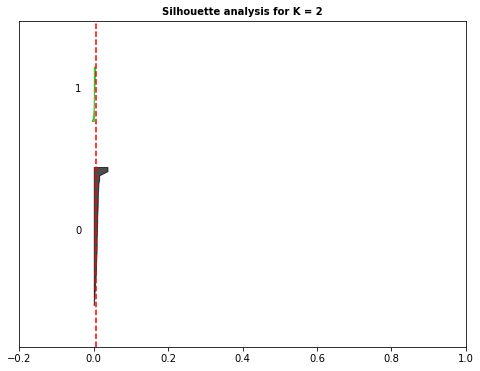

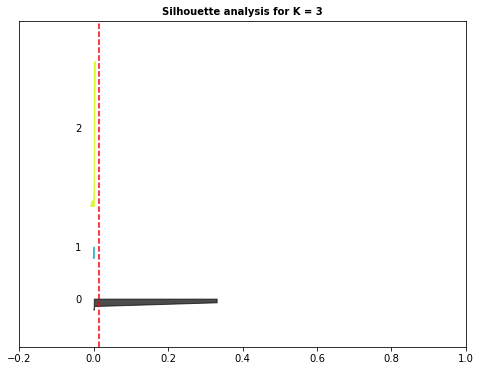

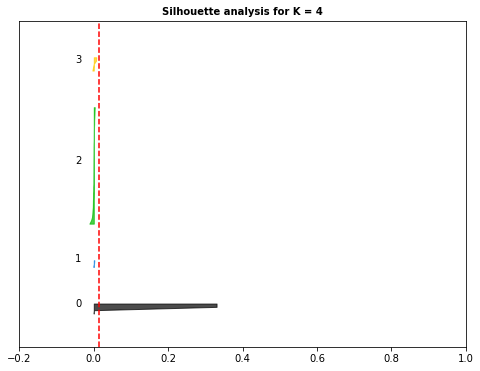

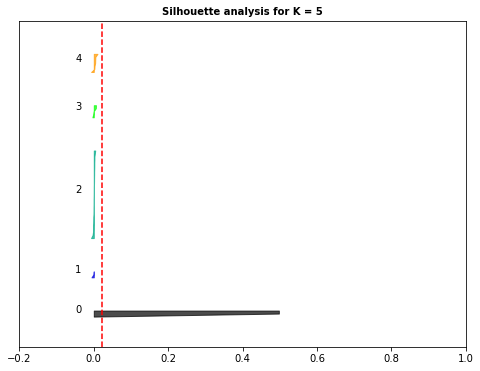

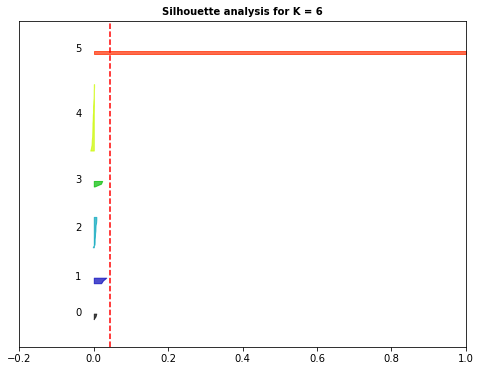

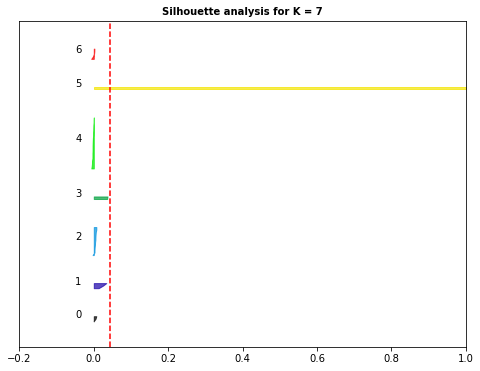

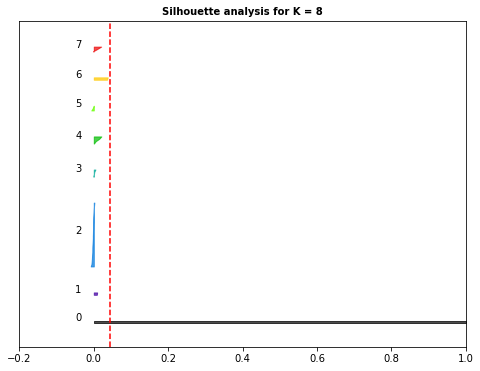

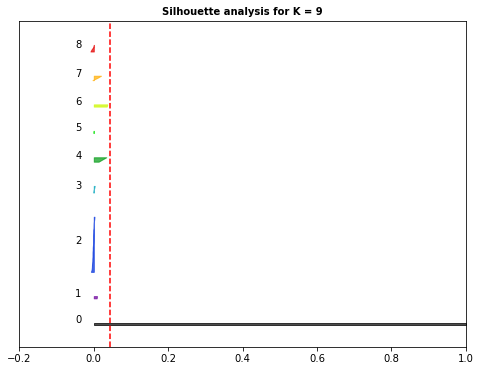

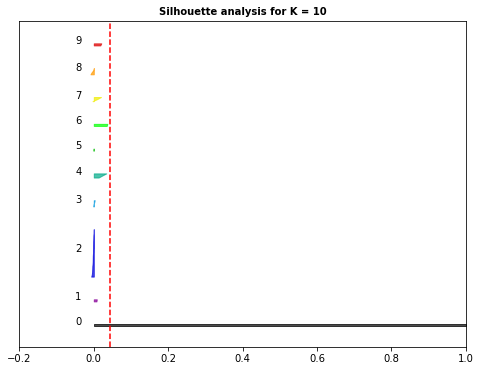

In [343]:
silhouette(kmeans_results, final_df, plot=True)

In [344]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

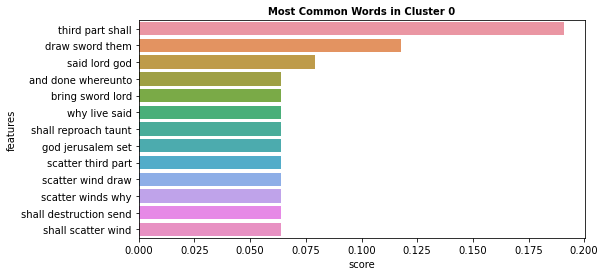

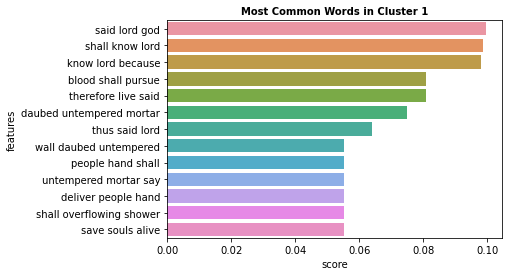

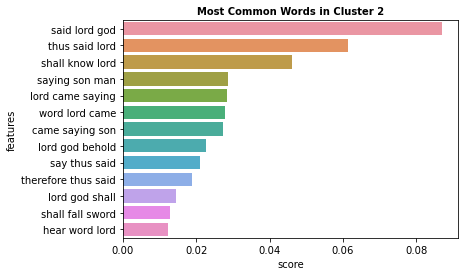

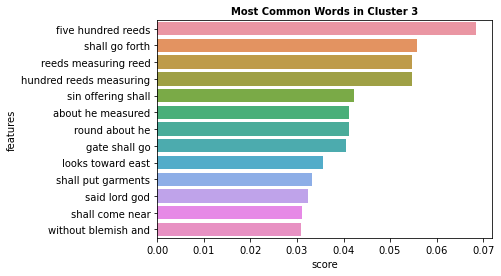

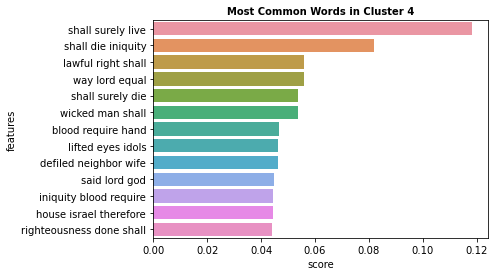

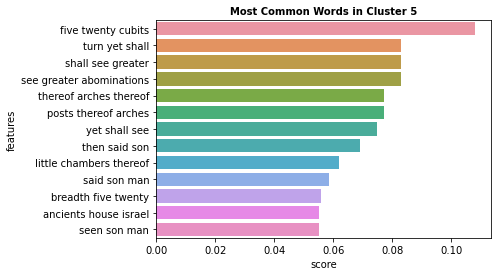

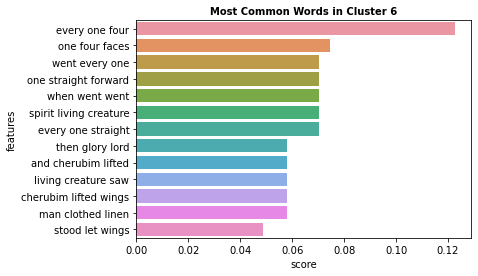

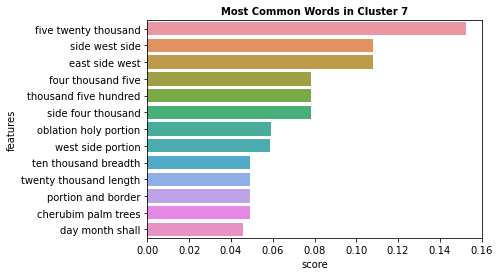

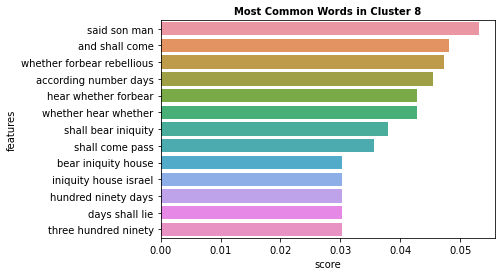

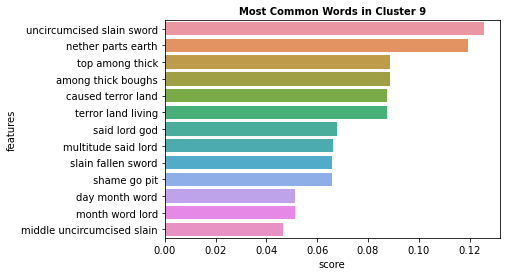

In [345]:
best_result = 10
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

In [346]:
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

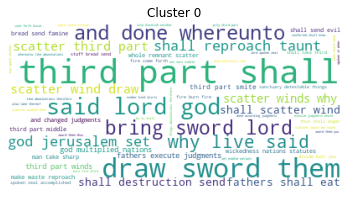

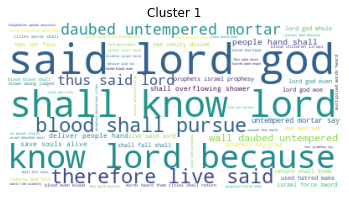

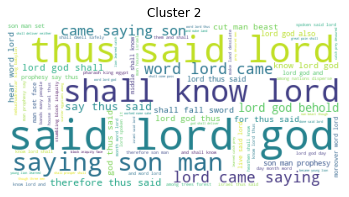

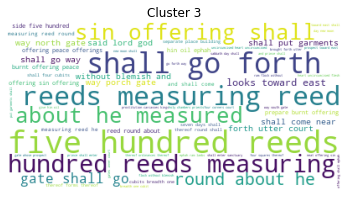

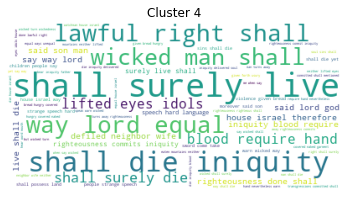

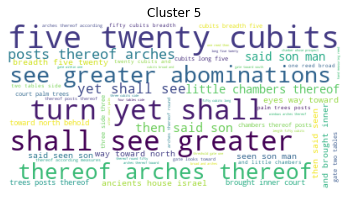

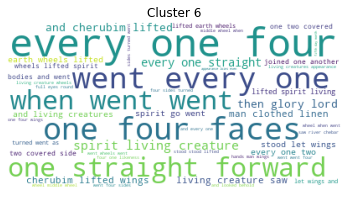

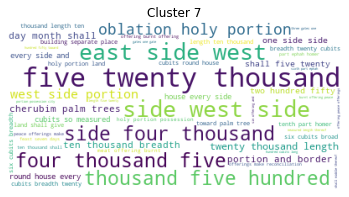

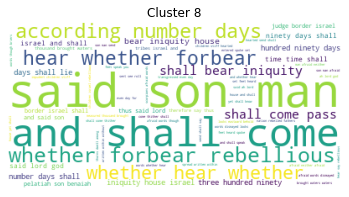

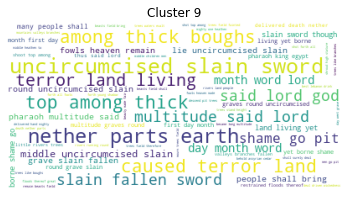

In [347]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)

In [348]:
labels = kmeans.labels_ 
df['label'] = labels
df.head()

,Autor,Livro,label
100,Ezequiel_1,"'came', 'pass', 'thirtieth', 'year', ',', 'fou...",6
101,Ezequiel_2,"'said', ',', 'son', 'man', ',', 'stand', 'feet...",8
102,Ezequiel_3,"'moreover', 'said', ',', 'son', 'man', ',', 'e...",4
103,Ezequiel_4,"'also', ',', 'son', 'man', ',', 'take', 'tile'...",8
104,Ezequiel_5,"',', 'son', 'man', ',', 'take', 'sharp', 'knif...",0


In [349]:
print(df)

           Autor                                              Livro  label
100   Ezequiel_1  'came', 'pass', 'thirtieth', 'year', ',', 'fou...      6
101   Ezequiel_2  'said', ',', 'son', 'man', ',', 'stand', 'feet...      8
102   Ezequiel_3  'moreover', 'said', ',', 'son', 'man', ',', 'e...      4
103   Ezequiel_4  'also', ',', 'son', 'man', ',', 'take', 'tile'...      8
104   Ezequiel_5  ',', 'son', 'man', ',', 'take', 'sharp', 'knif...      0
105   Ezequiel_6  'word', 'lord', 'came', ',', 'saying', ',', 's...      2
106   Ezequiel_7  'moreover', 'word', 'lord', 'came', ',', 'sayi...      2
107   Ezequiel_8  'came', 'pass', 'sixth', 'year', ',', 'sixth',...      5
108   Ezequiel_9  ',', 'son', 'man', ',', 'take', 'sharp', 'knif...      0
109  Ezequiel_10  'looked', ',', ',', 'behold', ',', 'firmament'...      6
110  Ezequiel_11  'moreover', 'spirit', 'lifted', ',', 'brought'...      8
111  Ezequiel_12  'word', 'lord', 'also', 'came', ',', 'saying',...      2
112  Ezequiel_13  'word',